In [ ]:
import numpy as np
import os
from oe_acute import trial_utils as tu
from oe_acute import MNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pickle
import tqdm
import glob

import sys
#from oe_acute import pyMNE

In [ ]:
os.nice(1)

### Load dsets

In [3]:
stim_spec = np.load('/mnt/cube/Rabona/output_transformer/enc_test_1024.npy')
stim_resp = np.load('/mnt/cube/Rabona/output_transformer/resp_test_1024.npy')

In [4]:
np.shape(stim_spec), np.shape(stim_resp)

((5706, 1024), (5706, 214, 32))

In [5]:
def prepare_MNE_dset(stim_spec, stim_resp, nsegbins=1024, concat=True):
    '''
    Create the dataset for fitting MNE model
    '''
    stim_mne = []
    resp_mne = []
    for s, r in zip(stim_spec, stim_resp):
        #nfreq, ntime = s.shape
        #s_segs = np.stack([s[:, n:(n+nsegbins)] for n in range(ntime - nsegbins)], axis=0)
        s_segs = s
        r_segs = np.sum(r, axis=1)
        stim_mne.append(s_segs)
        resp_mne.append(r_segs)
    if concat:
        return np.vstack(stim_mne), np.vstack(resp_mne)
    else:
        return stim_mne, resp_mne

In [6]:
nsegbins = 1024

In [7]:
stim_mne = []
resp_mne = []
stim_mne, resp_mne = prepare_MNE_dset(stim_spec, stim_resp, nsegbins=nsegbins)

In [8]:
np.shape(stim_mne), np.shape(resp_mne)

((5706, 1024), (5706, 214))

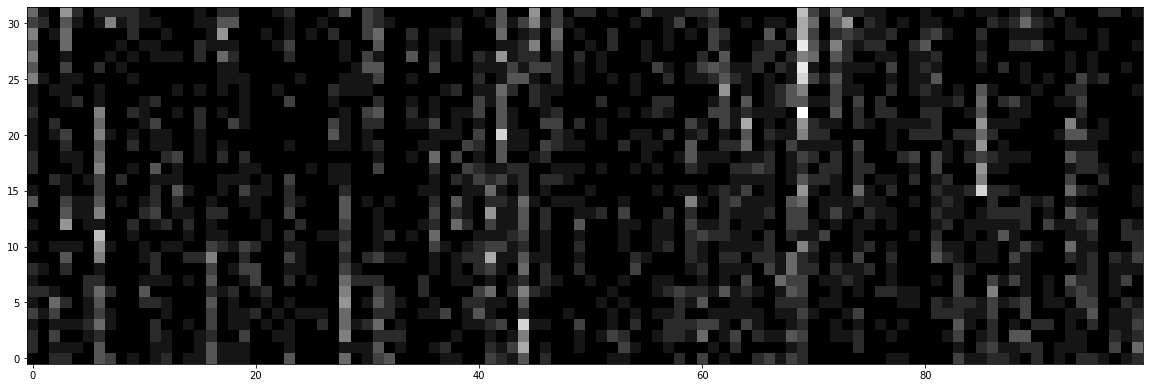

In [9]:
ax = plt.subplots(figsize=(20,8))
plt.imshow(np.transpose(stim_resp[:100, 60, :]), origin='lower', cmap='gray')

### Split into train test sets

In [10]:
len_units = np.shape(resp_mne)[1]

In [11]:
units_to_process = list(np.load('/mnt/cube/srrudrar/temporal_model/units_to_process_B1240.npy'))

In [12]:
exp_path = '/mnt/cube/srrudrar/transformer_model/B1240/32x32/stim_resp_32x32_1024/test_set_mne/'

In [13]:
# obtain all preprocessed datas

%matplotlib inline
sdim = 1024
n_jackknives = 4

test_output_path = os.path.join(exp_path, 'MNE_test_dset')
os.makedirs(test_output_path, exist_ok=True)
n_eigvec_to_display = 6 # Number of most positive and most negative eigenvectors to display

pfinals = {}
for unit in units_to_process:
    i = units_to_process.index(unit)
    stims_train, resps_train, stims_test, resps_test = MNE.prepare_MNE_train_test_set(stim_mne, resp_mne[:,i][:,np.newaxis], train_pct=0.8, zscore=True, kz_norm_resp=True)
    
    # Save test dataset
    test_dict = {'stims_test':stims_test, 'resps_test':resps_test}
    out_fname = 'unit-{}_MNE.pkl'.format(unit)
    out_f = os.path.join(test_output_path, out_fname)
    with open(out_f, 'wb') as f:
        pickle.dump(test_dict, f)

    # Run MNE
    pfinal = MNE.fit_MNE(stims_train, resps_train, order=2)
    #MNE.plot_MNE(pfinal, unit, figure_output_path)
    pfinals[unit] = pfinal

Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn

    1       0    0.176394
    2       0    0.181299
    3       0    0.179711
    4       0    0.180005
    5       1    0.175512
    6       0    0.168955
    7       0    0.168195
    8       0    0.162737
    9       0    0.160667
   10       0    0.159238
   11       0    0.159385
   12       1    0.158906
   13       0    0.159701
   14       1    0.160049
   15       2    0.159998
   16       3    0.158819
   17       0    0.158704
   18       0    0.158748
   19       1    0.158329
   20       0    0.158296
   21       0    0.158626
   22       1    0.159840
   23       2    0.158012
   24       0    0.158336
   25       1    0.158661
   26       2    0.159053
   27       3    0.158724
   28       4    0.158533
   29       5    0.158598
   30       6    0.158323
   31       7    0.158210
   32       8    0.158615
   33       9    0.158578
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn

    1       0    0.162697
    2       0    0.164742
    3       0    0.163420
    4       0    0.159498
    5       0    0.159656
    6       1    0.155530
    7       0    0.152869
    8       0    0.152896
    9       1    0.150822
   10       0    0.148973
   11       0    0.149737
   12       1    0.148616
   13       0    0.149457
   14       1    0.149914
   15       2    0.150384
   16       3    0.148407
   17       0    0.147352
   18       0    0.146728
   19       0    0.147386
   20       1    0.146710
   21       0    0.146114
   22       0    0.146420
   23       1    0.146167
   24       2    0.146306
   25       3    0.146969
   26       4    0.147358
   27       5    0.147433
   28       6    0.147633
   29       7    0.146667
   30       8    0.145815
   31       0    0.146485
   32       1    0.145996
   33       2    0.145865
   34       3    0.146154
   35       4    0.145841
   36       5    0.145991
   37       6    0.146531
   38       7    0.146392
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.176961
    2       0    0.170114
    3       0    0.165402
    4       0    0.164107
    5       0    0.162163
    6       0    0.160063
    7       0    0.160823
    8       1    0.162870
    9       2    0.161311
   10       3    0.159045
   11       0    0.160360
   12       1    0.158284
   13       0    0.157078
   14       0    0.156193
   15       0    0.155357
   16       0    0.155483
   17       1    0.155506
   18       2    0.154568
   19       0    0.154492
   20       0    0.154764
   21       1    0.154396
   22       0    0.154397
   23       1    0.153905
   24       0    0.153508
   25       0    0.152962
   26       0    0.152667
   27       0    0.153126
   28       1    0.153310
   29       2    0.152916
   30       3    0.152942
   31       4    0.153198
   32       5    0.153594
   33       6    0.153401
   34       7    0.152687
   35       8    0.152681
   36       9    0.152894
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn

    1       0    0.180128
    2       0    0.172260
    3       0    0.170464
    4       0    0.169695
    5       0    0.166856
    6       0    0.164991
    7       0    0.162428
    8       0    0.161448
    9       0    0.160722
   10       0    0.158051
   11       0    0.158624
   12       1    0.158017
   13       0    0.159618
   14       1    0.160280
   15       2    0.157028
   16       0    0.156776
   17       0    0.155729
   18       0    0.155696
   19       0    0.154795
   20       0    0.156074
   21       1    0.157065
   22       2    0.156159
   23       3    0.156251
   24       4    0.156944
   25       5    0.156961
   26       6    0.156152
   27       7    0.156303
   28       8    0.157078
   29       9    0.156777
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.161226
    2       0    0.156415
    3       0    0.154395
    4       0    0.153565
    5       0    0.151153
    6       0    0.150901
    7       0    0.149868
    8       0    0.147428
    9       0    0.146993
   10       0    0.145575
   11       0    0.145358
   12       0    0.145056
   13       0    0.145364
   14       1    0.147213
   15       2    0.147195
   16       3    0.145176
   17       4    0.144152
   18       0    0.144577
   19       1    0.144479
   20       2    0.144033
   21       0    0.144177
   22       1    0.143926
   23       0    0.143449
   24       0    0.143252
   25       0    0.143410
   26       1    0.143478
   27       2    0.143331
   28       3    0.143057
   29       0    0.142781
   30       0    0.142316
   31       0    0.142337
   32       1    0.142320
   33       2    0.142457
   34       3    0.142549
   35       4    0.142383
   36       5    0.142173
   37       0    0.142161
   38       0    0.142455
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.160386
    2       0    0.155395
    3       0    0.149106
    4       0    0.146355
    5       0    0.145609
    6       0    0.146363
    7       1    0.149100
    8       2    0.145945
    9       3    0.144713
   10       0    0.144853
   11       1    0.143045
   12       0    0.142224
   13       0    0.143100
   14       1    0.141642
   15       0    0.141329
   16       0    0.142456
   17       1    0.141522
   18       2    0.141168
   19       0    0.140503
   20       0    0.140140
   21       0    0.141076
   22       1    0.141124
   23       2    0.140920
   24       3    0.141584
   25       4    0.140876
   26       5    0.139843
   27       0    0.139306
   28       0    0.139925
   29       1    0.140170
   30       2    0.139624
   31       3    0.139447
   32       4    0.140354
   33       5    0.141170
   34       6    0.140119
   35       7    0.140419
   36       8    0.140539
   37       9    0.139984
minimum of test set found
Iters   tall

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.171317
    2       0    0.163569
    3       0    0.159075
    4       0    0.156845
    5       0    0.154632
    6       0    0.151639
    7       0    0.151269
    8       0    0.149447
    9       0    0.148578
   10       0    0.150307
   11       1    0.149531
   12       2    0.148241
   13       0    0.148686
   14       1    0.147562
   15       0    0.146685
   16       0    0.146454
   17       0    0.146072
   18       0    0.145381
   19       0    0.145403
   20       1    0.145963
   21       2    0.145561
   22       3    0.146705
   23       4    0.147495
   24       5    0.146624
   25       6    0.145523
   26       7    0.145745
   27       8    0.145863
   28       9    0.145478
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.160712
    2       0    0.159930
    3       0    0.145788
    4       0    0.144190
    5       0    0.141165
    6       0    0.140891
    7       0    0.138588
    8       0    0.139499
    9       1    0.139618
   10       2    0.137484
   11       0    0.137005
   12       0    0.138147
   13       1    0.137974
   14       2    0.136017
   15       0    0.135368
   16       0    0.133985
   17       0    0.136601
   18       1    0.137899
   19       2    0.134607
   20       3    0.133803
   21       0    0.133272
   22       0    0.133411
   23       1    0.133293
   24       2    0.132649
   25       0    0.131649
   26       0    0.132646
   27       1    0.133592
   28       2    0.131543
   29       0    0.131304
   30       0    0.132541
   31       1    0.132780
   32       2    0.132137
   33       3    0.132623
   34       4    0.132879
   35       5    0.133072
   36       6    0.132491
   37       7    0.132114
   38       8    0.132168
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.132980
    2       0    0.129858
    3       0    0.124998
    4       0    0.119891
    5       0    0.118669
    6       0    0.118210
    7       0    0.117564
    8       0    0.115832
    9       0    0.116143
   10       1    0.115056
   11       0    0.113960
   12       0    0.113436
   13       0    0.113664
   14       1    0.113451
   15       2    0.112733
   16       0    0.113316
   17       1    0.112965
   18       2    0.111964
   19       0    0.111917
   20       0    0.111486
   21       0    0.111427
   22       0    0.112433
   23       1    0.112064
   24       2    0.111986
   25       3    0.112355
   26       4    0.111975
   27       5    0.111712
   28       6    0.112051
   29       7    0.111872
   30       8    0.111827
   31       9    0.112416
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.125711
    2       0    0.122407
    3       0    0.113871
    4       0    0.111144
    5       0    0.108740
    6       0    0.107369
    7       0    0.107120
    8       0    0.106675
    9       0    0.105765
   10       0    0.104876
   11       0    0.104021
   12       0    0.103871
   13       0    0.104595
   14       1    0.104408
   15       2    0.103984
   16       3    0.103200
   17       0    0.103112
   18       0    0.103183
   19       1    0.103033
   20       0    0.103178
   21       1    0.103691
   22       2    0.103859
   23       3    0.103483
   24       4    0.103000
   25       0    0.102835
   26       0    0.102738
   27       0    0.102551
   28       0    0.102530
   29       0    0.102694
   30       1    0.102537
   31       2    0.102567
   32       3    0.102937
   33       4    0.103269
   34       5    0.103129
   35       6    0.103110
   36       7    0.103057
   37       8    0.102785
   38       9    0.102672
minimum of t

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.116646
    2       0    0.112818
    3       0    0.109945
    4       0    0.109728
    5       0    0.109822
    6       1    0.107531
    7       0    0.106948
    8       0    0.106941
    9       0    0.106385
   10       0    0.105499
   11       0    0.105077
   12       0    0.104653
   13       0    0.104224
   14       0    0.104407
   15       1    0.104569
   16       2    0.104279
   17       3    0.103924
   18       0    0.103842
   19       0    0.103513
   20       0    0.103664
   21       1    0.104029
   22       2    0.104273
   23       3    0.103971
   24       4    0.103629
   25       5    0.103678
   26       6    0.103668
   27       7    0.103532
   28       8    0.103644
   29       9    0.103817
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.123695
    2       0    0.119022
    3       0    0.118151
    4       0    0.116433
    5       0    0.112286
    6       0    0.107732
    7       0    0.106902
    8       0    0.107076
    9       1    0.107810
   10       2    0.106788
   11       0    0.106116
   12       0    0.105045
   13       0    0.104623
   14       0    0.104575
   15       0    0.104355
   16       0    0.104079
   17       0    0.103632
   18       0    0.104113
   19       1    0.103996
   20       2    0.103679
   21       3    0.103803
   22       4    0.103825
   23       5    0.103469
   24       0    0.103742
   25       1    0.103799
   26       2    0.103494
   27       3    0.103513
   28       4    0.103777
   29       5    0.103713
   30       6    0.103585
   31       7    0.103460
   32       0    0.103564
   33       1    0.103461
   34       2    0.103468
   35       3    0.103499
   36       4    0.103473
   37       5    0.103507
   38       6    0.103643
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.105187
    2       0    0.104939
    3       0    0.099697
    4       0    0.100010
    5       1    0.100055
    6       2    0.098419
    7       0    0.097535
    8       0    0.097198
    9       0    0.096651
   10       0    0.096101
   11       0    0.095869
   12       0    0.095858
   13       0    0.095779
   14       0    0.095417
   15       0    0.095343
   16       0    0.094457
   17       0    0.094319
   18       0    0.094042
   19       0    0.094053
   20       1    0.093970
   21       0    0.093897
   22       0    0.093783
   23       0    0.093663
   24       0    0.093714
   25       1    0.093552
   26       0    0.093629
   27       1    0.093307
   28       0    0.093231
   29       0    0.093217
   30       0    0.093125
   31       0    0.093252
   32       1    0.093157
   33       2    0.092830
   34       0    0.092821
   35       0    0.092685
   36       0    0.092601
   37       0    0.092439
   38       0    0.092435
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.111988
    2       0    0.111527
    3       0    0.108816
    4       0    0.107392
    5       0    0.106100
    6       0    0.104932
    7       0    0.104861
    8       0    0.103982
    9       0    0.102676
   10       0    0.102428
   11       0    0.101558
   12       0    0.101166
   13       0    0.100951
   14       0    0.100743
   15       0    0.100272
   16       0    0.099947
   17       0    0.099720
   18       0    0.100214
   19       1    0.099433
   20       0    0.099470
   21       1    0.099378
   22       0    0.099260
   23       0    0.099139
   24       0    0.099301
   25       1    0.099157
   26       2    0.098563
   27       0    0.098480
   28       0    0.098521
   29       1    0.098702
   30       2    0.098897
   31       3    0.098688
   32       4    0.098532
   33       5    0.098450
   34       0    0.098530
   35       1    0.098740
   36       2    0.098541
   37       3    0.098598
   38       4    0.098613
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.109396
    2       0    0.109803
    3       0    0.104794
    4       0    0.103550
    5       0    0.101864
    6       0    0.100513
    7       0    0.100179
    8       0    0.098099
    9       0    0.097908
   10       0    0.097213
   11       0    0.097240
   12       1    0.097586
   13       2    0.098138
   14       3    0.097810
   15       4    0.095800
   16       0    0.095801
   17       1    0.095648
   18       0    0.095776
   19       1    0.095159
   20       0    0.095492
   21       1    0.095281
   22       2    0.095109
   23       0    0.094963
   24       0    0.095061
   25       1    0.094842
   26       0    0.094744
   27       0    0.094777
   28       1    0.094486
   29       0    0.094547
   30       1    0.094691
   31       2    0.094351
   32       0    0.094129
   33       0    0.094151
   34       1    0.094217
   35       2    0.094229
   36       3    0.094112
   37       0    0.094094
   38       0    0.094258
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.107925
    2       0    0.105476
    3       0    0.104443
    4       0    0.102987
    5       0    0.102192
    6       0    0.099824
    7       0    0.099110
    8       0    0.098630
    9       0    0.098810
   10       1    0.098422
   11       0    0.097776
   12       0    0.097561
   13       0    0.097713
   14       1    0.097505
   15       0    0.097592
   16       1    0.097609
   17       2    0.097316
   18       0    0.097606
   19       1    0.097592
   20       2    0.097033
   21       0    0.096980
   22       0    0.096734
   23       0    0.096951
   24       1    0.096693
   25       0    0.096831
   26       1    0.096858
   27       2    0.096650
   28       0    0.096717
   29       1    0.096642
   30       0    0.096504
   31       0    0.096444
   32       0    0.096467
   33       1    0.096335
   34       0    0.096235
   35       0    0.096310
   36       1    0.096305
   37       2    0.096146
   38       0    0.096166
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.206298
    2       0    0.203314
    3       0    0.202583
    4       0    0.196535
    5       0    0.191824
    6       0    0.192807
    7       1    0.189772
    8       0    0.187976
    9       0    0.187985
   10       1    0.187257
   11       0    0.187859
   12       1    0.187463
   13       2    0.186375
   14       0    0.186373
   15       0    0.186361
   16       0    0.184533
   17       0    0.184587
   18       1    0.184981
   19       2    0.185141
   20       3    0.187054
   21       4    0.188116
   22       5    0.186472
   23       6    0.185461
   24       7    0.185363
   25       8    0.184338
   26       0    0.184696
   27       1    0.184164
   28       0    0.184284
   29       1    0.183654
   30       0    0.183716
   31       1    0.184225
   32       2    0.183875
   33       3    0.184312
   34       4    0.184709
   35       5    0.184234
   36       6    0.185783
   37       7    0.186081
   38       8    0.185242
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.217193
    2       0    0.210013
    3       0    0.206172
    4       0    0.204595
    5       0    0.203090
    6       0    0.202707
    7       0    0.201486
    8       0    0.200195
    9       0    0.200367
   10       1    0.199833
   11       0    0.198352
   12       0    0.197909
   13       0    0.197815
   14       0    0.197762
   15       0    0.197952
   16       1    0.197320
   17       0    0.196587
   18       0    0.196427
   19       0    0.196013
   20       0    0.196237
   21       1    0.196145
   22       2    0.196539
   23       3    0.196779
   24       4    0.196612
   25       5    0.196359
   26       6    0.195687
   27       0    0.195275
   28       0    0.194910
   29       0    0.194891
   30       0    0.195014
   31       1    0.195246
   32       2    0.195210
   33       3    0.195375
   34       4    0.195162
   35       5    0.194692
   36       0    0.194536
   37       0    0.194554
   38       1    0.194562
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.198569
    2       0    0.192952
    3       0    0.190542
    4       0    0.189774
    5       0    0.188663
    6       0    0.188002
    7       0    0.187186
    8       0    0.185307
    9       0    0.185515
   10       1    0.184096
   11       0    0.183002
   12       0    0.183009
   13       1    0.183005
   14       2    0.182798
   15       0    0.182423
   16       0    0.182292
   17       0    0.181901
   18       0    0.181980
   19       1    0.181964
   20       2    0.182123
   21       3    0.183206
   22       4    0.181639
   23       0    0.180472
   24       0    0.180319
   25       0    0.180689
   26       1    0.180990
   27       2    0.181169
   28       3    0.181240
   29       4    0.181202
   30       5    0.181107
   31       6    0.180647
   32       7    0.180586
   33       8    0.180414
   34       9    0.180139
   35       0    0.180145
   36       1    0.179970
   37       0    0.179890
   38       0    0.180088
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.203083
    2       0    0.199536
    3       0    0.197707
    4       0    0.194785
    5       0    0.193179
    6       0    0.193099
    7       0    0.192229
    8       0    0.191386
    9       0    0.190561
   10       0    0.189968
   11       0    0.189443
   12       0    0.189391
   13       0    0.188824
   14       0    0.188933
   15       1    0.189109
   16       2    0.189891
   17       3    0.190254
   18       4    0.190261
   19       5    0.190060
   20       6    0.189832
   21       7    0.189546
   22       8    0.189379
   23       9    0.189150
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.073094
    2       0    0.070841
    3       0    0.067984
    4       0    0.067809
    5       0    0.066145
    6       0    0.064779
    7       0    0.064746
    8       0    0.066294
    9       1    0.064981
   10       2    0.063597
   11       0    0.062149
   12       0    0.064548
   13       1    0.062113
   14       0    0.062255
   15       1    0.062604
   16       2    0.064908
   17       3    0.063422
   18       4    0.063690
   19       5    0.065068
   20       6    0.064908
   21       7    0.065257
   22       8    0.066580
   23       9    0.067166
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.069751
    2       0    0.068727
    3       0    0.067019
    4       0    0.066597
    5       0    0.066155
    6       0    0.066574
    7       1    0.066876
    8       2    0.065724
    9       0    0.065143
   10       0    0.064812
   11       0    0.064780
   12       0    0.064599
   13       0    0.064696
   14       1    0.064561
   15       0    0.064429
   16       0    0.064433
   17       1    0.064363
   18       0    0.064274
   19       0    0.064595
   20       1    0.065157
   21       2    0.065247
   22       3    0.065094
   23       4    0.065381
   24       5    0.065900
   25       6    0.066324
   26       7    0.066395
   27       8    0.066196
   28       9    0.066120
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.079565
    2       0    0.077692
    3       0    0.075775
    4       0    0.075191
    5       0    0.074440
    6       0    0.074291
    7       0    0.073847
    8       0    0.072182
    9       0    0.071789
   10       0    0.072253
   11       1    0.072139
   12       2    0.071641
   13       0    0.071968
   14       1    0.071853
   15       2    0.071353
   16       0    0.071555
   17       1    0.071239
   18       0    0.071085
   19       0    0.071178
   20       1    0.071105
   21       2    0.071024
   22       0    0.070732
   23       0    0.070327
   24       0    0.070652
   25       1    0.070807
   26       2    0.070611
   27       3    0.070502
   28       4    0.070708
   29       5    0.070946
   30       6    0.070823
   31       7    0.070668
   32       8    0.070887
   33       9    0.071113
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.074205
    2       0    0.073725
    3       0    0.072849
    4       0    0.071137
    5       0    0.070579
    6       0    0.069603
    7       0    0.068771
    8       0    0.068117
    9       0    0.068353
   10       1    0.067370
   11       0    0.066506
   12       0    0.068209
   13       1    0.068749
   14       2    0.067778
   15       3    0.066976
   16       4    0.066321
   17       0    0.066514
   18       1    0.066930
   19       2    0.067438
   20       3    0.067482
   21       4    0.065983
   22       0    0.065528
   23       0    0.066199
   24       1    0.066045
   25       2    0.066055
   26       3    0.065975
   27       4    0.066282
   28       5    0.066390
   29       6    0.065856
   30       7    0.066481
   31       8    0.066923
   32       9    0.067443
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.094120
    2       0    0.092982
    3       0    0.092115
    4       0    0.091195
    5       0    0.092174
    6       1    0.091921
    7       2    0.091061
    8       0    0.090227
    9       0    0.090894
   10       1    0.090359
   11       2    0.089769
   12       0    0.089714
   13       0    0.089076
   14       0    0.088719
   15       0    0.089098
   16       1    0.089190
   17       2    0.089544
   18       3    0.089149
   19       4    0.088919
   20       5    0.088726
   21       6    0.089073
   22       7    0.089291
   23       8    0.089648
   24       9    0.089396
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.110254
    2       0    0.109510
    3       0    0.108532
    4       0    0.108871
    5       1    0.108058
    6       0    0.110091
    7       1    0.108563
    8       2    0.108246
    9       3    0.107288
   10       0    0.107243
   11       0    0.107167
   12       0    0.107679
   13       1    0.106508
   14       0    0.105612
   15       0    0.105820
   16       1    0.105221
   17       0    0.105398
   18       1    0.105167
   19       0    0.106201
   20       1    0.106322
   21       2    0.105748
   22       3    0.105859
   23       4    0.105623
   24       5    0.105738
   25       6    0.105730
   26       7    0.105588
   27       8    0.105763
   28       9    0.105986
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.111641
    2       0    0.112561
    3       0    0.108237
    4       0    0.107594
    5       0    0.106172
    6       0    0.107440
    7       1    0.106425
    8       2    0.105090
    9       0    0.104486
   10       0    0.104154
   11       0    0.103449
   12       0    0.103275
   13       0    0.103445
   14       1    0.103333
   15       2    0.102539
   16       0    0.102726
   17       1    0.103345
   18       2    0.104279
   19       3    0.104192
   20       4    0.102719
   21       5    0.102210
   22       0    0.101179
   23       0    0.101169
   24       0    0.101058
   25       0    0.101163
   26       1    0.100933
   27       0    0.101342
   28       1    0.101501
   29       2    0.101174
   30       3    0.101228
   31       4    0.100964
   32       5    0.100834
   33       0    0.101251
   34       1    0.101154
   35       2    0.101128
   36       3    0.100817
   37       0    0.100501
   38       0    0.100499
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.106692
    2       0    0.104511
    3       0    0.106413
    4       1    0.101904
    5       0    0.099532
    6       0    0.098725
    7       0    0.098196
    8       0    0.098074
    9       0    0.095958
   10       0    0.095545
   11       0    0.094779
   12       0    0.094425
   13       0    0.094024
   14       0    0.093573
   15       0    0.092839
   16       0    0.093049
   17       1    0.092765
   18       0    0.092195
   19       0    0.092168
   20       0    0.092021
   21       0    0.092362
   22       1    0.091866
   23       0    0.091385
   24       0    0.091771
   25       1    0.091805
   26       2    0.091963
   27       3    0.091648
   28       4    0.091476
   29       5    0.091506
   30       6    0.091295
   31       0    0.091844
   32       1    0.091739
   33       2    0.092207
   34       3    0.092355
   35       4    0.091761
   36       5    0.091837
   37       6    0.091785
   38       7    0.091717
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.117092
    2       0    0.112503
    3       0    0.110952
    4       0    0.108846
    5       0    0.105767
    6       0    0.104541
    7       0    0.103280
    8       0    0.103148
    9       0    0.102721
   10       0    0.102521
   11       0    0.102517
   12       0    0.102808
   13       1    0.102109
   14       0    0.102243
   15       1    0.102189
   16       2    0.102187
   17       3    0.102504
   18       4    0.102181
   19       5    0.102065
   20       0    0.102066
   21       1    0.102142
   22       2    0.102014
   23       0    0.102262
   24       1    0.102640
   25       2    0.102471
   26       3    0.102596
   27       4    0.102541
   28       5    0.102218
   29       6    0.102184
   30       7    0.102131
   31       8    0.102144
   32       9    0.102286
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.147194
    2       0    0.149983
    3       0    0.141310
    4       0    0.139876
    5       0    0.137379
    6       0    0.138306
    7       1    0.137286
    8       0    0.135700
    9       0    0.135768
   10       1    0.133466
   11       0    0.133538
   12       1    0.134668
   13       2    0.137342
   14       3    0.136200
   15       4    0.136054
   16       5    0.134931
   17       6    0.134644
   18       7    0.135065
   19       8    0.134812
   20       9    0.133947
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.128323
    2       0    0.126928
    3       0    0.124842
    4       0    0.124298
    5       0    0.124161
    6       0    0.121317
    7       0    0.121238
    8       0    0.120818
    9       0    0.120371
   10       0    0.120670
   11       1    0.120308
   12       0    0.120133
   13       0    0.119421
   14       0    0.119143
   15       0    0.118849
   16       0    0.119125
   17       1    0.119489
   18       2    0.119924
   19       3    0.119543
   20       4    0.118430
   21       0    0.118320
   22       0    0.118199
   23       0    0.118074
   24       0    0.117941
   25       0    0.118482
   26       1    0.118491
   27       2    0.118953
   28       3    0.119122
   29       4    0.118674
   30       5    0.118461
   31       6    0.118466
   32       7    0.118640
   33       8    0.118654
   34       9    0.118428
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.130332
    2       0    0.132954
    3       0    0.127026
    4       0    0.124680
    5       0    0.131467
    6       1    0.124087
    7       0    0.123241
    8       0    0.117195
    9       0    0.116273
   10       0    0.116718
   11       1    0.116493
   12       2    0.118173
   13       3    0.115184
   14       0    0.114829
   15       0    0.113929
   16       0    0.114271
   17       1    0.113831
   18       0    0.113658
   19       0    0.113477
   20       0    0.113481
   21       1    0.113269
   22       0    0.113507
   23       1    0.113425
   24       2    0.112719
   25       0    0.112761
   26       1    0.112740
   27       2    0.112823
   28       3    0.113069
   29       4    0.113128
   30       5    0.113075
   31       6    0.112788
   32       7    0.113146
   33       8    0.114226
   34       9    0.114414
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.140904
    2       0    0.136199
    3       0    0.131292
    4       0    0.129012
    5       0    0.127662
    6       0    0.126345
    7       0    0.125507
    8       0    0.125283
    9       0    0.124816
   10       0    0.123499
   11       0    0.123317
   12       0    0.123164
   13       0    0.123722
   14       1    0.123882
   15       2    0.123064
   16       0    0.122571
   17       0    0.122756
   18       1    0.123026
   19       2    0.122777
   20       3    0.123423
   21       4    0.123629
   22       5    0.122978
   23       6    0.122612
   24       7    0.122370
   25       0    0.122491
   26       1    0.122187
   27       0    0.121835
   28       0    0.121682
   29       0    0.121633
   30       0    0.121925
   31       1    0.122024
   32       2    0.121935
   33       3    0.121834
   34       4    0.121627
   35       0    0.121913
   36       1    0.122091
   37       2    0.121768
   38       3    0.121747
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.149977
    2       0    0.145049
    3       0    0.138084
    4       0    0.137824
    5       0    0.137962
    6       1    0.136176
    7       0    0.136205
    8       1    0.133945
    9       0    0.133889
   10       0    0.133491
   11       0    0.133697
   12       1    0.133684
   13       2    0.133045
   14       0    0.132782
   15       0    0.132429
   16       0    0.132093
   17       0    0.132024
   18       0    0.131692
   19       0    0.131992
   20       1    0.132088
   21       2    0.131726
   22       3    0.131784
   23       4    0.131551
   24       0    0.131498
   25       0    0.131457
   26       0    0.131758
   27       1    0.131545
   28       2    0.131011
   29       0    0.130891
   30       0    0.131021
   31       1    0.131271
   32       2    0.131319
   33       3    0.130989
   34       4    0.131114
   35       5    0.131737
   36       6    0.131928
   37       7    0.131469
   38       8    0.131371
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.145814
    2       0    0.143331
    3       0    0.136639
    4       0    0.129170
    5       0    0.127632
    6       0    0.126529
    7       0    0.125448
    8       0    0.125730
    9       1    0.124037
   10       0    0.122283
   11       0    0.123272
   12       1    0.122449
   13       2    0.121567
   14       0    0.122405
   15       1    0.122295
   16       2    0.121389
   17       0    0.121586
   18       1    0.121893
   19       2    0.121361
   20       0    0.121191
   21       0    0.120744
   22       0    0.120826
   23       1    0.121593
   24       2    0.121100
   25       3    0.121501
   26       4    0.121594
   27       5    0.121578
   28       6    0.121794
   29       7    0.121801
   30       8    0.122719
   31       9    0.123662
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.139600
    2       0    0.136045
    3       0    0.130461
    4       0    0.127236
    5       0    0.124240
    6       0    0.121679
    7       0    0.121766
    8       1    0.121541
    9       0    0.121521
   10       0    0.120090
   11       0    0.119564
   12       0    0.119906
   13       1    0.119490
   14       0    0.120210
   15       1    0.119764
   16       2    0.120106
   17       3    0.119684
   18       4    0.120344
   19       5    0.119738
   20       6    0.119783
   21       7    0.120056
   22       8    0.120416
   23       9    0.119670
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.156638
    2       0    0.155842
    3       0    0.154008
    4       0    0.153021
    5       0    0.151802
    6       0    0.150848
    7       0    0.151000
    8       1    0.150670
    9       0    0.150045
   10       0    0.148971
   11       0    0.149238
   12       1    0.148291
   13       0    0.148859
   14       1    0.148360
   15       2    0.148299
   16       3    0.148296
   17       4    0.147965
   18       0    0.147155
   19       0    0.146968
   20       0    0.147101
   21       1    0.147352
   22       2    0.146483
   23       0    0.146156
   24       0    0.146290
   25       1    0.145758
   26       0    0.145494
   27       0    0.145593
   28       1    0.145720
   29       2    0.145601
   30       3    0.145374
   31       0    0.145386
   32       1    0.145372
   33       0    0.145290
   34       0    0.145357
   35       1    0.145413
   36       2    0.145240
   37       0    0.145138
   38       0    0.144912
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.169279
    2       0    0.165926
    3       0    0.165673
    4       0    0.165273
    5       0    0.165618
    6       1    0.163861
    7       0    0.162612
    8       0    0.162163
    9       0    0.161496
   10       0    0.160537
   11       0    0.159888
   12       0    0.159490
   13       0    0.159421
   14       0    0.159267
   15       0    0.158866
   16       0    0.158388
   17       0    0.158099
   18       0    0.158603
   19       1    0.158579
   20       2    0.158224
   21       3    0.157863
   22       0    0.157723
   23       0    0.158068
   24       1    0.157421
   25       0    0.157290
   26       0    0.157763
   27       1    0.157484
   28       2    0.157145
   29       0    0.157745
   30       1    0.157534
   31       2    0.157312
   32       3    0.157691
   33       4    0.157395
   34       5    0.157304
   35       6    0.157154
   36       7    0.157022
   37       0    0.157280
   38       1    0.157445
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.161626
    2       0    0.161080
    3       0    0.160127
    4       0    0.161460
    5       1    0.157700
    6       0    0.156173
    7       0    0.154139
    8       0    0.153359
    9       0    0.152862
   10       0    0.152775
   11       0    0.151833
   12       0    0.151588
   13       0    0.151715
   14       1    0.151790
   15       2    0.151290
   16       0    0.151690
   17       1    0.152450
   18       2    0.151380
   19       3    0.150618
   20       0    0.150606
   21       0    0.150431
   22       0    0.150399
   23       0    0.150675
   24       1    0.150721
   25       2    0.150593
   26       3    0.150342
   27       0    0.150269
   28       0    0.150192
   29       0    0.150328
   30       1    0.150940
   31       2    0.150860
   32       3    0.150968
   33       4    0.150930
   34       5    0.150865
   35       6    0.150991
   36       7    0.150815
   37       8    0.150790
   38       9    0.150751
minimum of t

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.180956
    2       0    0.178758
    3       0    0.175891
    4       0    0.175153
    5       0    0.172909
    6       0    0.172144
    7       0    0.172348
    8       1    0.170667
    9       0    0.170450
   10       0    0.170410
   11       0    0.171793
   12       1    0.170497
   13       2    0.169295
   14       0    0.168759
   15       0    0.168783
   16       1    0.168721
   17       0    0.168574
   18       0    0.168163
   19       0    0.168481
   20       1    0.169154
   21       2    0.168614
   22       3    0.168045
   23       0    0.168191
   24       1    0.168274
   25       2    0.168348
   26       3    0.167954
   27       0    0.167724
   28       0    0.167830
   29       1    0.168066
   30       2    0.168085
   31       3    0.167512
   32       0    0.167953
   33       1    0.167989
   34       2    0.168640
   35       3    0.168936
   36       4    0.168537
   37       5    0.168349
   38       6    0.168169
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.318307
    2       0    0.315255
    3       0    0.314621
    4       0    0.311908
    5       0    0.306873
    6       0    0.305024
    7       0    0.302343
    8       0    0.299822
    9       0    0.300549
   10       1    0.300314
   11       2    0.299263
   12       0    0.299967
   13       1    0.299085
   14       0    0.299293
   15       1    0.299563
   16       2    0.297488
   17       0    0.295968
   18       0    0.296134
   19       1    0.296203
   20       2    0.296474
   21       3    0.295583
   22       0    0.295457
   23       0    0.295415
   24       0    0.294707
   25       0    0.295616
   26       1    0.296479
   27       2    0.295265
   28       3    0.294016
   29       0    0.294317
   30       1    0.294042
   31       2    0.294646
   32       3    0.295245
   33       4    0.295039
   34       5    0.295396
   35       6    0.294387
   36       7    0.294242
   37       8    0.293299
   38       0    0.293757
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.319207
    2       0    0.313479
    3       0    0.304813
    4       0    0.301911
    5       0    0.300340
    6       0    0.297730
    7       0    0.296143
    8       0    0.295057
    9       0    0.294930
   10       0    0.294034
   11       0    0.290889
   12       0    0.290784
   13       0    0.292302
   14       1    0.291434
   15       2    0.288546
   16       0    0.286791
   17       0    0.287511
   18       1    0.288599
   19       2    0.286416
   20       0    0.285812
   21       0    0.286730
   22       1    0.287041
   23       2    0.286412
   24       3    0.286358
   25       4    0.287388
   26       5    0.287500
   27       6    0.287026
   28       7    0.287048
   29       8    0.287639
   30       9    0.287510
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.327338
    2       0    0.316915
    3       0    0.304539
    4       0    0.303716
    5       0    0.303268
    6       0    0.297255
    7       0    0.295191
    8       0    0.295136
    9       0    0.296578
   10       1    0.298534
   11       2    0.292972
   12       0    0.290310
   13       0    0.289950
   14       0    0.290979
   15       1    0.290963
   16       2    0.289024
   17       0    0.288860
   18       0    0.288533
   19       0    0.287552
   20       0    0.290500
   21       1    0.290060
   22       2    0.287207
   23       0    0.286114
   24       0    0.287206
   25       1    0.287228
   26       2    0.287835
   27       3    0.286909
   28       4    0.285615
   29       0    0.287799
   30       1    0.289000
   31       2    0.289769
   32       3    0.288205
   33       4    0.287223
   34       5    0.288027
   35       6    0.288063
   36       7    0.286908
   37       8    0.287081
   38       9    0.286757
minimum of t

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.318534
    2       0    0.317302
    3       0    0.315295
    4       0    0.311409
    5       0    0.311047
    6       0    0.307407
    7       0    0.302656
    8       0    0.302119
    9       0    0.298340
   10       0    0.296740
   11       0    0.296596
   12       0    0.295596
   13       0    0.296031
   14       1    0.295059
   15       0    0.293722
   16       0    0.294129
   17       1    0.293731
   18       2    0.292773
   19       0    0.291954
   20       0    0.292863
   21       1    0.291785
   22       0    0.290317
   23       0    0.290864
   24       1    0.290756
   25       2    0.290124
   26       0    0.290000
   27       0    0.290778
   28       1    0.290659
   29       2    0.290351
   30       3    0.290990
   31       4    0.291074
   32       5    0.291522
   33       6    0.290434
   34       7    0.292537
   35       8    0.292443
   36       9    0.293286
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.152717
    2       0    0.130151
    3       0    0.126153
    4       0    0.136307
    5       1    0.133394
    6       2    0.125201
    7       0    0.127303
    8       1    0.125632
    9       2    0.121231
   10       0    0.121156
   11       0    0.122986
   12       1    0.120888
   13       0    0.120870
   14       0    0.121923
   15       1    0.120403
   16       0    0.120179
   17       0    0.121969
   18       1    0.122201
   19       2    0.119019
   20       0    0.119088
   21       1    0.121007
   22       2    0.120933
   23       3    0.120808
   24       4    0.121748
   25       5    0.120160
   26       6    0.121341
   27       7    0.123036
   28       8    0.122342
   29       9    0.123893
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.103961
    2       0    0.107199
    3       0    0.104726
    4       0    0.099278
    5       0    0.097723
    6       0    0.097240
    7       0    0.096101
    8       0    0.097142
    9       1    0.095324
   10       0    0.093464
   11       0    0.092742
   12       0    0.092833
   13       1    0.092542
   14       0    0.093753
   15       1    0.092927
   16       2    0.093056
   17       3    0.093212
   18       4    0.093007
   19       5    0.093086
   20       6    0.092413
   21       0    0.092234
   22       0    0.092627
   23       1    0.092547
   24       2    0.092596
   25       3    0.092358
   26       4    0.092546
   27       5    0.092415
   28       6    0.092870
   29       7    0.093223
   30       8    0.092640
   31       9    0.092668
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.110076
    2       0    0.108229
    3       0    0.107059
    4       0    0.099875
    5       0    0.098915
    6       0    0.100655
    7       1    0.101455
    8       2    0.099921
    9       3    0.099901
   10       4    0.098889
   11       0    0.098060
   12       0    0.098007
   13       0    0.097618
   14       0    0.097752
   15       1    0.097639
   16       2    0.098053
   17       3    0.097803
   18       4    0.098009
   19       5    0.098208
   20       6    0.098436
   21       7    0.098962
   22       8    0.098943
   23       9    0.098660
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.129312
    2       0    0.117873
    3       0    0.112205
    4       0    0.111919
    5       0    0.110675
    6       0    0.112367
    7       1    0.110496
    8       0    0.110506
    9       1    0.110393
   10       0    0.108843
   11       0    0.110944
   12       1    0.110613
   13       2    0.109707
   14       3    0.111037
   15       4    0.110260
   16       5    0.110963
   17       6    0.111690
   18       7    0.110558
   19       8    0.110620
   20       9    0.112043
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.043844
    2       0    0.042048
    3       0    0.041425
    4       0    0.039608
    5       0    0.039434
    6       0    0.038995
    7       0    0.038440
    8       0    0.038315
    9       0    0.037537
   10       0    0.037823
   11       1    0.037562
   12       2    0.037093
   13       0    0.037396
   14       1    0.037432
   15       2    0.037013
   16       0    0.037248
   17       1    0.037248
   18       2    0.037255
   19       3    0.037534
   20       4    0.037313
   21       5    0.037171
   22       6    0.037347
   23       7    0.037304
   24       8    0.037211
   25       9    0.037352
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.048023
    2       0    0.044655
    3       0    0.044029
    4       0    0.045515
    5       1    0.046078
    6       2    0.043854
    7       0    0.043089
    8       0    0.043161
    9       1    0.043500
   10       2    0.043483
   11       3    0.043359
   12       4    0.043284
   13       5    0.043183
   14       6    0.043135
   15       7    0.043178
   16       8    0.043380
   17       9    0.043416
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.060753
    2       0    0.056926
    3       0    0.055229
    4       0    0.052652
    5       0    0.048805
    6       0    0.046526
    7       0    0.043338
    8       0    0.042281
    9       0    0.043107
   10       1    0.043137
   11       2    0.042255
   12       0    0.041990
   13       0    0.042232
   14       1    0.041136
   15       0    0.040489
   16       0    0.041221
   17       1    0.041071
   18       2    0.040394
   19       0    0.040350
   20       0    0.040503
   21       1    0.040549
   22       2    0.040320
   23       0    0.039930
   24       0    0.040259
   25       1    0.040564
   26       2    0.040038
   27       3    0.040123
   28       4    0.040069
   29       5    0.039980
   30       6    0.039918
   31       0    0.039952
   32       1    0.039983
   33       2    0.040116
   34       3    0.040099
   35       4    0.039816
   36       0    0.039798
   37       0    0.039988
   38       1    0.040325
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.051173
    2       0    0.049430
    3       0    0.048722
    4       0    0.047886
    5       0    0.047836
    6       0    0.047590
    7       0    0.047297
    8       0    0.047067
    9       0    0.046960
   10       0    0.046762
   11       0    0.046495
   12       0    0.045941
   13       0    0.045602
   14       0    0.045470
   15       0    0.045579
   16       1    0.045735
   17       2    0.045735
   18       3    0.045671
   19       4    0.045725
   20       5    0.045847
   21       6    0.045782
   22       7    0.045544
   23       8    0.045673
   24       9    0.045908
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.177140
    2       0    0.177004
    3       0    0.174341
    4       0    0.172907
    5       0    0.171515
    6       0    0.171369
    7       0    0.170844
    8       0    0.169278
    9       0    0.167637
   10       0    0.167733
   11       1    0.166508
   12       0    0.167436
   13       1    0.167002
   14       2    0.166653
   15       3    0.167080
   16       4    0.165869
   17       0    0.166361
   18       1    0.165785
   19       0    0.167358
   20       1    0.165598
   21       0    0.165876
   22       1    0.165113
   23       0    0.165594
   24       1    0.166704
   25       2    0.165387
   26       3    0.165611
   27       4    0.166184
   28       5    0.165482
   29       6    0.165806
   30       7    0.165339
   31       8    0.165854
   32       9    0.165385
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.185115
    2       0    0.179728
    3       0    0.175923
    4       0    0.176883
    5       1    0.176604
    6       2    0.174194
    7       0    0.174051
    8       0    0.173640
    9       0    0.172703
   10       0    0.171996
   11       0    0.171308
   12       0    0.171176
   13       0    0.170607
   14       0    0.170045
   15       0    0.170305
   16       1    0.170809
   17       2    0.170098
   18       3    0.169576
   19       0    0.169517
   20       0    0.169393
   21       0    0.169613
   22       1    0.169446
   23       2    0.169006
   24       0    0.168760
   25       0    0.168824
   26       1    0.168801
   27       2    0.169502
   28       3    0.169542
   29       4    0.169068
   30       5    0.168277
   31       0    0.168246
   32       0    0.168037
   33       0    0.168167
   34       1    0.168621
   35       2    0.168900
   36       3    0.168155
   37       4    0.168369
   38       5    0.168196
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.185214
    2       0    0.179267
    3       0    0.173754
    4       0    0.173585
    5       0    0.173593
    6       1    0.172173
    7       0    0.170884
    8       0    0.172141
    9       1    0.173425
   10       2    0.171160
   11       3    0.170322
   12       0    0.169947
   13       0    0.169159
   14       0    0.168792
   15       0    0.169139
   16       1    0.169106
   17       2    0.168709
   18       0    0.168352
   19       0    0.168056
   20       0    0.168308
   21       1    0.168064
   22       2    0.167560
   23       0    0.167820
   24       1    0.167516
   25       0    0.167980
   26       1    0.167472
   27       0    0.167917
   28       1    0.168419
   29       2    0.167561
   30       3    0.167616
   31       4    0.167911
   32       5    0.167605
   33       6    0.167622
   34       7    0.167533
   35       8    0.167901
   36       9    0.167860
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.186403
    2       0    0.181512
    3       0    0.179897
    4       0    0.178028
    5       0    0.177252
    6       0    0.174489
    7       0    0.173823
    8       0    0.173773
    9       0    0.174309
   10       1    0.172814
   11       0    0.172716
   12       0    0.172920
   13       1    0.173289
   14       2    0.171631
   15       0    0.171422
   16       0    0.170841
   17       0    0.170812
   18       0    0.170912
   19       1    0.171103
   20       2    0.170425
   21       0    0.169506
   22       0    0.170047
   23       1    0.169473
   24       0    0.168746
   25       0    0.168867
   26       1    0.169139
   27       2    0.168949
   28       3    0.168732
   29       0    0.168735
   30       1    0.168645
   31       0    0.168821
   32       1    0.168979
   33       2    0.168964
   34       3    0.168697
   35       4    0.168549
   36       0    0.168579
   37       1    0.168716
   38       2    0.168779
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.654861
    2       0    0.653045
    3       0    0.644370
    4       0    0.641178
    5       0    0.636298
    6       0    0.634704
    7       0    0.634537
    8       0    0.632609
    9       0    0.630494
   10       0    0.629850
   11       0    0.628213
   12       0    0.628965
   13       1    0.627693
   14       0    0.628084
   15       1    0.625537
   16       0    0.624568
   17       0    0.626332
   18       1    0.625519
   19       2    0.624217
   20       0    0.624414
   21       1    0.624074
   22       0    0.623718
   23       0    0.624291
   24       1    0.623904
   25       2    0.622947
   26       0    0.623593
   27       1    0.623532
   28       2    0.622832
   29       0    0.622231
   30       0    0.622782
   31       1    0.622724
   32       2    0.622158
   33       0    0.623649
   34       1    0.623555
   35       2    0.621341
   36       0    0.620955
   37       0    0.621904
   38       1    0.621498
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.662821
    2       0    0.651566
    3       0    0.646174
    4       0    0.642690
    5       0    0.639164
    6       0    0.637977
    7       0    0.636194
    8       0    0.635965
    9       0    0.634484
   10       0    0.631799
   11       0    0.630406
   12       0    0.630347
   13       0    0.630352
   14       1    0.631294
   15       2    0.631163
   16       3    0.629799
   17       0    0.629776
   18       0    0.628808
   19       0    0.628806
   20       0    0.628545
   21       0    0.628345
   22       0    0.627561
   23       0    0.627870
   24       1    0.627951
   25       2    0.627154
   26       0    0.626942
   27       0    0.627318
   28       1    0.627285
   29       2    0.626943
   30       3    0.626772
   31       0    0.626919
   32       1    0.626668
   33       0    0.626407
   34       0    0.626844
   35       1    0.627274
   36       2    0.626781
   37       3    0.626304
   38       0    0.626310
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.660657
    2       0    0.649450
    3       0    0.646973
    4       0    0.646560
    5       0    0.644776
    6       0    0.643611
    7       0    0.642342
    8       0    0.640698
    9       0    0.638273
   10       0    0.636731
   11       0    0.634841
   12       0    0.634516
   13       0    0.633763
   14       0    0.633485
   15       0    0.633710
   16       1    0.634300
   17       2    0.633299
   18       0    0.632219
   19       0    0.632076
   20       0    0.631698
   21       0    0.630815
   22       0    0.630528
   23       0    0.630494
   24       0    0.630200
   25       0    0.630177
   26       0    0.629916
   27       0    0.629294
   28       0    0.629148
   29       0    0.629697
   30       1    0.629816
   31       2    0.630113
   32       3    0.630196
   33       4    0.631324
   34       5    0.631599
   35       6    0.632262
   36       7    0.631658
   37       8    0.630898
   38       9    0.630392
minimum of t

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.663682
    2       0    0.649274
    3       0    0.644585
    4       0    0.640626
    5       0    0.637108
    6       0    0.634451
    7       0    0.635131
    8       1    0.632667
    9       0    0.633302
   10       1    0.634570
   11       2    0.634324
   12       3    0.631402
   13       0    0.629996
   14       0    0.629850
   15       0    0.628931
   16       0    0.628721
   17       0    0.628901
   18       1    0.630389
   19       2    0.630455
   20       3    0.629739
   21       4    0.629272
   22       5    0.629075
   23       6    0.627863
   24       0    0.628114
   25       1    0.628567
   26       2    0.627645
   27       0    0.627568
   28       0    0.627755
   29       1    0.627506
   30       0    0.627880
   31       1    0.627890
   32       2    0.627436
   33       0    0.627565
   34       1    0.627538
   35       2    0.628706
   36       3    0.628738
   37       4    0.628198
   38       5    0.629393
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.671424
    2       0    0.655830
    3       0    0.650328
    4       0    0.647329
    5       0    0.643419
    6       0    0.639476
    7       0    0.638857
    8       0    0.637335
    9       0    0.636526
   10       0    0.635295
   11       0    0.632618
   12       0    0.631756
   13       0    0.630369
   14       0    0.627992
   15       0    0.626072
   16       0    0.625546
   17       0    0.624922
   18       0    0.624245
   19       0    0.624460
   20       1    0.623724
   21       0    0.624033
   22       1    0.623554
   23       0    0.623221
   24       0    0.623500
   25       1    0.623830
   26       2    0.622765
   27       0    0.622394
   28       0    0.622181
   29       0    0.622266
   30       1    0.622001
   31       0    0.622626
   32       1    0.622607
   33       2    0.622295
   34       3    0.621923
   35       0    0.621652
   36       0    0.621782
   37       1    0.621850
   38       2    0.621733
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.660253
    2       0    0.645771
    3       0    0.644946
    4       0    0.643909
    5       0    0.638919
    6       0    0.637249
    7       0    0.632963
    8       0    0.630682
    9       0    0.628090
   10       0    0.627928
   11       0    0.628024
   12       1    0.627979
   13       2    0.627403
   14       0    0.624208
   15       0    0.624470
   16       1    0.622839
   17       0    0.623246
   18       1    0.622250
   19       0    0.621892
   20       0    0.622537
   21       1    0.622465
   22       2    0.621469
   23       0    0.620492
   24       0    0.620219
   25       0    0.620483
   26       1    0.620854
   27       2    0.620169
   28       0    0.619623
   29       0    0.619649
   30       1    0.619489
   31       0    0.619224
   32       0    0.619085
   33       0    0.618981
   34       0    0.619078
   35       1    0.619136
   36       2    0.619241
   37       3    0.618944
   38       0    0.618839
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.663376
    2       0    0.655966
    3       0    0.647515
    4       0    0.641502
    5       0    0.641458
    6       0    0.637201
    7       0    0.636708
    8       0    0.633235
    9       0    0.631655
   10       0    0.630550
   11       0    0.631574
   12       1    0.630378
   13       0    0.628868
   14       0    0.628305
   15       0    0.627544
   16       0    0.627980
   17       1    0.628132
   18       2    0.627857
   19       3    0.626340
   20       0    0.625814
   21       0    0.625580
   22       0    0.625023
   23       0    0.625050
   24       1    0.625067
   25       2    0.625230
   26       3    0.624859
   27       0    0.624401
   28       0    0.624084
   29       0    0.624285
   30       1    0.624217
   31       2    0.624993
   32       3    0.625937
   33       4    0.626494
   34       5    0.627877
   35       6    0.627086
   36       7    0.626410
   37       8    0.624865
   38       9    0.624568
minimum of t

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.668441
    2       0    0.651305
    3       0    0.640804
    4       0    0.636291
    5       0    0.635087
    6       0    0.627454
    7       0    0.626997
    8       0    0.625882
    9       0    0.626059
   10       1    0.624756
   11       0    0.622092
   12       0    0.621578
   13       0    0.621128
   14       0    0.620336
   15       0    0.619401
   16       0    0.621178
   17       1    0.622677
   18       2    0.618284
   19       0    0.616099
   20       0    0.616517
   21       1    0.615833
   22       0    0.615959
   23       1    0.615926
   24       2    0.614885
   25       0    0.614963
   26       1    0.614463
   27       0    0.615047
   28       1    0.613750
   29       0    0.614034
   30       1    0.613619
   31       0    0.612375
   32       0    0.612631
   33       1    0.612907
   34       2    0.612545
   35       3    0.612371
   36       0    0.612935
   37       1    0.613035
   38       2    0.613728
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.143860
    2       0    0.142939
    3       0    0.141028
    4       0    0.134233
    5       0    0.131968
    6       0    0.131309
    7       0    0.130842
    8       0    0.131105
    9       1    0.128857
   10       0    0.128380
   11       0    0.128382
   12       1    0.128385
   13       2    0.127717
   14       0    0.127510
   15       0    0.127744
   16       1    0.127706
   17       2    0.126693
   18       0    0.127234
   19       1    0.127197
   20       2    0.127498
   21       3    0.127205
   22       4    0.128068
   23       5    0.128528
   24       6    0.127753
   25       7    0.127209
   26       8    0.127080
   27       9    0.127095
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.166286
    2       0    0.157680
    3       0    0.151929
    4       0    0.148000
    5       0    0.149121
    6       1    0.145020
    7       0    0.143565
    8       0    0.142703
    9       0    0.141008
   10       0    0.142006
   11       1    0.142631
   12       2    0.138937
   13       0    0.139034
   14       1    0.139589
   15       2    0.139042
   16       3    0.139072
   17       4    0.139081
   18       5    0.139054
   19       6    0.139848
   20       7    0.139178
   21       8    0.139084
   22       9    0.139505
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.141144
    2       0    0.141619
    3       0    0.135640
    4       0    0.132625
    5       0    0.132154
    6       0    0.131668
    7       0    0.129860
    8       0    0.129194
    9       0    0.129239
   10       1    0.129625
   11       2    0.129188
   12       0    0.128281
   13       0    0.127792
   14       0    0.127788
   15       0    0.127653
   16       0    0.127540
   17       0    0.127402
   18       0    0.127364
   19       0    0.127298
   20       0    0.127138
   21       0    0.127176
   22       1    0.127345
   23       2    0.127630
   24       3    0.127768
   25       4    0.127985
   26       5    0.128581
   27       6    0.128710
   28       7    0.128781
   29       8    0.128801
   30       9    0.129034
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.163800
    2       0    0.159339
    3       0    0.154592
    4       0    0.151855
    5       0    0.150357
    6       0    0.149496
    7       0    0.148219
    8       0    0.146142
    9       0    0.144534
   10       0    0.144314
   11       0    0.145475
   12       1    0.145736
   13       2    0.143869
   14       0    0.143454
   15       0    0.143298
   16       0    0.143154
   17       0    0.142543
   18       0    0.142509
   19       0    0.142692
   20       1    0.142560
   21       2    0.142312
   22       0    0.142090
   23       0    0.142051
   24       0    0.142097
   25       1    0.142205
   26       2    0.141968
   27       0    0.142063
   28       1    0.141949
   29       0    0.141949
   30       1    0.141904
   31       0    0.141811
   32       0    0.141704
   33       0    0.141681
   34       0    0.141833
   35       1    0.141904
   36       2    0.141902
   37       3    0.141868
   38       4    0.141675
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.324777
    2       0    0.326448
    3       0    0.320829
    4       0    0.317788
    5       0    0.314381
    6       0    0.314834
    7       1    0.314274
    8       0    0.311851
    9       0    0.312841
   10       1    0.311714
   11       0    0.311040
   12       0    0.312082
   13       1    0.309014
   14       0    0.309402
   15       1    0.308406
   16       0    0.309375
   17       1    0.308266
   18       0    0.308629
   19       1    0.308067
   20       0    0.307487
   21       0    0.308042
   22       1    0.307736
   23       2    0.307549
   24       3    0.307952
   25       4    0.307890
   26       5    0.306924
   27       0    0.307534
   28       1    0.307975
   29       2    0.307283
   30       3    0.307777
   31       4    0.307410
   32       5    0.307040
   33       6    0.307792
   34       7    0.307708
   35       8    0.308609
   36       9    0.310152
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.326232
    2       0    0.325433
    3       0    0.324099
    4       0    0.321624
    5       0    0.318405
    6       0    0.315935
    7       0    0.313438
    8       0    0.312427
    9       0    0.314645
   10       1    0.313807
   11       2    0.312342
   12       0    0.313055
   13       1    0.313088
   14       2    0.314805
   15       3    0.314808
   16       4    0.313501
   17       5    0.313533
   18       6    0.313230
   19       7    0.313353
   20       8    0.312491
   21       9    0.312244
   22       0    0.311334
   23       0    0.310893
   24       0    0.312551
   25       1    0.311734
   26       2    0.311091
   27       3    0.310685
   28       0    0.310888
   29       1    0.310775
   30       2    0.311728
   31       3    0.312056
   32       4    0.311150
   33       5    0.310727
   34       6    0.311350
   35       7    0.311504
   36       8    0.311610
   37       9    0.311943
minimum of test set found
Iters   tall

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.323812
    2       0    0.321199
    3       0    0.319781
    4       0    0.313469
    5       0    0.312258
    6       0    0.309242
    7       0    0.307653
    8       0    0.307155
    9       0    0.305265
   10       0    0.306715
   11       1    0.306599
   12       2    0.305021
   13       0    0.306128
   14       1    0.305108
   15       2    0.304495
   16       0    0.301444
   17       0    0.301335
   18       0    0.301787
   19       1    0.301449
   20       2    0.303057
   21       3    0.299937
   22       0    0.300661
   23       1    0.301318
   24       2    0.303529
   25       3    0.301261
   26       4    0.300366
   27       5    0.301545
   28       6    0.301925
   29       7    0.300226
   30       8    0.301201
   31       9    0.300801
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.324124
    2       0    0.318957
    3       0    0.314836
    4       0    0.312204
    5       0    0.313295
    6       1    0.311684
    7       0    0.309503
    8       0    0.309212
    9       0    0.308826
   10       0    0.308079
   11       0    0.308343
   12       1    0.305827
   13       0    0.304474
   14       0    0.304439
   15       0    0.305800
   16       1    0.305515
   17       2    0.304012
   18       0    0.302996
   19       0    0.302775
   20       0    0.302108
   21       0    0.302543
   22       1    0.302563
   23       2    0.303296
   24       3    0.303669
   25       4    0.302653
   26       5    0.302186
   27       6    0.302324
   28       7    0.302638
   29       8    0.302547
   30       9    0.304026
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.486454
    2       0    0.486362
    3       0    0.473047
    4       0    0.457971
    5       0    0.457065
    6       0    0.455605
    7       0    0.454697
    8       0    0.451023
    9       0    0.448713
   10       0    0.448128
   11       0    0.448291
   12       1    0.448200
   13       2    0.447677
   14       0    0.447117
   15       0    0.447373
   16       1    0.447550
   17       2    0.446083
   18       0    0.444989
   19       0    0.444570
   20       0    0.443761
   21       0    0.443674
   22       0    0.443939
   23       1    0.444390
   24       2    0.444963
   25       3    0.442858
   26       0    0.442690
   27       0    0.442536
   28       0    0.442758
   29       1    0.442698
   30       2    0.442809
   31       3    0.442807
   32       4    0.441768
   33       0    0.441503
   34       0    0.442733
   35       1    0.443295
   36       2    0.441602
   37       3    0.441967
   38       4    0.442914
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.475606
    2       0    0.472798
    3       0    0.463862
    4       0    0.460534
    5       0    0.456145
    6       0    0.454620
    7       0    0.449586
    8       0    0.448787
    9       0    0.448232
   10       0    0.447052
   11       0    0.446325
   12       0    0.448749
   13       1    0.445802
   14       0    0.443854
   15       0    0.442861
   16       0    0.443258
   17       1    0.442962
   18       2    0.442930
   19       3    0.442670
   20       0    0.441978
   21       0    0.442015
   22       1    0.443172
   23       2    0.443352
   24       3    0.444265
   25       4    0.444153
   26       5    0.445301
   27       6    0.445445
   28       7    0.446139
   29       8    0.444694
   30       9    0.444222
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.480761
    2       0    0.479623
    3       0    0.466461
    4       0    0.459776
    5       0    0.458176
    6       0    0.454699
    7       0    0.451832
    8       0    0.450367
    9       0    0.449390
   10       0    0.449450
   11       1    0.447628
   12       0    0.444127
   13       0    0.440689
   14       0    0.443961
   15       1    0.444956
   16       2    0.440148
   17       0    0.439259
   18       0    0.440997
   19       1    0.441159
   20       2    0.440019
   21       3    0.439720
   22       4    0.438859
   23       0    0.438894
   24       1    0.439324
   25       2    0.439233
   26       3    0.438444
   27       0    0.438347
   28       0    0.438134
   29       0    0.439049
   30       1    0.439576
   31       2    0.438639
   32       3    0.437744
   33       0    0.437814
   34       1    0.438046
   35       2    0.438232
   36       3    0.438614
   37       4    0.436939
   38       0    0.437676
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.475843
    2       0    0.464103
    3       0    0.462049
    4       0    0.460047
    5       0    0.457880
    6       0    0.453275
    7       0    0.450139
    8       0    0.447720
    9       0    0.447543
   10       0    0.448232
   11       1    0.446407
   12       0    0.444432
   13       0    0.444267
   14       0    0.444306
   15       1    0.444340
   16       2    0.444145
   17       0    0.442825
   18       0    0.441683
   19       0    0.441434
   20       0    0.441834
   21       1    0.441490
   22       2    0.440863
   23       0    0.440272
   24       0    0.440385
   25       1    0.440849
   26       2    0.440642
   27       3    0.439872
   28       0    0.439703
   29       0    0.439987
   30       1    0.441121
   31       2    0.440341
   32       3    0.439913
   33       4    0.439276
   34       0    0.439302
   35       1    0.439298
   36       2    0.439180
   37       0    0.439034
   38       0    0.438817
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.252248
    2       0    0.247584
    3       0    0.239098
    4       0    0.238130
    5       0    0.237842
    6       0    0.234657
    7       0    0.235447
    8       1    0.234528
    9       0    0.234435
   10       0    0.233842
   11       0    0.234916
   12       1    0.236043
   13       2    0.237574
   14       3    0.236468
   15       4    0.237532
   16       5    0.238182
   17       6    0.236283
   18       7    0.235061
   19       8    0.234863
   20       9    0.235538
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.278958
    2       0    0.268383
    3       0    0.260996
    4       0    0.259505
    5       0    0.259179
    6       0    0.258664
    7       0    0.254563
    8       0    0.254073
    9       0    0.253197
   10       0    0.253673
   11       1    0.253388
   12       2    0.251854
   13       0    0.251662
   14       0    0.251166
   15       0    0.250736
   16       0    0.251340
   17       1    0.251942
   18       2    0.251113
   19       3    0.251065
   20       4    0.250901
   21       5    0.250874
   22       6    0.250709
   23       0    0.250719
   24       1    0.251155
   25       2    0.251330
   26       3    0.250517
   27       0    0.250511
   28       0    0.250596
   29       1    0.250717
   30       2    0.250383
   31       0    0.250733
   32       1    0.250992
   33       2    0.251548
   34       3    0.251260
   35       4    0.251341
   36       5    0.251255
   37       6    0.251351
   38       7    0.251491
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.261318
    2       0    0.253055
    3       0    0.250891
    4       0    0.247440
    5       0    0.245604
    6       0    0.243441
    7       0    0.242671
    8       0    0.241939
    9       0    0.240866
   10       0    0.240825
   11       0    0.239866
   12       0    0.239297
   13       0    0.238071
   14       0    0.238014
   15       0    0.237863
   16       0    0.237042
   17       0    0.236967
   18       0    0.236141
   19       0    0.236088
   20       0    0.235658
   21       0    0.235921
   22       1    0.236178
   23       2    0.235371
   24       0    0.235464
   25       1    0.235131
   26       0    0.234779
   27       0    0.234963
   28       1    0.234880
   29       2    0.234344
   30       0    0.234309
   31       0    0.235162
   32       1    0.234870
   33       2    0.235817
   34       3    0.236012
   35       4    0.235586
   36       5    0.235160
   37       6    0.235250
   38       7    0.235214
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.257371
    2       0    0.246411
    3       0    0.245232
    4       0    0.240517
    5       0    0.237999
    6       0    0.236262
    7       0    0.234223
    8       0    0.233941
    9       0    0.233301
   10       0    0.232183
   11       0    0.232351
   12       1    0.231593
   13       0    0.231161
   14       0    0.231361
   15       1    0.230546
   16       0    0.231429
   17       1    0.229610
   18       0    0.229411
   19       0    0.229401
   20       0    0.229744
   21       1    0.230197
   22       2    0.229808
   23       3    0.230063
   24       4    0.229733
   25       5    0.229366
   26       0    0.229262
   27       0    0.229056
   28       0    0.228894
   29       0    0.228767
   30       0    0.228827
   31       1    0.228794
   32       2    0.228832
   33       3    0.228708
   34       0    0.228231
   35       0    0.228066
   36       0    0.228142
   37       1    0.229070
   38       2    0.229095
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.146141
    2       0    0.145550
    3       0    0.144210
    4       0    0.140058
    5       0    0.139528
    6       0    0.138245
    7       0    0.136990
    8       0    0.136705
    9       0    0.136253
   10       0    0.136416
   11       1    0.136417
   12       2    0.134944
   13       0    0.134967
   14       1    0.134959
   15       2    0.134948
   16       3    0.135148
   17       4    0.135574
   18       5    0.135243
   19       6    0.134806
   20       0    0.134216
   21       0    0.133919
   22       0    0.134248
   23       1    0.134434
   24       2    0.135105
   25       3    0.134761
   26       4    0.134283
   27       5    0.134210
   28       6    0.134357
   29       7    0.134401
   30       8    0.134293
   31       9    0.134241
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.146889
    2       0    0.144552
    3       0    0.143061
    4       0    0.140608
    5       0    0.139977
    6       0    0.139498
    7       0    0.137117
    8       0    0.136576
    9       0    0.135537
   10       0    0.133965
   11       0    0.134118
   12       1    0.134107
   13       2    0.134370
   14       3    0.134535
   15       4    0.133901
   16       0    0.133910
   17       1    0.132986
   18       0    0.132960
   19       0    0.132392
   20       0    0.131956
   21       0    0.133220
   22       1    0.133725
   23       2    0.134546
   24       3    0.134938
   25       4    0.134689
   26       5    0.135073
   27       6    0.135196
   28       7    0.134331
   29       8    0.133961
   30       9    0.134134
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.156779
    2       0    0.154501
    3       0    0.149163
    4       0    0.152983
    5       1    0.153116
    6       2    0.149270
    7       3    0.148111
    8       0    0.148114
    9       1    0.147955
   10       0    0.148451
   11       1    0.148618
   12       2    0.148663
   13       3    0.148389
   14       4    0.147766
   15       0    0.147178
   16       0    0.147058
   17       0    0.146781
   18       0    0.146859
   19       1    0.146449
   20       0    0.146361
   21       0    0.146428
   22       1    0.146507
   23       2    0.147092
   24       3    0.146926
   25       4    0.146665
   26       5    0.146514
   27       6    0.146688
   28       7    0.146402
   29       8    0.146665
   30       9    0.146723
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.135157
    2       0    0.132811
    3       0    0.134984
    4       1    0.134715
    5       2    0.130991
    6       0    0.130549
    7       0    0.129431
    8       0    0.130586
    9       1    0.129734
   10       2    0.130192
   11       3    0.129870
   12       4    0.128341
   13       0    0.128303
   14       0    0.127512
   15       0    0.127135
   16       0    0.126444
   17       0    0.126785
   18       1    0.126313
   19       0    0.126616
   20       1    0.127045
   21       2    0.127492
   22       3    0.127099
   23       4    0.126362
   24       5    0.125937
   25       0    0.126039
   26       1    0.125817
   27       0    0.126396
   28       1    0.126134
   29       2    0.126289
   30       3    0.125997
   31       4    0.126148
   32       5    0.126144
   33       6    0.126690
   34       7    0.126976
   35       8    0.127916
   36       9    0.127091
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.092985
    2       0    0.093150
    3       0    0.085608
    4       0    0.078330
    5       0    0.075509
    6       0    0.076063
    7       1    0.075284
    8       0    0.074688
    9       0    0.076570
   10       1    0.079257
   11       2    0.079825
   12       3    0.078898
   13       4    0.078284
   14       5    0.078831
   15       6    0.080129
   16       7    0.080917
   17       8    0.081278
   18       9    0.082146
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.075172
    2       0    0.076552
    3       0    0.079947
    4       1    0.078823
    5       2    0.090366
    6       3    0.088603
    7       4    0.084968
    8       5    0.085200
    9       6    0.084827
   10       7    0.083964
   11       8    0.086713
   12       9    0.087895
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.062628
    2       0    0.065820
    3       0    0.067290
    4       1    0.062465
    5       0    0.059698
    6       0    0.059750
    7       1    0.059204
    8       0    0.058359
    9       0    0.059317
   10       1    0.059459
   11       2    0.059336
   12       3    0.060881
   13       4    0.062993
   14       5    0.064359
   15       6    0.065102
   16       7    0.066599
   17       8    0.067207
   18       9    0.068106
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.080496
    2       0    0.075669
    3       0    0.080444
    4       1    0.093647
    5       2    0.098512
    6       3    0.095307
    7       4    0.096799
    8       5    0.099118
    9       6    0.097544
   10       7    0.100615
   11       8    0.102836
   12       9    0.101034
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.113482
    2       0    0.108135
    3       0    0.106190
    4       0    0.106590
    5       1    0.103673
    6       0    0.102098
    7       0    0.104558
    8       1    0.104788
    9       2    0.102122
   10       3    0.100576
   11       0    0.100350
   12       0    0.099712
   13       0    0.101904
   14       1    0.101368
   15       2    0.099601
   16       0    0.100301
   17       1    0.099840
   18       2    0.099724
   19       3    0.101082
   20       4    0.100520
   21       5    0.101712
   22       6    0.102678
   23       7    0.101928
   24       8    0.103830
   25       9    0.103985
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.104081
    2       0    0.104733
    3       0    0.104081
    4       0    0.102237
    5       0    0.100215
    6       0    0.099556
    7       0    0.098806
    8       0    0.097524
    9       0    0.097396
   10       0    0.097953
   11       1    0.098111
   12       2    0.098838
   13       3    0.097798
   14       4    0.097641
   15       5    0.097175
   16       0    0.097382
   17       1    0.097351
   18       2    0.097050
   19       0    0.096836
   20       0    0.096846
   21       1    0.097133
   22       2    0.097782
   23       3    0.097936
   24       4    0.097826
   25       5    0.097646
   26       6    0.097681
   27       7    0.097887
   28       8    0.097956
   29       9    0.098181
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.110176
    2       0    0.107718
    3       0    0.106524
    4       0    0.103579
    5       0    0.102877
    6       0    0.103443
    7       1    0.103485
    8       2    0.102040
    9       0    0.101652
   10       0    0.101259
   11       0    0.101737
   12       1    0.101532
   13       2    0.101505
   14       3    0.101506
   15       4    0.100287
   16       0    0.099533
   17       0    0.098789
   18       0    0.098508
   19       0    0.098702
   20       1    0.098683
   21       2    0.099044
   22       3    0.098573
   23       4    0.098434
   24       0    0.098500
   25       1    0.098796
   26       2    0.098301
   27       0    0.097618
   28       0    0.097663
   29       1    0.097497
   30       0    0.097633
   31       1    0.098393
   32       2    0.098563
   33       3    0.098828
   34       4    0.098888
   35       5    0.099111
   36       6    0.099034
   37       7    0.099081
   38       8    0.098889
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.103561
    2       0    0.101954
    3       0    0.102304
    4       1    0.099991
    5       0    0.097716
    6       0    0.097174
    7       0    0.095894
    8       0    0.096936
    9       1    0.096332
   10       2    0.095432
   11       0    0.096122
   12       1    0.095553
   13       2    0.094590
   14       0    0.095242
   15       1    0.094609
   16       2    0.095149
   17       3    0.094374
   18       0    0.094684
   19       1    0.093661
   20       0    0.093677
   21       1    0.094927
   22       2    0.094596
   23       3    0.094193
   24       4    0.094554
   25       5    0.093834
   26       6    0.094483
   27       7    0.095250
   28       8    0.096088
   29       9    0.097549
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.628435
    2       0    0.617461
    3       0    0.609421
    4       0    0.606837
    5       0    0.606940
    6       1    0.605079
    7       0    0.603118
    8       0    0.597924
    9       0    0.595367
   10       0    0.596000
   11       1    0.593030
   12       0    0.591730
   13       0    0.592462
   14       1    0.592431
   15       2    0.589831
   16       0    0.589286
   17       0    0.590010
   18       1    0.589294
   19       2    0.588621
   20       0    0.588918
   21       1    0.588354
   22       0    0.586806
   23       0    0.590289
   24       1    0.589010
   25       2    0.588456
   26       3    0.587530
   27       4    0.587322
   28       5    0.586852
   29       6    0.586773
   30       0    0.585896
   31       0    0.586033
   32       1    0.585759
   33       0    0.585997
   34       1    0.585381
   35       0    0.585188
   36       0    0.584913
   37       0    0.585241
   38       1    0.584839
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.618828
    2       0    0.615882
    3       0    0.599124
    4       0    0.597054
    5       0    0.596703
    6       0    0.591044
    7       0    0.587600
    8       0    0.583439
    9       0    0.582773
   10       0    0.582923
   11       1    0.582571
   12       0    0.581506
   13       0    0.579914
   14       0    0.580384
   15       1    0.580794
   16       2    0.579018
   17       0    0.577400
   18       0    0.577141
   19       0    0.577087
   20       0    0.576746
   21       0    0.576528
   22       0    0.576939
   23       1    0.577272
   24       2    0.577931
   25       3    0.577596
   26       4    0.576630
   27       5    0.576277
   28       0    0.576249
   29       0    0.576281
   30       1    0.576190
   31       0    0.576123
   32       0    0.575428
   33       0    0.575301
   34       0    0.576260
   35       1    0.575906
   36       2    0.575235
   37       0    0.575047
   38       0    0.574904
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.631548
    2       0    0.623980
    3       0    0.614710
    4       0    0.607755
    5       0    0.606614
    6       0    0.602584
    7       0    0.600761
    8       0    0.601446
    9       1    0.601972
   10       2    0.600090
   11       0    0.599421
   12       0    0.597174
   13       0    0.595808
   14       0    0.595527
   15       0    0.595709
   16       1    0.596221
   17       2    0.594022
   18       0    0.592118
   19       0    0.592515
   20       1    0.592498
   21       2    0.592186
   22       3    0.593326
   23       4    0.594025
   24       5    0.593265
   25       6    0.592780
   26       7    0.592563
   27       8    0.591883
   28       0    0.591448
   29       0    0.591351
   30       0    0.591101
   31       0    0.591455
   32       1    0.591011
   33       0    0.592127
   34       1    0.593338
   35       2    0.595318
   36       3    0.594975
   37       4    0.594893
   38       5    0.594054
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.621929
    2       0    0.613606
    3       0    0.606211
    4       0    0.603598
    5       0    0.598666
    6       0    0.594796
    7       0    0.592475
    8       0    0.591306
    9       0    0.592055
   10       1    0.591032
   11       0    0.589522
   12       0    0.588496
   13       0    0.587933
   14       0    0.588535
   15       1    0.589002
   16       2    0.590424
   17       3    0.590170
   18       4    0.588382
   19       5    0.588135
   20       6    0.588308
   21       7    0.586775
   22       0    0.586115
   23       0    0.585910
   24       0    0.585652
   25       0    0.584846
   26       0    0.584625
   27       0    0.584994
   28       1    0.587386
   29       2    0.587908
   30       3    0.588401
   31       4    0.587482
   32       5    0.587633
   33       6    0.587398
   34       7    0.587485
   35       8    0.587297
   36       9    0.587285
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.160762
    2       0    0.153834
    3       0    0.151232
    4       0    0.150857
    5       0    0.149747
    6       0    0.147342
    7       0    0.148236
    8       1    0.147447
    9       2    0.146453
   10       0    0.144933
   11       0    0.144754
   12       0    0.144693
   13       0    0.145132
   14       1    0.144278
   15       0    0.143525
   16       0    0.143402
   17       0    0.143845
   18       1    0.144192
   19       2    0.144303
   20       3    0.144444
   21       4    0.144222
   22       5    0.144051
   23       6    0.143808
   24       7    0.143765
   25       8    0.143747
   26       9    0.143767
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.176323
    2       0    0.168192
    3       0    0.163568
    4       0    0.161539
    5       0    0.161485
    6       0    0.161420
    7       0    0.159787
    8       0    0.158389
    9       0    0.158032
   10       0    0.158910
   11       1    0.159317
   12       2    0.158288
   13       3    0.158656
   14       4    0.158887
   15       5    0.160319
   16       6    0.160028
   17       7    0.159962
   18       8    0.159701
   19       9    0.159360
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.166246
    2       0    0.161524
    3       0    0.155063
    4       0    0.151901
    5       0    0.148114
    6       0    0.147653
    7       0    0.148885
    8       1    0.147753
    9       2    0.146577
   10       0    0.145990
   11       0    0.145836
   12       0    0.146520
   13       1    0.146457
   14       2    0.146845
   15       3    0.146967
   16       4    0.146426
   17       5    0.146810
   18       6    0.146896
   19       7    0.146575
   20       8    0.146317
   21       9    0.146144
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.164708
    2       0    0.158373
    3       0    0.153156
    4       0    0.149597
    5       0    0.147040
    6       0    0.146233
    7       0    0.145962
    8       0    0.145035
    9       0    0.145193
   10       1    0.145393
   11       2    0.145091
   12       3    0.144583
   13       0    0.145037
   14       1    0.144630
   15       2    0.144383
   16       0    0.144402
   17       1    0.143873
   18       0    0.144280
   19       1    0.144307
   20       2    0.144187
   21       3    0.143984
   22       4    0.144578
   23       5    0.145525
   24       6    0.145734
   25       7    0.145017
   26       8    0.144774
   27       9    0.144769
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.065947
    2       0    0.058379
    3       0    0.055145
    4       0    0.055819
    5       1    0.055912
    6       2    0.054929
    7       0    0.053757
    8       0    0.053824
    9       1    0.055115
   10       2    0.054406
   11       3    0.053206
   12       0    0.054529
   13       1    0.054397
   14       2    0.055477
   15       3    0.054596
   16       4    0.054950
   17       5    0.055371
   18       6    0.055026
   19       7    0.054863
   20       8    0.054326
   21       9    0.054375
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.060677
    2       0    0.053928
    3       0    0.052272
    4       0    0.051046
    5       0    0.051620
    6       1    0.050779
    7       0    0.051011
    8       1    0.050361
    9       0    0.050895
   10       1    0.050664
   11       2    0.050173
   12       0    0.050428
   13       1    0.050079
   14       0    0.050342
   15       1    0.050084
   16       2    0.050234
   17       3    0.050643
   18       4    0.050433
   19       5    0.050518
   20       6    0.050898
   21       7    0.050697
   22       8    0.050663
   23       9    0.050929
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.057912
    2       0    0.051545
    3       0    0.049618
    4       0    0.048391
    5       0    0.049453
    6       1    0.048612
    7       2    0.048181
    8       0    0.047275
    9       0    0.047151
   10       0    0.047779
   11       1    0.047187
   12       2    0.046930
   13       0    0.047671
   14       1    0.047464
   15       2    0.046448
   16       0    0.046480
   17       1    0.046759
   18       2    0.046426
   19       0    0.045974
   20       0    0.046475
   21       1    0.046200
   22       2    0.046317
   23       3    0.046140
   24       4    0.046818
   25       5    0.047169
   26       6    0.046571
   27       7    0.046516
   28       8    0.046726
   29       9    0.046610
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.064634
    2       0    0.059886
    3       0    0.057956
    4       0    0.055552
    5       0    0.055325
    6       0    0.054587
    7       0    0.053634
    8       0    0.054236
    9       1    0.053237
   10       0    0.053999
   11       1    0.054068
   12       2    0.054601
   13       3    0.053587
   14       4    0.053064
   15       0    0.053377
   16       1    0.053024
   17       0    0.053010
   18       0    0.053767
   19       1    0.053864
   20       2    0.053346
   21       3    0.053139
   22       4    0.053046
   23       5    0.053132
   24       6    0.053732
   25       7    0.053721
   26       8    0.054180
   27       9    0.054007
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.315037
    2       0    0.309983
    3       0    0.306992
    4       0    0.301299
    5       0    0.301565
    6       1    0.299381
    7       0    0.297400
    8       0    0.294932
    9       0    0.294443
   10       0    0.293513
   11       0    0.292987
   12       0    0.291782
   13       0    0.291451
   14       0    0.290723
   15       0    0.291008
   16       1    0.290661
   17       0    0.289964
   18       0    0.289838
   19       0    0.290214
   20       1    0.290061
   21       2    0.289822
   22       0    0.290015
   23       1    0.289732
   24       0    0.289523
   25       0    0.289722
   26       1    0.289878
   27       2    0.290034
   28       3    0.290427
   29       4    0.290217
   30       5    0.289611
   31       6    0.289314
   32       0    0.289684
   33       1    0.289921
   34       2    0.289824
   35       3    0.289948
   36       4    0.289781
   37       5    0.289447
   38       6    0.289834
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.333052
    2       0    0.321273
    3       0    0.313724
    4       0    0.306102
    5       0    0.303931
    6       0    0.301266
    7       0    0.299508
    8       0    0.298220
    9       0    0.296542
   10       0    0.294763
   11       0    0.294571
   12       0    0.294355
   13       0    0.294862
   14       1    0.296024
   15       2    0.296556
   16       3    0.294841
   17       4    0.294769
   18       5    0.294800
   19       6    0.294791
   20       7    0.294727
   21       8    0.294369
   22       9    0.294546
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.331667
    2       0    0.324400
    3       0    0.320005
    4       0    0.309370
    5       0    0.305976
    6       0    0.304087
    7       0    0.301430
    8       0    0.299896
    9       0    0.300425
   10       1    0.299750
   11       0    0.298086
   12       0    0.298681
   13       1    0.298553
   14       2    0.297980
   15       0    0.297854
   16       0    0.297900
   17       1    0.297413
   18       0    0.297950
   19       1    0.300443
   20       2    0.301324
   21       3    0.300823
   22       4    0.299831
   23       5    0.299577
   24       6    0.299446
   25       7    0.299210
   26       8    0.298884
   27       9    0.298719
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.334852
    2       0    0.324603
    3       0    0.315711
    4       0    0.310682
    5       0    0.303902
    6       0    0.296935
    7       0    0.295574
    8       0    0.295693
    9       1    0.295823
   10       2    0.294755
   11       0    0.293773
   12       0    0.293657
   13       0    0.293520
   14       0    0.292554
   15       0    0.292457
   16       0    0.293475
   17       1    0.292790
   18       2    0.292773
   19       3    0.293339
   20       4    0.292102
   21       0    0.292099
   22       0    0.292869
   23       1    0.292441
   24       2    0.292408
   25       3    0.291853
   26       0    0.292109
   27       1    0.291673
   28       0    0.291673
   29       0    0.291454
   30       0    0.291332
   31       0    0.291883
   32       1    0.291869
   33       2    0.291302
   34       0    0.292150
   35       1    0.292406
   36       2    0.291664
   37       3    0.291694
   38       4    0.291544
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.052622
    2       0    0.051269
    3       0    0.051273
    4       1    0.052114
    5       2    0.052664
    6       3    0.051583
    7       4    0.051241
    8       0    0.051342
    9       1    0.050737
   10       0    0.050409
   11       0    0.049520
   12       0    0.050189
   13       1    0.049698
   14       2    0.049585
   15       3    0.049469
   16       0    0.049430
   17       0    0.049546
   18       1    0.049428
   19       0    0.049408
   20       0    0.049571
   21       1    0.049689
   22       2    0.049777
   23       3    0.049924
   24       4    0.049786
   25       5    0.049757
   26       6    0.049808
   27       7    0.049762
   28       8    0.049747
   29       9    0.049866
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.062515
    2       0    0.058516
    3       0    0.056195
    4       0    0.054129
    5       0    0.055446
    6       1    0.056322
    7       2    0.052886
    8       0    0.053041
    9       1    0.054367
   10       2    0.052150
   11       0    0.051485
   12       0    0.053977
   13       1    0.052356
   14       2    0.053472
   15       3    0.053154
   16       4    0.052510
   17       5    0.053887
   18       6    0.052972
   19       7    0.051874
   20       8    0.052730
   21       9    0.051893
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.052887
    2       0    0.051624
    3       0    0.050805
    4       0    0.049311
    5       0    0.048855
    6       0    0.049016
    7       1    0.049168
    8       2    0.049418
    9       3    0.049756
   10       4    0.049773
   11       5    0.049443
   12       6    0.049283
   13       7    0.048989
   14       8    0.048863
   15       9    0.048786
   16       0    0.049181
   17       1    0.049065
   18       2    0.048764
   19       0    0.048465
   20       0    0.048045
   21       0    0.048213
   22       1    0.048288
   23       2    0.048414
   24       3    0.048543
   25       4    0.048847
   26       5    0.048860
   27       6    0.048625
   28       7    0.048614
   29       8    0.048643
   30       9    0.048524
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.060061
    2       0    0.057639
    3       0    0.057716
    4       1    0.056726
    5       0    0.055136
    6       0    0.055299
    7       1    0.056522
    8       2    0.055125
    9       0    0.054783
   10       0    0.054858
   11       1    0.055012
   12       2    0.054063
   13       0    0.053187
   14       0    0.052677
   15       0    0.054407
   16       1    0.055276
   17       2    0.053477
   18       3    0.053284
   19       4    0.052897
   20       5    0.052869
   21       6    0.054295
   22       7    0.054393
   23       8    0.053821
   24       9    0.053171
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.276277
    2       0    0.273186
    3       0    0.262191
    4       0    0.259474
    5       0    0.260059
    6       1    0.260985
    7       2    0.255449
    8       0    0.256029
    9       1    0.255468
   10       2    0.254361
   11       0    0.253995
   12       0    0.252231
   13       0    0.253046
   14       1    0.253592
   15       2    0.252708
   16       3    0.252087
   17       0    0.252495
   18       1    0.252147
   19       2    0.252818
   20       3    0.253351
   21       4    0.250499
   22       0    0.251965
   23       1    0.251807
   24       2    0.252646
   25       3    0.252381
   26       4    0.253042
   27       5    0.253766
   28       6    0.252953
   29       7    0.251986
   30       8    0.251883
   31       9    0.252212
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.275246
    2       0    0.267796
    3       0    0.264471
    4       0    0.261725
    5       0    0.257768
    6       0    0.255507
    7       0    0.254195
    8       0    0.252847
    9       0    0.252687
   10       0    0.251292
   11       0    0.250796
   12       0    0.250392
   13       0    0.251402
   14       1    0.251652
   15       2    0.251435
   16       3    0.250359
   17       0    0.249716
   18       0    0.248400
   19       0    0.247647
   20       0    0.247354
   21       0    0.247196
   22       0    0.247474
   23       1    0.247695
   24       2    0.246821
   25       0    0.246682
   26       0    0.246901
   27       1    0.246692
   28       2    0.246885
   29       3    0.246835
   30       4    0.246515
   31       0    0.246402
   32       0    0.246450
   33       1    0.246598
   34       2    0.246552
   35       3    0.246604
   36       4    0.246366
   37       0    0.246723
   38       1    0.247156
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.261005
    2       0    0.258275
    3       0    0.253818
    4       0    0.251493
    5       0    0.250654
    6       0    0.249825
    7       0    0.249808
    8       0    0.247691
    9       0    0.247466
   10       0    0.247062
   11       0    0.245560
   12       0    0.245228
   13       0    0.243595
   14       0    0.243431
   15       0    0.243507
   16       1    0.243152
   17       0    0.243181
   18       1    0.242831
   19       0    0.243159
   20       1    0.243713
   21       2    0.243327
   22       3    0.242906
   23       4    0.242192
   24       0    0.242125
   25       0    0.242341
   26       1    0.242499
   27       2    0.242355
   28       3    0.242032
   29       0    0.241825
   30       0    0.242288
   31       1    0.242183
   32       2    0.241771
   33       0    0.242064
   34       1    0.242298
   35       2    0.242371
   36       3    0.242461
   37       4    0.242617
   38       5    0.242307
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.257167
    2       0    0.251792
    3       0    0.248529
    4       0    0.244407
    5       0    0.242734
    6       0    0.241543
    7       0    0.241157
    8       0    0.239867
    9       0    0.241033
   10       1    0.239337
   11       0    0.238390
   12       0    0.238192
   13       0    0.237085
   14       0    0.237035
   15       0    0.236478
   16       0    0.237447
   17       1    0.236976
   18       2    0.235665
   19       0    0.235520
   20       0    0.235425
   21       0    0.235867
   22       1    0.235605
   23       2    0.234821
   24       0    0.234566
   25       0    0.235000
   26       1    0.235678
   27       2    0.235483
   28       3    0.235081
   29       4    0.235122
   30       5    0.234614
   31       6    0.234565
   32       0    0.234427
   33       0    0.234617
   34       1    0.234532
   35       2    0.234582
   36       3    0.234504
   37       4    0.234530
   38       5    0.234530
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.452652
    2       0    0.454014
    3       0    0.451467
    4       0    0.440402
    5       0    0.435140
    6       0    0.430070
    7       0    0.431194
    8       1    0.430755
    9       2    0.428033
   10       0    0.425503
   11       0    0.425965
   12       1    0.424836
   13       0    0.423253
   14       0    0.422999
   15       0    0.422496
   16       0    0.421669
   17       0    0.422503
   18       1    0.419935
   19       0    0.420381
   20       1    0.417922
   21       0    0.414929
   22       0    0.414595
   23       0    0.414207
   24       0    0.414752
   25       1    0.415009
   26       2    0.415155
   27       3    0.414210
   28       4    0.413957
   29       0    0.414063
   30       1    0.414402
   31       2    0.414396
   32       3    0.414150
   33       4    0.414200
   34       5    0.414196
   35       6    0.413781
   36       0    0.413414
   37       0    0.413602
   38       1    0.413056
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.448321
    2       0    0.443710
    3       0    0.441082
    4       0    0.431144
    5       0    0.426679
    6       0    0.426554
    7       0    0.426055
    8       0    0.424088
    9       0    0.422077
   10       0    0.421880
   11       0    0.420819
   12       0    0.419489
   13       0    0.417722
   14       0    0.416923
   15       0    0.417169
   16       1    0.416707
   17       0    0.416363
   18       0    0.415876
   19       0    0.415392
   20       0    0.415226
   21       0    0.415055
   22       0    0.414749
   23       0    0.414640
   24       0    0.414731
   25       1    0.414861
   26       2    0.414683
   27       3    0.414580
   28       0    0.414441
   29       0    0.415165
   30       1    0.414375
   31       0    0.414351
   32       0    0.414675
   33       1    0.414387
   34       2    0.414262
   35       0    0.414097
   36       0    0.414167
   37       1    0.414488
   38       2    0.414580
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.443975
    2       0    0.434964
    3       0    0.429849
    4       0    0.425592
    5       0    0.423745
    6       0    0.420376
    7       0    0.420908
    8       1    0.417672
    9       0    0.416588
   10       0    0.414950
   11       0    0.415990
   12       1    0.414265
   13       0    0.414756
   14       1    0.412767
   15       0    0.413795
   16       1    0.412710
   17       0    0.411890
   18       0    0.410965
   19       0    0.411372
   20       1    0.411881
   21       2    0.410926
   22       0    0.410278
   23       0    0.409431
   24       0    0.409821
   25       1    0.409380
   26       0    0.410185
   27       1    0.409085
   28       0    0.409564
   29       1    0.409331
   30       2    0.408316
   31       0    0.408679
   32       1    0.408591
   33       2    0.407971
   34       0    0.409417
   35       1    0.409064
   36       2    0.408885
   37       3    0.409573
   38       4    0.408836
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.445736
    2       0    0.435516
    3       0    0.432989
    4       0    0.431228
    5       0    0.425856
    6       0    0.421301
    7       0    0.420365
    8       0    0.418654
    9       0    0.414827
   10       0    0.411661
   11       0    0.411618
   12       0    0.410619
   13       0    0.411272
   14       1    0.411462
   15       2    0.412142
   16       3    0.410268
   17       0    0.407815
   18       0    0.407553
   19       0    0.407619
   20       1    0.407427
   21       0    0.407176
   22       0    0.408083
   23       1    0.408326
   24       2    0.407088
   25       0    0.407137
   26       1    0.405921
   27       0    0.405068
   28       0    0.404995
   29       0    0.405128
   30       1    0.405284
   31       2    0.405069
   32       3    0.405246
   33       4    0.405206
   34       5    0.405369
   35       6    0.404888
   36       0    0.404410
   37       0    0.404492
   38       1    0.404369
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.090725
    2       0    0.093016
    3       0    0.087402
    4       0    0.083686
    5       0    0.083403
    6       0    0.078762
    7       0    0.077521
    8       0    0.076359
    9       0    0.076825
   10       1    0.077349
   11       2    0.076558
   12       3    0.076007
   13       0    0.075660
   14       0    0.075303
   15       0    0.075282
   16       0    0.075284
   17       1    0.076058
   18       2    0.076073
   19       3    0.074943
   20       0    0.074616
   21       0    0.074930
   22       1    0.074819
   23       2    0.074351
   24       0    0.073989
   25       0    0.074005
   26       1    0.074494
   27       2    0.074553
   28       3    0.074535
   29       4    0.074419
   30       5    0.074326
   31       6    0.074881
   32       7    0.075263
   33       8    0.075327
   34       9    0.075155
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.082290
    2       0    0.076856
    3       0    0.074693
    4       0    0.073257
    5       0    0.072761
    6       0    0.072016
    7       0    0.071265
    8       0    0.070442
    9       0    0.069948
   10       0    0.068300
   11       0    0.068193
   12       0    0.068429
   13       1    0.068265
   14       2    0.068412
   15       3    0.068443
   16       4    0.068096
   17       0    0.067780
   18       0    0.068032
   19       1    0.068247
   20       2    0.068055
   21       3    0.067940
   22       4    0.067830
   23       5    0.067728
   24       0    0.067712
   25       0    0.067848
   26       1    0.067712
   27       0    0.067672
   28       0    0.067716
   29       1    0.067823
   30       2    0.067801
   31       3    0.067877
   32       4    0.067881
   33       5    0.067841
   34       6    0.067787
   35       7    0.067663
   36       0    0.067529
   37       0    0.067650
   38       1    0.067783
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.081260
    2       0    0.079020
    3       0    0.076425
    4       0    0.073156
    5       0    0.073029
    6       0    0.072607
    7       0    0.071995
    8       0    0.070083
    9       0    0.069627
   10       0    0.070055
   11       1    0.070674
   12       2    0.069976
   13       3    0.069401
   14       0    0.069312
   15       0    0.069061
   16       0    0.069143
   17       1    0.069154
   18       2    0.068917
   19       0    0.068900
   20       0    0.068940
   21       1    0.069028
   22       2    0.068984
   23       3    0.068989
   24       4    0.068972
   25       5    0.068862
   26       0    0.068896
   27       1    0.068847
   28       0    0.068716
   29       0    0.068726
   30       1    0.068632
   31       0    0.068629
   32       0    0.068538
   33       0    0.068578
   34       1    0.068695
   35       2    0.068645
   36       3    0.068676
   37       4    0.068723
   38       5    0.068599
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.079201
    2       0    0.076086
    3       0    0.073644
    4       0    0.073337
    5       0    0.072522
    6       0    0.070631
    7       0    0.070135
    8       0    0.070619
    9       1    0.070159
   10       2    0.069804
   11       0    0.070068
   12       1    0.069867
   13       2    0.069469
   14       0    0.069394
   15       0    0.069381
   16       0    0.069443
   17       1    0.069526
   18       2    0.070138
   19       3    0.070425
   20       4    0.069700
   21       5    0.069537
   22       6    0.070012
   23       7    0.070138
   24       8    0.070053
   25       9    0.070395
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.116704
    2       0    0.115897
    3       0    0.112548
    4       0    0.110831
    5       0    0.109199
    6       0    0.108390
    7       0    0.108719
    8       1    0.108634
    9       2    0.108644
   10       3    0.107853
   11       0    0.108022
   12       1    0.107907
   13       2    0.107951
   14       3    0.108129
   15       4    0.108189
   16       5    0.107647
   17       0    0.107679
   18       1    0.107669
   19       2    0.107541
   20       0    0.107533
   21       0    0.107245
   22       0    0.107430
   23       1    0.107365
   24       2    0.107244
   25       0    0.107341
   26       1    0.107433
   27       2    0.107438
   28       3    0.107682
   29       4    0.107905
   30       5    0.108304
   31       6    0.108711
   32       7    0.108773
   33       8    0.108479
   34       9    0.108608
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.116983
    2       0    0.114984
    3       0    0.112591
    4       0    0.111195
    5       0    0.111334
    6       1    0.110419
    7       0    0.109305
    8       0    0.109259
    9       0    0.108780
   10       0    0.108677
   11       0    0.108921
   12       1    0.109162
   13       2    0.109099
   14       3    0.109831
   15       4    0.110845
   16       5    0.109665
   17       6    0.109148
   18       7    0.108901
   19       8    0.109606
   20       9    0.110406
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.112149
    2       0    0.111315
    3       0    0.109046
    4       0    0.107318
    5       0    0.105693
    6       0    0.104990
    7       0    0.104705
    8       0    0.104265
    9       0    0.104562
   10       1    0.103617
   11       0    0.103727
   12       1    0.103830
   13       2    0.103445
   14       0    0.104655
   15       1    0.103892
   16       2    0.104534
   17       3    0.104874
   18       4    0.104631
   19       5    0.104120
   20       6    0.104258
   21       7    0.104173
   22       8    0.103983
   23       9    0.103612
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.109387
    2       0    0.108464
    3       0    0.106100
    4       0    0.106520
    5       1    0.106085
    6       0    0.104634
    7       0    0.103361
    8       0    0.103459
    9       1    0.103762
   10       2    0.103172
   11       0    0.102691
   12       0    0.102741
   13       1    0.102781
   14       2    0.102554
   15       0    0.103179
   16       1    0.103625
   17       2    0.103162
   18       3    0.102806
   19       4    0.102828
   20       5    0.102716
   21       6    0.103052
   22       7    0.103244
   23       8    0.103895
   24       9    0.104302
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.126059
    2       0    0.120926
    3       0    0.120555
    4       0    0.115499
    5       0    0.114414
    6       0    0.113590
    7       0    0.113417
    8       0    0.113516
    9       1    0.113008
   10       0    0.112230
   11       0    0.111789
   12       0    0.112291
   13       1    0.112324
   14       2    0.111603
   15       0    0.111009
   16       0    0.110651
   17       0    0.111022
   18       1    0.111285
   19       2    0.110987
   20       3    0.110802
   21       4    0.110923
   22       5    0.110895
   23       6    0.111019
   24       7    0.110752
   25       8    0.110900
   26       9    0.111592
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.124076
    2       0    0.121202
    3       0    0.122136
    4       1    0.116294
    5       0    0.115466
    6       0    0.114233
    7       0    0.113977
    8       0    0.114114
    9       1    0.114051
   10       2    0.114352
   11       3    0.114000
   12       4    0.113685
   13       0    0.113090
   14       0    0.113191
   15       1    0.114066
   16       2    0.114935
   17       3    0.114048
   18       4    0.113936
   19       5    0.114177
   20       6    0.114111
   21       7    0.113929
   22       8    0.114463
   23       9    0.114459
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.155805
    2       0    0.146411
    3       0    0.140187
    4       0    0.140168
    5       0    0.140067
    6       0    0.138994
    7       0    0.135680
    8       0    0.134874
    9       0    0.137018
   10       1    0.136683
   11       2    0.135530
   12       3    0.135236
   13       4    0.133551
   14       0    0.133392
   15       0    0.136372
   16       1    0.135943
   17       2    0.135412
   18       3    0.137161
   19       4    0.138494
   20       5    0.136381
   21       6    0.137807
   22       7    0.137696
   23       8    0.138450
   24       9    0.137668
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.142311
    2       0    0.131848
    3       0    0.124861
    4       0    0.121984
    5       0    0.132020
    6       1    0.133799
    7       2    0.126568
    8       3    0.122716
    9       4    0.127023
   10       5    0.124975
   11       6    0.121854
   12       0    0.123556
   13       1    0.123732
   14       2    0.124357
   15       3    0.121470
   16       0    0.120324
   17       0    0.119630
   18       0    0.120194
   19       1    0.121021
   20       2    0.120835
   21       3    0.123088
   22       4    0.123114
   23       5    0.129489
   24       6    0.130014
   25       7    0.133489
   26       8    0.131946
   27       9    0.133667
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.133378
    2       0    0.124917
    3       0    0.123228
    4       0    0.119274
    5       0    0.118076
    6       0    0.119140
    7       1    0.116655
    8       0    0.116417
    9       0    0.114865
   10       0    0.113702
   11       0    0.113888
   12       1    0.113457
   13       0    0.112890
   14       0    0.112924
   15       1    0.113668
   16       2    0.113279
   17       3    0.113909
   18       4    0.115030
   19       5    0.115193
   20       6    0.115075
   21       7    0.115557
   22       8    0.115904
   23       9    0.115379
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.135835
    2       0    0.129635
    3       0    0.123942
    4       0    0.117802
    5       0    0.115302
    6       0    0.115489
    7       1    0.113976
    8       0    0.112413
    9       0    0.112361
   10       0    0.113389
   11       1    0.112176
   12       0    0.110883
   13       0    0.111763
   14       1    0.112671
   15       2    0.111419
   16       3    0.110502
   17       0    0.111319
   18       1    0.111836
   19       2    0.110968
   20       3    0.110429
   21       0    0.111456
   22       1    0.111754
   23       2    0.114870
   24       3    0.116943
   25       4    0.116289
   26       5    0.116892
   27       6    0.117827
   28       7    0.117376
   29       8    0.117191
   30       9    0.117238
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.129573
    2       0    0.124806
    3       0    0.122953
    4       0    0.121198
    5       0    0.119036
    6       0    0.118350
    7       0    0.116821
    8       0    0.116597
    9       0    0.116159
   10       0    0.115599
   11       0    0.115024
   12       0    0.115152
   13       1    0.115623
   14       2    0.118378
   15       3    0.118539
   16       4    0.117243
   17       5    0.117217
   18       6    0.116937
   19       7    0.116709
   20       8    0.116877
   21       9    0.116871
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.127110
    2       0    0.123358
    3       0    0.115509
    4       0    0.113918
    5       0    0.111313
    6       0    0.113848
    7       1    0.117624
    8       2    0.117042
    9       3    0.114426
   10       4    0.113037
   11       5    0.113017
   12       6    0.112770
   13       7    0.112700
   14       8    0.113257
   15       9    0.112329
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.275620
    2       0    0.271474
    3       0    0.252830
    4       0    0.248576
    5       0    0.243547
    6       0    0.241768
    7       0    0.242031
    8       1    0.238359
    9       0    0.236279
   10       0    0.235062
   11       0    0.239495
   12       1    0.239623
   13       2    0.234159
   14       0    0.233191
   15       0    0.231972
   16       0    0.231999
   17       1    0.233492
   18       2    0.232116
   19       3    0.230555
   20       0    0.231478
   21       1    0.231648
   22       2    0.232405
   23       3    0.232805
   24       4    0.233390
   25       5    0.234393
   26       6    0.235204
   27       7    0.235502
   28       8    0.235397
   29       9    0.235028
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.267386
    2       0    0.263305
    3       0    0.249779
    4       0    0.243133
    5       0    0.241600
    6       0    0.242029
    7       1    0.234648
    8       0    0.234209
    9       0    0.232643
   10       0    0.232333
   11       0    0.232299
   12       0    0.230553
   13       0    0.230131
   14       0    0.229389
   15       0    0.229311
   16       0    0.228826
   17       0    0.228266
   18       0    0.228821
   19       1    0.230323
   20       2    0.229512
   21       3    0.229216
   22       4    0.228911
   23       5    0.228646
   24       6    0.228606
   25       7    0.229293
   26       8    0.230170
   27       9    0.229416
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.269239
    2       0    0.262723
    3       0    0.247335
    4       0    0.244374
    5       0    0.241925
    6       0    0.240567
    7       0    0.239618
    8       0    0.238174
    9       0    0.233454
   10       0    0.232071
   11       0    0.232651
   12       1    0.233302
   13       2    0.233094
   14       3    0.231529
   15       0    0.230365
   16       0    0.229325
   17       0    0.228714
   18       0    0.229032
   19       1    0.228194
   20       0    0.228280
   21       1    0.228178
   22       0    0.227885
   23       0    0.227461
   24       0    0.227082
   25       0    0.226836
   26       0    0.226596
   27       0    0.226537
   28       0    0.226335
   29       0    0.226804
   30       1    0.226136
   31       0    0.225257
   32       0    0.225012
   33       0    0.225773
   34       1    0.226682
   35       2    0.226586
   36       3    0.225962
   37       4    0.225952
   38       5    0.225712
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.285710
    2       0    0.275046
    3       0    0.257715
    4       0    0.256125
    5       0    0.254226
    6       0    0.251309
    7       0    0.247864
    8       0    0.242762
    9       0    0.241932
   10       0    0.242515
   11       1    0.242746
   12       2    0.239348
   13       0    0.238998
   14       0    0.237892
   15       0    0.237961
   16       1    0.238496
   17       2    0.237714
   18       0    0.237064
   19       0    0.236473
   20       0    0.236360
   21       0    0.236608
   22       1    0.236029
   23       0    0.236441
   24       1    0.236059
   25       2    0.236528
   26       3    0.236519
   27       4    0.237947
   28       5    0.237211
   29       6    0.237437
   30       7    0.238557
   31       8    0.238599
   32       9    0.239385
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.649738
    2       0    0.641540
    3       0    0.634125
    4       0    0.623464
    5       0    0.623272
    6       0    0.616669
    7       0    0.614377
    8       0    0.611958
    9       0    0.612412
   10       1    0.612419
   11       2    0.608485
   12       0    0.607939
   13       0    0.605830
   14       0    0.604849
   15       0    0.604711
   16       0    0.604464
   17       0    0.602813
   18       0    0.603763
   19       1    0.602190
   20       0    0.601148
   21       0    0.601935
   22       1    0.601481
   23       2    0.599906
   24       0    0.599559
   25       0    0.599939
   26       1    0.599193
   27       0    0.598655
   28       0    0.599006
   29       1    0.599487
   30       2    0.598224
   31       0    0.597540
   32       0    0.598663
   33       1    0.598558
   34       2    0.597209
   35       0    0.598412
   36       1    0.599904
   37       2    0.598339
   38       3    0.596793
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.629376
    2       0    0.620421
    3       0    0.608595
    4       0    0.604691
    5       0    0.603376
    6       0    0.599490
    7       0    0.595073
    8       0    0.594446
    9       0    0.592806
   10       0    0.591610
   11       0    0.592548
   12       1    0.592905
   13       2    0.591280
   14       0    0.588128
   15       0    0.587671
   16       0    0.587434
   17       0    0.586709
   18       0    0.585512
   19       0    0.586060
   20       1    0.587630
   21       2    0.586790
   22       3    0.585002
   23       0    0.584649
   24       0    0.584447
   25       0    0.584765
   26       1    0.584657
   27       2    0.584629
   28       3    0.584514
   29       4    0.584432
   30       0    0.584799
   31       1    0.584389
   32       0    0.584000
   33       0    0.583924
   34       0    0.584336
   35       1    0.584562
   36       2    0.584368
   37       3    0.584074
   38       4    0.584008
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.637909
    2       0    0.624966
    3       0    0.617599
    4       0    0.615711
    5       0    0.610357
    6       0    0.604159
    7       0    0.598108
    8       0    0.597529
    9       0    0.596806
   10       0    0.596527
   11       0    0.594970
   12       0    0.593213
   13       0    0.592164
   14       0    0.595078
   15       1    0.594867
   16       2    0.594063
   17       3    0.593251
   18       4    0.591090
   19       0    0.589741
   20       0    0.590392
   21       1    0.589967
   22       2    0.589499
   23       0    0.589103
   24       0    0.587839
   25       0    0.588723
   26       1    0.589278
   27       2    0.588270
   28       3    0.588141
   29       4    0.588832
   30       5    0.588910
   31       6    0.587655
   32       0    0.586951
   33       0    0.587203
   34       1    0.587050
   35       2    0.587441
   36       3    0.587353
   37       4    0.586864
   38       0    0.586972
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.642847
    2       0    0.636256
    3       0    0.626359
    4       0    0.613466
    5       0    0.612320
    6       0    0.613772
    7       1    0.607018
    8       0    0.602523
    9       0    0.604101
   10       1    0.601880
   11       0    0.597410
   12       0    0.598058
   13       1    0.595582
   14       0    0.593549
   15       0    0.593071
   16       0    0.593750
   17       1    0.593717
   18       2    0.592148
   19       0    0.590264
   20       0    0.591334
   21       1    0.592180
   22       2    0.593985
   23       3    0.593203
   24       4    0.591239
   25       5    0.590292
   26       6    0.591587
   27       7    0.591548
   28       8    0.589663
   29       0    0.590249
   30       1    0.591823
   31       2    0.591452
   32       3    0.590309
   33       4    0.592225
   34       5    0.591978
   35       6    0.592670
   36       7    0.591859
   37       8    0.590180
   38       9    0.590161
minimum of t

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.238061
    2       0    0.235999
    3       0    0.233499
    4       0    0.231249
    5       0    0.227999
    6       0    0.227267
    7       0    0.227159
    8       0    0.225829
    9       0    0.224223
   10       0    0.223012
   11       0    0.222396
   12       0    0.222126
   13       0    0.222831
   14       1    0.223096
   15       2    0.221960
   16       0    0.221078
   17       0    0.219559
   18       0    0.218028
   19       0    0.217777
   20       0    0.218104
   21       1    0.218056
   22       2    0.218325
   23       3    0.218176
   24       4    0.217874
   25       5    0.217237
   26       0    0.216321
   27       0    0.216608
   28       1    0.216345
   29       2    0.216949
   30       3    0.217106
   31       4    0.216502
   32       5    0.216459
   33       6    0.215910
   34       0    0.215934
   35       1    0.215878
   36       0    0.215893
   37       1    0.215998
   38       2    0.216351
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.216489
    2       0    0.213852
    3       0    0.209403
    4       0    0.208129
    5       0    0.207329
    6       0    0.206094
    7       0    0.205394
    8       0    0.203513
    9       0    0.202475
   10       0    0.202370
   11       0    0.202090
   12       0    0.202400
   13       1    0.202521
   14       2    0.201695
   15       0    0.201235
   16       0    0.200069
   17       0    0.200062
   18       0    0.200425
   19       1    0.199888
   20       0    0.199462
   21       0    0.199711
   22       1    0.199903
   23       2    0.199826
   24       3    0.199951
   25       4    0.198553
   26       0    0.198258
   27       0    0.198298
   28       1    0.198321
   29       2    0.198616
   30       3    0.198805
   31       4    0.198236
   32       0    0.198175
   33       0    0.197934
   34       0    0.197935
   35       1    0.198548
   36       2    0.198552
   37       3    0.197803
   38       0    0.197551
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.199442
    2       0    0.198733
    3       0    0.197730
    4       0    0.196761
    5       0    0.195928
    6       0    0.196780
    7       1    0.198826
    8       2    0.195857
    9       0    0.194160
   10       0    0.194053
   11       0    0.193560
   12       0    0.192741
   13       0    0.192317
   14       0    0.191696
   15       0    0.191404
   16       0    0.191319
   17       0    0.191128
   18       0    0.190931
   19       0    0.190843
   20       0    0.190691
   21       0    0.190817
   22       1    0.190700
   23       2    0.190328
   24       0    0.189983
   25       0    0.189926
   26       0    0.190006
   27       1    0.190546
   28       2    0.190617
   29       3    0.189765
   30       0    0.189989
   31       1    0.190344
   32       2    0.190015
   33       3    0.190075
   34       4    0.190177
   35       5    0.189789
   36       6    0.189880
   37       7    0.189678
   38       0    0.189600
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.197654
    2       0    0.198415
    3       0    0.195182
    4       0    0.195251
    5       1    0.192760
    6       0    0.192876
    7       1    0.192104
    8       0    0.190773
    9       0    0.190422
   10       0    0.189923
   11       0    0.189066
   12       0    0.188708
   13       0    0.188904
   14       1    0.189138
   15       2    0.188414
   16       0    0.187561
   17       0    0.187377
   18       0    0.186983
   19       0    0.187482
   20       1    0.187778
   21       2    0.186845
   22       0    0.186633
   23       0    0.186803
   24       1    0.186498
   25       0    0.186104
   26       0    0.185936
   27       0    0.186088
   28       1    0.186059
   29       2    0.185774
   30       0    0.185546
   31       0    0.185365
   32       0    0.185506
   33       1    0.185669
   34       2    0.185724
   35       3    0.185260
   36       0    0.185343
   37       1    0.185220
   38       0    0.185484
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.192728
    2       0    0.181756
    3       0    0.181142
    4       0    0.176433
    5       0    0.171516
    6       0    0.167108
    7       0    0.161839
    8       0    0.162617
    9       1    0.162025
   10       2    0.161709
   11       0    0.161075
   12       0    0.159071
   13       0    0.159973
   14       1    0.160477
   15       2    0.160460
   16       3    0.161859
   17       4    0.160405
   18       5    0.159162
   19       6    0.158743
   20       0    0.158841
   21       1    0.158714
   22       0    0.158395
   23       0    0.158178
   24       0    0.158267
   25       1    0.159214
   26       2    0.159624
   27       3    0.160563
   28       4    0.159652
   29       5    0.159074
   30       6    0.159958
   31       7    0.159840
   32       8    0.159714
   33       9    0.159247
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.187887
    2       0    0.183337
    3       0    0.181780
    4       0    0.176101
    5       0    0.170935
    6       0    0.167381
    7       0    0.163738
    8       0    0.164131
    9       1    0.165199
   10       2    0.162856
   11       0    0.161717
   12       0    0.161912
   13       1    0.161847
   14       2    0.160280
   15       0    0.159921
   16       0    0.159328
   17       0    0.158844
   18       0    0.158804
   19       0    0.158880
   20       1    0.160047
   21       2    0.159297
   22       3    0.158754
   23       0    0.158835
   24       1    0.159247
   25       2    0.158723
   26       0    0.158843
   27       1    0.159408
   28       2    0.159529
   29       3    0.159327
   30       4    0.159159
   31       5    0.159461
   32       6    0.159449
   33       7    0.159634
   34       8    0.159737
   35       9    0.159103
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.175122
    2       0    0.171830
    3       0    0.160766
    4       0    0.159691
    5       0    0.156993
    6       0    0.156016
    7       0    0.153515
    8       0    0.152324
    9       0    0.152702
   10       1    0.153021
   11       2    0.152021
   12       0    0.151341
   13       0    0.150364
   14       0    0.150238
   15       0    0.149505
   16       0    0.149271
   17       0    0.149300
   18       1    0.148570
   19       0    0.148358
   20       0    0.147387
   21       0    0.148491
   22       1    0.148622
   23       2    0.147117
   24       0    0.147243
   25       1    0.147691
   26       2    0.147775
   27       3    0.147341
   28       4    0.147453
   29       5    0.147570
   30       6    0.147225
   31       7    0.147821
   32       8    0.148143
   33       9    0.148283
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.194656
    2       0    0.187722
    3       0    0.183276
    4       0    0.181294
    5       0    0.171507
    6       0    0.168193
    7       0    0.166831
    8       0    0.166550
    9       0    0.166417
   10       0    0.164171
   11       0    0.164560
   12       1    0.162271
   13       0    0.162703
   14       1    0.163708
   15       2    0.163552
   16       3    0.163467
   17       4    0.163317
   18       5    0.164314
   19       6    0.164325
   20       7    0.163420
   21       8    0.163060
   22       9    0.163351
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.697303
    2       0    0.688951
    3       0    0.683522
    4       0    0.680743
    5       0    0.676370
    6       0    0.676562
    7       1    0.673208
    8       0    0.672970
    9       0    0.672700
   10       0    0.671760
   11       0    0.670517
   12       0    0.670442
   13       0    0.670007
   14       0    0.669486
   15       0    0.668677
   16       0    0.668924
   17       1    0.668624
   18       0    0.667235
   19       0    0.668377
   20       1    0.668420
   21       2    0.666920
   22       0    0.666192
   23       0    0.666376
   24       1    0.666186
   25       0    0.665656
   26       0    0.666472
   27       1    0.666563
   28       2    0.665645
   29       0    0.665549
   30       0    0.665705
   31       1    0.665260
   32       0    0.664763
   33       0    0.664933
   34       1    0.664962
   35       2    0.664620
   36       0    0.664938
   37       1    0.665146
   38       2    0.664768
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.695693
    2       0    0.691452
    3       0    0.688749
    4       0    0.684687
    5       0    0.680977
    6       0    0.677767
    7       0    0.676541
    8       0    0.675654
    9       0    0.671596
   10       0    0.671539
   11       0    0.669851
   12       0    0.668840
   13       0    0.668009
   14       0    0.667612
   15       0    0.667500
   16       0    0.666618
   17       0    0.666463
   18       0    0.666055
   19       0    0.665659
   20       0    0.665281
   21       0    0.665078
   22       0    0.664743
   23       0    0.664371
   24       0    0.663925
   25       0    0.663788
   26       0    0.663522
   27       0    0.663217
   28       0    0.663121
   29       0    0.663276
   30       1    0.663493
   31       2    0.663450
   32       3    0.663509
   33       4    0.663887
   34       5    0.663837
   35       6    0.663807
   36       7    0.663775
   37       8    0.663299
   38       9    0.663262
minimum of t

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.705774
    2       0    0.696541
    3       0    0.693382
    4       0    0.693949
    5       1    0.686110
    6       0    0.680956
    7       0    0.680106
    8       0    0.679289
    9       0    0.678173
   10       0    0.676308
   11       0    0.674768
   12       0    0.673966
   13       0    0.673822
   14       0    0.674011
   15       1    0.674491
   16       2    0.673917
   17       3    0.672448
   18       0    0.673032
   19       1    0.672938
   20       2    0.672153
   21       0    0.671870
   22       0    0.671093
   23       0    0.670868
   24       0    0.669997
   25       0    0.669576
   26       0    0.669739
   27       1    0.670509
   28       2    0.669793
   29       3    0.669375
   30       0    0.668914
   31       0    0.668936
   32       1    0.668742
   33       0    0.668897
   34       1    0.669087
   35       2    0.668882
   36       3    0.668955
   37       4    0.668942
   38       5    0.668833
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.713147
    2       0    0.708173
    3       0    0.704090
    4       0    0.698344
    5       0    0.690881
    6       0    0.688045
    7       0    0.686186
    8       0    0.685855
    9       0    0.684378
   10       0    0.683195
   11       0    0.681128
   12       0    0.681167
   13       1    0.681037
   14       0    0.680143
   15       0    0.679757
   16       0    0.680026
   17       1    0.678883
   18       0    0.678023
   19       0    0.678013
   20       0    0.678034
   21       1    0.677556
   22       0    0.677295
   23       0    0.676445
   24       0    0.677162
   25       1    0.677397
   26       2    0.675594
   27       0    0.675142
   28       0    0.675417
   29       1    0.675272
   30       2    0.674912
   31       0    0.674938
   32       1    0.674666
   33       0    0.674617
   34       0    0.674756
   35       1    0.674675
   36       2    0.674204
   37       0    0.674209
   38       1    0.674074
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.164593
    2       0    0.159488
    3       0    0.158746
    4       0    0.154741
    5       0    0.153681
    6       0    0.153608
    7       0    0.149143
    8       0    0.149359
    9       1    0.151736
   10       2    0.147231
   11       0    0.148045
   12       1    0.150867
   13       2    0.148983
   14       3    0.147221
   15       0    0.146748
   16       0    0.146052
   17       0    0.147251
   18       1    0.146458
   19       2    0.146290
   20       3    0.145695
   21       0    0.146136
   22       1    0.145390
   23       0    0.145517
   24       1    0.144816
   25       0    0.144921
   26       1    0.145610
   27       2    0.145487
   28       3    0.145084
   29       4    0.145576
   30       5    0.146303
   31       6    0.145589
   32       7    0.145159
   33       8    0.147831
   34       9    0.146945
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.161827
    2       0    0.155199
    3       0    0.153732
    4       0    0.153394
    5       0    0.151093
    6       0    0.150843
    7       0    0.149855
    8       0    0.146097
    9       0    0.145210
   10       0    0.144796
   11       0    0.145429
   12       1    0.145974
   13       2    0.145365
   14       3    0.144577
   15       0    0.143395
   16       0    0.143495
   17       1    0.143939
   18       2    0.143957
   19       3    0.143305
   20       0    0.142054
   21       0    0.142480
   22       1    0.143602
   23       2    0.144136
   24       3    0.144251
   25       4    0.143994
   26       5    0.144882
   27       6    0.145112
   28       7    0.144698
   29       8    0.144604
   30       9    0.144145
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn

    1       0    0.148427
    2       0    0.148701
    3       0    0.146428
    4       0    0.141654
    5       0    0.141650
    6       0    0.139159
    7       0    0.138863
    8       0    0.139571
    9       1    0.137318
   10       0    0.136970
   11       0    0.136635
   12       0    0.137159
   13       1    0.136101
   14       0    0.136045
   15       0    0.135495
   16       0    0.135042
   17       0    0.134952
   18       0    0.134810
   19       0    0.134390
   20       0    0.134597
   21       1    0.134132
   22       0    0.133949
   23       0    0.133972
   24       1    0.134031
   25       2    0.133749
   26       0    0.133752
   27       1    0.133881
   28       2    0.133600
   29       0    0.133539
   30       0    0.133341
   31       0    0.134250
   32       1    0.134561
   33       2    0.134136
   34       3    0.134072
   35       4    0.133784
   36       5    0.133522
   37       6    0.133879
   38       7    0.133930
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.173517
    2       0    0.171345
    3       0    0.166516
    4       0    0.164831
    5       0    0.163555
    6       0    0.160683
    7       0    0.158571
    8       0    0.158770
    9       1    0.159296
   10       2    0.157386
   11       0    0.157949
   12       1    0.158321
   13       2    0.156983
   14       0    0.155679
   15       0    0.154456
   16       0    0.154918
   17       1    0.154744
   18       2    0.153870
   19       0    0.154448
   20       1    0.154699
   21       2    0.155741
   22       3    0.154911
   23       4    0.153945
   24       5    0.153714
   25       0    0.153907
   26       1    0.153313
   27       0    0.153042
   28       0    0.153120
   29       1    0.153684
   30       2    0.155018
   31       3    0.156634
   32       4    0.157355
   33       5    0.156577
   34       6    0.155582
   35       7    0.155708
   36       8    0.155320
   37       9    0.155464
minimum of test set found
Iters   tall

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.644876
    2       0    0.643489
    3       0    0.632312
    4       0    0.631644
    5       0    0.623566
    6       0    0.617590
    7       0    0.618211
    8       1    0.616688
    9       0    0.619535
   10       1    0.617719
   11       2    0.616152
   12       0    0.614907
   13       0    0.613161
   14       0    0.613161
   15       1    0.612239
   16       0    0.610850
   17       0    0.610235
   18       0    0.609669
   19       0    0.609519
   20       0    0.609499
   21       0    0.609060
   22       0    0.608476
   23       0    0.608387
   24       0    0.608596
   25       1    0.608205
   26       0    0.607204
   27       0    0.606844
   28       0    0.606391
   29       0    0.606274
   30       0    0.606037
   31       0    0.605856
   32       0    0.605653
   33       0    0.605447
   34       0    0.605196
   35       0    0.605221
   36       1    0.604867
   37       0    0.606420
   38       1    0.606604
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.647259
    2       0    0.638284
    3       0    0.630091
    4       0    0.628484
    5       0    0.625567
    6       0    0.624154
    7       0    0.620242
    8       0    0.619298
    9       0    0.613996
   10       0    0.612769
   11       0    0.613520
   12       1    0.613443
   13       2    0.611949
   14       0    0.614891
   15       1    0.614525
   16       2    0.608772
   17       0    0.607501
   18       0    0.607776
   19       1    0.607040
   20       0    0.606566
   21       0    0.606140
   22       0    0.605420
   23       0    0.605303
   24       0    0.605354
   25       1    0.605740
   26       2    0.605767
   27       3    0.606614
   28       4    0.607379
   29       5    0.606320
   30       6    0.605414
   31       7    0.603800
   32       0    0.604012
   33       1    0.604508
   34       2    0.605047
   35       3    0.604467
   36       4    0.603611
   37       0    0.603468
   38       0    0.603537
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.640541
    2       0    0.635179
    3       0    0.627942
    4       0    0.620700
    5       0    0.619949
    6       0    0.614572
    7       0    0.613036
    8       0    0.610700
    9       0    0.609410
   10       0    0.607703
   11       0    0.607186
   12       0    0.606627
   13       0    0.604616
   14       0    0.601393
   15       0    0.600393
   16       0    0.598267
   17       0    0.597950
   18       0    0.597535
   19       0    0.596780
   20       0    0.596808
   21       1    0.597108
   22       2    0.596838
   23       3    0.596375
   24       0    0.596014
   25       0    0.595721
   26       0    0.595490
   27       0    0.594848
   28       0    0.594232
   29       0    0.594218
   30       0    0.594298
   31       1    0.594379
   32       2    0.594116
   33       0    0.593818
   34       0    0.593587
   35       0    0.593569
   36       0    0.593545
   37       0    0.593378
   38       0    0.593239
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.656460
    2       0    0.644082
    3       0    0.635358
    4       0    0.631033
    5       0    0.628472
    6       0    0.625515
    7       0    0.620663
    8       0    0.620822
    9       1    0.619273
   10       0    0.616114
   11       0    0.613453
   12       0    0.613611
   13       1    0.610977
   14       0    0.610384
   15       0    0.608701
   16       0    0.609097
   17       1    0.608017
   18       0    0.609168
   19       1    0.609858
   20       2    0.607658
   21       0    0.607191
   22       0    0.607076
   23       0    0.607094
   24       1    0.607381
   25       2    0.606330
   26       0    0.606208
   27       0    0.605924
   28       0    0.606401
   29       1    0.606486
   30       2    0.606425
   31       3    0.606491
   32       4    0.606544
   33       5    0.606742
   34       6    0.606963
   35       7    0.607232
   36       8    0.607059
   37       9    0.606775
minimum of test set found
Iters   tall

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.227965
    2       0    0.246472
    3       0    0.243560
    4       0    0.233020
    5       0    0.225726
    6       0    0.224096
    7       0    0.220715
    8       0    0.222548
    9       1    0.221711
   10       2    0.221033
   11       3    0.222678
   12       4    0.221548
   13       5    0.219926
   14       0    0.218527
   15       0    0.219154
   16       1    0.220036
   17       2    0.218812
   18       3    0.219031
   19       4    0.219386
   20       5    0.218881
   21       6    0.219012
   22       7    0.218788
   23       8    0.220246
   24       9    0.220624
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.215442
    2       0    0.209682
    3       0    0.205383
    4       0    0.202170
    5       0    0.199705
    6       0    0.200253
    7       1    0.198645
    8       0    0.197306
    9       0    0.194561
   10       0    0.193159
   11       0    0.193842
   12       1    0.194786
   13       2    0.195602
   14       3    0.194665
   15       4    0.192741
   16       0    0.191067
   17       0    0.190484
   18       0    0.192200
   19       1    0.191586
   20       2    0.190002
   21       0    0.190182
   22       1    0.189004
   23       0    0.188667
   24       0    0.189151
   25       1    0.189187
   26       2    0.188918
   27       3    0.188993
   28       4    0.188755
   29       5    0.188709
   30       6    0.189947
   31       7    0.188688
   32       8    0.188697
   33       9    0.187549
   34       0    0.188154
   35       1    0.188971
   36       2    0.188568
   37       3    0.188379
   38       4    0.187727
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.193846
    2       0    0.186341
    3       0    0.189788
    4       1    0.189825
    5       2    0.181313
    6       0    0.181780
    7       1    0.180959
    8       0    0.178750
    9       0    0.177188
   10       0    0.176489
   11       0    0.176411
   12       0    0.176017
   13       0    0.177221
   14       1    0.176626
   15       2    0.176641
   16       3    0.175223
   17       0    0.174665
   18       0    0.174677
   19       1    0.174866
   20       2    0.174357
   21       0    0.175444
   22       1    0.175213
   23       2    0.173636
   24       0    0.173696
   25       1    0.172722
   26       0    0.172802
   27       1    0.172651
   28       0    0.173227
   29       1    0.173121
   30       2    0.173373
   31       3    0.173218
   32       4    0.172804
   33       5    0.173944
   34       6    0.175275
   35       7    0.174466
   36       8    0.173849
   37       9    0.174009
minimum of test set found
Iters   tall

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.220569
    2       0    0.215287
    3       0    0.209480
    4       0    0.207560
    5       0    0.206979
    6       0    0.201991
    7       0    0.199302
    8       0    0.198244
    9       0    0.198365
   10       1    0.196131
   11       0    0.196738
   12       1    0.194070
   13       0    0.193937
   14       0    0.194156
   15       1    0.194213
   16       2    0.193233
   17       0    0.193213
   18       0    0.193309
   19       1    0.193208
   20       0    0.193077
   21       0    0.193555
   22       1    0.193866
   23       2    0.193919
   24       3    0.193377
   25       4    0.193122
   26       5    0.192982
   27       0    0.193149
   28       1    0.193356
   29       2    0.193322
   30       3    0.193293
   31       4    0.193618
   32       5    0.194414
   33       6    0.196230
   34       7    0.197277
   35       8    0.196562
   36       9    0.197250
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.160369
    2       0    0.159691
    3       0    0.155696
    4       0    0.152821
    5       0    0.154880
    6       1    0.150146
    7       0    0.149378
    8       0    0.148752
    9       0    0.148968
   10       1    0.149379
   11       2    0.149480
   12       3    0.148817
   13       4    0.148230
   14       0    0.148192
   15       0    0.147871
   16       0    0.147981
   17       1    0.148132
   18       2    0.147060
   19       0    0.146594
   20       0    0.146988
   21       1    0.147168
   22       2    0.146491
   23       0    0.146373
   24       0    0.147962
   25       1    0.148198
   26       2    0.146969
   27       3    0.146572
   28       4    0.146092
   29       0    0.145761
   30       0    0.146198
   31       1    0.146253
   32       2    0.146504
   33       3    0.146220
   34       4    0.146551
   35       5    0.146770
   36       6    0.146543
   37       7    0.146866
   38       8    0.146660
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.171459
    2       0    0.167325
    3       0    0.161094
    4       0    0.159424
    5       0    0.159531
    6       1    0.168400
    7       2    0.169164
    8       3    0.165469
    9       4    0.161440
   10       5    0.159771
   11       6    0.158228
   12       0    0.157700
   13       0    0.157752
   14       1    0.157812
   15       2    0.157058
   16       0    0.156438
   17       0    0.156375
   18       0    0.156494
   19       1    0.156008
   20       0    0.155237
   21       0    0.156024
   22       1    0.156950
   23       2    0.155689
   24       3    0.155501
   25       4    0.154376
   26       0    0.154671
   27       1    0.154991
   28       2    0.155119
   29       3    0.155013
   30       4    0.155840
   31       5    0.156843
   32       6    0.158232
   33       7    0.157501
   34       8    0.157165
   35       9    0.156765
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.165047
    2       0    0.160402
    3       0    0.154631
    4       0    0.156287
    5       1    0.153573
    6       0    0.152179
    7       0    0.148210
    8       0    0.146747
    9       0    0.147629
   10       1    0.148356
   11       2    0.147082
   12       3    0.146239
   13       0    0.146454
   14       1    0.146483
   15       2    0.145848
   16       0    0.145717
   17       0    0.145689
   18       0    0.145454
   19       0    0.145105
   20       0    0.144797
   21       0    0.144739
   22       0    0.145041
   23       1    0.145068
   24       2    0.144632
   25       0    0.144529
   26       0    0.144722
   27       1    0.144586
   28       2    0.144634
   29       3    0.144719
   30       4    0.144894
   31       5    0.144992
   32       6    0.144885
   33       7    0.144739
   34       8    0.144514
   35       0    0.144600
   36       1    0.144752
   37       2    0.144700
   38       3    0.144714
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.183792
    2       0    0.180361
    3       0    0.172106
    4       0    0.164125
    5       0    0.162710
    6       0    0.160089
    7       0    0.156769
    8       0    0.160263
    9       1    0.159265
   10       2    0.156799
   11       3    0.154828
   12       0    0.156675
   13       1    0.156553
   14       2    0.153801
   15       0    0.153286
   16       0    0.153968
   17       1    0.153653
   18       2    0.153898
   19       3    0.154152
   20       4    0.153076
   21       0    0.152476
   22       0    0.153372
   23       1    0.154273
   24       2    0.152482
   25       3    0.152992
   26       4    0.153224
   27       5    0.152706
   28       6    0.153044
   29       7    0.152562
   30       8    0.152180
   31       0    0.152562
   32       1    0.152350
   33       2    0.153472
   34       3    0.154702
   35       4    0.155071
   36       5    0.153210
   37       6    0.152972
   38       7    0.153495
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.205394
    2       0    0.200106
    3       0    0.194776
    4       0    0.193583
    5       0    0.193285
    6       0    0.192919
    7       0    0.191672
    8       0    0.190506
    9       0    0.190594
   10       1    0.190258
   11       0    0.189258
   12       0    0.189365
   13       1    0.189140
   14       0    0.188921
   15       0    0.188528
   16       0    0.188626
   17       1    0.188536
   18       2    0.188248
   19       0    0.187692
   20       0    0.189173
   21       1    0.189790
   22       2    0.187318
   23       0    0.186959
   24       0    0.186911
   25       0    0.186394
   26       0    0.186334
   27       0    0.186052
   28       0    0.186543
   29       1    0.186671
   30       2    0.186299
   31       3    0.185613
   32       0    0.185716
   33       1    0.185477
   34       0    0.185580
   35       1    0.185409
   36       0    0.185278
   37       0    0.185395
   38       1    0.185414
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.202464
    2       0    0.194900
    3       0    0.191678
    4       0    0.193330
    5       1    0.191560
    6       0    0.189213
    7       0    0.189445
    8       1    0.188587
    9       0    0.187245
   10       0    0.187254
   11       1    0.187698
   12       2    0.186804
   13       0    0.187146
   14       1    0.185083
   15       0    0.185577
   16       1    0.185957
   17       2    0.184134
   18       0    0.185675
   19       1    0.186017
   20       2    0.185207
   21       3    0.184760
   22       4    0.184519
   23       5    0.184584
   24       6    0.184992
   25       7    0.184620
   26       8    0.184557
   27       9    0.184991
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.201605
    2       0    0.196630
    3       0    0.191356
    4       0    0.190072
    5       0    0.194287
    6       1    0.193543
    7       2    0.191001
    8       3    0.188702
    9       0    0.186801
   10       0    0.185969
   11       0    0.185398
   12       0    0.185865
   13       1    0.185358
   14       0    0.185018
   15       0    0.184806
   16       0    0.184814
   17       1    0.185029
   18       2    0.184889
   19       3    0.184216
   20       0    0.183884
   21       0    0.183991
   22       1    0.184107
   23       2    0.183642
   24       0    0.183811
   25       1    0.184033
   26       2    0.185156
   27       3    0.184709
   28       4    0.184844
   29       5    0.184856
   30       6    0.184885
   31       7    0.184376
   32       8    0.185087
   33       9    0.185625
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.198376
    2       0    0.200468
    3       0    0.198572
    4       0    0.188517
    5       0    0.186733
    6       0    0.188567
    7       1    0.189394
    8       2    0.187511
    9       3    0.185814
   10       0    0.184984
   11       0    0.186502
   12       1    0.187018
   13       2    0.184111
   14       0    0.183310
   15       0    0.184025
   16       1    0.183956
   17       2    0.183170
   18       0    0.182730
   19       0    0.182588
   20       0    0.182291
   21       0    0.181748
   22       0    0.181796
   23       1    0.182371
   24       2    0.182336
   25       3    0.181863
   26       4    0.182000
   27       5    0.181209
   28       0    0.181116
   29       0    0.181132
   30       1    0.181179
   31       2    0.181300
   32       3    0.181646
   33       4    0.181848
   34       5    0.181741
   35       6    0.181856
   36       7    0.181712
   37       8    0.181485
   38       9    0.181563
minimum of t

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.167114
    2       0    0.165308
    3       0    0.156456
    4       0    0.155026
    5       0    0.153930
    6       0    0.154042
    7       1    0.154644
    8       2    0.153869
    9       0    0.152610
   10       0    0.153115
   11       1    0.153513
   12       2    0.153262
   13       3    0.152243
   14       0    0.153358
   15       1    0.153248
   16       2    0.151858
   17       0    0.152004
   18       1    0.152706
   19       2    0.152673
   20       3    0.152791
   21       4    0.151708
   22       0    0.151176
   23       0    0.151640
   24       1    0.151641
   25       2    0.152094
   26       3    0.152319
   27       4    0.153153
   28       5    0.153220
   29       6    0.153550
   30       7    0.153788
   31       8    0.154145
   32       9    0.154032
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.156050
    2       0    0.155350
    3       0    0.153256
    4       0    0.151958
    5       0    0.151048
    6       0    0.148315
    7       0    0.148068
    8       0    0.146280
    9       0    0.146424
   10       1    0.146959
   11       2    0.147283
   12       3    0.146371
   13       4    0.144901
   14       0    0.145419
   15       1    0.144826
   16       0    0.144658
   17       0    0.144259
   18       0    0.144234
   19       0    0.143879
   20       0    0.144112
   21       1    0.144150
   22       2    0.143792
   23       0    0.143787
   24       0    0.143891
   25       1    0.143862
   26       2    0.143172
   27       0    0.142962
   28       0    0.142894
   29       0    0.142922
   30       1    0.143160
   31       2    0.143101
   32       3    0.143092
   33       4    0.142985
   34       5    0.143203
   35       6    0.143370
   36       7    0.143531
   37       8    0.143961
   38       9    0.143961
minimum of t

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.159995
    2       0    0.159279
    3       0    0.161043
    4       1    0.157650
    5       0    0.157547
    6       0    0.157094
    7       0    0.155347
    8       0    0.154550
    9       0    0.155212
   10       1    0.155268
   11       2    0.154237
   12       0    0.153628
   13       0    0.153524
   14       0    0.153206
   15       0    0.152628
   16       0    0.151999
   17       0    0.152053
   18       1    0.151766
   19       0    0.151801
   20       1    0.150732
   21       0    0.149687
   22       0    0.149771
   23       1    0.149626
   24       0    0.149325
   25       0    0.149308
   26       0    0.149444
   27       1    0.149341
   28       2    0.149542
   29       3    0.149829
   30       4    0.150134
   31       5    0.149853
   32       6    0.149706
   33       7    0.149838
   34       8    0.149758
   35       9    0.149441
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.156318
    2       0    0.153386
    3       0    0.148257
    4       0    0.144770
    5       0    0.143497
    6       0    0.144116
    7       1    0.142793
    8       0    0.141366
    9       0    0.142607
   10       1    0.141379
   11       2    0.140448
   12       0    0.139920
   13       0    0.140261
   14       1    0.139103
   15       0    0.138656
   16       0    0.137832
   17       0    0.138323
   18       1    0.139077
   19       2    0.138881
   20       3    0.139683
   21       4    0.139032
   22       5    0.138626
   23       6    0.137745
   24       0    0.137465
   25       0    0.138113
   26       1    0.138328
   27       2    0.138745
   28       3    0.138218
   29       4    0.137880
   30       5    0.138124
   31       6    0.138520
   32       7    0.139094
   33       8    0.138943
   34       9    0.139283
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.498418
    2       0    0.492038
    3       0    0.490087
    4       0    0.486439
    5       0    0.484827
    6       0    0.484128
    7       0    0.483597
    8       0    0.480996
    9       0    0.478001
   10       0    0.476322
   11       0    0.475451
   12       0    0.474284
   13       0    0.473117
   14       0    0.473003
   15       0    0.471374
   16       0    0.469730
   17       0    0.468729
   18       0    0.468790
   19       1    0.468279
   20       0    0.468366
   21       1    0.467800
   22       0    0.466956
   23       0    0.467165
   24       1    0.467065
   25       2    0.466304
   26       0    0.466385
   27       1    0.466748
   28       2    0.466131
   29       0    0.465614
   30       0    0.466005
   31       1    0.465842
   32       2    0.465940
   33       3    0.465958
   34       4    0.465429
   35       0    0.465475
   36       1    0.465908
   37       2    0.465746
   38       3    0.465344
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.494829
    2       0    0.488188
    3       0    0.485932
    4       0    0.481615
    5       0    0.478681
    6       0    0.476120
    7       0    0.476394
    8       1    0.476276
    9       2    0.473478
   10       0    0.468659
   11       0    0.466627
   12       0    0.465261
   13       0    0.464941
   14       0    0.465160
   15       1    0.464607
   16       0    0.464103
   17       0    0.463584
   18       0    0.462838
   19       0    0.462767
   20       0    0.462375
   21       0    0.461424
   22       0    0.462879
   23       1    0.463937
   24       2    0.461796
   25       3    0.460939
   26       0    0.460506
   27       0    0.460395
   28       0    0.460019
   29       0    0.459925
   30       0    0.459542
   31       0    0.459251
   32       0    0.459070
   33       0    0.458876
   34       0    0.458978
   35       1    0.459184
   36       2    0.459484
   37       3    0.459291
   38       4    0.459035
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.495879
    2       0    0.490969
    3       0    0.488005
    4       0    0.483095
    5       0    0.481474
    6       0    0.479617
    7       0    0.477817
    8       0    0.475093
    9       0    0.474428
   10       0    0.475125
   11       1    0.473378
   12       0    0.471202
   13       0    0.468034
   14       0    0.468348
   15       1    0.467764
   16       0    0.466297
   17       0    0.465284
   18       0    0.464906
   19       0    0.465438
   20       1    0.465177
   21       2    0.465310
   22       3    0.464570
   23       0    0.463720
   24       0    0.463840
   25       1    0.463508
   26       0    0.462611
   27       0    0.462230
   28       0    0.461852
   29       0    0.462481
   30       1    0.462223
   31       2    0.461929
   32       3    0.461043
   33       0    0.460968
   34       0    0.460950
   35       0    0.461672
   36       1    0.462037
   37       2    0.461077
   38       3    0.461175
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.485480
    2       0    0.476667
    3       0    0.474308
    4       0    0.471225
    5       0    0.469316
    6       0    0.468724
    7       0    0.466974
    8       0    0.465334
    9       0    0.464262
   10       0    0.462925
   11       0    0.462677
   12       0    0.461073
   13       0    0.461924
   14       1    0.461204
   15       2    0.461073
   16       3    0.460099
   17       0    0.459287
   18       0    0.458912
   19       0    0.458735
   20       0    0.458708
   21       0    0.458942
   22       1    0.458652
   23       0    0.458434
   24       0    0.458316
   25       0    0.458693
   26       1    0.459815
   27       2    0.459481
   28       3    0.458635
   29       4    0.457762
   30       0    0.457885
   31       1    0.458004
   32       2    0.458851
   33       3    0.459526
   34       4    0.459665
   35       5    0.458563
   36       6    0.458478
   37       7    0.458552
   38       8    0.458460
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.504263
    2       0    0.495362
    3       0    0.481269
    4       0    0.476427
    5       0    0.472599
    6       0    0.468005
    7       0    0.466370
    8       0    0.465214
    9       0    0.462227
   10       0    0.461997
   11       0    0.459546
   12       0    0.458247
   13       0    0.459675
   14       1    0.458894
   15       2    0.456286
   16       0    0.455840
   17       0    0.457275
   18       1    0.456638
   19       2    0.455949
   20       3    0.456476
   21       4    0.455338
   22       0    0.454116
   23       0    0.455090
   24       1    0.455005
   25       2    0.453531
   26       0    0.454093
   27       1    0.454298
   28       2    0.453460
   29       0    0.454338
   30       1    0.454154
   31       2    0.453021
   32       0    0.453334
   33       1    0.454050
   34       2    0.453276
   35       3    0.453701
   36       4    0.454640
   37       5    0.453425
   38       6    0.452532
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.497234
    2       0    0.487400
    3       0    0.475208
    4       0    0.472092
    5       0    0.469230
    6       0    0.468181
    7       0    0.461396
    8       0    0.459042
    9       0    0.458458
   10       0    0.457354
   11       0    0.454694
   12       0    0.453623
   13       0    0.453485
   14       0    0.452980
   15       0    0.452609
   16       0    0.452264
   17       0    0.450961
   18       0    0.450790
   19       0    0.449771
   20       0    0.449110
   21       0    0.448383
   22       0    0.447877
   23       0    0.448162
   24       1    0.447608
   25       0    0.447487
   26       0    0.447546
   27       1    0.447282
   28       0    0.447021
   29       0    0.446803
   30       0    0.446743
   31       0    0.446431
   32       0    0.445857
   33       0    0.446007
   34       1    0.446538
   35       2    0.446446
   36       3    0.445792
   37       0    0.445680
   38       0    0.445721
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.509052
    2       0    0.497628
    3       0    0.479463
    4       0    0.474751
    5       0    0.471398
    6       0    0.467814
    7       0    0.469014
    8       1    0.466249
    9       0    0.463995
   10       0    0.461149
   11       0    0.459987
   12       0    0.459656
   13       0    0.458341
   14       0    0.457517
   15       0    0.456884
   16       0    0.456810
   17       0    0.456060
   18       0    0.456101
   19       1    0.455373
   20       0    0.453601
   21       0    0.453644
   22       1    0.453882
   23       2    0.453511
   24       0    0.453088
   25       0    0.453594
   26       1    0.453741
   27       2    0.453990
   28       3    0.453933
   29       4    0.453387
   30       5    0.453114
   31       6    0.453387
   32       7    0.454854
   33       8    0.454808
   34       9    0.452956
   35       0    0.453101
   36       1    0.453219
   37       2    0.453647
   38       3    0.454323
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.503658
    2       0    0.489243
    3       0    0.475577
    4       0    0.472391
    5       0    0.469605
    6       0    0.464235
    7       0    0.459784
    8       0    0.460578
    9       1    0.459117
   10       0    0.456130
   11       0    0.456415
   12       1    0.455827
   13       0    0.454538
   14       0    0.454370
   15       0    0.454293
   16       0    0.453672
   17       0    0.453550
   18       0    0.454128
   19       1    0.453539
   20       0    0.452200
   21       0    0.452117
   22       0    0.451861
   23       0    0.451108
   24       0    0.450695
   25       0    0.449413
   26       0    0.449313
   27       0    0.449178
   28       0    0.448875
   29       0    0.448806
   30       0    0.449017
   31       1    0.448979
   32       2    0.448690
   33       0    0.448713
   34       1    0.449041
   35       2    0.448900
   36       3    0.448741
   37       4    0.448753
   38       5    0.448306
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.690616
    2       0    0.687594
    3       0    0.677212
    4       0    0.670547
    5       0    0.669463
    6       0    0.662267
    7       0    0.660976
    8       0    0.659862
    9       0    0.659554
   10       0    0.658034
   11       0    0.657185
   12       0    0.656562
   13       0    0.655425
   14       0    0.654798
   15       0    0.653689
   16       0    0.652922
   17       0    0.652662
   18       0    0.652986
   19       1    0.653081
   20       2    0.653268
   21       3    0.653110
   22       4    0.653207
   23       5    0.652687
   24       6    0.652567
   25       0    0.652373
   26       0    0.651668
   27       0    0.651345
   28       0    0.651049
   29       0    0.651040
   30       0    0.650429
   31       0    0.649983
   32       0    0.649923
   33       0    0.650003
   34       1    0.649826
   35       0    0.649907
   36       1    0.649968
   37       2    0.649704
   38       0    0.649549
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.691009
    2       0    0.682502
    3       0    0.678616
    4       0    0.676689
    5       0    0.669921
    6       0    0.668039
    7       0    0.667159
    8       0    0.663625
    9       0    0.660612
   10       0    0.660196
   11       0    0.659302
   12       0    0.659184
   13       0    0.657509
   14       0    0.656819
   15       0    0.656004
   16       0    0.655431
   17       0    0.654423
   18       0    0.654369
   19       0    0.654339
   20       0    0.654379
   21       1    0.654309
   22       0    0.654361
   23       1    0.654692
   24       2    0.654564
   25       3    0.654375
   26       4    0.654149
   27       0    0.653649
   28       0    0.653022
   29       0    0.653250
   30       1    0.653193
   31       2    0.653098
   32       3    0.652685
   33       0    0.652567
   34       0    0.652566
   35       0    0.652615
   36       1    0.652907
   37       2    0.653115
   38       3    0.652986
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.694339
    2       0    0.678448
    3       0    0.674762
    4       0    0.670321
    5       0    0.663372
    6       0    0.662118
    7       0    0.658515
    8       0    0.656779
    9       0    0.655529
   10       0    0.652945
   11       0    0.651358
   12       0    0.651728
   13       1    0.649861
   14       0    0.649162
   15       0    0.648332
   16       0    0.649253
   17       1    0.649361
   18       2    0.649022
   19       3    0.648469
   20       4    0.648392
   21       5    0.648122
   22       0    0.647151
   23       0    0.646682
   24       0    0.646675
   25       0    0.646618
   26       0    0.646843
   27       1    0.646999
   28       2    0.646612
   29       0    0.646837
   30       1    0.647029
   31       2    0.646337
   32       0    0.645923
   33       0    0.646959
   34       1    0.647220
   35       2    0.646639
   36       3    0.647102
   37       4    0.647681
   38       5    0.647858
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.687961
    2       0    0.675775
    3       0    0.668879
    4       0    0.661161
    5       0    0.656128
    6       0    0.655474
    7       0    0.654469
    8       0    0.651634
    9       0    0.651085
   10       0    0.648824
   11       0    0.647827
   12       0    0.648120
   13       1    0.647015
   14       0    0.646040
   15       0    0.644928
   16       0    0.644358
   17       0    0.644275
   18       0    0.643894
   19       0    0.643748
   20       0    0.643744
   21       0    0.643770
   22       1    0.642805
   23       0    0.642341
   24       0    0.641651
   25       0    0.641613
   26       0    0.641772
   27       1    0.642100
   28       2    0.641832
   29       3    0.641665
   30       4    0.641426
   31       0    0.641238
   32       0    0.641141
   33       0    0.641073
   34       0    0.641188
   35       1    0.641648
   36       2    0.640925
   37       0    0.640709
   38       0    0.640310
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.177294
    2       0    0.169440
    3       0    0.169090
    4       0    0.166093
    5       0    0.164520
    6       0    0.161373
    7       0    0.160499
    8       0    0.162279
    9       1    0.161493
   10       2    0.159794
   11       0    0.159768
   12       0    0.159533
   13       0    0.158814
   14       0    0.157876
   15       0    0.157218
   16       0    0.156979
   17       0    0.157444
   18       1    0.157435
   19       2    0.156799
   20       0    0.156379
   21       0    0.156844
   22       1    0.157019
   23       2    0.156653
   24       3    0.156463
   25       4    0.156125
   26       0    0.156236
   27       1    0.156793
   28       2    0.157182
   29       3    0.156602
   30       4    0.156114
   31       0    0.156235
   32       1    0.156301
   33       2    0.156143
   34       3    0.156104
   35       0    0.156408
   36       1    0.156345
   37       2    0.156100
   38       0    0.156359
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.173496
    2       0    0.167884
    3       0    0.164845
    4       0    0.161752
    5       0    0.160093
    6       0    0.159375
    7       0    0.159511
    8       1    0.157196
    9       0    0.156952
   10       0    0.155103
   11       0    0.154533
   12       0    0.154233
   13       0    0.155257
   14       1    0.156148
   15       2    0.154353
   16       3    0.153586
   17       0    0.153576
   18       0    0.153775
   19       1    0.153878
   20       2    0.154022
   21       3    0.153703
   22       4    0.153546
   23       0    0.153441
   24       0    0.153644
   25       1    0.153512
   26       2    0.153743
   27       3    0.153851
   28       4    0.153999
   29       5    0.154195
   30       6    0.154568
   31       7    0.154193
   32       8    0.154073
   33       9    0.153959
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.192703
    2       0    0.181687
    3       0    0.178698
    4       0    0.176890
    5       0    0.174205
    6       0    0.171951
    7       0    0.171601
    8       0    0.170940
    9       0    0.169772
   10       0    0.170757
   11       1    0.171000
   12       2    0.168904
   13       0    0.168538
   14       0    0.167852
   15       0    0.168322
   16       1    0.168234
   17       2    0.167492
   18       0    0.167390
   19       0    0.168000
   20       1    0.168302
   21       2    0.168101
   22       3    0.167560
   23       4    0.167191
   24       0    0.167434
   25       1    0.167624
   26       2    0.167425
   27       3    0.167207
   28       4    0.167203
   29       5    0.167428
   30       6    0.167513
   31       7    0.167655
   32       8    0.167639
   33       9    0.167722
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.179891
    2       0    0.170434
    3       0    0.164297
    4       0    0.161389
    5       0    0.159296
    6       0    0.156528
    7       0    0.155321
    8       0    0.155693
    9       1    0.155521
   10       2    0.155839
   11       3    0.154567
   12       0    0.153183
   13       0    0.153000
   14       0    0.152443
   15       0    0.152735
   16       1    0.153342
   17       2    0.153216
   18       3    0.152520
   19       4    0.151995
   20       0    0.151924
   21       0    0.151624
   22       0    0.151480
   23       0    0.151971
   24       1    0.151906
   25       2    0.152392
   26       3    0.152391
   27       4    0.152468
   28       5    0.152342
   29       6    0.151788
   30       7    0.151858
   31       8    0.151954
   32       9    0.152842
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.575249
    2       0    0.569521
    3       0    0.557300
    4       0    0.553719
    5       0    0.549360
    6       0    0.545760
    7       0    0.544462
    8       0    0.540204
    9       0    0.539650
   10       0    0.538836
   11       0    0.536566
   12       0    0.535413
   13       0    0.533973
   14       0    0.532091
   15       0    0.531043
   16       0    0.531965
   17       1    0.531145
   18       2    0.530337
   19       0    0.529587
   20       0    0.529584
   21       0    0.528906
   22       0    0.529045
   23       1    0.529481
   24       2    0.527782
   25       0    0.527581
   26       0    0.528306
   27       1    0.527870
   28       2    0.527988
   29       3    0.527839
   30       4    0.528023
   31       5    0.528028
   32       6    0.528019
   33       7    0.528033
   34       8    0.528190
   35       9    0.528284
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.555541
    2       0    0.549964
    3       0    0.537877
    4       0    0.535313
    5       0    0.533604
    6       0    0.531019
    7       0    0.531459
    8       1    0.529799
    9       0    0.524929
   10       0    0.522497
   11       0    0.521306
   12       0    0.518433
   13       0    0.517695
   14       0    0.516935
   15       0    0.516080
   16       0    0.516105
   17       1    0.515514
   18       0    0.514873
   19       0    0.514858
   20       0    0.514963
   21       1    0.514849
   22       0    0.514925
   23       1    0.514459
   24       0    0.514348
   25       0    0.514482
   26       1    0.514645
   27       2    0.514731
   28       3    0.514256
   29       0    0.514006
   30       0    0.514124
   31       1    0.513963
   32       0    0.513611
   33       0    0.513533
   34       0    0.513535
   35       1    0.513448
   36       0    0.513752
   37       1    0.513559
   38       2    0.513433
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.571063
    2       0    0.561795
    3       0    0.547711
    4       0    0.544735
    5       0    0.541697
    6       0    0.535697
    7       0    0.536131
    8       1    0.536309
    9       2    0.532312
   10       0    0.531955
   11       0    0.530925
   12       0    0.531268
   13       1    0.530345
   14       0    0.528283
   15       0    0.528739
   16       1    0.529422
   17       2    0.528131
   18       0    0.527605
   19       0    0.527947
   20       1    0.527035
   21       0    0.525407
   22       0    0.524827
   23       0    0.525017
   24       1    0.524753
   25       0    0.524018
   26       0    0.524500
   27       1    0.523964
   28       0    0.524039
   29       1    0.523732
   30       0    0.524349
   31       1    0.524814
   32       2    0.524092
   33       3    0.523302
   34       0    0.523395
   35       1    0.522996
   36       0    0.523186
   37       1    0.523896
   38       2    0.523566
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.568042
    2       0    0.563453
    3       0    0.548420
    4       0    0.543338
    5       0    0.539538
    6       0    0.535386
    7       0    0.535708
    8       1    0.535683
    9       2    0.530949
   10       0    0.528699
   11       0    0.528252
   12       0    0.527586
   13       0    0.529578
   14       1    0.529162
   15       2    0.526138
   16       0    0.525597
   17       0    0.522073
   18       0    0.522081
   19       1    0.522708
   20       2    0.522502
   21       3    0.521853
   22       0    0.522691
   23       1    0.523592
   24       2    0.521507
   25       0    0.521561
   26       1    0.521533
   27       2    0.522241
   28       3    0.521868
   29       4    0.520594
   30       0    0.520961
   31       1    0.521607
   32       2    0.521075
   33       3    0.520665
   34       4    0.519639
   35       0    0.520613
   36       1    0.520858
   37       2    0.519978
   38       3    0.519441
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.424992
    2       0    0.424228
    3       0    0.423152
    4       0    0.414057
    5       0    0.406978
    6       0    0.405584
    7       0    0.404045
    8       0    0.404756
    9       1    0.402296
   10       0    0.401972
   11       0    0.401141
   12       0    0.398976
   13       0    0.397827
   14       0    0.397872
   15       1    0.397035
   16       0    0.396104
   17       0    0.396204
   18       1    0.396256
   19       2    0.394961
   20       0    0.394680
   21       0    0.393778
   22       0    0.395293
   23       1    0.395059
   24       2    0.393325
   25       0    0.393484
   26       1    0.393533
   27       2    0.392922
   28       0    0.394027
   29       1    0.392747
   30       0    0.393001
   31       1    0.393013
   32       2    0.393715
   33       3    0.393843
   34       4    0.392947
   35       5    0.393000
   36       6    0.393139
   37       7    0.392599
   38       0    0.393046
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.428723
    2       0    0.423417
    3       0    0.417580
    4       0    0.412807
    5       0    0.409918
    6       0    0.409676
    7       0    0.406270
    8       0    0.404395
    9       0    0.404960
   10       1    0.402016
   11       0    0.401005
   12       0    0.400555
   13       0    0.399819
   14       0    0.398921
   15       0    0.398588
   16       0    0.398231
   17       0    0.397641
   18       0    0.397336
   19       0    0.396811
   20       0    0.396233
   21       0    0.397067
   22       1    0.396951
   23       2    0.395572
   24       0    0.395187
   25       0    0.395037
   26       0    0.395131
   27       1    0.395086
   28       2    0.395917
   29       3    0.395683
   30       4    0.395164
   31       5    0.394836
   32       0    0.394919
   33       1    0.394926
   34       2    0.394937
   35       3    0.395364
   36       4    0.395296
   37       5    0.395084
   38       6    0.394568
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.427960
    2       0    0.428298
    3       0    0.428493
    4       1    0.416458
    5       0    0.411521
    6       0    0.409486
    7       0    0.410424
    8       1    0.411967
    9       2    0.402323
   10       0    0.400939
   11       0    0.400463
   12       0    0.399551
   13       0    0.399107
   14       0    0.399437
   15       1    0.398783
   16       0    0.397868
   17       0    0.397872
   18       1    0.398384
   19       2    0.397715
   20       0    0.397082
   21       0    0.397292
   22       1    0.397084
   23       2    0.396472
   24       0    0.397125
   25       1    0.396673
   26       2    0.396837
   27       3    0.397325
   28       4    0.397380
   29       5    0.396642
   30       6    0.396683
   31       7    0.396626
   32       8    0.396354
   33       0    0.396502
   34       1    0.396891
   35       2    0.396739
   36       3    0.396638
   37       4    0.396974
   38       5    0.398562
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.428377
    2       0    0.428591
    3       0    0.423100
    4       0    0.418928
    5       0    0.418596
    6       0    0.414594
    7       0    0.413240
    8       0    0.410540
    9       0    0.409655
   10       0    0.410301
   11       1    0.409318
   12       0    0.408418
   13       0    0.406963
   14       0    0.406669
   15       0    0.406746
   16       1    0.406206
   17       0    0.406645
   18       1    0.408366
   19       2    0.409162
   20       3    0.407606
   21       4    0.406091
   22       0    0.405371
   23       0    0.405424
   24       1    0.405015
   25       0    0.404883
   26       0    0.405346
   27       1    0.405359
   28       2    0.405953
   29       3    0.405505
   30       4    0.406665
   31       5    0.406233
   32       6    0.405477
   33       7    0.405855
   34       8    0.405568
   35       9    0.404978
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.183810
    2       0    0.169028
    3       0    0.146254
    4       0    0.142257
    5       0    0.139908
    6       0    0.139072
    7       0    0.135975
    8       0    0.132915
    9       0    0.129553
   10       0    0.130116
   11       1    0.130190
   12       2    0.128118
   13       0    0.129505
   14       1    0.129751
   15       2    0.128138
   16       3    0.128710
   17       4    0.130102
   18       5    0.129488
   19       6    0.128284
   20       7    0.127302
   21       0    0.130471
   22       1    0.129498
   23       2    0.128241
   24       3    0.129585
   25       4    0.129909
   26       5    0.128301
   27       6    0.128774
   28       7    0.128465
   29       8    0.128887
   30       9    0.127553
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.150627
    2       0    0.145982
    3       0    0.143013
    4       0    0.135726
    5       0    0.133905
    6       0    0.134782
    7       1    0.134153
    8       2    0.131659
    9       0    0.129744
   10       0    0.129591
   11       0    0.129117
   12       0    0.130208
   13       1    0.129611
   14       2    0.127995
   15       0    0.127521
   16       0    0.126225
   17       0    0.126313
   18       1    0.125985
   19       0    0.125881
   20       0    0.126184
   21       1    0.126339
   22       2    0.126445
   23       3    0.125730
   24       0    0.124047
   25       0    0.123913
   26       0    0.124220
   27       1    0.124387
   28       2    0.124240
   29       3    0.124167
   30       4    0.123923
   31       5    0.123735
   32       0    0.124095
   33       1    0.124609
   34       2    0.124109
   35       3    0.124412
   36       4    0.124649
   37       5    0.124373
   38       6    0.124405
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.164231
    2       0    0.156055
    3       0    0.154997
    4       0    0.154269
    5       0    0.146572
    6       0    0.137530
    7       0    0.133777
    8       0    0.132013
    9       0    0.130925
   10       0    0.132849
   11       1    0.134865
   12       2    0.132279
   13       3    0.131305
   14       4    0.130694
   15       0    0.131998
   16       1    0.131260
   17       2    0.131016
   18       3    0.132179
   19       4    0.133103
   20       5    0.133162
   21       6    0.133713
   22       7    0.132547
   23       8    0.132131
   24       9    0.132114
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.146714
    2       0    0.148935
    3       0    0.144336
    4       0    0.140056
    5       0    0.136469
    6       0    0.134055
    7       0    0.133852
    8       0    0.131470
    9       0    0.128727
   10       0    0.128963
   11       1    0.128660
   12       0    0.127654
   13       0    0.126943
   14       0    0.127303
   15       1    0.127260
   16       2    0.127044
   17       3    0.126354
   18       0    0.123753
   19       0    0.123848
   20       1    0.124225
   21       2    0.124970
   22       3    0.124779
   23       4    0.124290
   24       5    0.124858
   25       6    0.124970
   26       7    0.124800
   27       8    0.124417
   28       9    0.124387
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)


    1       0    0.043564
    2       0    0.043519
    3       0    0.040834
    4       0    0.040508
    5       0    0.040897
    6       1    0.039973
    7       0    0.040218
    8       1    0.040110
    9       2    0.039982
   10       3    0.040244
   11       4    0.040411
   12       5    0.040186
   13       6    0.040154
   14       7    0.040184
   15       8    0.039923
   16       0    0.039959
   17       1    0.040002
   18       2    0.039890
   19       0    0.039838
   20       0    0.039690
   21       0    0.039537
   22       0    0.039806
   23       1    0.039892
   24       2    0.039496
   25       0    0.038713
   26       0    0.038285
   27       0    0.038523
   28       1    0.038974
   29       2    0.039148
   30       3    0.038900
   31       4    0.038548
   32       5    0.038588
   33       6    0.038743
   34       7    0.038724
   35       8    0.038658
   36       9    0.038594
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)


    1       0    0.046794
    2       0    0.042754
    3       0    0.043766
    4       1    0.043258
    5       2    0.042646
    6       0    0.042497
    7       0    0.043822
    8       1    0.042857
    9       2    0.042020
   10       0    0.041002
   11       0    0.041487
   12       1    0.040988
   13       0    0.040191
   14       0    0.040176
   15       0    0.040485
   16       1    0.040106
   17       0    0.039413
   18       0    0.039999
   19       1    0.040387
   20       2    0.039874
   21       3    0.039870
   22       4    0.040229
   23       5    0.040162
   24       6    0.040410
   25       7    0.040604
   26       8    0.040091
   27       9    0.040094
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.048648
    2       0    0.046177
    3       0    0.041987
    4       0    0.044978
    5       1    0.046050
    6       2    0.043567
    7       3    0.044768
    8       4    0.043898
    9       5    0.042796
   10       6    0.043522
   11       7    0.042935
   12       8    0.041352
   13       0    0.042384
   14       1    0.043476
   15       2    0.041728
   16       3    0.040631
   17       0    0.041678
   18       1    0.040201
   19       0    0.039759
   20       0    0.040130
   21       1    0.039641
   22       0    0.040457
   23       1    0.039902
   24       2    0.040384
   25       3    0.039673
   26       4    0.039753
   27       5    0.040954
   28       6    0.040333
   29       7    0.039792
   30       8    0.040443
   31       9    0.040498
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(

    1       0    0.041498
    2       0    0.039696
    3       0    0.038388
    4       0    0.037598
    5       0    0.037220
    6       0    0.037148
    7       0    0.036809
    8       0    0.036396
    9       0    0.036482
   10       1    0.036330
   11       0    0.036001
   12       0    0.036239
   13       1    0.035984
   14       0    0.036130
   15       1    0.036057
   16       2    0.035876
   17       0    0.035798
   18       0    0.035653
   19       0    0.035585
   20       0    0.035643
   21       1    0.035630
   22       2    0.035783
   23       3    0.035874
   24       4    0.035686
   25       5    0.035736
   26       6    0.035702
   27       7    0.035479
   28       0    0.035608
   29       1    0.035850
   30       2    0.035894
   31       3    0.035780
   32       4    0.035738
   33       5    0.035623
   34       6    0.035631
   35       7    0.035918
   36       8    0.035977
   37       9    0.035960
minimum of test set found
Iters   tall

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.202577
    2       0    0.196639
    3       0    0.186185
    4       0    0.184956
    5       0    0.182229
    6       0    0.181193
    7       0    0.180620
    8       0    0.178620
    9       0    0.178061
   10       0    0.177448
   11       0    0.176798
   12       0    0.177166
   13       1    0.177456
   14       2    0.176462
   15       0    0.175949
   16       0    0.176256
   17       1    0.176776
   18       2    0.175999
   19       3    0.176140
   20       4    0.175515
   21       0    0.175534
   22       1    0.175550
   23       2    0.175868
   24       3    0.176278
   25       4    0.175911
   26       5    0.175661
   27       6    0.175382
   28       0    0.175414
   29       1    0.175655
   30       2    0.175635
   31       3    0.175720
   32       4    0.175134
   33       0    0.174833
   34       0    0.175010
   35       1    0.175177
   36       2    0.175225
   37       3    0.175674
   38       4    0.175818
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.251321
    2       0    0.242957
    3       0    0.226096
    4       0    0.220996
    5       0    0.207373
    6       0    0.211113
    7       1    0.209104
    8       2    0.201471
    9       0    0.201726
   10       1    0.200957
   11       0    0.200223
   12       0    0.200270
   13       1    0.200468
   14       2    0.204349
   15       3    0.204192
   16       4    0.201461
   17       5    0.198884
   18       0    0.198927
   19       1    0.199470
   20       2    0.198983
   21       3    0.199218
   22       4    0.198877
   23       0    0.199113
   24       1    0.199146
   25       2    0.200001
   26       3    0.200080
   27       4    0.199359
   28       5    0.198932
   29       6    0.199370
   30       7    0.199200
   31       8    0.199700
   32       9    0.200170
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.206967
    2       0    0.205961
    3       0    0.198172
    4       0    0.194984
    5       0    0.195769
    6       1    0.196881
    7       2    0.193424
    8       0    0.191541
    9       0    0.191143
   10       0    0.190576
   11       0    0.188853
   12       0    0.189242
   13       1    0.188654
   14       0    0.187256
   15       0    0.187359
   16       1    0.187655
   17       2    0.186901
   18       0    0.186238
   19       0    0.186680
   20       1    0.186966
   21       2    0.186187
   22       0    0.185997
   23       0    0.186046
   24       1    0.186319
   25       2    0.185745
   26       0    0.185853
   27       1    0.185571
   28       0    0.185607
   29       1    0.185494
   30       0    0.185283
   31       0    0.185885
   32       1    0.185975
   33       2    0.185390
   34       3    0.185448
   35       4    0.185565
   36       5    0.185539
   37       6    0.185533
   38       7    0.185951
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.199947
    2       0    0.197786
    3       0    0.188418
    4       0    0.184928
    5       0    0.184223
    6       0    0.184050
    7       0    0.181628
    8       0    0.181586
    9       0    0.181435
   10       0    0.181460
   11       1    0.178869
   12       0    0.178857
   13       0    0.178860
   14       1    0.179133
   15       2    0.177336
   16       0    0.177554
   17       1    0.178064
   18       2    0.178354
   19       3    0.177273
   20       0    0.176213
   21       0    0.177148
   22       1    0.177692
   23       2    0.177909
   24       3    0.177214
   25       4    0.177488
   26       5    0.178637
   27       6    0.179057
   28       7    0.178295
   29       8    0.177908
   30       9    0.177931
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.538580
    2       0    0.528331
    3       0    0.513408
    4       0    0.510454
    5       0    0.505894
    6       0    0.493657
    7       0    0.494000
    8       1    0.491961
    9       0    0.484676
   10       0    0.482260
   11       0    0.481341
   12       0    0.482937
   13       1    0.483349
   14       2    0.482587
   15       3    0.481352
   16       4    0.480301
   17       0    0.479530
   18       0    0.479297
   19       0    0.478827
   20       0    0.479284
   21       1    0.479070
   22       2    0.478789
   23       0    0.477192
   24       0    0.476815
   25       0    0.476927
   26       1    0.477349
   27       2    0.477407
   28       3    0.478301
   29       4    0.476738
   30       0    0.476656
   31       0    0.475288
   32       0    0.476077
   33       1    0.476401
   34       2    0.477700
   35       3    0.477764
   36       4    0.477289
   37       5    0.477755
   38       6    0.477201
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.533025
    2       0    0.517384
    3       0    0.508383
    4       0    0.506448
    5       0    0.508876
    6       1    0.490395
    7       0    0.488175
    8       0    0.487511
    9       0    0.486266
   10       0    0.484639
   11       0    0.484328
   12       0    0.484844
   13       1    0.482795
   14       0    0.482411
   15       0    0.482482
   16       1    0.481634
   17       0    0.481989
   18       1    0.481692
   19       2    0.481568
   20       0    0.480711
   21       0    0.480696
   22       0    0.480307
   23       0    0.480578
   24       1    0.480824
   25       2    0.480222
   26       0    0.479362
   27       0    0.479224
   28       0    0.479971
   29       1    0.480049
   30       2    0.479871
   31       3    0.480137
   32       4    0.479972
   33       5    0.480118
   34       6    0.480120
   35       7    0.480029
   36       8    0.480055
   37       9    0.479930
minimum of test set found
Iters   tall

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.521749
    2       0    0.515239
    3       0    0.508092
    4       0    0.493225
    5       0    0.494865
    6       1    0.486417
    7       0    0.485971
    8       0    0.484560
    9       0    0.479297
   10       0    0.476171
   11       0    0.476542
   12       1    0.476814
   13       2    0.473829
   14       0    0.472741
   15       0    0.471854
   16       0    0.472275
   17       1    0.473858
   18       2    0.471716
   19       0    0.470604
   20       0    0.472034
   21       1    0.471881
   22       2    0.471113
   23       3    0.470591
   24       0    0.469975
   25       0    0.469877
   26       0    0.470178
   27       1    0.470350
   28       2    0.470291
   29       3    0.470364
   30       4    0.470190
   31       5    0.470012
   32       6    0.469962
   33       7    0.469942
   34       8    0.470073
   35       9    0.470076
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.521275
    2       0    0.514083
    3       0    0.506119
    4       0    0.502450
    5       0    0.498973
    6       0    0.492343
    7       0    0.490584
    8       0    0.486743
    9       0    0.487864
   10       1    0.488247
   11       2    0.485002
   12       0    0.483923
   13       0    0.483915
   14       0    0.483167
   15       0    0.481717
   16       0    0.480578
   17       0    0.480531
   18       0    0.480086
   19       0    0.477529
   20       0    0.476879
   21       0    0.475994
   22       0    0.475992
   23       0    0.476021
   24       1    0.476018
   25       2    0.476060
   26       3    0.475691
   27       0    0.475776
   28       1    0.476122
   29       2    0.475995
   30       3    0.475884
   31       4    0.476120
   32       5    0.476179
   33       6    0.476111
   34       7    0.476029
   35       8    0.475542
   36       0    0.475516
   37       0    0.475991
   38       1    0.477294
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.367596
    2       0    0.356619
    3       0    0.352338
    4       0    0.350234
    5       0    0.343167
    6       0    0.341729
    7       0    0.341195
    8       0    0.340306
    9       0    0.339444
   10       0    0.338169
   11       0    0.335956
   12       0    0.335260
   13       0    0.333516
   14       0    0.333354
   15       0    0.333379
   16       1    0.333335
   17       0    0.332611
   18       0    0.331851
   19       0    0.331607
   20       0    0.331196
   21       0    0.330866
   22       0    0.332266
   23       1    0.331289
   24       2    0.331868
   25       3    0.331888
   26       4    0.330494
   27       0    0.330174
   28       0    0.330130
   29       0    0.330430
   30       1    0.330093
   31       0    0.330007
   32       0    0.330335
   33       1    0.330334
   34       2    0.330015
   35       3    0.330060
   36       4    0.330250
   37       5    0.330201
   38       6    0.330211
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.351142
    2       0    0.340439
    3       0    0.337059
    4       0    0.337288
    5       1    0.336522
    6       0    0.332227
    7       0    0.332540
    8       1    0.331479
    9       0    0.331591
   10       1    0.331390
   11       0    0.329966
   12       0    0.328711
   13       0    0.328957
   14       1    0.328563
   15       0    0.327635
   16       0    0.327356
   17       0    0.327906
   18       1    0.327360
   19       2    0.326282
   20       0    0.326402
   21       1    0.328071
   22       2    0.328033
   23       3    0.326991
   24       4    0.326746
   25       5    0.327275
   26       6    0.327300
   27       7    0.328508
   28       8    0.329059
   29       9    0.330181
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.353153
    2       0    0.344384
    3       0    0.342889
    4       0    0.342529
    5       0    0.338571
    6       0    0.336569
    7       0    0.332804
    8       0    0.331981
    9       0    0.331813
   10       0    0.330493
   11       0    0.329199
   12       0    0.329230
   13       1    0.329188
   14       0    0.328869
   15       0    0.327834
   16       0    0.327329
   17       0    0.326951
   18       0    0.326271
   19       0    0.325857
   20       0    0.326129
   21       1    0.325994
   22       2    0.325311
   23       0    0.324969
   24       0    0.325488
   25       1    0.325722
   26       2    0.324547
   27       0    0.324714
   28       1    0.324966
   29       2    0.324926
   30       3    0.324731
   31       4    0.324130
   32       0    0.324212
   33       1    0.324260
   34       2    0.324485
   35       3    0.324797
   36       4    0.325481
   37       5    0.325195
   38       6    0.324554
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.352225
    2       0    0.339090
    3       0    0.334700
    4       0    0.329918
    5       0    0.324417
    6       0    0.323533
    7       0    0.321401
    8       0    0.321619
    9       1    0.320414
   10       0    0.319876
   11       0    0.319937
   12       1    0.320724
   13       2    0.319793
   14       0    0.318889
   15       0    0.317764
   16       0    0.317072
   17       0    0.316788
   18       0    0.316557
   19       0    0.316342
   20       0    0.315601
   21       0    0.316121
   22       1    0.315522
   23       0    0.315289
   24       0    0.314908
   25       0    0.315015
   26       1    0.315809
   27       2    0.316058
   28       3    0.315566
   29       4    0.315309
   30       5    0.315063
   31       6    0.315050
   32       7    0.315057
   33       8    0.314803
   34       0    0.314724
   35       0    0.315109
   36       1    0.315241
   37       2    0.314810
   38       3    0.314707
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.092192
    2       0    0.089121
    3       0    0.087350
    4       0    0.086775
    5       0    0.087942
    6       1    0.089306
    7       2    0.086793
    8       3    0.085753
    9       0    0.084556
   10       0    0.084193
   11       0    0.084783
   12       1    0.083854
   13       0    0.083203
   14       0    0.082656
   15       0    0.083066
   16       1    0.082964
   17       2    0.082604
   18       0    0.082152
   19       0    0.082294
   20       1    0.081749
   21       0    0.081712
   22       0    0.082435
   23       1    0.082134
   24       2    0.082763
   25       3    0.082390
   26       4    0.082810
   27       5    0.083308
   28       6    0.083535
   29       7    0.083090
   30       8    0.082895
   31       9    0.082975
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.116077
    2       0    0.118611
    3       0    0.109439
    4       0    0.107196
    5       0    0.100625
    6       0    0.098941
    7       0    0.097759
    8       0    0.097257
    9       0    0.097548
   10       1    0.097075
   11       0    0.097061
   12       0    0.097063
   13       1    0.096080
   14       0    0.095746
   15       0    0.096421
   16       1    0.095033
   17       0    0.094894
   18       0    0.094904
   19       1    0.096186
   20       2    0.095909
   21       3    0.096042
   22       4    0.096286
   23       5    0.095414
   24       6    0.095748
   25       7    0.095600
   26       8    0.096712
   27       9    0.096979
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.093200
    2       0    0.093229
    3       0    0.090457
    4       0    0.087376
    5       0    0.086773
    6       0    0.087535
    7       1    0.087118
    8       2    0.087210
    9       3    0.085119
   10       0    0.085406
   11       1    0.084523
   12       0    0.085668
   13       1    0.085624
   14       2    0.085364
   15       3    0.085575
   16       4    0.085415
   17       5    0.085146
   18       6    0.085809
   19       7    0.086160
   20       8    0.086488
   21       9    0.087091
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.098890
    2       0    0.093487
    3       0    0.093575
    4       1    0.090527
    5       0    0.087836
    6       0    0.089527
    7       1    0.089213
    8       2    0.089359
    9       3    0.087468
   10       0    0.086333
   11       0    0.085528
   12       0    0.085653
   13       1    0.086635
   14       2    0.086064
   15       3    0.085672
   16       4    0.084753
   17       0    0.084720
   18       0    0.084849
   19       1    0.084541
   20       0    0.085925
   21       1    0.086592
   22       2    0.085709
   23       3    0.086355
   24       4    0.086233
   25       5    0.087505
   26       6    0.087387
   27       7    0.087129
   28       8    0.087366
   29       9    0.087534
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.384289
    2       0    0.380035
    3       0    0.376410
    4       0    0.371290
    5       0    0.368471
    6       0    0.367043
    7       0    0.365920
    8       0    0.364774
    9       0    0.363938
   10       0    0.363889
   11       0    0.362071
   12       0    0.361290
   13       0    0.361698
   14       1    0.360138
   15       0    0.359985
   16       0    0.360635
   17       1    0.360139
   18       2    0.360002
   19       3    0.358681
   20       0    0.359015
   21       1    0.360997
   22       2    0.359865
   23       3    0.358816
   24       4    0.357992
   25       0    0.357944
   26       0    0.358337
   27       1    0.358053
   28       2    0.357893
   29       0    0.357685
   30       0    0.357927
   31       1    0.358044
   32       2    0.358545
   33       3    0.358458
   34       4    0.360256
   35       5    0.359594
   36       6    0.359106
   37       7    0.359334
   38       8    0.358740
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.371902
    2       0    0.366469
    3       0    0.362895
    4       0    0.363900
    5       1    0.363914
    6       2    0.361511
    7       0    0.358545
    8       0    0.357900
    9       0    0.356558
   10       0    0.356551
   11       0    0.356196
   12       0    0.356070
   13       0    0.356346
   14       1    0.356872
   15       2    0.355816
   16       0    0.356413
   17       1    0.357853
   18       2    0.356712
   19       3    0.356163
   20       4    0.354934
   21       0    0.354666
   22       0    0.354346
   23       0    0.354001
   24       0    0.353612
   25       0    0.353487
   26       0    0.353376
   27       0    0.353432
   28       1    0.353433
   29       2    0.353812
   30       3    0.353548
   31       4    0.353138
   32       0    0.352975
   33       0    0.352863
   34       0    0.352854
   35       0    0.352701
   36       0    0.352484
   37       0    0.352560
   38       1    0.352788
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.374829
    2       0    0.371247
    3       0    0.365467
    4       0    0.368091
    5       1    0.366892
    6       2    0.361237
    7       0    0.359742
    8       0    0.359875
    9       1    0.359012
   10       0    0.359049
   11       1    0.357825
   12       0    0.357567
   13       0    0.356419
   14       0    0.356759
   15       1    0.356022
   16       0    0.356565
   17       1    0.356771
   18       2    0.354068
   19       0    0.353660
   20       0    0.353316
   21       0    0.353416
   22       1    0.353428
   23       2    0.354266
   24       3    0.354264
   25       4    0.353184
   26       0    0.351522
   27       0    0.351092
   28       0    0.351638
   29       1    0.352545
   30       2    0.352211
   31       3    0.352102
   32       4    0.351609
   33       5    0.351791
   34       6    0.351815
   35       7    0.352807
   36       8    0.353007
   37       9    0.353815
minimum of test set found
Iters   tall

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.380320
    2       0    0.377394
    3       0    0.372282
    4       0    0.369970
    5       0    0.366168
    6       0    0.366031
    7       0    0.364225
    8       0    0.366968
    9       1    0.365269
   10       2    0.363901
   11       0    0.361761
   12       0    0.361587
   13       0    0.361706
   14       1    0.360989
   15       0    0.359382
   16       0    0.357218
   17       0    0.357670
   18       1    0.357640
   19       2    0.357771
   20       3    0.357302
   21       4    0.356700
   22       0    0.356245
   23       0    0.357643
   24       1    0.357334
   25       2    0.357991
   26       3    0.358571
   27       4    0.357277
   28       5    0.357366
   29       6    0.355782
   30       0    0.355890
   31       1    0.355504
   32       0    0.355958
   33       1    0.355921
   34       2    0.354571
   35       0    0.354702
   36       1    0.356217
   37       2    0.355902
   38       3    0.357604
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.704726
    2       0    0.696376
    3       0    0.691839
    4       0    0.688794
    5       0    0.680117
    6       0    0.677788
    7       0    0.677222
    8       0    0.675842
    9       0    0.676003
   10       1    0.676523
   11       2    0.676841
   12       3    0.676761
   13       4    0.675432
   14       0    0.674949
   15       0    0.673695
   16       0    0.673036
   17       0    0.672462
   18       0    0.671966
   19       0    0.671590
   20       0    0.671377
   21       0    0.671665
   22       1    0.671829
   23       2    0.671927
   24       3    0.671770
   25       4    0.671415
   26       5    0.670884
   27       0    0.670896
   28       1    0.670653
   29       0    0.670627
   30       0    0.670400
   31       0    0.670276
   32       0    0.670348
   33       1    0.670354
   34       2    0.670243
   35       0    0.670193
   36       0    0.670263
   37       1    0.670373
   38       2    0.670271
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.712103
    2       0    0.707456
    3       0    0.705682
    4       0    0.698274
    5       0    0.693698
    6       0    0.688519
    7       0    0.688314
    8       0    0.689629
    9       1    0.687025
   10       0    0.686810
   11       0    0.686888
   12       1    0.684659
   13       0    0.683890
   14       0    0.683987
   15       1    0.683497
   16       0    0.682310
   17       0    0.682272
   18       0    0.682152
   19       0    0.682528
   20       1    0.681225
   21       0    0.680551
   22       0    0.681017
   23       1    0.680826
   24       2    0.680559
   25       3    0.680848
   26       4    0.680882
   27       5    0.680904
   28       6    0.680201
   29       0    0.680001
   30       0    0.680069
   31       1    0.679833
   32       0    0.680570
   33       1    0.680853
   34       2    0.680901
   35       3    0.680587
   36       4    0.680544
   37       5    0.680403
   38       6    0.680025
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.709541
    2       0    0.701212
    3       0    0.696836
    4       0    0.693068
    5       0    0.691067
    6       0    0.687635
    7       0    0.683449
    8       0    0.683031
    9       0    0.680110
   10       0    0.679676
   11       0    0.678687
   12       0    0.678422
   13       0    0.678948
   14       1    0.678542
   15       2    0.676841
   16       0    0.676737
   17       0    0.676415
   18       0    0.676913
   19       1    0.677138
   20       2    0.675964
   21       0    0.676109
   22       1    0.676858
   23       2    0.676820
   24       3    0.675207
   25       0    0.675841
   26       1    0.676559
   27       2    0.675516
   28       3    0.675072
   29       0    0.675192
   30       1    0.675252
   31       2    0.675577
   32       3    0.674945
   33       0    0.674694
   34       0    0.676151
   35       1    0.676743
   36       2    0.674984
   37       3    0.676819
   38       4    0.678439
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.708111
    2       0    0.706779
    3       0    0.702041
    4       0    0.696886
    5       0    0.693207
    6       0    0.690452
    7       0    0.690006
    8       0    0.687917
    9       0    0.684636
   10       0    0.683203
   11       0    0.680465
   12       0    0.681018
   13       1    0.681644
   14       2    0.681040
   15       3    0.680238
   16       0    0.680944
   17       1    0.681105
   18       2    0.680461
   19       3    0.678627
   20       0    0.678443
   21       0    0.677978
   22       0    0.678351
   23       1    0.677603
   24       0    0.677185
   25       0    0.677128
   26       0    0.677284
   27       1    0.677717
   28       2    0.677552
   29       3    0.677616
   30       4    0.678323
   31       5    0.678373
   32       6    0.677391
   33       7    0.677735
   34       8    0.678195
   35       9    0.677373
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.202048
    2       0    0.198974
    3       0    0.186515
    4       0    0.177265
    5       0    0.176249
    6       0    0.172898
    7       0    0.167057
    8       0    0.166727
    9       0    0.167429
   10       1    0.165913
   11       0    0.163331
   12       0    0.164288
   13       1    0.166134
   14       2    0.164617
   15       3    0.164202
   16       4    0.163160
   17       0    0.163610
   18       1    0.165292
   19       2    0.165489
   20       3    0.164506
   21       4    0.164419
   22       5    0.163609
   23       6    0.164599
   24       7    0.166402
   25       8    0.165386
   26       9    0.165955
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.182085
    2       0    0.175559
    3       0    0.173813
    4       0    0.171681
    5       0    0.166613
    6       0    0.162145
    7       0    0.160707
    8       0    0.160487
    9       0    0.159555
   10       0    0.158689
   11       0    0.158172
   12       0    0.157978
   13       0    0.157845
   14       0    0.157738
   15       0    0.158317
   16       1    0.157790
   17       2    0.157472
   18       0    0.157129
   19       0    0.156698
   20       0    0.156755
   21       1    0.156840
   22       2    0.157005
   23       3    0.157585
   24       4    0.156876
   25       5    0.156884
   26       6    0.156653
   27       0    0.156553
   28       0    0.156703
   29       1    0.156569
   30       2    0.156506
   31       0    0.156594
   32       1    0.156661
   33       2    0.156588
   34       3    0.156658
   35       4    0.156681
   36       5    0.156532
   37       6    0.156943
   38       7    0.157383
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.193589
    2       0    0.179723
    3       0    0.170874
    4       0    0.166274
    5       0    0.164539
    6       0    0.163090
    7       0    0.159848
    8       0    0.159850
    9       1    0.159796
   10       0    0.158832
   11       0    0.157984
   12       0    0.158734
   13       1    0.158627
   14       2    0.157329
   15       0    0.157255
   16       0    0.157675
   17       1    0.156671
   18       0    0.155915
   19       0    0.156476
   20       1    0.157209
   21       2    0.157138
   22       3    0.157157
   23       4    0.157179
   24       5    0.157845
   25       6    0.158128
   26       7    0.157875
   27       8    0.157467
   28       9    0.157014
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.176478
    2       0    0.170664
    3       0    0.164429
    4       0    0.160944
    5       0    0.159138
    6       0    0.159675
    7       1    0.158300
    8       0    0.156347
    9       0    0.156486
   10       1    0.155129
   11       0    0.156470
   12       1    0.155497
   13       2    0.154465
   14       0    0.153532
   15       0    0.154006
   16       1    0.153761
   17       2    0.154986
   18       3    0.154958
   19       4    0.154368
   20       5    0.155275
   21       6    0.153884
   22       7    0.153927
   23       8    0.153735
   24       9    0.154784
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.468695
    2       0    0.462076
    3       0    0.457421
    4       0    0.457533
    5       1    0.453173
    6       0    0.449926
    7       0    0.450559
    8       1    0.447765
    9       0    0.446028
   10       0    0.444978
   11       0    0.445030
   12       1    0.445113
   13       2    0.443312
   14       0    0.444194
   15       1    0.445237
   16       2    0.446261
   17       3    0.444008
   18       4    0.444327
   19       5    0.443473
   20       6    0.445214
   21       7    0.445023
   22       8    0.445711
   23       9    0.445788
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.478520
    2       0    0.477682
    3       0    0.467344
    4       0    0.461990
    5       0    0.462067
    6       1    0.460391
    7       0    0.459639
    8       0    0.456646
    9       0    0.455126
   10       0    0.453285
   11       0    0.453508
   12       1    0.452741
   13       0    0.452659
   14       0    0.451302
   15       0    0.448876
   16       0    0.447707
   17       0    0.447429
   18       0    0.447938
   19       1    0.448571
   20       2    0.447746
   21       3    0.447602
   22       4    0.447083
   23       0    0.446464
   24       0    0.445909
   25       0    0.446038
   26       1    0.445970
   27       2    0.445700
   28       0    0.445947
   29       1    0.445709
   30       2    0.445357
   31       0    0.445294
   32       0    0.445546
   33       1    0.445630
   34       2    0.445345
   35       3    0.445159
   36       0    0.445999
   37       1    0.446344
   38       2    0.446212
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.474576
    2       0    0.470214
    3       0    0.461962
    4       0    0.458961
    5       0    0.457670
    6       0    0.452752
    7       0    0.452304
    8       0    0.450565
    9       0    0.451172
   10       1    0.450089
   11       0    0.450571
   12       1    0.448808
   13       0    0.448888
   14       1    0.448803
   15       0    0.449591
   16       1    0.448317
   17       0    0.447928
   18       0    0.447802
   19       0    0.447092
   20       0    0.447338
   21       1    0.446720
   22       0    0.446406
   23       0    0.446542
   24       1    0.446590
   25       2    0.446095
   26       0    0.446066
   27       0    0.445934
   28       0    0.445445
   29       0    0.445197
   30       0    0.445108
   31       0    0.445204
   32       1    0.445140
   33       2    0.444622
   34       0    0.444663
   35       1    0.444478
   36       0    0.444370
   37       0    0.444798
   38       1    0.445756
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.466427
    2       0    0.461915
    3       0    0.457618
    4       0    0.455801
    5       0    0.453940
    6       0    0.450943
    7       0    0.450458
    8       0    0.446881
    9       0    0.445850
   10       0    0.444245
   11       0    0.444073
   12       0    0.444206
   13       1    0.444297
   14       2    0.443670
   15       0    0.441413
   16       0    0.440650
   17       0    0.439561
   18       0    0.439243
   19       0    0.439355
   20       1    0.439435
   21       2    0.439010
   22       0    0.438730
   23       0    0.437941
   24       0    0.437972
   25       1    0.438464
   26       2    0.438384
   27       3    0.437662
   28       0    0.437227
   29       0    0.436803
   30       0    0.436827
   31       1    0.437322
   32       2    0.437240
   33       3    0.436862
   34       4    0.437048
   35       5    0.437604
   36       6    0.438431
   37       7    0.437991
   38       8    0.437785
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.225259
    2       0    0.225117
    3       0    0.225053
    4       0    0.223794
    5       0    0.224092
    6       1    0.223661
    7       0    0.221762
    8       0    0.220037
    9       0    0.219709
   10       0    0.218781
   11       0    0.219209
   12       1    0.218862
   13       2    0.218473
   14       0    0.217606
   15       0    0.216752
   16       0    0.216968
   17       1    0.216773
   18       2    0.218115
   19       3    0.217460
   20       4    0.218569
   21       5    0.216683
   22       0    0.216783
   23       1    0.216940
   24       2    0.217247
   25       3    0.217117
   26       4    0.216433
   27       0    0.216270
   28       0    0.216175
   29       0    0.216002
   30       0    0.215870
   31       0    0.216655
   32       1    0.216643
   33       2    0.216290
   34       3    0.216362
   35       4    0.216182
   36       5    0.215904
   37       6    0.215898
   38       7    0.215603
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.246852
    2       0    0.246511
    3       0    0.245155
    4       0    0.245186
    5       1    0.244765
    6       0    0.243488
    7       0    0.241429
    8       0    0.240951
    9       0    0.241125
   10       1    0.240042
   11       0    0.238633
   12       0    0.237588
   13       0    0.237830
   14       1    0.237426
   15       0    0.237049
   16       0    0.236925
   17       0    0.237012
   18       1    0.237125
   19       2    0.237580
   20       3    0.237665
   21       4    0.237602
   22       5    0.238433
   23       6    0.238904
   24       7    0.238133
   25       8    0.236914
   26       0    0.236848
   27       0    0.237088
   28       1    0.237245
   29       2    0.236836
   30       0    0.236703
   31       0    0.236432
   32       0    0.236311
   33       0    0.236379
   34       1    0.236443
   35       2    0.236331
   36       3    0.237061
   37       4    0.237865
   38       5    0.238825
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.242155
    2       0    0.241435
    3       0    0.238415
    4       0    0.238969
    5       1    0.238032
    6       0    0.234650
    7       0    0.233974
    8       0    0.234074
    9       1    0.230919
   10       0    0.231356
   11       1    0.230334
   12       0    0.231251
   13       1    0.230871
   14       2    0.228858
   15       0    0.228189
   16       0    0.228472
   17       1    0.228122
   18       0    0.228016
   19       0    0.228163
   20       1    0.228030
   21       2    0.229119
   22       3    0.228103
   23       4    0.227511
   24       0    0.226770
   25       0    0.227040
   26       1    0.227216
   27       2    0.227865
   28       3    0.227072
   29       4    0.227849
   30       5    0.228411
   31       6    0.229499
   32       7    0.229952
   33       8    0.230624
   34       9    0.229048
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.257317
    2       0    0.252106
    3       0    0.246466
    4       0    0.243303
    5       0    0.244573
    6       1    0.244739
    7       2    0.245229
    8       3    0.240594
    9       0    0.238874
   10       0    0.238620
   11       0    0.240722
   12       1    0.240792
   13       2    0.239499
   14       3    0.239198
   15       4    0.238622
   16       5    0.237996
   17       0    0.239229
   18       1    0.239328
   19       2    0.240589
   20       3    0.240014
   21       4    0.239555
   22       5    0.238046
   23       6    0.239885
   24       7    0.240393
   25       8    0.241824
   26       9    0.241748
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.235772
    2       0    0.233796
    3       0    0.226687
    4       0    0.225865
    5       0    0.225215
    6       0    0.222495
    7       0    0.217142
    8       0    0.215381
    9       0    0.212479
   10       0    0.212470
   11       0    0.211932
   12       0    0.210116
   13       0    0.210349
   14       1    0.207183
   15       0    0.207007
   16       0    0.206367
   17       0    0.207809
   18       1    0.205892
   19       0    0.204718
   20       0    0.202625
   21       0    0.202080
   22       0    0.201163
   23       0    0.200586
   24       0    0.200827
   25       1    0.200922
   26       2    0.201804
   27       3    0.201758
   28       4    0.202250
   29       5    0.201279
   30       6    0.200243
   31       0    0.199764
   32       0    0.199535
   33       0    0.199920
   34       1    0.199948
   35       2    0.198657
   36       0    0.198661
   37       1    0.198397
   38       0    0.198437
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.234592
    2       0    0.226280
    3       0    0.221987
    4       0    0.221340
    5       0    0.216905
    6       0    0.213107
    7       0    0.211601
    8       0    0.210523
    9       0    0.210180
   10       0    0.209799
   11       0    0.209899
   12       1    0.210382
   13       2    0.209929
   14       3    0.211087
   15       4    0.209855
   16       5    0.209322
   17       0    0.207191
   18       0    0.206805
   19       0    0.206186
   20       0    0.206383
   21       1    0.206716
   22       2    0.207396
   23       3    0.206159
   24       0    0.206532
   25       1    0.205616
   26       0    0.205568
   27       0    0.205708
   28       1    0.205361
   29       0    0.205262
   30       0    0.205188
   31       0    0.204898
   32       0    0.204675
   33       0    0.204907
   34       1    0.204895
   35       2    0.204591
   36       0    0.204698
   37       1    0.204654
   38       2    0.204485
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.235500
    2       0    0.233343
    3       0    0.225944
    4       0    0.224501
    5       0    0.220745
    6       0    0.218149
    7       0    0.216799
    8       0    0.217004
    9       1    0.215207
   10       0    0.212962
   11       0    0.213680
   12       1    0.214395
   13       2    0.211877
   14       0    0.212163
   15       1    0.210771
   16       0    0.208963
   17       0    0.208914
   18       0    0.208615
   19       0    0.207097
   20       0    0.207233
   21       1    0.207766
   22       2    0.207129
   23       3    0.206109
   24       0    0.206655
   25       1    0.206766
   26       2    0.205400
   27       0    0.205965
   28       1    0.203306
   29       0    0.203991
   30       1    0.203570
   31       2    0.204629
   32       3    0.203792
   33       4    0.204389
   34       5    0.205094
   35       6    0.203961
   36       7    0.203884
   37       8    0.203546
   38       9    0.203793
minimum of t

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.239765
    2       0    0.247214
    3       0    0.237896
    4       0    0.237287
    5       0    0.235752
    6       0    0.225450
    7       0    0.225257
    8       0    0.223372
    9       0    0.229295
   10       1    0.230229
   11       2    0.220726
   12       0    0.219822
   13       0    0.219666
   14       0    0.220129
   15       1    0.218798
   16       0    0.218694
   17       0    0.219293
   18       1    0.218907
   19       2    0.218050
   20       0    0.217941
   21       0    0.218123
   22       1    0.221371
   23       2    0.217948
   24       3    0.216716
   25       0    0.215724
   26       0    0.216315
   27       1    0.216109
   28       2    0.215436
   29       0    0.215129
   30       0    0.214724
   31       0    0.215388
   32       1    0.214724
   33       2    0.214103
   34       0    0.214424
   35       1    0.215981
   36       2    0.215913
   37       3    0.214806
   38       4    0.214324
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.520729
    2       0    0.515417
    3       0    0.505314
    4       0    0.501786
    5       0    0.499417
    6       0    0.494611
    7       0    0.491916
    8       0    0.489840
    9       0    0.489522
   10       0    0.488705
   11       0    0.488291
   12       0    0.486449
   13       0    0.486123
   14       0    0.486798
   15       1    0.486428
   16       2    0.484632
   17       0    0.484402
   18       0    0.484287
   19       0    0.483646
   20       0    0.484629
   21       1    0.485718
   22       2    0.486565
   23       3    0.485625
   24       4    0.485095
   25       5    0.484990
   26       6    0.484345
   27       7    0.484302
   28       8    0.483933
   29       9    0.484036
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.533520
    2       0    0.528053
    3       0    0.517802
    4       0    0.514191
    5       0    0.510232
    6       0    0.506077
    7       0    0.503870
    8       0    0.502448
    9       0    0.502922
   10       1    0.500549
   11       0    0.498297
   12       0    0.497766
   13       0    0.496855
   14       0    0.496062
   15       0    0.496270
   16       1    0.495291
   17       0    0.495604
   18       1    0.494585
   19       0    0.495199
   20       1    0.494490
   21       0    0.494839
   22       1    0.494409
   23       0    0.494100
   24       0    0.494188
   25       1    0.493475
   26       0    0.493574
   27       1    0.493236
   28       0    0.494090
   29       1    0.494205
   30       2    0.494786
   31       3    0.494869
   32       4    0.495352
   33       5    0.495732
   34       6    0.496942
   35       7    0.496670
   36       8    0.496282
   37       9    0.496327
minimum of test set found
Iters   tall

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.526081
    2       0    0.517244
    3       0    0.509102
    4       0    0.505308
    5       0    0.503079
    6       0    0.500892
    7       0    0.492818
    8       0    0.490928
    9       0    0.490207
   10       0    0.489185
   11       0    0.488575
   12       0    0.488531
   13       0    0.487844
   14       0    0.486661
   15       0    0.485053
   16       0    0.484871
   17       0    0.484756
   18       0    0.484581
   19       0    0.483559
   20       0    0.483403
   21       0    0.483308
   22       0    0.483363
   23       1    0.483917
   24       2    0.483987
   25       3    0.484478
   26       4    0.484398
   27       5    0.484092
   28       6    0.483968
   29       7    0.484228
   30       8    0.484456
   31       9    0.484809
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.514501
    2       0    0.507780
    3       0    0.500523
    4       0    0.499826
    5       0    0.497572
    6       0    0.495408
    7       0    0.489877
    8       0    0.487517
    9       0    0.486470
   10       0    0.485404
   11       0    0.484301
   12       0    0.483149
   13       0    0.482839
   14       0    0.482706
   15       0    0.482322
   16       0    0.482079
   17       0    0.482226
   18       1    0.482637
   19       2    0.482977
   20       3    0.480906
   21       0    0.480373
   22       0    0.480466
   23       1    0.480212
   24       0    0.479191
   25       0    0.478894
   26       0    0.479529
   27       1    0.479956
   28       2    0.480609
   29       3    0.480764
   30       4    0.481404
   31       5    0.481331
   32       6    0.481103
   33       7    0.480505
   34       8    0.480480
   35       9    0.480372
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.088121
    2       0    0.087369
    3       0    0.087233
    4       0    0.084471
    5       0    0.083331
    6       0    0.082747
    7       0    0.082484
    8       0    0.082527
    9       1    0.082358
   10       0    0.082451
   11       1    0.082061
   12       0    0.081647
   13       0    0.082128
   14       1    0.081401
   15       0    0.080865
   16       0    0.080641
   17       0    0.080837
   18       1    0.081132
   19       2    0.081551
   20       3    0.081626
   21       4    0.081897
   22       5    0.081794
   23       6    0.081776
   24       7    0.081451
   25       8    0.081337
   26       9    0.081530
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.086757
    2       0    0.085603
    3       0    0.083399
    4       0    0.083572
    5       1    0.083873
    6       2    0.081003
    7       0    0.081471
    8       1    0.081094
    9       2    0.080633
   10       0    0.079298
   11       0    0.078970
   12       0    0.078971
   13       1    0.079432
   14       2    0.080100
   15       3    0.079199
   16       4    0.079058
   17       5    0.078295
   18       0    0.078938
   19       1    0.078619
   20       2    0.079896
   21       3    0.078682
   22       4    0.078048
   23       0    0.078106
   24       1    0.078335
   25       2    0.078443
   26       3    0.078798
   27       4    0.078940
   28       5    0.078083
   29       6    0.078596
   30       7    0.078733
   31       8    0.078555
   32       9    0.078216
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.095075
    2       0    0.093514
    3       0    0.089897
    4       0    0.087503
    5       0    0.085937
    6       0    0.084715
    7       0    0.083661
    8       0    0.083008
    9       0    0.082842
   10       0    0.083282
   11       1    0.082877
   12       2    0.082320
   13       0    0.081987
   14       0    0.082085
   15       1    0.082658
   16       2    0.082440
   17       3    0.081648
   18       0    0.081467
   19       0    0.081780
   20       1    0.081791
   21       2    0.081584
   22       3    0.081919
   23       4    0.081887
   24       5    0.082144
   25       6    0.082033
   26       7    0.081567
   27       8    0.081649
   28       9    0.082258
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.089056
    2       0    0.088092
    3       0    0.086746
    4       0    0.085752
    5       0    0.084735
    6       0    0.084027
    7       0    0.083808
    8       0    0.083759
    9       0    0.082727
   10       0    0.081917
   11       0    0.081387
   12       0    0.081243
   13       0    0.080576
   14       0    0.080439
   15       0    0.080292
   16       0    0.079985
   17       0    0.080147
   18       1    0.080388
   19       2    0.079678
   20       0    0.079655
   21       0    0.079768
   22       1    0.079726
   23       2    0.079550
   24       0    0.079266
   25       0    0.079268
   26       1    0.079298
   27       2    0.079491
   28       3    0.079386
   29       4    0.079172
   30       0    0.079124
   31       0    0.079141
   32       1    0.079262
   33       2    0.079416
   34       3    0.079484
   35       4    0.079366
   36       5    0.079349
   37       6    0.079476
   38       7    0.079864
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.576788
    2       0    0.571993
    3       0    0.564315
    4       0    0.562427
    5       0    0.559221
    6       0    0.557237
    7       0    0.553722
    8       0    0.551561
    9       0    0.551412
   10       0    0.551530
   11       1    0.549438
   12       0    0.548480
   13       0    0.548222
   14       0    0.547848
   15       0    0.547236
   16       0    0.547053
   17       0    0.546491
   18       0    0.545710
   19       0    0.545311
   20       0    0.545193
   21       0    0.545718
   22       1    0.546012
   23       2    0.545436
   24       3    0.545217
   25       4    0.545035
   26       0    0.544987
   27       0    0.545015
   28       1    0.544859
   29       0    0.544701
   30       0    0.544494
   31       0    0.544349
   32       0    0.544813
   33       1    0.545116
   34       2    0.544850
   35       3    0.544563
   36       4    0.544690
   37       5    0.545152
   38       6    0.545071
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.588236
    2       0    0.582195
    3       0    0.568704
    4       0    0.567303
    5       0    0.565861
    6       0    0.564869
    7       0    0.561993
    8       0    0.560806
    9       0    0.560915
   10       1    0.559201
   11       0    0.558116
   12       0    0.558444
   13       1    0.558871
   14       2    0.555863
   15       0    0.555719
   16       0    0.555741
   17       1    0.555427
   18       0    0.553690
   19       0    0.553873
   20       1    0.554174
   21       2    0.554038
   22       3    0.553683
   23       0    0.553769
   24       1    0.553818
   25       2    0.553607
   26       0    0.553373
   27       0    0.553158
   28       0    0.552856
   29       0    0.553626
   30       1    0.553577
   31       2    0.552548
   32       0    0.552451
   33       0    0.553089
   34       1    0.553333
   35       2    0.552634
   36       3    0.552818
   37       4    0.553125
   38       5    0.553808
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.590985
    2       0    0.583748
    3       0    0.572358
    4       0    0.566676
    5       0    0.565567
    6       0    0.564142
    7       0    0.561827
    8       0    0.558491
    9       0    0.558471
   10       0    0.558110
   11       0    0.557380
   12       0    0.556193
   13       0    0.556205
   14       1    0.555861
   15       0    0.556260
   16       1    0.555955
   17       2    0.553729
   18       0    0.553094
   19       0    0.553428
   20       1    0.553331
   21       2    0.553697
   22       3    0.553967
   23       4    0.554285
   24       5    0.553814
   25       6    0.552910
   26       0    0.552867
   27       0    0.552765
   28       0    0.552694
   29       0    0.552511
   30       0    0.552174
   31       0    0.552225
   32       1    0.552369
   33       2    0.552419
   34       3    0.552285
   35       4    0.552409
   36       5    0.552538
   37       6    0.552277
   38       7    0.552292
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.575090
    2       0    0.569005
    3       0    0.566569
    4       0    0.557713
    5       0    0.557486
    6       0    0.559295
    7       1    0.559909
    8       2    0.554938
    9       0    0.553811
   10       0    0.551175
   11       0    0.554424
   12       1    0.552584
   13       2    0.548372
   14       0    0.548966
   15       1    0.546280
   16       0    0.548205
   17       1    0.547603
   18       2    0.545891
   19       0    0.546319
   20       1    0.547661
   21       2    0.545999
   22       3    0.546227
   23       4    0.547112
   24       5    0.545077
   25       0    0.545888
   26       1    0.545493
   27       2    0.543934
   28       0    0.544654
   29       1    0.545011
   30       2    0.544631
   31       3    0.545458
   32       4    0.546022
   33       5    0.545186
   34       6    0.545601
   35       7    0.547478
   36       8    0.548404
   37       9    0.546733
minimum of test set found
Iters   tall

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.710576
    2       0    0.702637
    3       0    0.693823
    4       0    0.688024
    5       0    0.679225
    6       0    0.676998
    7       0    0.673446
    8       0    0.671692
    9       0    0.670380
   10       0    0.670089
   11       0    0.668599
   12       0    0.667784
   13       0    0.666431
   14       0    0.665121
   15       0    0.664460
   16       0    0.663484
   17       0    0.662873
   18       0    0.662373
   19       0    0.662159
   20       0    0.662045
   21       0    0.661376
   22       0    0.661342
   23       0    0.661381
   24       1    0.661331
   25       0    0.662129
   26       1    0.661516
   27       2    0.660229
   28       0    0.659873
   29       0    0.659680
   30       0    0.658790
   31       0    0.658325
   32       0    0.658543
   33       1    0.658986
   34       2    0.660925
   35       3    0.660753
   36       4    0.659140
   37       5    0.658512
   38       6    0.658461
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.722068
    2       0    0.714823
    3       0    0.698987
    4       0    0.692878
    5       0    0.694063
    6       1    0.694858
    7       2    0.690252
    8       0    0.686294
    9       0    0.679371
   10       0    0.675849
   11       0    0.676339
   12       1    0.674037
   13       0    0.671373
   14       0    0.669152
   15       0    0.669337
   16       1    0.669481
   17       2    0.667814
   18       0    0.667602
   19       0    0.668230
   20       1    0.667231
   21       0    0.666482
   22       0    0.666857
   23       1    0.667447
   24       2    0.667175
   25       3    0.666672
   26       4    0.666728
   27       5    0.666383
   28       0    0.665737
   29       0    0.665839
   30       1    0.666031
   31       2    0.665715
   32       0    0.665562
   33       0    0.665575
   34       1    0.665517
   35       0    0.665973
   36       1    0.666257
   37       2    0.666337
   38       3    0.665482
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.722812
    2       0    0.706143
    3       0    0.697315
    4       0    0.695405
    5       0    0.690987
    6       0    0.687644
    7       0    0.682403
    8       0    0.682674
    9       1    0.681737
   10       0    0.676384
   11       0    0.673652
   12       0    0.672194
   13       0    0.672152
   14       0    0.671603
   15       0    0.670152
   16       0    0.669653
   17       0    0.669088
   18       0    0.668708
   19       0    0.667935
   20       0    0.667270
   21       0    0.666250
   22       0    0.666078
   23       0    0.666552
   24       1    0.666667
   25       2    0.667757
   26       3    0.667850
   27       4    0.665511
   28       0    0.664778
   29       0    0.664765
   30       0    0.664428
   31       0    0.664613
   32       1    0.665284
   33       2    0.666049
   34       3    0.664723
   35       4    0.664227
   36       0    0.664481
   37       1    0.664351
   38       2    0.664865
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.716587
    2       0    0.704938
    3       0    0.693310
    4       0    0.688896
    5       0    0.686300
    6       0    0.679772
    7       0    0.677469
    8       0    0.677436
    9       0    0.675927
   10       0    0.672845
   11       0    0.671080
   12       0    0.669697
   13       0    0.668884
   14       0    0.668057
   15       0    0.667430
   16       0    0.666808
   17       0    0.666286
   18       0    0.665743
   19       0    0.665065
   20       0    0.664999
   21       0    0.663825
   22       0    0.663739
   23       0    0.664000
   24       1    0.664621
   25       2    0.665812
   26       3    0.666336
   27       4    0.666808
   28       5    0.667334
   29       6    0.667330
   30       7    0.666881
   31       8    0.666331
   32       9    0.666258
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.348397
    2       0    0.342779
    3       0    0.338252
    4       0    0.332474
    5       0    0.327406
    6       0    0.324076
    7       0    0.321382
    8       0    0.321016
    9       0    0.318826
   10       0    0.316387
   11       0    0.314306
   12       0    0.312755
   13       0    0.311503
   14       0    0.311390
   15       0    0.311175
   16       0    0.310895
   17       0    0.311328
   18       1    0.310963
   19       2    0.310775
   20       0    0.310383
   21       0    0.310230
   22       0    0.310225
   23       0    0.311363
   24       1    0.311222
   25       2    0.311325
   26       3    0.311796
   27       4    0.312348
   28       5    0.311033
   29       6    0.310900
   30       7    0.310901
   31       8    0.310985
   32       9    0.310588
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.342552
    2       0    0.326533
    3       0    0.317375
    4       0    0.311211
    5       0    0.308513
    6       0    0.305834
    7       0    0.308631
    8       1    0.302833
    9       0    0.303054
   10       1    0.304261
   11       2    0.300936
   12       0    0.300542
   13       0    0.300032
   14       0    0.300082
   15       1    0.299064
   16       0    0.299779
   17       1    0.298451
   18       0    0.298559
   19       1    0.298224
   20       0    0.297689
   21       0    0.297833
   22       1    0.298219
   23       2    0.298604
   24       3    0.297559
   25       0    0.297440
   26       0    0.297376
   27       0    0.297832
   28       1    0.298146
   29       2    0.297994
   30       3    0.298325
   31       4    0.297419
   32       5    0.297813
   33       6    0.297155
   34       0    0.297158
   35       1    0.297438
   36       2    0.297354
   37       3    0.297717
   38       4    0.300469
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.329016
    2       0    0.323908
    3       0    0.317365
    4       0    0.316709
    5       0    0.312889
    6       0    0.312471
    7       0    0.311754
    8       0    0.309724
    9       0    0.308623
   10       0    0.308853
   11       1    0.307713
   12       0    0.307897
   13       1    0.307012
   14       0    0.307181
   15       1    0.304787
   16       0    0.304985
   17       1    0.303456
   18       0    0.303335
   19       0    0.303506
   20       1    0.303805
   21       2    0.303381
   22       3    0.304719
   23       4    0.303097
   24       0    0.302330
   25       0    0.302248
   26       0    0.302538
   27       1    0.302126
   28       0    0.302337
   29       1    0.302166
   30       2    0.302378
   31       3    0.301394
   32       0    0.301530
   33       1    0.301809
   34       2    0.301455
   35       3    0.301253
   36       0    0.301338
   37       1    0.301477
   38       2    0.301752
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.350141
    2       0    0.343216
    3       0    0.333147
    4       0    0.332030
    5       0    0.327691
    6       0    0.327187
    7       0    0.325618
    8       0    0.323458
    9       0    0.319398
   10       0    0.319176
   11       0    0.317674
   12       0    0.317653
   13       0    0.314712
   14       0    0.314441
   15       0    0.313541
   16       0    0.313786
   17       1    0.313321
   18       0    0.312692
   19       0    0.311712
   20       0    0.310964
   21       0    0.311366
   22       1    0.311186
   23       2    0.311441
   24       3    0.310720
   25       0    0.309918
   26       0    0.309440
   27       0    0.309703
   28       1    0.309819
   29       2    0.309836
   30       3    0.309703
   31       4    0.310040
   32       5    0.310122
   33       6    0.309710
   34       7    0.309375
   35       0    0.309440
   36       1    0.309280
   37       0    0.309076
   38       0    0.309541
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.695485
    2       0    0.685954
    3       0    0.680578
    4       0    0.678801
    5       0    0.676506
    6       0    0.671697
    7       0    0.670726
    8       0    0.668332
    9       0    0.667162
   10       0    0.666627
   11       0    0.666783
   12       1    0.666215
   13       0    0.664522
   14       0    0.663325
   15       0    0.663446
   16       1    0.662990
   17       0    0.662866
   18       0    0.661267
   19       0    0.660683
   20       0    0.660891
   21       1    0.659884
   22       0    0.660413
   23       1    0.657616
   24       0    0.657357
   25       0    0.656675
   26       0    0.656252
   27       0    0.656106
   28       0    0.656430
   29       1    0.656566
   30       2    0.656280
   31       3    0.656280
   32       4    0.655968
   33       0    0.655526
   34       0    0.655666
   35       1    0.656006
   36       2    0.655847
   37       3    0.655795
   38       4    0.655874
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.701042
    2       0    0.690398
    3       0    0.685510
    4       0    0.681182
    5       0    0.678637
    6       0    0.671689
    7       0    0.670410
    8       0    0.668968
    9       0    0.669947
   10       1    0.670062
   11       2    0.665641
   12       0    0.665433
   13       0    0.664991
   14       0    0.664054
   15       0    0.663306
   16       0    0.662965
   17       0    0.661702
   18       0    0.660674
   19       0    0.660433
   20       0    0.661197
   21       1    0.661063
   22       2    0.659947
   23       0    0.659830
   24       0    0.659520
   25       0    0.658831
   26       0    0.658838
   27       1    0.658453
   28       0    0.658219
   29       0    0.658142
   30       0    0.658371
   31       1    0.658446
   32       2    0.658172
   33       3    0.657834
   34       0    0.657803
   35       0    0.657623
   36       0    0.657013
   37       0    0.656907
   38       0    0.656599
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.695426
    2       0    0.686524
    3       0    0.681203
    4       0    0.678017
    5       0    0.678052
    6       1    0.675014
    7       0    0.672802
    8       0    0.669921
    9       0    0.668823
   10       0    0.667053
   11       0    0.667027
   12       0    0.665279
   13       0    0.663929
   14       0    0.663210
   15       0    0.663198
   16       0    0.663070
   17       0    0.661814
   18       0    0.661340
   19       0    0.661735
   20       1    0.661189
   21       0    0.660230
   22       0    0.660180
   23       0    0.660354
   24       1    0.660245
   25       2    0.659020
   26       0    0.658510
   27       0    0.658649
   28       1    0.658514
   29       2    0.657932
   30       0    0.658071
   31       1    0.658578
   32       2    0.658276
   33       3    0.658210
   34       4    0.658258
   35       5    0.657944
   36       6    0.658150
   37       7    0.657957
   38       8    0.658015
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.690384
    2       0    0.687529
    3       0    0.675840
    4       0    0.675747
    5       0    0.670753
    6       0    0.668803
    7       0    0.666776
    8       0    0.668696
    9       1    0.662991
   10       0    0.660300
   11       0    0.659102
   12       0    0.656486
   13       0    0.657454
   14       1    0.656522
   15       2    0.656258
   16       0    0.657682
   17       1    0.658403
   18       2    0.655880
   19       0    0.655060
   20       0    0.656111
   21       1    0.654026
   22       0    0.653418
   23       0    0.651877
   24       0    0.655280
   25       1    0.653913
   26       2    0.652082
   27       3    0.651317
   28       0    0.651964
   29       1    0.651074
   30       0    0.651391
   31       1    0.652011
   32       2    0.651193
   33       3    0.651273
   34       4    0.651054
   35       0    0.650717
   36       0    0.651415
   37       1    0.652044
   38       2    0.651069
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.615443
    2       0    0.609272
    3       0    0.588676
    4       0    0.583645
    5       0    0.579014
    6       0    0.571697
    7       0    0.569463
    8       0    0.567170
    9       0    0.565777
   10       0    0.566271
   11       1    0.565370
   12       0    0.562276
   13       0    0.561675
   14       0    0.561893
   15       1    0.561660
   16       0    0.560214
   17       0    0.559432
   18       0    0.558062
   19       0    0.557392
   20       0    0.556793
   21       0    0.556052
   22       0    0.556265
   23       1    0.556394
   24       2    0.555664
   25       0    0.555637
   26       0    0.555685
   27       1    0.555704
   28       2    0.555183
   29       0    0.554804
   30       0    0.554790
   31       0    0.555160
   32       1    0.554722
   33       0    0.554631
   34       0    0.554342
   35       0    0.554679
   36       1    0.554953
   37       2    0.554823
   38       3    0.554257
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.625424
    2       0    0.614137
    3       0    0.598738
    4       0    0.592130
    5       0    0.592032
    6       0    0.586220
    7       0    0.584121
    8       0    0.578778
    9       0    0.578050
   10       0    0.575776
   11       0    0.577391
   12       1    0.577187
   13       2    0.577996
   14       3    0.574729
   15       0    0.572862
   16       0    0.572335
   17       0    0.572641
   18       1    0.573208
   19       2    0.573650
   20       3    0.574970
   21       4    0.574482
   22       5    0.573276
   23       6    0.573262
   24       7    0.574692
   25       8    0.573786
   26       9    0.571788
   27       0    0.571764
   28       0    0.571517
   29       0    0.571834
   30       1    0.571875
   31       2    0.572502
   32       3    0.572491
   33       4    0.571833
   34       5    0.571997
   35       6    0.572817
   36       7    0.572115
   37       8    0.571999
   38       9    0.572270
minimum of t

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.608138
    2       0    0.597770
    3       0    0.587270
    4       0    0.577384
    5       0    0.570569
    6       0    0.567490
    7       0    0.566118
    8       0    0.563889
    9       0    0.564021
   10       1    0.562498
   11       0    0.560784
   12       0    0.559597
   13       0    0.559751
   14       1    0.559122
   15       0    0.558387
   16       0    0.558041
   17       0    0.556105
   18       0    0.554357
   19       0    0.554602
   20       1    0.555134
   21       2    0.554492
   22       3    0.554849
   23       4    0.554875
   24       5    0.554274
   25       0    0.554457
   26       1    0.554483
   27       2    0.554056
   28       0    0.554204
   29       1    0.554034
   30       0    0.553517
   31       0    0.553589
   32       1    0.553372
   33       0    0.553144
   34       0    0.553237
   35       1    0.552854
   36       0    0.552068
   37       0    0.552128
   38       1    0.552023
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.617819
    2       0    0.609809
    3       0    0.595627
    4       0    0.589273
    5       0    0.582827
    6       0    0.577311
    7       0    0.577017
    8       0    0.575981
    9       0    0.575264
   10       0    0.574325
   11       0    0.572650
   12       0    0.571141
   13       0    0.572010
   14       1    0.572063
   15       2    0.572704
   16       3    0.572194
   17       4    0.570733
   18       0    0.570223
   19       0    0.570787
   20       1    0.570410
   21       2    0.570718
   22       3    0.570377
   23       4    0.571323
   24       5    0.570928
   25       6    0.570360
   26       7    0.570988
   27       8    0.571032
   28       9    0.571434
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.243541
    2       0    0.233816
    3       0    0.230663
    4       0    0.230450
    5       0    0.230069
    6       0    0.227024
    7       0    0.226167
    8       0    0.225446
    9       0    0.224472
   10       0    0.223706
   11       0    0.224564
   12       1    0.223314
   13       0    0.223358
   14       1    0.223318
   15       2    0.223803
   16       3    0.223130
   17       0    0.222982
   18       0    0.222233
   19       0    0.222476
   20       1    0.222155
   21       0    0.222050
   22       0    0.222007
   23       0    0.222704
   24       1    0.223227
   25       2    0.222510
   26       3    0.222384
   27       4    0.222463
   28       5    0.222194
   29       6    0.222166
   30       7    0.221948
   31       0    0.222142
   32       1    0.222619
   33       2    0.223143
   34       3    0.222471
   35       4    0.222360
   36       5    0.221900
   37       0    0.222017
   38       1    0.222518
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.232724
    2       0    0.226904
    3       0    0.224905
    4       0    0.224428
    5       0    0.224540
    6       1    0.222054
    7       0    0.221324
    8       0    0.220519
    9       0    0.220011
   10       0    0.219128
   11       0    0.218700
   12       0    0.218633
   13       0    0.218420
   14       0    0.218021
   15       0    0.217693
   16       0    0.217459
   17       0    0.217511
   18       1    0.217534
   19       2    0.217469
   20       3    0.218225
   21       4    0.219146
   22       5    0.220476
   23       6    0.218948
   24       7    0.218919
   25       8    0.218656
   26       9    0.218945
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.241090
    2       0    0.241404
    3       0    0.233178
    4       0    0.229708
    5       0    0.227597
    6       0    0.228462
    7       1    0.228733
    8       2    0.227965
    9       3    0.225613
   10       0    0.228094
   11       1    0.227425
   12       2    0.225575
   13       0    0.225144
   14       0    0.226181
   15       1    0.228209
   16       2    0.228087
   17       3    0.228716
   18       4    0.228826
   19       5    0.228005
   20       6    0.227616
   21       7    0.227470
   22       8    0.226997
   23       9    0.227306
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.254002
    2       0    0.247707
    3       0    0.242289
    4       0    0.239479
    5       0    0.236982
    6       0    0.237095
    7       1    0.235942
    8       0    0.233388
    9       0    0.230933
   10       0    0.231283
   11       1    0.230485
   12       0    0.229484
   13       0    0.229869
   14       1    0.230404
   15       2    0.231118
   16       3    0.230210
   17       4    0.229388
   18       0    0.229264
   19       0    0.228734
   20       0    0.228152
   21       0    0.227588
   22       0    0.227682
   23       1    0.227906
   24       2    0.228336
   25       3    0.227964
   26       4    0.228029
   27       5    0.228388
   28       6    0.229684
   29       7    0.230542
   30       8    0.229501
   31       9    0.228120
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.205770
    2       0    0.201814
    3       0    0.197969
    4       0    0.194200
    5       0    0.189305
    6       0    0.188354
    7       0    0.189008
    8       1    0.188657
    9       2    0.188082
   10       0    0.186085
   11       0    0.185318
   12       0    0.184011
   13       0    0.183497
   14       0    0.183254
   15       0    0.182861
   16       0    0.182540
   17       0    0.182287
   18       0    0.182175
   19       0    0.182276
   20       1    0.182128
   21       0    0.182029
   22       0    0.181564
   23       0    0.181837
   24       1    0.182442
   25       2    0.182125
   26       3    0.182379
   27       4    0.182876
   28       5    0.183313
   29       6    0.183469
   30       7    0.183673
   31       8    0.183895
   32       9    0.183669
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.238142
    2       0    0.237495
    3       0    0.222853
    4       0    0.217050
    5       0    0.215122
    6       0    0.211186
    7       0    0.206599
    8       0    0.205787
    9       0    0.203395
   10       0    0.202101
   11       0    0.201744
   12       0    0.202975
   13       1    0.202588
   14       2    0.201448
   15       0    0.200205
   16       0    0.199770
   17       0    0.200567
   18       1    0.200654
   19       2    0.199777
   20       3    0.200112
   21       4    0.200063
   22       5    0.199484
   23       0    0.199354
   24       0    0.199600
   25       1    0.199771
   26       2    0.200116
   27       3    0.199812
   28       4    0.200067
   29       5    0.200138
   30       6    0.200563
   31       7    0.200691
   32       8    0.200953
   33       9    0.201137
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.196027
    2       0    0.187181
    3       0    0.183917
    4       0    0.181555
    5       0    0.181896
    6       1    0.181827
    7       2    0.182108
    8       3    0.181372
    9       0    0.182389
   10       1    0.182313
   11       2    0.181554
   12       3    0.180659
   13       0    0.179788
   14       0    0.179396
   15       0    0.178359
   16       0    0.177290
   17       0    0.176957
   18       0    0.178449
   19       1    0.178684
   20       2    0.178361
   21       3    0.178012
   22       4    0.177024
   23       5    0.176683
   24       0    0.176168
   25       0    0.176464
   26       1    0.176738
   27       2    0.177801
   28       3    0.178480
   29       4    0.177460
   30       5    0.177220
   31       6    0.176969
   32       7    0.176968
   33       8    0.176957
   34       9    0.177293
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.228480
    2       0    0.218306
    3       0    0.209607
    4       0    0.203558
    5       0    0.203438
    6       0    0.199082
    7       0    0.197009
    8       0    0.194259
    9       0    0.192493
   10       0    0.191397
   11       0    0.192575
   12       1    0.192774
   13       2    0.191492
   14       3    0.190895
   15       0    0.192315
   16       1    0.191897
   17       2    0.191162
   18       3    0.191547
   19       4    0.190315
   20       0    0.189694
   21       0    0.190141
   22       1    0.190516
   23       2    0.191057
   24       3    0.190462
   25       4    0.190777
   26       5    0.190391
   27       6    0.194665
   28       7    0.194478
   29       8    0.191758
   30       9    0.191387
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.306589
    2       0    0.291155
    3       0    0.287715
    4       0    0.284572
    5       0    0.280409
    6       0    0.277671
    7       0    0.277722
    8       1    0.276759
    9       0    0.275640
   10       0    0.273841
   11       0    0.272277
   12       0    0.271832
   13       0    0.270885
   14       0    0.270313
   15       0    0.270263
   16       0    0.270376
   17       1    0.269776
   18       0    0.269195
   19       0    0.269128
   20       0    0.269743
   21       1    0.269515
   22       2    0.269049
   23       0    0.268239
   24       0    0.268409
   25       1    0.269133
   26       2    0.268975
   27       3    0.268077
   28       0    0.268894
   29       1    0.270780
   30       2    0.272754
   31       3    0.271269
   32       4    0.271559
   33       5    0.272569
   34       6    0.272984
   35       7    0.272635
   36       8    0.272578
   37       9    0.272979
minimum of test set found
Iters   tall

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.320323
    2       0    0.305198
    3       0    0.297651
    4       0    0.291743
    5       0    0.288501
    6       0    0.288431
    7       0    0.288015
    8       0    0.283659
    9       0    0.281576
   10       0    0.280187
   11       0    0.279682
   12       0    0.279979
   13       1    0.279989
   14       2    0.278636
   15       0    0.277919
   16       0    0.278589
   17       1    0.278169
   18       2    0.277271
   19       0    0.277089
   20       0    0.276921
   21       0    0.276995
   22       1    0.276935
   23       2    0.276385
   24       0    0.276472
   25       1    0.275999
   26       0    0.275509
   27       0    0.275174
   28       0    0.275602
   29       1    0.275658
   30       2    0.275107
   31       0    0.274878
   32       0    0.274987
   33       1    0.275004
   34       2    0.275090
   35       3    0.275580
   36       4    0.275357
   37       5    0.275235
   38       6    0.275007
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.299867
    2       0    0.291914
    3       0    0.288381
    4       0    0.283985
    5       0    0.277212
    6       0    0.273788
    7       0    0.270421
    8       0    0.271467
    9       1    0.271769
   10       2    0.268879
   11       0    0.267538
   12       0    0.266020
   13       0    0.264938
   14       0    0.264862
   15       0    0.264823
   16       0    0.264424
   17       0    0.264288
   18       0    0.264374
   19       1    0.264054
   20       0    0.262841
   21       0    0.261967
   22       0    0.261385
   23       0    0.261415
   24       1    0.261571
   25       2    0.261081
   26       0    0.261273
   27       1    0.261162
   28       2    0.261064
   29       0    0.261258
   30       1    0.261320
   31       2    0.261029
   32       0    0.260800
   33       0    0.261029
   34       1    0.261141
   35       2    0.260976
   36       3    0.260927
   37       4    0.260721
   38       0    0.260683
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.301333
    2       0    0.291424
    3       0    0.285979
    4       0    0.278499
    5       0    0.275928
    6       0    0.273259
    7       0    0.272394
    8       0    0.271124
    9       0    0.270596
   10       0    0.268277
   11       0    0.267015
   12       0    0.265648
   13       0    0.265683
   14       1    0.265042
   15       0    0.264067
   16       0    0.263806
   17       0    0.262485
   18       0    0.261206
   19       0    0.260527
   20       0    0.260984
   21       1    0.261671
   22       2    0.261670
   23       3    0.261137
   24       4    0.261275
   25       5    0.261451
   26       6    0.261385
   27       7    0.262773
   28       8    0.263240
   29       9    0.262817
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.414430
    2       0    0.409820
    3       0    0.406665
    4       0    0.401238
    5       0    0.401125
    6       0    0.398205
    7       0    0.396256
    8       0    0.394738
    9       0    0.393101
   10       0    0.392570
   11       0    0.389954
   12       0    0.389572
   13       0    0.389373
   14       0    0.388146
   15       0    0.388206
   16       1    0.387617
   17       0    0.387530
   18       0    0.387531
   19       1    0.387093
   20       0    0.386818
   21       0    0.386947
   22       1    0.387051
   23       2    0.386853
   24       3    0.386780
   25       0    0.386839
   26       1    0.386883
   27       2    0.386875
   28       3    0.387010
   29       4    0.386719
   30       0    0.386559
   31       0    0.388241
   32       1    0.389147
   33       2    0.392537
   34       3    0.392224
   35       4    0.392303
   36       5    0.392646
   37       6    0.392914
   38       7    0.392747
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.395818
    2       0    0.388014
    3       0    0.383925
    4       0    0.385502
    5       1    0.385228
    6       2    0.384680
    7       3    0.380768
    8       0    0.375769
    9       0    0.375414
   10       0    0.374070
   11       0    0.374254
   12       1    0.373078
   13       0    0.373617
   14       1    0.372825
   15       0    0.372338
   16       0    0.373102
   17       1    0.372732
   18       2    0.371818
   19       0    0.372432
   20       1    0.372388
   21       2    0.371724
   22       0    0.372183
   23       1    0.371670
   24       0    0.371622
   25       0    0.372060
   26       1    0.371450
   27       0    0.372716
   28       1    0.371512
   29       2    0.372171
   30       3    0.373980
   31       4    0.373720
   32       5    0.372163
   33       6    0.371830
   34       7    0.371310
   35       0    0.372459
   36       1    0.372758
   37       2    0.372170
   38       3    0.372379
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.424251
    2       0    0.417226
    3       0    0.412008
    4       0    0.405692
    5       0    0.402961
    6       0    0.400432
    7       0    0.400510
    8       1    0.399134
    9       0    0.395719
   10       0    0.394365
   11       0    0.391913
   12       0    0.390628
   13       0    0.390043
   14       0    0.389060
   15       0    0.388392
   16       0    0.387278
   17       0    0.387276
   18       0    0.387083
   19       0    0.388406
   20       1    0.389804
   21       2    0.388574
   22       3    0.387444
   23       4    0.387397
   24       5    0.386412
   25       0    0.386468
   26       1    0.386283
   27       0    0.386496
   28       1    0.386243
   29       0    0.386779
   30       1    0.389417
   31       2    0.390185
   32       3    0.389635
   33       4    0.388326
   34       5    0.388732
   35       6    0.389058
   36       7    0.388570
   37       8    0.387797
   38       9    0.387764
minimum of t

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.406658
    2       0    0.399680
    3       0    0.394417
    4       0    0.392126
    5       0    0.394238
    6       1    0.388586
    7       0    0.387302
    8       0    0.389271
    9       1    0.383981
   10       0    0.383544
   11       0    0.381436
   12       0    0.381324
   13       0    0.378876
   14       0    0.378055
   15       0    0.378007
   16       0    0.378431
   17       1    0.377782
   18       0    0.377979
   19       1    0.377635
   20       0    0.377633
   21       0    0.378451
   22       1    0.377569
   23       0    0.379237
   24       1    0.380137
   25       2    0.377540
   26       0    0.377998
   27       1    0.377473
   28       0    0.377484
   29       1    0.377483
   30       2    0.377181
   31       0    0.377446
   32       1    0.377183
   33       2    0.376585
   34       0    0.376801
   35       1    0.377334
   36       2    0.377060
   37       3    0.377242
   38       4    0.377354
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.637664
    2       0    0.628777
    3       0    0.618626
    4       0    0.618138
    5       0    0.615508
    6       0    0.611732
    7       0    0.607157
    8       0    0.606886
    9       0    0.605419
   10       0    0.603188
   11       0    0.599278
   12       0    0.596263
   13       0    0.596312
   14       1    0.596187
   15       0    0.596267
   16       1    0.594374
   17       0    0.594807
   18       1    0.594736
   19       2    0.593303
   20       0    0.592531
   21       0    0.592568
   22       1    0.592596
   23       2    0.592201
   24       0    0.592441
   25       1    0.593105
   26       2    0.592216
   27       3    0.592512
   28       4    0.593448
   29       5    0.592945
   30       6    0.592596
   31       7    0.592801
   32       8    0.592335
   33       9    0.591787
   34       0    0.591356
   35       0    0.591442
   36       1    0.591666
   37       2    0.591628
   38       3    0.591810
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.633814
    2       0    0.629516
    3       0    0.612368
    4       0    0.612742
    5       1    0.605249
    6       0    0.600831
    7       0    0.601843
    8       1    0.604364
    9       2    0.599661
   10       0    0.598818
   11       0    0.595385
   12       0    0.593128
   13       0    0.591539
   14       0    0.592151
   15       1    0.589876
   16       0    0.591362
   17       1    0.592981
   18       2    0.591476
   19       3    0.589301
   20       0    0.589587
   21       1    0.589846
   22       2    0.589019
   23       0    0.588554
   24       0    0.589572
   25       1    0.589011
   26       2    0.587991
   27       0    0.587767
   28       0    0.588395
   29       1    0.588077
   30       2    0.587636
   31       0    0.588145
   32       1    0.588479
   33       2    0.589372
   34       3    0.587513
   35       0    0.588172
   36       1    0.589201
   37       2    0.589213
   38       3    0.588294
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.627751
    2       0    0.615563
    3       0    0.598835
    4       0    0.590567
    5       0    0.589013
    6       0    0.586034
    7       0    0.583518
    8       0    0.581669
    9       0    0.581574
   10       0    0.581829
   11       1    0.577087
   12       0    0.578154
   13       1    0.577773
   14       2    0.578585
   15       3    0.578587
   16       4    0.577493
   17       5    0.576733
   18       0    0.576527
   19       0    0.575706
   20       0    0.575510
   21       0    0.575320
   22       0    0.574967
   23       0    0.575903
   24       1    0.575631
   25       2    0.575002
   26       3    0.574782
   27       0    0.574864
   28       1    0.574534
   29       0    0.576313
   30       1    0.576161
   31       2    0.576354
   32       3    0.574883
   33       4    0.574311
   34       0    0.574219
   35       0    0.574364
   36       1    0.574455
   37       2    0.574491
   38       3    0.574580
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.627925
    2       0    0.625419
    3       0    0.612659
    4       0    0.603214
    5       0    0.599043
    6       0    0.595639
    7       0    0.592950
    8       0    0.592143
    9       0    0.592606
   10       1    0.593006
   11       2    0.591562
   12       0    0.588011
   13       0    0.587924
   14       0    0.587412
   15       0    0.588475
   16       1    0.588867
   17       2    0.587496
   18       3    0.586619
   19       0    0.586097
   20       0    0.585705
   21       0    0.586179
   22       1    0.585868
   23       2    0.585927
   24       3    0.585724
   25       4    0.585302
   26       0    0.585583
   27       1    0.585886
   28       2    0.586145
   29       3    0.586118
   30       4    0.586263
   31       5    0.586414
   32       6    0.585699
   33       7    0.585347
   34       8    0.585502
   35       9    0.585494
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.335203
    2       0    0.328761
    3       0    0.320506
    4       0    0.317195
    5       0    0.315978
    6       0    0.315075
    7       0    0.316223
    8       1    0.314044
    9       0    0.312069
   10       0    0.309918
   11       0    0.309976
   12       1    0.310569
   13       2    0.310108
   14       3    0.309224
   15       0    0.310261
   16       1    0.309992
   17       2    0.309760
   18       3    0.308829
   19       0    0.308634
   20       0    0.307853
   21       0    0.308000
   22       1    0.308228
   23       2    0.308015
   24       3    0.307704
   25       0    0.307444
   26       0    0.307983
   27       1    0.308565
   28       2    0.307561
   29       3    0.307467
   30       4    0.307221
   31       0    0.307381
   32       1    0.307281
   33       2    0.307506
   34       3    0.307486
   35       4    0.307185
   36       0    0.307363
   37       1    0.307499
   38       2    0.307389
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.353246
    2       0    0.340581
    3       0    0.334000
    4       0    0.332639
    5       0    0.331821
    6       0    0.330916
    7       0    0.328029
    8       0    0.326028
    9       0    0.325393
   10       0    0.324588
   11       0    0.323487
   12       0    0.323038
   13       0    0.322900
   14       0    0.323422
   15       1    0.321829
   16       0    0.320697
   17       0    0.320446
   18       0    0.320731
   19       1    0.321999
   20       2    0.320884
   21       3    0.319915
   22       0    0.319289
   23       0    0.319403
   24       1    0.319467
   25       2    0.319917
   26       3    0.319938
   27       4    0.319456
   28       5    0.320241
   29       6    0.320883
   30       7    0.320012
   31       8    0.319743
   32       9    0.319639
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.350416
    2       0    0.347069
    3       0    0.335986
    4       0    0.328160
    5       0    0.327254
    6       0    0.324896
    7       0    0.323590
    8       0    0.322391
    9       0    0.322028
   10       0    0.322857
   11       1    0.320641
   12       0    0.320515
   13       0    0.319858
   14       0    0.319920
   15       1    0.320574
   16       2    0.319973
   17       3    0.319620
   18       0    0.320352
   19       1    0.319830
   20       2    0.319114
   21       0    0.319094
   22       0    0.318253
   23       0    0.318489
   24       1    0.318409
   25       2    0.318433
   26       3    0.318418
   27       4    0.317912
   28       0    0.317317
   29       0    0.317839
   30       1    0.317504
   31       2    0.317207
   32       0    0.317233
   33       1    0.317194
   34       0    0.317397
   35       1    0.317456
   36       2    0.317216
   37       3    0.317127
   38       0    0.317034
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.342335
    2       0    0.336722
    3       0    0.331916
    4       0    0.325409
    5       0    0.324403
    6       0    0.320231
    7       0    0.317948
    8       0    0.316493
    9       0    0.316269
   10       0    0.315764
   11       0    0.315063
   12       0    0.314202
   13       0    0.314286
   14       1    0.314196
   15       0    0.313949
   16       0    0.313503
   17       0    0.313194
   18       0    0.313101
   19       0    0.312772
   20       0    0.313113
   21       1    0.312276
   22       0    0.311220
   23       0    0.311441
   24       1    0.311295
   25       2    0.311502
   26       3    0.311818
   27       4    0.311958
   28       5    0.311854
   29       6    0.311357
   30       7    0.311294
   31       8    0.311345
   32       9    0.311390
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.507373
    2       0    0.497781
    3       0    0.492412
    4       0    0.491577
    5       0    0.488907
    6       0    0.484596
    7       0    0.481402
    8       0    0.480096
    9       0    0.479998
   10       0    0.479140
   11       0    0.476790
   12       0    0.475709
   13       0    0.475436
   14       0    0.474525
   15       0    0.473655
   16       0    0.473753
   17       1    0.473641
   18       0    0.473285
   19       0    0.472303
   20       0    0.471807
   21       0    0.470964
   22       0    0.471250
   23       1    0.471618
   24       2    0.469876
   25       0    0.469585
   26       0    0.469097
   27       0    0.469024
   28       0    0.469150
   29       1    0.469520
   30       2    0.469393
   31       3    0.469280
   32       4    0.468573
   33       0    0.468371
   34       0    0.468510
   35       1    0.468537
   36       2    0.468027
   37       0    0.467956
   38       0    0.467685
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.534358
    2       0    0.524423
    3       0    0.514817
    4       0    0.511798
    5       0    0.503575
    6       0    0.502040
    7       0    0.501613
    8       0    0.501286
    9       0    0.503088
   10       1    0.500800
   11       0    0.497680
   12       0    0.494162
   13       0    0.494160
   14       0    0.495117
   15       1    0.494367
   16       2    0.492884
   17       0    0.493034
   18       1    0.494366
   19       2    0.494057
   20       3    0.492489
   21       0    0.492648
   22       1    0.491904
   23       0    0.492197
   24       1    0.490935
   25       0    0.491778
   26       1    0.491533
   27       2    0.490748
   28       0    0.491283
   29       1    0.491569
   30       2    0.490873
   31       3    0.490053
   32       0    0.490359
   33       1    0.490608
   34       2    0.490414
   35       3    0.490263
   36       4    0.491043
   37       5    0.491130
   38       6    0.491259
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.507582
    2       0    0.494116
    3       0    0.487515
    4       0    0.487133
    5       0    0.489828
    6       1    0.487524
    7       2    0.483700
    8       0    0.477103
    9       0    0.475047
   10       0    0.474319
   11       0    0.472141
   12       0    0.472294
   13       1    0.472137
   14       0    0.471664
   15       0    0.473624
   16       1    0.473484
   17       2    0.470018
   18       0    0.469821
   19       0    0.470356
   20       1    0.469971
   21       2    0.469282
   22       0    0.469747
   23       1    0.467509
   24       0    0.467359
   25       0    0.469198
   26       1    0.469178
   27       2    0.470388
   28       3    0.470384
   29       4    0.469806
   30       5    0.469945
   31       6    0.470650
   32       7    0.471016
   33       8    0.470217
   34       9    0.469610
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.523898
    2       0    0.515401
    3       0    0.505164
    4       0    0.504272
    5       0    0.499518
    6       0    0.495144
    7       0    0.488450
    8       0    0.487822
    9       0    0.486459
   10       0    0.486886
   11       1    0.485331
   12       0    0.484720
   13       0    0.484154
   14       0    0.482505
   15       0    0.482723
   16       1    0.481626
   17       0    0.482138
   18       1    0.480788
   19       0    0.480439
   20       0    0.480868
   21       1    0.480315
   22       0    0.480472
   23       1    0.479942
   24       0    0.481661
   25       1    0.480675
   26       2    0.480838
   27       3    0.481007
   28       4    0.480539
   29       5    0.480060
   30       6    0.480220
   31       7    0.480607
   32       8    0.480071
   33       9    0.479738
   34       0    0.479906
   35       1    0.479639
   36       0    0.479638
   37       0    0.479256
   38       0    0.479490
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.213681
    2       0    0.203111
    3       0    0.200859
    4       0    0.199749
    5       0    0.198604
    6       0    0.198827
    7       1    0.198368
    8       0    0.198554
    9       1    0.196978
   10       0    0.197683
   11       1    0.197290
   12       2    0.195162
   13       0    0.195061
   14       0    0.195510
   15       1    0.195466
   16       2    0.196014
   17       3    0.195643
   18       4    0.195983
   19       5    0.195238
   20       6    0.194811
   21       0    0.195419
   22       1    0.195279
   23       2    0.194722
   24       0    0.195073
   25       1    0.197189
   26       2    0.196886
   27       3    0.195516
   28       4    0.195334
   29       5    0.195142
   30       6    0.194887
   31       7    0.195109
   32       8    0.195299
   33       9    0.195155
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.199060
    2       0    0.194142
    3       0    0.191926
    4       0    0.190108
    5       0    0.188602
    6       0    0.186521
    7       0    0.186366
    8       0    0.186076
    9       0    0.186234
   10       1    0.186068
   11       0    0.185938
   12       0    0.184132
   13       0    0.183909
   14       0    0.183253
   15       0    0.183005
   16       0    0.183085
   17       1    0.183115
   18       2    0.182835
   19       0    0.182631
   20       0    0.182462
   21       0    0.182593
   22       1    0.182625
   23       2    0.182416
   24       0    0.182232
   25       0    0.182031
   26       0    0.182064
   27       1    0.182151
   28       2    0.182348
   29       3    0.182722
   30       4    0.182875
   31       5    0.182991
   32       6    0.182962
   33       7    0.182776
   34       8    0.182592
   35       9    0.182557
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.214681
    2       0    0.206809
    3       0    0.205353
    4       0    0.204564
    5       0    0.203074
    6       0    0.203370
    7       1    0.201996
    8       0    0.200928
    9       0    0.200660
   10       0    0.200533
   11       0    0.200785
   12       1    0.201005
   13       2    0.202028
   14       3    0.202074
   15       4    0.200077
   16       0    0.199288
   17       0    0.199230
   18       0    0.199713
   19       1    0.199669
   20       2    0.199322
   21       3    0.199329
   22       4    0.200256
   23       5    0.201545
   24       6    0.201009
   25       7    0.201559
   26       8    0.201384
   27       9    0.201173
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.204163
    2       0    0.201385
    3       0    0.198052
    4       0    0.197768
    5       0    0.195162
    6       0    0.195475
    7       1    0.194712
    8       0    0.193524
    9       0    0.192195
   10       0    0.191836
   11       0    0.190224
   12       0    0.190399
   13       1    0.190267
   14       2    0.189394
   15       0    0.189007
   16       0    0.188666
   17       0    0.188390
   18       0    0.187889
   19       0    0.187388
   20       0    0.187601
   21       1    0.187688
   22       2    0.188047
   23       3    0.187722
   24       4    0.187824
   25       5    0.187456
   26       6    0.187106
   27       0    0.187271
   28       1    0.187581
   29       2    0.187730
   30       3    0.186882
   31       0    0.186775
   32       0    0.186757
   33       0    0.186803
   34       1    0.187168
   35       2    0.187576
   36       3    0.187359
   37       4    0.187550
   38       5    0.187718
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.375851
    2       0    0.379358
    3       0    0.362284
    4       0    0.355676
    5       0    0.353541
    6       0    0.352443
    7       0    0.349918
    8       0    0.348171
    9       0    0.343263
   10       0    0.343156
   11       0    0.342074
   12       0    0.340933
   13       0    0.341472
   14       1    0.339780
   15       0    0.339540
   16       0    0.338798
   17       0    0.337932
   18       0    0.335620
   19       0    0.336336
   20       1    0.335214
   21       0    0.335625
   22       1    0.336112
   23       2    0.335984
   24       3    0.335589
   25       4    0.335602
   26       5    0.335332
   27       6    0.335025
   28       0    0.335245
   29       1    0.334985
   30       0    0.333668
   31       0    0.333363
   32       0    0.333202
   33       0    0.332625
   34       0    0.332063
   35       0    0.331127
   36       0    0.331055
   37       0    0.330706
   38       0    0.330933
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.387763
    2       0    0.372516
    3       0    0.361106
    4       0    0.355321
    5       0    0.355808
    6       1    0.352474
    7       0    0.347077
    8       0    0.345337
    9       0    0.343106
   10       0    0.340429
   11       0    0.340110
   12       0    0.338343
   13       0    0.337274
   14       0    0.336457
   15       0    0.336429
   16       0    0.335842
   17       0    0.335781
   18       0    0.335059
   19       0    0.332971
   20       0    0.333115
   21       1    0.332382
   22       0    0.332506
   23       1    0.333005
   24       2    0.332383
   25       3    0.331564
   26       0    0.330902
   27       0    0.330917
   28       1    0.331289
   29       2    0.332039
   30       3    0.332142
   31       4    0.331694
   32       5    0.331236
   33       6    0.331101
   34       7    0.331277
   35       8    0.331198
   36       9    0.330797
   37       0    0.330681
   38       0    0.329934
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.380125
    2       0    0.365727
    3       0    0.350293
    4       0    0.337839
    5       0    0.337557
    6       0    0.336485
    7       0    0.332466
    8       0    0.331965
    9       0    0.333873
   10       1    0.327231
   11       0    0.328120
   12       1    0.325931
   13       0    0.325409
   14       0    0.323844
   15       0    0.323457
   16       0    0.322704
   17       0    0.321518
   18       0    0.322157
   19       1    0.318297
   20       0    0.319583
   21       1    0.319381
   22       2    0.320524
   23       3    0.319407
   24       4    0.319258
   25       5    0.318764
   26       6    0.317788
   27       0    0.317619
   28       0    0.317745
   29       1    0.317779
   30       2    0.317245
   31       0    0.317197
   32       0    0.317394
   33       1    0.317134
   34       0    0.317418
   35       1    0.317478
   36       2    0.317887
   37       3    0.318416
   38       4    0.317994
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.370336
    2       0    0.364386
    3       0    0.358616
    4       0    0.354772
    5       0    0.350783
    6       0    0.346858
    7       0    0.346529
    8       0    0.345453
    9       0    0.347609
   10       1    0.343603
   11       0    0.339836
   12       0    0.337836
   13       0    0.338609
   14       1    0.338057
   15       2    0.338753
   16       3    0.338529
   17       4    0.338188
   18       5    0.335564
   19       0    0.335650
   20       1    0.335010
   21       0    0.335253
   22       1    0.335259
   23       2    0.334250
   24       0    0.334040
   25       0    0.334454
   26       1    0.333987
   27       0    0.333994
   28       1    0.334564
   29       2    0.334144
   30       3    0.333121
   31       0    0.333223
   32       1    0.333460
   33       2    0.333107
   34       0    0.332819
   35       0    0.334047
   36       1    0.334000
   37       2    0.332904
   38       3    0.332991
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.203007
    2       0    0.196317
    3       0    0.195395
    4       0    0.195314
    5       0    0.195301
    6       0    0.193334
    7       0    0.190817
    8       0    0.189701
    9       0    0.189107
   10       0    0.188960
   11       0    0.189280
   12       1    0.188284
   13       0    0.187285
   14       0    0.186460
   15       0    0.186897
   16       1    0.186713
   17       2    0.186090
   18       0    0.185263
   19       0    0.185132
   20       0    0.185142
   21       1    0.185064
   22       0    0.184861
   23       0    0.184880
   24       1    0.185016
   25       2    0.184796
   26       0    0.184648
   27       0    0.184653
   28       1    0.184635
   29       0    0.184552
   30       0    0.184536
   31       0    0.184562
   32       1    0.184439
   33       0    0.184487
   34       1    0.184968
   35       2    0.185995
   36       3    0.185796
   37       4    0.184930
   38       5    0.184560
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.223972
    2       0    0.218622
    3       0    0.215736
    4       0    0.213624
    5       0    0.210693
    6       0    0.207331
    7       0    0.205820
    8       0    0.205361
    9       0    0.204397
   10       0    0.204052
   11       0    0.204076
   12       1    0.203441
   13       0    0.203194
   14       0    0.201564
   15       0    0.204377
   16       1    0.204947
   17       2    0.201495
   18       0    0.201093
   19       0    0.201705
   20       1    0.201603
   21       2    0.201095
   22       3    0.201130
   23       4    0.200918
   24       0    0.201390
   25       1    0.202213
   26       2    0.201767
   27       3    0.201781
   28       4    0.201895
   29       5    0.201557
   30       6    0.201653
   31       7    0.201082
   32       8    0.200730
   33       0    0.200463
   34       0    0.200578
   35       1    0.200739
   36       2    0.200688
   37       3    0.200626
   38       4    0.200967
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.227872
    2       0    0.214860
    3       0    0.208846
    4       0    0.207391
    5       0    0.200992
    6       0    0.199364
    7       0    0.201779
    8       1    0.198589
    9       0    0.196781
   10       0    0.196525
   11       0    0.196101
   12       0    0.196271
   13       1    0.195055
   14       0    0.196354
   15       1    0.198017
   16       2    0.196885
   17       3    0.197317
   18       4    0.197329
   19       5    0.195850
   20       6    0.197425
   21       7    0.199696
   22       8    0.199311
   23       9    0.199936
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.234381
    2       0    0.227879
    3       0    0.223032
    4       0    0.218121
    5       0    0.211617
    6       0    0.206684
    7       0    0.206301
    8       0    0.207980
    9       1    0.203834
   10       0    0.201203
   11       0    0.203121
   12       1    0.203313
   13       2    0.204995
   14       3    0.206740
   15       4    0.204917
   16       5    0.205017
   17       6    0.205319
   18       7    0.204630
   19       8    0.204280
   20       9    0.204569
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.255029
    2       0    0.252234
    3       0    0.238692
    4       0    0.238281
    5       0    0.237041
    6       0    0.234069
    7       0    0.234655
    8       1    0.234532
    9       2    0.233279
   10       0    0.232087
   11       0    0.231408
   12       0    0.232687
   13       1    0.232522
   14       2    0.231109
   15       0    0.231925
   16       1    0.230527
   17       0    0.229836
   18       0    0.228829
   19       0    0.228612
   20       0    0.229089
   21       1    0.229199
   22       2    0.228584
   23       0    0.228853
   24       1    0.228931
   25       2    0.227809
   26       0    0.227758
   27       0    0.228498
   28       1    0.229366
   29       2    0.228676
   30       3    0.227694
   31       0    0.227404
   32       0    0.228246
   33       1    0.228422
   34       2    0.228325
   35       3    0.228471
   36       4    0.228255
   37       5    0.228089
   38       6    0.228210
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.245839
    2       0    0.239732
    3       0    0.238243
    4       0    0.236041
    5       0    0.233523
    6       0    0.230052
    7       0    0.227272
    8       0    0.227023
    9       0    0.225752
   10       0    0.226625
   11       1    0.225057
   12       0    0.224501
   13       0    0.223793
   14       0    0.224592
   15       1    0.224803
   16       2    0.223725
   17       0    0.223969
   18       1    0.223452
   19       0    0.223447
   20       0    0.222523
   21       0    0.222581
   22       1    0.223150
   23       2    0.222709
   24       3    0.221553
   25       0    0.222090
   26       1    0.222706
   27       2    0.222495
   28       3    0.223004
   29       4    0.223065
   30       5    0.222509
   31       6    0.221928
   32       7    0.222443
   33       8    0.222005
   34       9    0.222778
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.245664
    2       0    0.242447
    3       0    0.239876
    4       0    0.236760
    5       0    0.237295
    6       1    0.233367
    7       0    0.232465
    8       0    0.231216
    9       0    0.231018
   10       0    0.231068
   11       1    0.230292
   12       0    0.229504
   13       0    0.229217
   14       0    0.229156
   15       0    0.228753
   16       0    0.228827
   17       1    0.228764
   18       2    0.229461
   19       3    0.229178
   20       4    0.227991
   21       0    0.227925
   22       0    0.227466
   23       0    0.227119
   24       0    0.227381
   25       1    0.227544
   26       2    0.227936
   27       3    0.227838
   28       4    0.227406
   29       5    0.227452
   30       6    0.227200
   31       7    0.227486
   32       8    0.228554
   33       9    0.228051
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.250637
    2       0    0.245405
    3       0    0.244747
    4       0    0.237827
    5       0    0.236366
    6       0    0.236646
    7       1    0.236034
    8       0    0.233472
    9       0    0.234005
   10       1    0.233248
   11       0    0.233026
   12       0    0.234465
   13       1    0.233932
   14       2    0.233536
   15       3    0.229723
   16       0    0.230794
   17       1    0.232790
   18       2    0.230924
   19       3    0.229650
   20       0    0.229385
   21       0    0.228941
   22       0    0.229972
   23       1    0.230343
   24       2    0.229807
   25       3    0.229795
   26       4    0.229257
   27       5    0.228523
   28       0    0.228483
   29       0    0.229319
   30       1    0.230022
   31       2    0.229148
   32       3    0.229428
   33       4    0.227958
   34       0    0.227749
   35       0    0.228584
   36       1    0.228418
   37       2    0.227726
   38       0    0.227709
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(

    1       0    0.381495
    2       0    0.372424
    3       0    0.368762
    4       0    0.366833
    5       0    0.365004
    6       0    0.358441
    7       0    0.356614
    8       0    0.355527
    9       0    0.352811
   10       0    0.350299
   11       0    0.350695
   12       1    0.351102
   13       2    0.349700
   14       0    0.347164
   15       0    0.347914
   16       1    0.346347
   17       0    0.345449
   18       0    0.345393
   19       0    0.344735
   20       0    0.345187
   21       1    0.344310
   22       0    0.344862
   23       1    0.343526
   24       0    0.342827
   25       0    0.342714
   26       0    0.343707
   27       1    0.343010
   28       2    0.342309
   29       0    0.342510
   30       1    0.341792
   31       0    0.342327
   32       1    0.341899
   33       2    0.342416
   34       3    0.341960
   35       4    0.342619
   36       5    0.342911
   37       6    0.341947
   38       7    0.341616
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn

    1       0    0.389160
    2       0    0.377322
    3       0    0.373861
    4       0    0.374643
    5       1    0.374573
    6       2    0.373283
    7       0    0.366398
    8       0    0.366789
    9       1    0.361647
   10       0    0.360520
   11       0    0.359111
   12       0    0.360195
   13       1    0.359250
   14       2    0.358158
   15       0    0.361027
   16       1    0.358463
   17       2    0.358337
   18       3    0.361437
   19       4    0.358987
   20       5    0.356050
   21       0    0.356617
   22       1    0.356707
   23       2    0.355620
   24       0    0.356983
   25       1    0.354789
   26       0    0.353620
   27       0    0.354560
   28       1    0.355139
   29       2    0.355174
   30       3    0.357348
   31       4    0.356208
   32       5    0.353949
   33       6    0.354232
   34       7    0.353791
   35       8    0.353315
   36       0    0.354073
   37       1    0.354737
   38       2    0.354471
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn

    1       0    0.390771
    2       0    0.385615
    3       0    0.383905
    4       0    0.379531
    5       0    0.384726
    6       1    0.384056
    7       2    0.374783
    8       0    0.371885
    9       0    0.367253
   10       0    0.366780
   11       0    0.365235
   12       0    0.364141
   13       0    0.363305
   14       0    0.363349
   15       1    0.362992
   16       0    0.362155
   17       0    0.361586
   18       0    0.361216
   19       0    0.361273
   20       1    0.361381
   21       2    0.360579
   22       0    0.360972
   23       1    0.360399
   24       0    0.360935
   25       1    0.361143
   26       2    0.361630
   27       3    0.361915
   28       4    0.361147
   29       5    0.360955
   30       6    0.360824
   31       7    0.360483
   32       8    0.360110
   33       0    0.360123
   34       1    0.360076
   35       0    0.359458
   36       0    0.359321
   37       0    0.359498
   38       1    0.359422
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.397576
    2       0    0.386595
    3       0    0.386776
    4       1    0.367106
    5       0    0.363834
    6       0    0.364938
    7       1    0.365350
    8       2    0.361692
    9       0    0.360267
   10       0    0.361804
   11       1    0.356762
   12       0    0.357737
   13       1    0.358915
   14       2    0.356573
   15       0    0.357562
   16       1    0.355765
   17       0    0.355849
   18       1    0.352080
   19       0    0.352249
   20       1    0.353405
   21       2    0.351639
   22       0    0.353472
   23       1    0.353864
   24       2    0.351962
   25       3    0.352047
   26       4    0.352837
   27       5    0.352074
   28       6    0.352761
   29       7    0.353653
   30       8    0.356841
   31       9    0.354607
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.329723
    2       0    0.322177
    3       0    0.312400
    4       0    0.307420
    5       0    0.303400
    6       0    0.304707
    7       1    0.305933
    8       2    0.303276
    9       0    0.301279
   10       0    0.299713
   11       0    0.298283
   12       0    0.298528
   13       1    0.298250
   14       0    0.297165
   15       0    0.297841
   16       1    0.301416
   17       2    0.298576
   18       3    0.298183
   19       4    0.296658
   20       0    0.296712
   21       1    0.297359
   22       2    0.296625
   23       0    0.296786
   24       1    0.295947
   25       0    0.295740
   26       0    0.295007
   27       0    0.295764
   28       1    0.295497
   29       2    0.296033
   30       3    0.295715
   31       4    0.295154
   32       5    0.294731
   33       0    0.295200
   34       1    0.294836
   35       2    0.294927
   36       3    0.294619
   37       0    0.295057
   38       1    0.294838
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.311677
    2       0    0.307001
    3       0    0.300426
    4       0    0.298630
    5       0    0.299073
    6       1    0.300754
    7       2    0.295211
    8       0    0.290464
    9       0    0.289985
   10       0    0.288897
   11       0    0.288652
   12       0    0.288474
   13       0    0.288421
   14       0    0.291761
   15       1    0.291047
   16       2    0.292280
   17       3    0.293625
   18       4    0.292575
   19       5    0.291458
   20       6    0.290766
   21       7    0.291800
   22       8    0.291513
   23       9    0.291536
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.323643
    2       0    0.312120
    3       0    0.313212
    4       1    0.303420
    5       0    0.300241
    6       0    0.300762
    7       1    0.297252
    8       0    0.297622
    9       1    0.296755
   10       0    0.295101
   11       0    0.297135
   12       1    0.297457
   13       2    0.294670
   14       0    0.296003
   15       1    0.294386
   16       0    0.295330
   17       1    0.295840
   18       2    0.296426
   19       3    0.296449
   20       4    0.298122
   21       5    0.296733
   22       6    0.294055
   23       0    0.293870
   24       0    0.294351
   25       1    0.294352
   26       2    0.295450
   27       3    0.294283
   28       4    0.294882
   29       5    0.294680
   30       6    0.293901
   31       7    0.294582
   32       8    0.295449
   33       9    0.294835
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.307830
    2       0    0.304556
    3       0    0.300677
    4       0    0.299971
    5       0    0.295669
    6       0    0.296148
    7       1    0.295378
    8       0    0.293098
    9       0    0.291405
   10       0    0.290631
   11       0    0.289724
   12       0    0.287437
   13       0    0.287621
   14       1    0.288142
   15       2    0.288963
   16       3    0.288035
   17       4    0.287769
   18       5    0.287227
   19       0    0.286951
   20       0    0.286376
   21       0    0.286273
   22       0    0.286308
   23       1    0.285893
   24       0    0.286734
   25       1    0.286896
   26       2    0.286387
   27       3    0.286363
   28       4    0.285660
   29       0    0.285424
   30       0    0.285248
   31       0    0.285282
   32       1    0.285082
   33       0    0.284857
   34       0    0.285750
   35       1    0.286278
   36       2    0.285535
   37       3    0.285548
   38       4    0.285376
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.250012
    2       0    0.245621
    3       0    0.243109
    4       0    0.242738
    5       0    0.241782
    6       0    0.239449
    7       0    0.239658
    8       1    0.239078
    9       0    0.238852
   10       0    0.239081
   11       1    0.237364
   12       0    0.237360
   13       0    0.237497
   14       1    0.236730
   15       0    0.236370
   16       0    0.236913
   17       1    0.236847
   18       2    0.236283
   19       0    0.236534
   20       1    0.236340
   21       2    0.236627
   22       3    0.236376
   23       4    0.236862
   24       5    0.236751
   25       6    0.235976
   26       0    0.235934
   27       0    0.236178
   28       1    0.236928
   29       2    0.236620
   30       3    0.235553
   31       0    0.235385
   32       0    0.235631
   33       1    0.235697
   34       2    0.235688
   35       3    0.236393
   36       4    0.236341
   37       5    0.236116
   38       6    0.235968
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.259003
    2       0    0.255585
    3       0    0.251326
    4       0    0.249691
    5       0    0.249993
    6       1    0.248178
    7       0    0.247749
    8       0    0.247542
    9       0    0.246059
   10       0    0.246879
   11       1    0.246677
   12       2    0.245447
   13       0    0.245280
   14       0    0.245917
   15       1    0.246679
   16       2    0.245748
   17       3    0.245510
   18       4    0.244900
   19       0    0.245222
   20       1    0.247160
   21       2    0.245863
   22       3    0.245456
   23       4    0.245947
   24       5    0.246015
   25       6    0.246328
   26       7    0.245944
   27       8    0.245692
   28       9    0.246072
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.258775
    2       0    0.256289
    3       0    0.254178
    4       0    0.252399
    5       0    0.250976
    6       0    0.250395
    7       0    0.250815
    8       1    0.250774
    9       2    0.248594
   10       0    0.248465
   11       0    0.247773
   12       0    0.247667
   13       0    0.247317
   14       0    0.246979
   15       0    0.246644
   16       0    0.247316
   17       1    0.247163
   18       2    0.246290
   19       0    0.245824
   20       0    0.246208
   21       1    0.246056
   22       2    0.246039
   23       3    0.246341
   24       4    0.246293
   25       5    0.246174
   26       6    0.245870
   27       7    0.245956
   28       8    0.245992
   29       9    0.246383
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.255789
    2       0    0.255045
    3       0    0.247925
    4       0    0.245064
    5       0    0.245076
    6       1    0.244682
    7       0    0.244402
    8       0    0.245009
    9       1    0.245071
   10       2    0.243500
   11       0    0.243339
   12       0    0.243072
   13       0    0.242084
   14       0    0.241870
   15       0    0.241627
   16       0    0.241489
   17       0    0.241888
   18       1    0.242238
   19       2    0.242571
   20       3    0.242146
   21       4    0.242601
   22       5    0.242146
   23       6    0.241626
   24       7    0.241545
   25       8    0.241819
   26       9    0.242013
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.162640
    2       0    0.152925
    3       0    0.147581
    4       0    0.145703
    5       0    0.138738
    6       0    0.137276
    7       0    0.136569
    8       0    0.135719
    9       0    0.135427
   10       0    0.135810
   11       1    0.135809
   12       2    0.135163
   13       0    0.134553
   14       0    0.134423
   15       0    0.134024
   16       0    0.134050
   17       1    0.134185
   18       2    0.134490
   19       3    0.135063
   20       4    0.135030
   21       5    0.135163
   22       6    0.134758
   23       7    0.134799
   24       8    0.134836
   25       9    0.134636
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.161818
    2       0    0.153495
    3       0    0.148624
    4       0    0.143443
    5       0    0.145559
    6       1    0.141503
    7       0    0.142138
    8       1    0.141279
    9       0    0.137456
   10       0    0.137598
   11       1    0.136922
   12       0    0.136149
   13       0    0.135662
   14       0    0.134794
   15       0    0.134726
   16       0    0.135712
   17       1    0.135631
   18       2    0.133939
   19       0    0.134309
   20       1    0.134560
   21       2    0.134343
   22       3    0.135212
   23       4    0.135690
   24       5    0.134413
   25       6    0.134423
   26       7    0.134665
   27       8    0.134486
   28       9    0.134697
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.144238
    2       0    0.140398
    3       0    0.135007
    4       0    0.132566
    5       0    0.130761
    6       0    0.129736
    7       0    0.129221
    8       0    0.126172
    9       0    0.126633
   10       1    0.123964
   11       0    0.125101
   12       1    0.125036
   13       2    0.123887
   14       0    0.124288
   15       1    0.125473
   16       2    0.124098
   17       3    0.123974
   18       4    0.124273
   19       5    0.123455
   20       0    0.123954
   21       1    0.124898
   22       2    0.124086
   23       3    0.123059
   24       0    0.123100
   25       1    0.123838
   26       2    0.123454
   27       3    0.123404
   28       4    0.124060
   29       5    0.123226
   30       6    0.123106
   31       7    0.122700
   32       0    0.122885
   33       1    0.123434
   34       2    0.124118
   35       3    0.123145
   36       4    0.122765
   37       5    0.123204
   38       6    0.123215
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.153990
    2       0    0.151846
    3       0    0.146213
    4       0    0.142192
    5       0    0.139736
    6       0    0.140252
    7       1    0.140531
    8       2    0.138773
    9       0    0.136399
   10       0    0.135891
   11       0    0.134144
   12       0    0.133808
   13       0    0.134286
   14       1    0.134827
   15       2    0.133798
   16       0    0.132987
   17       0    0.132868
   18       0    0.132822
   19       0    0.132800
   20       0    0.132725
   21       0    0.132570
   22       0    0.132558
   23       0    0.132173
   24       0    0.132363
   25       1    0.132082
   26       0    0.132003
   27       0    0.132034
   28       1    0.132309
   29       2    0.132186
   30       3    0.131939
   31       0    0.131985
   32       1    0.131998
   33       2    0.132206
   34       3    0.132039
   35       4    0.131855
   36       0    0.131841
   37       0    0.131870
   38       1    0.131862
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.334529
    2       0    0.325063
    3       0    0.321532
    4       0    0.318204
    5       0    0.317082
    6       0    0.314594
    7       0    0.311676
    8       0    0.312444
    9       1    0.311367
   10       0    0.310013
   11       0    0.310094
   12       1    0.310252
   13       2    0.309395
   14       0    0.309901
   15       1    0.311007
   16       2    0.310823
   17       3    0.308970
   18       0    0.308420
   19       0    0.308752
   20       1    0.308645
   21       2    0.309826
   22       3    0.309157
   23       4    0.308503
   24       5    0.308866
   25       6    0.308513
   26       7    0.307882
   27       0    0.308300
   28       1    0.308396
   29       2    0.308071
   30       3    0.308153
   31       4    0.308040
   32       5    0.307987
   33       6    0.307719
   34       0    0.308513
   35       1    0.308861
   36       2    0.308286
   37       3    0.307805
   38       4    0.307765
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.332321
    2       0    0.330424
    3       0    0.313308
    4       0    0.313513
    5       1    0.310648
    6       0    0.308264
    7       0    0.307300
    8       0    0.305921
    9       0    0.303944
   10       0    0.302937
   11       0    0.301693
   12       0    0.303283
   13       1    0.304177
   14       2    0.302214
   15       3    0.301285
   16       0    0.300865
   17       0    0.301080
   18       1    0.301267
   19       2    0.300136
   20       0    0.300925
   21       1    0.301738
   22       2    0.302025
   23       3    0.301052
   24       4    0.300749
   25       5    0.300898
   26       6    0.300585
   27       7    0.300775
   28       8    0.300878
   29       9    0.300823
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.345781
    2       0    0.332538
    3       0    0.324825
    4       0    0.321641
    5       0    0.322377
    6       1    0.320894
    7       0    0.317255
    8       0    0.315589
    9       0    0.314801
   10       0    0.314225
   11       0    0.313675
   12       0    0.313637
   13       0    0.312658
   14       0    0.312480
   15       0    0.312641
   16       1    0.313415
   17       2    0.313667
   18       3    0.313538
   19       4    0.313630
   20       5    0.313829
   21       6    0.313747
   22       7    0.313589
   23       8    0.313432
   24       9    0.313689
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.324782
    2       0    0.315198
    3       0    0.309153
    4       0    0.306175
    5       0    0.305821
    6       0    0.303211
    7       0    0.302363
    8       0    0.301042
    9       0    0.300435
   10       0    0.298983
   11       0    0.298296
   12       0    0.298096
   13       0    0.297912
   14       0    0.297244
   15       0    0.295723
   16       0    0.295830
   17       1    0.295273
   18       0    0.294570
   19       0    0.294467
   20       0    0.294269
   21       0    0.294183
   22       0    0.294185
   23       1    0.293512
   24       0    0.293441
   25       0    0.293276
   26       0    0.293215
   27       0    0.293276
   28       1    0.293379
   29       2    0.293044
   30       0    0.292865
   31       0    0.292748
   32       0    0.292856
   33       1    0.292728
   34       0    0.292636
   35       0    0.292760
   36       1    0.292929
   37       2    0.292704
   38       3    0.292621
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.086669
    2       0    0.083307
    3       0    0.082873
    4       0    0.081732
    5       0    0.080760
    6       0    0.081161
    7       1    0.081028
    8       2    0.080199
    9       0    0.079778
   10       0    0.079454
   11       0    0.079319
   12       0    0.080090
   13       1    0.079734
   14       2    0.079416
   15       3    0.079118
   16       0    0.079122
   17       1    0.078803
   18       0    0.079009
   19       1    0.079415
   20       2    0.079100
   21       3    0.078475
   22       0    0.078505
   23       1    0.079077
   24       2    0.079121
   25       3    0.078973
   26       4    0.079043
   27       5    0.079354
   28       6    0.079121
   29       7    0.079157
   30       8    0.079310
   31       9    0.079205
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.092473
    2       0    0.090718
    3       0    0.090240
    4       0    0.088870
    5       0    0.088118
    6       0    0.086628
    7       0    0.086970
    8       1    0.086103
    9       0    0.086180
   10       1    0.087244
   11       2    0.086774
   12       3    0.085933
   13       0    0.086726
   14       1    0.085933
   15       0    0.086185
   16       1    0.086132
   17       2    0.085203
   18       0    0.085355
   19       1    0.085747
   20       2    0.085678
   21       3    0.085738
   22       4    0.087211
   23       5    0.086676
   24       6    0.085343
   25       7    0.085896
   26       8    0.085730
   27       9    0.086097
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.091822
    2       0    0.088561
    3       0    0.088367
    4       0    0.086592
    5       0    0.085261
    6       0    0.084302
    7       0    0.084936
    8       1    0.085151
    9       2    0.082945
   10       0    0.082351
   11       0    0.082000
   12       0    0.082288
   13       1    0.082277
   14       2    0.082136
   15       3    0.081759
   16       0    0.082115
   17       1    0.082221
   18       2    0.081857
   19       3    0.081539
   20       0    0.081670
   21       1    0.081796
   22       2    0.081768
   23       3    0.081804
   24       4    0.082345
   25       5    0.082403
   26       6    0.082009
   27       7    0.081755
   28       8    0.081653
   29       9    0.081894
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.092840
    2       0    0.092952
    3       0    0.088207
    4       0    0.087816
    5       0    0.087034
    6       0    0.085956
    7       0    0.084414
    8       0    0.082781
    9       0    0.082498
   10       0    0.082809
   11       1    0.083411
   12       2    0.083739
   13       3    0.082270
   14       0    0.082260
   15       0    0.081739
   16       0    0.082318
   17       1    0.083234
   18       2    0.082835
   19       3    0.082185
   20       4    0.082010
   21       5    0.082684
   22       6    0.083503
   23       7    0.081981
   24       8    0.081724
   25       0    0.082407
   26       1    0.083074
   27       2    0.082699
   28       3    0.083196
   29       4    0.083471
   30       5    0.083959
   31       6    0.083731
   32       7    0.083097
   33       8    0.083361
   34       9    0.083803
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.687105
    2       0    0.680263
    3       0    0.670441
    4       0    0.667865
    5       0    0.663010
    6       0    0.661399
    7       0    0.657933
    8       0    0.656327
    9       0    0.655038
   10       0    0.653801
   11       0    0.651658
   12       0    0.651033
   13       0    0.650367
   14       0    0.649556
   15       0    0.649128
   16       0    0.648990
   17       0    0.649490
   18       1    0.649127
   19       2    0.648950
   20       0    0.648358
   21       0    0.648128
   22       0    0.647657
   23       0    0.647338
   24       0    0.646731
   25       0    0.646438
   26       0    0.646219
   27       0    0.645915
   28       0    0.645803
   29       0    0.646176
   30       1    0.646315
   31       2    0.645997
   32       3    0.646017
   33       4    0.645889
   34       5    0.645768
   35       0    0.645785
   36       1    0.646252
   37       2    0.646402
   38       3    0.645803
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.685444
    2       0    0.675664
    3       0    0.668457
    4       0    0.663086
    5       0    0.658490
    6       0    0.657889
    7       0    0.656800
    8       0    0.655519
    9       0    0.653641
   10       0    0.652321
   11       0    0.653257
   12       1    0.651908
   13       0    0.650580
   14       0    0.648617
   15       0    0.648629
   16       1    0.648324
   17       0    0.648780
   18       1    0.649116
   19       2    0.648338
   20       3    0.647635
   21       0    0.647093
   22       0    0.647161
   23       1    0.647063
   24       0    0.647137
   25       1    0.647749
   26       2    0.647540
   27       3    0.647667
   28       4    0.649210
   29       5    0.650016
   30       6    0.648881
   31       7    0.648001
   32       8    0.647676
   33       9    0.647101
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.682182
    2       0    0.679041
    3       0    0.670529
    4       0    0.670190
    5       0    0.669791
    6       0    0.664475
    7       0    0.662578
    8       0    0.662470
    9       0    0.657936
   10       0    0.656017
   11       0    0.655936
   12       0    0.655363
   13       0    0.652531
   14       0    0.652422
   15       0    0.652784
   16       1    0.651817
   17       0    0.651059
   18       0    0.650358
   19       0    0.650945
   20       1    0.651043
   21       2    0.650863
   22       3    0.650603
   23       4    0.650629
   24       5    0.650508
   25       6    0.649600
   26       0    0.649404
   27       0    0.649520
   28       1    0.649424
   29       2    0.649543
   30       3    0.649818
   31       4    0.649727
   32       5    0.649434
   33       6    0.649551
   34       7    0.649628
   35       8    0.649340
   36       0    0.649293
   37       0    0.649407
   38       1    0.649415
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.689706
    2       0    0.675299
    3       0    0.669933
    4       0    0.663684
    5       0    0.667542
    6       1    0.661866
    7       0    0.657523
    8       0    0.655616
    9       0    0.655242
   10       0    0.654050
   11       0    0.651370
   12       0    0.651329
   13       0    0.652022
   14       1    0.651199
   15       0    0.651635
   16       1    0.653755
   17       2    0.651019
   18       0    0.649516
   19       0    0.649542
   20       1    0.648347
   21       0    0.647737
   22       0    0.648615
   23       1    0.648661
   24       2    0.650994
   25       3    0.648860
   26       4    0.649635
   27       5    0.648956
   28       6    0.648077
   29       7    0.648820
   30       8    0.648040
   31       9    0.647380
   32       0    0.647718
   33       1    0.647905
   34       2    0.647424
   35       3    0.647651
   36       4    0.648332
   37       5    0.647754
   38       6    0.647379
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.236677
    2       0    0.234074
    3       0    0.226581
    4       0    0.229156
    5       1    0.224283
    6       0    0.221635
    7       0    0.224747
    8       1    0.224429
    9       2    0.222328
   10       3    0.220968
   11       0    0.218122
   12       0    0.217693
   13       0    0.216569
   14       0    0.216130
   15       0    0.216052
   16       0    0.216367
   17       1    0.216105
   18       2    0.216965
   19       3    0.216929
   20       4    0.218296
   21       5    0.218736
   22       6    0.217606
   23       7    0.217716
   24       8    0.217810
   25       9    0.217274
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.216362
    2       0    0.213315
    3       0    0.208277
    4       0    0.205162
    5       0    0.204662
    6       0    0.204411
    7       0    0.205441
    8       1    0.203790
    9       0    0.202722
   10       0    0.201870
   11       0    0.201864
   12       0    0.201508
   13       0    0.201244
   14       0    0.201249
   15       1    0.201142
   16       0    0.200916
   17       0    0.202274
   18       1    0.202384
   19       2    0.199848
   20       0    0.199349
   21       0    0.200128
   22       1    0.200389
   23       2    0.199808
   24       3    0.199493
   25       4    0.199259
   26       0    0.199506
   27       1    0.200073
   28       2    0.200059
   29       3    0.199494
   30       4    0.200055
   31       5    0.200970
   32       6    0.200540
   33       7    0.200292
   34       8    0.200800
   35       9    0.200362
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.227401
    2       0    0.222405
    3       0    0.217207
    4       0    0.215894
    5       0    0.215818
    6       0    0.216053
    7       1    0.212166
    8       0    0.209243
    9       0    0.208587
   10       0    0.208576
   11       0    0.208232
   12       0    0.207908
   13       0    0.206914
   14       0    0.206934
   15       1    0.207093
   16       2    0.207006
   17       3    0.206906
   18       0    0.206465
   19       0    0.206200
   20       0    0.206222
   21       1    0.205622
   22       0    0.205429
   23       0    0.205392
   24       0    0.204944
   25       0    0.204896
   26       0    0.204800
   27       0    0.204821
   28       1    0.204893
   29       2    0.204844
   30       3    0.204314
   31       0    0.204119
   32       0    0.204155
   33       1    0.204211
   34       2    0.204192
   35       3    0.204301
   36       4    0.204149
   37       5    0.204115
   38       0    0.204208
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.228251
    2       0    0.223176
    3       0    0.217747
    4       0    0.215617
    5       0    0.214938
    6       0    0.215042
    7       1    0.217720
    8       2    0.216259
    9       3    0.213292
   10       0    0.210816
   11       0    0.211197
   12       1    0.211144
   13       2    0.210563
   14       0    0.209869
   15       0    0.209319
   16       0    0.209286
   17       0    0.209946
   18       1    0.209436
   19       2    0.209462
   20       3    0.209722
   21       4    0.209915
   22       5    0.209746
   23       6    0.210051
   24       7    0.209181
   25       0    0.208974
   26       0    0.209075
   27       1    0.209598
   28       2    0.209459
   29       3    0.209350
   30       4    0.209980
   31       5    0.210183
   32       6    0.209473
   33       7    0.209425
   34       8    0.209784
   35       9    0.209775
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.155665
    2       0    0.153443
    3       0    0.150739
    4       0    0.151425
    5       1    0.149309
    6       0    0.148107
    7       0    0.147018
    8       0    0.146164
    9       0    0.145410
   10       0    0.145462
   11       1    0.144894
   12       0    0.144841
   13       0    0.144524
   14       0    0.143722
   15       0    0.143605
   16       0    0.144028
   17       1    0.144226
   18       2    0.143495
   19       0    0.143280
   20       0    0.143266
   21       0    0.143065
   22       0    0.143577
   23       1    0.143270
   24       2    0.143557
   25       3    0.143151
   26       4    0.142723
   27       0    0.142747
   28       1    0.142298
   29       0    0.142035
   30       0    0.142153
   31       1    0.142041
   32       2    0.142021
   33       0    0.142356
   34       1    0.142259
   35       2    0.142089
   36       3    0.142081
   37       4    0.142182
   38       5    0.142173
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.165291
    2       0    0.160503
    3       0    0.157329
    4       0    0.156146
    5       0    0.155069
    6       0    0.155933
    7       1    0.153531
    8       0    0.152232
    9       0    0.152354
   10       1    0.151856
   11       0    0.151376
   12       0    0.152156
   13       1    0.152849
   14       2    0.151897
   15       3    0.151005
   16       0    0.150787
   17       0    0.150227
   18       0    0.149924
   19       0    0.150208
   20       1    0.150187
   21       2    0.150391
   22       3    0.149913
   23       0    0.149894
   24       0    0.149565
   25       0    0.149398
   26       0    0.149683
   27       1    0.149681
   28       2    0.149970
   29       3    0.150116
   30       4    0.149496
   31       5    0.149175
   32       0    0.149343
   33       1    0.149590
   34       2    0.149321
   35       3    0.149288
   36       4    0.149141
   37       0    0.149430
   38       1    0.149794
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.158107
    2       0    0.154055
    3       0    0.151754
    4       0    0.149562
    5       0    0.148571
    6       0    0.147733
    7       0    0.145772
    8       0    0.145303
    9       0    0.145390
   10       1    0.144748
   11       0    0.144776
   12       1    0.143753
   13       0    0.144257
   14       1    0.143961
   15       2    0.143362
   16       0    0.143445
   17       1    0.143300
   18       0    0.143621
   19       1    0.143441
   20       2    0.143169
   21       0    0.143069
   22       0    0.142757
   23       0    0.142452
   24       0    0.142744
   25       1    0.142838
   26       2    0.142884
   27       3    0.143621
   28       4    0.143713
   29       5    0.144476
   30       6    0.143416
   31       7    0.143746
   32       8    0.144221
   33       9    0.144194
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.149863
    2       0    0.148509
    3       0    0.145511
    4       0    0.145927
    5       1    0.146060
    6       2    0.142717
    7       0    0.142060
    8       0    0.141353
    9       0    0.141498
   10       1    0.141485
   11       2    0.140902
   12       0    0.140792
   13       0    0.140404
   14       0    0.139348
   15       0    0.139703
   16       1    0.140089
   17       2    0.137827
   18       0    0.137761
   19       0    0.138001
   20       1    0.138078
   21       2    0.137794
   22       3    0.137625
   23       0    0.137673
   24       1    0.137985
   25       2    0.137775
   26       3    0.137390
   27       0    0.137454
   28       1    0.138145
   29       2    0.138215
   30       3    0.137481
   31       4    0.137490
   32       5    0.137749
   33       6    0.137878
   34       7    0.137778
   35       8    0.137294
   36       0    0.137123
   37       0    0.137086
   38       0    0.137451
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.216474
    2       0    0.211436
    3       0    0.209290
    4       0    0.207227
    5       0    0.205236
    6       0    0.204560
    7       0    0.203474
    8       0    0.202570
    9       0    0.202812
   10       1    0.202471
   11       0    0.201475
   12       0    0.201167
   13       0    0.200916
   14       0    0.201004
   15       1    0.200997
   16       2    0.200851
   17       0    0.200399
   18       0    0.200245
   19       0    0.200058
   20       0    0.199971
   21       0    0.199851
   22       0    0.200878
   23       1    0.200812
   24       2    0.200493
   25       3    0.201567
   26       4    0.201102
   27       5    0.201057
   28       6    0.201251
   29       7    0.201530
   30       8    0.201465
   31       9    0.201631
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.212802
    2       0    0.210821
    3       0    0.210900
    4       1    0.207216
    5       0    0.205258
    6       0    0.203323
    7       0    0.202942
    8       0    0.201962
    9       0    0.201438
   10       0    0.201031
   11       0    0.201222
   12       1    0.200413
   13       0    0.200707
   14       1    0.200027
   15       0    0.199564
   16       0    0.199696
   17       1    0.199689
   18       2    0.199210
   19       0    0.199237
   20       1    0.199335
   21       2    0.199463
   22       3    0.199504
   23       4    0.199139
   24       0    0.199154
   25       1    0.199245
   26       2    0.199136
   27       0    0.199250
   28       1    0.199191
   29       2    0.199059
   30       0    0.198981
   31       0    0.199079
   32       1    0.199360
   33       2    0.199578
   34       3    0.200043
   35       4    0.199855
   36       5    0.199753
   37       6    0.199739
   38       7    0.199743
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.209171
    2       0    0.207311
    3       0    0.203304
    4       0    0.200781
    5       0    0.199282
    6       0    0.198440
    7       0    0.200809
    8       1    0.199648
    9       2    0.199440
   10       3    0.198561
   11       4    0.197454
   12       0    0.198195
   13       1    0.197429
   14       0    0.196674
   15       0    0.196914
   16       1    0.196043
   17       0    0.196408
   18       1    0.195759
   19       0    0.197792
   20       1    0.198137
   21       2    0.196553
   22       3    0.196891
   23       4    0.196593
   24       5    0.195561
   25       0    0.195719
   26       1    0.196497
   27       2    0.195678
   28       3    0.195950
   29       4    0.196716
   30       5    0.196103
   31       6    0.196494
   32       7    0.195820
   33       8    0.196151
   34       9    0.197209
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.219699
    2       0    0.214689
    3       0    0.210953
    4       0    0.207847
    5       0    0.206101
    6       0    0.206114
    7       1    0.205689
    8       0    0.204574
    9       0    0.203209
   10       0    0.202813
   11       0    0.202390
   12       0    0.202145
   13       0    0.203923
   14       1    0.203255
   15       2    0.202274
   16       3    0.201719
   17       0    0.201247
   18       0    0.201230
   19       0    0.200916
   20       0    0.200513
   21       0    0.200392
   22       0    0.200267
   23       0    0.200216
   24       0    0.200408
   25       1    0.200343
   26       2    0.199892
   27       0    0.199810
   28       0    0.199740
   29       0    0.199917
   30       1    0.199967
   31       2    0.199734
   32       0    0.199407
   33       0    0.199364
   34       0    0.199356
   35       0    0.199492
   36       1    0.199482
   37       2    0.199365
   38       3    0.199198
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.262942
    2       0    0.254719
    3       0    0.245425
    4       0    0.241354
    5       0    0.239793
    6       0    0.237216
    7       0    0.235963
    8       0    0.235743
    9       0    0.234644
   10       0    0.233454
   11       0    0.233190
   12       0    0.233572
   13       1    0.234602
   14       2    0.233451
   15       3    0.231743
   16       0    0.231283
   17       0    0.230969
   18       0    0.231186
   19       1    0.231402
   20       2    0.231635
   21       3    0.231180
   22       4    0.230699
   23       0    0.230635
   24       0    0.230809
   25       1    0.231347
   26       2    0.231201
   27       3    0.230785
   28       4    0.230591
   29       0    0.230742
   30       1    0.231223
   31       2    0.232519
   32       3    0.233825
   33       4    0.232690
   34       5    0.232472
   35       6    0.232175
   36       7    0.232346
   37       8    0.232377
   38       9    0.232449
minimum of t

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.263970
    2       0    0.256180
    3       0    0.252851
    4       0    0.246326
    5       0    0.241088
    6       0    0.235471
    7       0    0.233654
    8       0    0.233394
    9       0    0.231257
   10       0    0.231043
   11       0    0.231214
   12       1    0.230160
   13       0    0.229431
   14       0    0.228584
   15       0    0.228434
   16       0    0.228687
   17       1    0.227944
   18       0    0.227275
   19       0    0.226816
   20       0    0.226660
   21       0    0.226629
   22       0    0.226430
   23       0    0.226244
   24       0    0.226298
   25       1    0.226358
   26       2    0.226515
   27       3    0.226803
   28       4    0.227260
   29       5    0.227251
   30       6    0.227124
   31       7    0.227185
   32       8    0.227079
   33       9    0.227079
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.276627
    2       0    0.265587
    3       0    0.259131
    4       0    0.252906
    5       0    0.251458
    6       0    0.249517
    7       0    0.247669
    8       0    0.246264
    9       0    0.245360
   10       0    0.244795
   11       0    0.243564
   12       0    0.243104
   13       0    0.243057
   14       0    0.243439
   15       1    0.242384
   16       0    0.241778
   17       0    0.241661
   18       0    0.240560
   19       0    0.240771
   20       1    0.241529
   21       2    0.241480
   22       3    0.240662
   23       4    0.240416
   24       0    0.239938
   25       0    0.239463
   26       0    0.239097
   27       0    0.239762
   28       1    0.240348
   29       2    0.239319
   30       3    0.239029
   31       0    0.238904
   32       0    0.238838
   33       0    0.239358
   34       1    0.239518
   35       2    0.239126
   36       3    0.238752
   37       0    0.238875
   38       1    0.238753
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.283024
    2       0    0.273479
    3       0    0.268183
    4       0    0.263537
    5       0    0.257422
    6       0    0.252370
    7       0    0.250712
    8       0    0.250584
    9       0    0.249650
   10       0    0.247656
   11       0    0.250242
   12       1    0.250562
   13       2    0.248970
   14       3    0.247038
   15       0    0.245950
   16       0    0.245138
   17       0    0.244809
   18       0    0.244489
   19       0    0.244961
   20       1    0.244534
   21       2    0.243857
   22       0    0.243480
   23       0    0.243773
   24       1    0.243855
   25       2    0.244075
   26       3    0.243825
   27       4    0.244054
   28       5    0.243916
   29       6    0.243797
   30       7    0.243685
   31       8    0.243644
   32       9    0.243762
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.201946
    2       0    0.199241
    3       0    0.195622
    4       0    0.196578
    5       1    0.194645
    6       0    0.194763
    7       1    0.194487
    8       0    0.193323
    9       0    0.192400
   10       0    0.191550
   11       0    0.191815
   12       1    0.192169
   13       2    0.191512
   14       0    0.190387
   15       0    0.190019
   16       0    0.190366
   17       1    0.190179
   18       2    0.190003
   19       0    0.190225
   20       1    0.190275
   21       2    0.190170
   22       3    0.190487
   23       4    0.190645
   24       5    0.190257
   25       6    0.189989
   26       0    0.189851
   27       0    0.189930
   28       1    0.189937
   29       2    0.190016
   30       3    0.190065
   31       4    0.190162
   32       5    0.190302
   33       6    0.190010
   34       7    0.189955
   35       8    0.189969
   36       9    0.189902
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.207685
    2       0    0.202880
    3       0    0.199504
    4       0    0.198699
    5       0    0.195893
    6       0    0.194938
    7       0    0.194286
    8       0    0.194268
    9       0    0.192951
   10       0    0.192487
   11       0    0.192591
   12       1    0.192631
   13       2    0.191981
   14       0    0.191584
   15       0    0.191423
   16       0    0.191339
   17       0    0.190599
   18       0    0.190524
   19       0    0.190277
   20       0    0.190552
   21       1    0.190736
   22       2    0.190004
   23       0    0.190042
   24       1    0.190260
   25       2    0.190110
   26       3    0.189954
   27       0    0.190329
   28       1    0.190259
   29       2    0.190378
   30       3    0.190099
   31       4    0.190141
   32       5    0.190117
   33       6    0.190410
   34       7    0.190231
   35       8    0.190173
   36       9    0.190079
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.196913
    2       0    0.193745
    3       0    0.191012
    4       0    0.188279
    5       0    0.186589
    6       0    0.185552
    7       0    0.185742
    8       1    0.185029
    9       0    0.184777
   10       0    0.184408
   11       0    0.182493
   12       0    0.181880
   13       0    0.181689
   14       0    0.181725
   15       1    0.181627
   16       0    0.181788
   17       1    0.181292
   18       0    0.181203
   19       0    0.181217
   20       1    0.181072
   21       0    0.180953
   22       0    0.180930
   23       0    0.180594
   24       0    0.180476
   25       0    0.181020
   26       1    0.180948
   27       2    0.180668
   28       3    0.180284
   29       0    0.180502
   30       1    0.180693
   31       2    0.180814
   32       3    0.181329
   33       4    0.181786
   34       5    0.181509
   35       6    0.181156
   36       7    0.181055
   37       8    0.180952
   38       9    0.180943
minimum of t

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.195468
    2       0    0.191473
    3       0    0.188374
    4       0    0.187978
    5       0    0.188285
    6       1    0.187301
    7       0    0.187229
    8       0    0.186149
    9       0    0.186190
   10       1    0.186056
   11       0    0.185622
   12       0    0.185244
   13       0    0.184996
   14       0    0.184368
   15       0    0.184294
   16       0    0.184483
   17       1    0.183852
   18       0    0.183420
   19       0    0.183936
   20       1    0.184098
   21       2    0.183269
   22       0    0.183198
   23       0    0.183321
   24       1    0.183269
   25       2    0.183211
   26       3    0.183345
   27       4    0.183211
   28       5    0.183575
   29       6    0.183575
   30       7    0.183143
   31       0    0.183123
   32       0    0.183240
   33       1    0.183324
   34       2    0.183019
   35       0    0.182787
   36       0    0.182887
   37       1    0.183025
   38       2    0.182929
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.195589
    2       0    0.190456
    3       0    0.187141
    4       0    0.184630
    5       0    0.181685
    6       0    0.179750
    7       0    0.178150
    8       0    0.177444
    9       0    0.176295
   10       0    0.174828
   11       0    0.175218
   12       1    0.176101
   13       2    0.177069
   14       3    0.177494
   15       4    0.177424
   16       5    0.177793
   17       6    0.177554
   18       7    0.176740
   19       8    0.174633
   20       0    0.173375
   21       0    0.173990
   22       1    0.173392
   23       2    0.173494
   24       3    0.173305
   25       0    0.173560
   26       1    0.173335
   27       2    0.172589
   28       0    0.172512
   29       0    0.172479
   30       0    0.172441
   31       0    0.172459
   32       1    0.172571
   33       2    0.172714
   34       3    0.173113
   35       4    0.173882
   36       5    0.174023
   37       6    0.173761
   38       7    0.173344
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.194031
    2       0    0.188635
    3       0    0.183555
    4       0    0.182012
    5       0    0.181521
    6       0    0.179817
    7       0    0.178956
    8       0    0.176661
    9       0    0.176230
   10       0    0.176407
   11       1    0.176236
   12       2    0.174148
   13       0    0.174154
   14       1    0.173690
   15       0    0.173183
   16       0    0.172874
   17       0    0.173033
   18       1    0.172411
   19       0    0.171918
   20       0    0.171768
   21       0    0.171323
   22       0    0.172528
   23       1    0.173267
   24       2    0.172462
   25       3    0.171712
   26       4    0.171557
   27       5    0.171730
   28       6    0.171864
   29       7    0.171874
   30       8    0.171502
   31       9    0.171300
   32       0    0.171437
   33       1    0.171994
   34       2    0.172751
   35       3    0.172285
   36       4    0.171973
   37       5    0.171521
   38       6    0.171174
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.185186
    2       0    0.182750
    3       0    0.171732
    4       0    0.169069
    5       0    0.168044
    6       0    0.164936
    7       0    0.164780
    8       0    0.163196
    9       0    0.163950
   10       1    0.160827
   11       0    0.160723
   12       0    0.161767
   13       1    0.158899
   14       0    0.158723
   15       0    0.159006
   16       1    0.159234
   17       2    0.159535
   18       3    0.158957
   19       4    0.158532
   20       0    0.159255
   21       1    0.159770
   22       2    0.159353
   23       3    0.159106
   24       4    0.158797
   25       5    0.157496
   26       0    0.157423
   27       0    0.157871
   28       1    0.159444
   29       2    0.159315
   30       3    0.158744
   31       4    0.158334
   32       5    0.158037
   33       6    0.157898
   34       7    0.158034
   35       8    0.158365
   36       9    0.158089
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.187499
    2       0    0.179382
    3       0    0.176479
    4       0    0.172897
    5       0    0.171528
    6       0    0.170392
    7       0    0.167999
    8       0    0.167820
    9       0    0.168534
   10       1    0.167863
   11       2    0.166504
   12       0    0.165961
   13       0    0.166124
   14       1    0.166639
   15       2    0.165991
   16       3    0.164902
   17       0    0.164686
   18       0    0.164506
   19       0    0.164604
   20       1    0.164823
   21       2    0.164401
   22       0    0.163980
   23       0    0.163989
   24       1    0.164262
   25       2    0.164591
   26       3    0.164417
   27       4    0.164078
   28       5    0.163407
   29       0    0.163802
   30       1    0.163973
   31       2    0.163621
   32       3    0.163462
   33       4    0.163591
   34       5    0.164072
   35       6    0.164463
   36       7    0.163870
   37       8    0.163640
   38       9    0.163559
minimum of t

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.097276
    2       0    0.093482
    3       0    0.095300
    4       1    0.093295
    5       0    0.088453
    6       0    0.087832
    7       0    0.087195
    8       0    0.087675
    9       1    0.087696
   10       2    0.086963
   11       0    0.086767
   12       0    0.086804
   13       1    0.086067
   14       0    0.085669
   15       0    0.086109
   16       1    0.086143
   17       2    0.085396
   18       0    0.085557
   19       1    0.085189
   20       0    0.085219
   21       1    0.085340
   22       2    0.085023
   23       0    0.085099
   24       1    0.085307
   25       2    0.085224
   26       3    0.085441
   27       4    0.085822
   28       5    0.085715
   29       6    0.086634
   30       7    0.086516
   31       8    0.086492
   32       9    0.086198
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.110307
    2       0    0.103672
    3       0    0.102112
    4       0    0.102540
    5       1    0.099643
    6       0    0.098402
    7       0    0.098057
    8       0    0.096472
    9       0    0.096413
   10       0    0.097271
   11       1    0.096786
   12       2    0.096870
   13       3    0.096403
   14       0    0.095933
   15       0    0.095783
   16       0    0.095956
   17       1    0.095715
   18       0    0.095527
   19       0    0.095511
   20       0    0.095399
   21       0    0.095476
   22       1    0.095426
   23       2    0.095750
   24       3    0.095850
   25       4    0.095940
   26       5    0.095795
   27       6    0.095808
   28       7    0.095392
   29       0    0.095505
   30       1    0.095558
   31       2    0.095511
   32       3    0.095540
   33       4    0.095624
   34       5    0.095800
   35       6    0.095969
   36       7    0.095891
   37       8    0.095748
   38       9    0.095789
minimum of t

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.104952
    2       0    0.103072
    3       0    0.099787
    4       0    0.097368
    5       0    0.094935
    6       0    0.094321
    7       0    0.094169
    8       0    0.093132
    9       0    0.092435
   10       0    0.092459
   11       1    0.092122
   12       0    0.092189
   13       1    0.091640
   14       0    0.091112
   15       0    0.091078
   16       0    0.090218
   17       0    0.090030
   18       0    0.090189
   19       1    0.090504
   20       2    0.090446
   21       3    0.090393
   22       4    0.090178
   23       5    0.090096
   24       6    0.090296
   25       7    0.090332
   26       8    0.090050
   27       9    0.089974
   28       0    0.089967
   29       0    0.090002
   30       1    0.090167
   31       2    0.090441
   32       3    0.090483
   33       4    0.090705
   34       5    0.090693
   35       6    0.090405
   36       7    0.090314
   37       8    0.090332
   38       9    0.090128
minimum of t

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.096588
    2       0    0.094435
    3       0    0.094735
    4       1    0.092981
    5       0    0.089998
    6       0    0.089827
    7       0    0.087847
    8       0    0.087008
    9       0    0.086546
   10       0    0.085602
   11       0    0.085444
   12       0    0.085851
   13       1    0.085600
   14       2    0.085210
   15       0    0.085286
   16       1    0.084940
   17       0    0.084905
   18       0    0.084915
   19       1    0.084550
   20       0    0.084664
   21       1    0.084884
   22       2    0.084635
   23       3    0.084842
   24       4    0.084857
   25       5    0.084518
   26       0    0.084364
   27       0    0.084528
   28       1    0.084428
   29       2    0.084750
   30       3    0.084954
   31       4    0.084655
   32       5    0.084787
   33       6    0.085133
   34       7    0.084793
   35       8    0.084905
   36       9    0.085236
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.587598
    2       0    0.580417
    3       0    0.575247
    4       0    0.572019
    5       0    0.566031
    6       0    0.562580
    7       0    0.561495
    8       0    0.559384
    9       0    0.558373
   10       0    0.557485
   11       0    0.558222
   12       1    0.558068
   13       2    0.558871
   14       3    0.557497
   15       4    0.555971
   16       0    0.555207
   17       0    0.553329
   18       0    0.553164
   19       0    0.553390
   20       1    0.553083
   21       0    0.552577
   22       0    0.551753
   23       0    0.551769
   24       1    0.551749
   25       0    0.551578
   26       0    0.551146
   27       0    0.550371
   28       0    0.549776
   29       0    0.549921
   30       1    0.550634
   31       2    0.550743
   32       3    0.550126
   33       4    0.551011
   34       5    0.551399
   35       6    0.551367
   36       7    0.550628
   37       8    0.550698
   38       9    0.550899
minimum of t

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.581345
    2       0    0.573421
    3       0    0.570573
    4       0    0.565589
    5       0    0.561561
    6       0    0.561067
    7       0    0.562118
    8       1    0.556118
    9       0    0.554581
   10       0    0.554056
   11       0    0.553355
   12       0    0.552383
   13       0    0.552140
   14       0    0.550111
   15       0    0.549135
   16       0    0.548451
   17       0    0.547063
   18       0    0.546942
   19       0    0.547316
   20       1    0.548001
   21       2    0.548158
   22       3    0.547159
   23       4    0.547190
   24       5    0.546888
   25       0    0.546270
   26       0    0.546175
   27       0    0.546318
   28       1    0.546241
   29       2    0.546973
   30       3    0.546615
   31       4    0.545532
   32       0    0.545679
   33       1    0.546124
   34       2    0.546255
   35       3    0.546527
   36       4    0.546183
   37       5    0.545633
   38       6    0.545555
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.586099
    2       0    0.573700
    3       0    0.569759
    4       0    0.570240
    5       1    0.565265
    6       0    0.563303
    7       0    0.560605
    8       0    0.559878
    9       0    0.558654
   10       0    0.557676
   11       0    0.555787
   12       0    0.553997
   13       0    0.553695
   14       0    0.553756
   15       1    0.553604
   16       0    0.552819
   17       0    0.552726
   18       0    0.552194
   19       0    0.551611
   20       0    0.552430
   21       1    0.551104
   22       0    0.550537
   23       0    0.551139
   24       1    0.551034
   25       2    0.550573
   26       3    0.550217
   27       0    0.549919
   28       0    0.550801
   29       1    0.550912
   30       2    0.551257
   31       3    0.551153
   32       4    0.550478
   33       5    0.550280
   34       6    0.550391
   35       7    0.550354
   36       8    0.550054
   37       9    0.550027
minimum of test set found
Iters   tall

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.586685
    2       0    0.578098
    3       0    0.574261
    4       0    0.570643
    5       0    0.567629
    6       0    0.565978
    7       0    0.564241
    8       0    0.562730
    9       0    0.562061
   10       0    0.560289
   11       0    0.559930
   12       0    0.558471
   13       0    0.558076
   14       0    0.557616
   15       0    0.556885
   16       0    0.556552
   17       0    0.555452
   18       0    0.555036
   19       0    0.554083
   20       0    0.553778
   21       0    0.553829
   22       1    0.553618
   23       0    0.552810
   24       0    0.552402
   25       0    0.552345
   26       0    0.552159
   27       0    0.551948
   28       0    0.551644
   29       0    0.551766
   30       1    0.551340
   31       0    0.550971
   32       0    0.550717
   33       0    0.550762
   34       1    0.550495
   35       0    0.550427
   36       0    0.550458
   37       1    0.550398
   38       0    0.549972
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.124872
    2       0    0.119376
    3       0    0.118913
    4       0    0.117740
    5       0    0.114584
    6       0    0.115399
    7       1    0.113387
    8       0    0.113012
    9       0    0.110748
   10       0    0.109874
   11       0    0.110311
   12       1    0.110767
   13       2    0.108482
   14       0    0.107023
   15       0    0.107163
   16       1    0.107507
   17       2    0.106790
   18       0    0.106142
   19       0    0.106283
   20       1    0.106873
   21       2    0.106565
   22       3    0.106807
   23       4    0.107133
   24       5    0.107198
   25       6    0.106224
   26       7    0.106174
   27       8    0.106559
   28       9    0.107385
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.130887
    2       0    0.124928
    3       0    0.123446
    4       0    0.118289
    5       0    0.115840
    6       0    0.113342
    7       0    0.111758
    8       0    0.110294
    9       0    0.109996
   10       0    0.109472
   11       0    0.108646
   12       0    0.109277
   13       1    0.109001
   14       2    0.108658
   15       3    0.108282
   16       0    0.107702
   17       0    0.107346
   18       0    0.107092
   19       0    0.106845
   20       0    0.106290
   21       0    0.106148
   22       0    0.106045
   23       0    0.106109
   24       1    0.106204
   25       2    0.106806
   26       3    0.106648
   27       4    0.106258
   28       5    0.106139
   29       6    0.105857
   30       0    0.105886
   31       1    0.106043
   32       2    0.106149
   33       3    0.106201
   34       4    0.106249
   35       5    0.106162
   36       6    0.106237
   37       7    0.106534
   38       8    0.106382
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.123818
    2       0    0.119886
    3       0    0.118517
    4       0    0.117342
    5       0    0.116109
    6       0    0.114826
    7       0    0.114022
    8       0    0.113355
    9       0    0.112137
   10       0    0.111764
   11       0    0.110738
   12       0    0.111034
   13       1    0.109887
   14       0    0.110146
   15       1    0.110753
   16       2    0.111714
   17       3    0.111745
   18       4    0.111976
   19       5    0.112021
   20       6    0.111462
   21       7    0.110916
   22       8    0.110254
   23       9    0.110681
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.125598
    2       0    0.122386
    3       0    0.118923
    4       0    0.119922
    5       1    0.117514
    6       0    0.115215
    7       0    0.114392
    8       0    0.113907
    9       0    0.112978
   10       0    0.112762
   11       0    0.112693
   12       0    0.112184
   13       0    0.111978
   14       0    0.111650
   15       0    0.111645
   16       0    0.110927
   17       0    0.110721
   18       0    0.110798
   19       1    0.110967
   20       2    0.110424
   21       0    0.110631
   22       1    0.110378
   23       0    0.109613
   24       0    0.109553
   25       0    0.109677
   26       1    0.109526
   27       0    0.109518
   28       0    0.109673
   29       1    0.109545
   30       2    0.109228
   31       0    0.109603
   32       1    0.109583
   33       2    0.109397
   34       3    0.109867
   35       4    0.110176
   36       5    0.110828
   37       6    0.111290
   38       7    0.110897
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.305063
    2       0    0.298825
    3       0    0.283346
    4       0    0.279985
    5       0    0.278701
    6       0    0.278634
    7       0    0.276134
    8       0    0.275630
    9       0    0.274621
   10       0    0.275610
   11       1    0.273954
   12       0    0.273001
   13       0    0.272434
   14       0    0.271534
   15       0    0.271560
   16       1    0.272534
   17       2    0.271420
   18       0    0.270976
   19       0    0.269786
   20       0    0.269680
   21       0    0.270149
   22       1    0.269821
   23       2    0.269075
   24       0    0.268232
   25       0    0.268149
   26       0    0.268295
   27       1    0.268243
   28       2    0.267887
   29       0    0.267628
   30       0    0.267543
   31       0    0.267713
   32       1    0.267682
   33       2    0.267570
   34       3    0.267137
   35       0    0.266884
   36       0    0.266840
   37       0    0.267314
   38       1    0.267836
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.313745
    2       0    0.306654
    3       0    0.300401
    4       0    0.295210
    5       0    0.294582
    6       0    0.291838
    7       0    0.292789
    8       1    0.288491
    9       0    0.286845
   10       0    0.285768
   11       0    0.286314
   12       1    0.285173
   13       0    0.285097
   14       0    0.284115
   15       0    0.283321
   16       0    0.284078
   17       1    0.282919
   18       0    0.282142
   19       0    0.281308
   20       0    0.281730
   21       1    0.282362
   22       2    0.282080
   23       3    0.282245
   24       4    0.281481
   25       5    0.281536
   26       6    0.281071
   27       0    0.280563
   28       0    0.280979
   29       1    0.281169
   30       2    0.280734
   31       3    0.280924
   32       4    0.282280
   33       5    0.281360
   34       6    0.281086
   35       7    0.280633
   36       8    0.280538
   37       0    0.280834
   38       1    0.280401
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.317920
    2       0    0.305454
    3       0    0.299727
    4       0    0.294148
    5       0    0.289525
    6       0    0.289650
    7       1    0.289418
    8       0    0.287196
    9       0    0.285967
   10       0    0.283854
   11       0    0.282961
   12       0    0.282809
   13       0    0.281727
   14       0    0.282158
   15       1    0.282139
   16       2    0.280811
   17       0    0.281426
   18       1    0.279918
   19       0    0.280089
   20       1    0.279415
   21       0    0.279583
   22       1    0.279821
   23       2    0.278777
   24       0    0.278654
   25       0    0.278715
   26       1    0.278270
   27       0    0.279471
   28       1    0.279512
   29       2    0.279937
   30       3    0.279019
   31       4    0.278806
   32       5    0.277890
   33       0    0.277756
   34       0    0.278331
   35       1    0.278196
   36       2    0.278771
   37       3    0.278676
   38       4    0.279044
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.312491
    2       0    0.307610
    3       0    0.301063
    4       0    0.296494
    5       0    0.295015
    6       0    0.290110
    7       0    0.290147
    8       1    0.290086
    9       0    0.288603
   10       0    0.287302
   11       0    0.287291
   12       0    0.287157
   13       0    0.285480
   14       0    0.284871
   15       0    0.284270
   16       0    0.282986
   17       0    0.282943
   18       0    0.282794
   19       0    0.282154
   20       0    0.281945
   21       0    0.281755
   22       0    0.280945
   23       0    0.281168
   24       1    0.281243
   25       2    0.280717
   26       0    0.281001
   27       1    0.281195
   28       2    0.282123
   29       3    0.282658
   30       4    0.280745
   31       5    0.279811
   32       0    0.279534
   33       0    0.279358
   34       0    0.279796
   35       1    0.279946
   36       2    0.279378
   37       3    0.279093
   38       0    0.279221
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.481645
    2       0    0.472197
    3       0    0.465162
    4       0    0.459901
    5       0    0.458122
    6       0    0.454501
    7       0    0.453339
    8       0    0.452676
    9       0    0.451781
   10       0    0.451867
   11       1    0.452059
   12       2    0.451379
   13       0    0.449927
   14       0    0.449412
   15       0    0.449442
   16       1    0.449642
   17       2    0.448786
   18       0    0.448784
   19       0    0.448635
   20       0    0.448652
   21       1    0.447901
   22       0    0.447301
   23       0    0.447542
   24       1    0.447651
   25       2    0.447101
   26       0    0.447545
   27       1    0.447967
   28       2    0.448130
   29       3    0.448709
   30       4    0.449697
   31       5    0.449102
   32       6    0.449754
   33       7    0.449813
   34       8    0.449433
   35       9    0.449467
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.477658
    2       0    0.470178
    3       0    0.467017
    4       0    0.460758
    5       0    0.458629
    6       0    0.454550
    7       0    0.452988
    8       0    0.451203
    9       0    0.451389
   10       1    0.448852
   11       0    0.448771
   12       0    0.448170
   13       0    0.447727
   14       0    0.448083
   15       1    0.447839
   16       2    0.447116
   17       0    0.447449
   18       1    0.448197
   19       2    0.448093
   20       3    0.448383
   21       4    0.448200
   22       5    0.448076
   23       6    0.447104
   24       0    0.446896
   25       0    0.447219
   26       1    0.447205
   27       2    0.446542
   28       0    0.446719
   29       1    0.447882
   30       2    0.447256
   31       3    0.450388
   32       4    0.450938
   33       5    0.450871
   34       6    0.450674
   35       7    0.451617
   36       8    0.452042
   37       9    0.452208
minimum of test set found
Iters   tall

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.479128
    2       0    0.470710
    3       0    0.463372
    4       0    0.458350
    5       0    0.458679
    6       1    0.454903
    7       0    0.452078
    8       0    0.452138
    9       1    0.451293
   10       0    0.449369
   11       0    0.449149
   12       0    0.448881
   13       0    0.448188
   14       0    0.447386
   15       0    0.447577
   16       1    0.448499
   17       2    0.447488
   18       3    0.446749
   19       0    0.445936
   20       0    0.446182
   21       1    0.445958
   22       2    0.446240
   23       3    0.446969
   24       4    0.446289
   25       5    0.445988
   26       6    0.446179
   27       7    0.446356
   28       8    0.446417
   29       9    0.448164
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.480652
    2       0    0.476917
    3       0    0.466722
    4       0    0.462103
    5       0    0.460812
    6       0    0.457174
    7       0    0.456787
    8       0    0.451443
    9       0    0.451414
   10       0    0.450431
   11       0    0.449427
   12       0    0.449177
   13       0    0.448627
   14       0    0.448391
   15       0    0.448763
   16       1    0.448902
   17       2    0.449947
   18       3    0.447663
   19       0    0.445804
   20       0    0.445725
   21       0    0.445799
   22       1    0.445828
   23       2    0.445942
   24       3    0.445972
   25       4    0.445968
   26       5    0.445347
   27       0    0.445287
   28       0    0.445386
   29       1    0.445261
   30       0    0.445282
   31       1    0.446104
   32       2    0.446466
   33       3    0.445704
   34       4    0.445673
   35       5    0.445719
   36       6    0.445467
   37       7    0.445515
   38       8    0.445654
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.679660
    2       0    0.675762
    3       0    0.660194
    4       0    0.656947
    5       0    0.653974
    6       0    0.655077
    7       1    0.654152
    8       2    0.650613
    9       0    0.650524
   10       0    0.648902
   11       0    0.647307
   12       0    0.646681
   13       0    0.645905
   14       0    0.644954
   15       0    0.643621
   16       0    0.643037
   17       0    0.641185
   18       0    0.640225
   19       0    0.640941
   20       1    0.641329
   21       2    0.640314
   22       3    0.639741
   23       0    0.640339
   24       1    0.639691
   25       0    0.639226
   26       0    0.638570
   27       0    0.638797
   28       1    0.638754
   29       2    0.638344
   30       0    0.638096
   31       0    0.639027
   32       1    0.639312
   33       2    0.640747
   34       3    0.640212
   35       4    0.639100
   36       5    0.638717
   37       6    0.639079
   38       7    0.638607
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.680148
    2       0    0.674916
    3       0    0.668770
    4       0    0.663250
    5       0    0.658155
    6       0    0.659200
    7       1    0.653178
    8       0    0.650716
    9       0    0.652252
   10       1    0.647213
   11       0    0.646949
   12       0    0.645714
   13       0    0.645288
   14       0    0.645419
   15       1    0.644378
   16       0    0.644101
   17       0    0.644423
   18       1    0.644040
   19       0    0.643945
   20       0    0.643883
   21       0    0.643715
   22       0    0.642829
   23       0    0.642851
   24       1    0.642320
   25       0    0.642361
   26       1    0.641883
   27       0    0.642098
   28       1    0.641943
   29       2    0.642224
   30       3    0.641871
   31       0    0.641863
   32       0    0.641647
   33       0    0.641717
   34       1    0.641638
   35       0    0.641398
   36       0    0.641605
   37       1    0.641799
   38       2    0.641742
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.680152
    2       0    0.672343
    3       0    0.668329
    4       0    0.667234
    5       0    0.660851
    6       0    0.653717
    7       0    0.651964
    8       0    0.652476
    9       1    0.651785
   10       0    0.649259
   11       0    0.647558
   12       0    0.647255
   13       0    0.648130
   14       1    0.647502
   15       2    0.646026
   16       0    0.645688
   17       0    0.645854
   18       1    0.646330
   19       2    0.644038
   20       0    0.643452
   21       0    0.643446
   22       0    0.642844
   23       0    0.642746
   24       0    0.643159
   25       1    0.643084
   26       2    0.642059
   27       0    0.641855
   28       0    0.642690
   29       1    0.641887
   30       2    0.640597
   31       0    0.640697
   32       1    0.641041
   33       2    0.641807
   34       3    0.641531
   35       4    0.640929
   36       5    0.641105
   37       6    0.641458
   38       7    0.640969
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.686093
    2       0    0.678656
    3       0    0.667625
    4       0    0.662851
    5       0    0.660970
    6       0    0.657438
    7       0    0.656045
    8       0    0.649990
    9       0    0.648713
   10       0    0.648081
   11       0    0.649866
   12       1    0.647092
   13       0    0.643441
   14       0    0.643273
   15       0    0.642858
   16       0    0.641329
   17       0    0.640484
   18       0    0.639238
   19       0    0.639664
   20       1    0.639146
   21       0    0.638962
   22       0    0.639194
   23       1    0.638074
   24       0    0.637810
   25       0    0.638491
   26       1    0.637775
   27       0    0.636583
   28       0    0.636159
   29       0    0.636532
   30       1    0.636702
   31       2    0.637941
   32       3    0.637337
   33       4    0.636658
   34       5    0.635634
   35       0    0.635882
   36       1    0.635955
   37       2    0.636554
   38       3    0.635345
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.310517
    2       0    0.304215
    3       0    0.300712
    4       0    0.294819
    5       0    0.292200
    6       0    0.291831
    7       0    0.291812
    8       0    0.289316
    9       0    0.287517
   10       0    0.285817
   11       0    0.285642
   12       0    0.286597
   13       1    0.287306
   14       2    0.285937
   15       3    0.285165
   16       0    0.284992
   17       0    0.284353
   18       0    0.284205
   19       0    0.284312
   20       1    0.283841
   21       0    0.285217
   22       1    0.284986
   23       2    0.283289
   24       0    0.282634
   25       0    0.282184
   26       0    0.282142
   27       0    0.281902
   28       0    0.281664
   29       0    0.281884
   30       1    0.282156
   31       2    0.282654
   32       3    0.282053
   33       4    0.282059
   34       5    0.282011
   35       6    0.281828
   36       7    0.282177
   37       8    0.282759
   38       9    0.282376
minimum of t

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.335287
    2       0    0.331388
    3       0    0.327491
    4       0    0.321859
    5       0    0.318895
    6       0    0.315952
    7       0    0.315182
    8       0    0.313069
    9       0    0.312228
   10       0    0.311036
   11       0    0.310442
   12       0    0.309198
   13       0    0.307688
   14       0    0.307108
   15       0    0.305877
   16       0    0.304962
   17       0    0.305714
   18       1    0.302970
   19       0    0.302742
   20       0    0.303344
   21       1    0.303503
   22       2    0.303812
   23       3    0.303717
   24       4    0.304334
   25       5    0.304594
   26       6    0.305816
   27       7    0.306044
   28       8    0.306291
   29       9    0.305997
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.335006
    2       0    0.321573
    3       0    0.312864
    4       0    0.311418
    5       0    0.311545
    6       1    0.311248
    7       0    0.305446
    8       0    0.302234
    9       0    0.300874
   10       0    0.299788
   11       0    0.299135
   12       0    0.297978
   13       0    0.297643
   14       0    0.296939
   15       0    0.296788
   16       0    0.296715
   17       0    0.296682
   18       0    0.296068
   19       0    0.295869
   20       0    0.295592
   21       0    0.295473
   22       0    0.295002
   23       0    0.294891
   24       0    0.294852
   25       0    0.294441
   26       0    0.294353
   27       0    0.294608
   28       1    0.294932
   29       2    0.294522
   30       3    0.294230
   31       0    0.294266
   32       1    0.294026
   33       0    0.293994
   34       0    0.293628
   35       0    0.293911
   36       1    0.294159
   37       2    0.293990
   38       3    0.293930
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.333977
    2       0    0.322720
    3       0    0.317733
    4       0    0.309942
    5       0    0.308582
    6       0    0.305188
    7       0    0.302039
    8       0    0.302765
    9       1    0.303348
   10       2    0.302047
   11       3    0.299833
   12       0    0.301856
   13       1    0.301563
   14       2    0.299179
   15       0    0.298980
   16       0    0.298342
   17       0    0.297817
   18       0    0.298075
   19       1    0.297483
   20       0    0.297868
   21       1    0.297972
   22       2    0.297587
   23       3    0.297523
   24       4    0.298268
   25       5    0.297211
   26       0    0.297982
   27       1    0.298879
   28       2    0.298271
   29       3    0.298230
   30       4    0.298200
   31       5    0.298384
   32       6    0.297715
   33       7    0.297863
   34       8    0.297283
   35       9    0.297633
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.092442
    2       0    0.089702
    3       0    0.087095
    4       0    0.084374
    5       0    0.083632
    6       0    0.084923
    7       1    0.083535
    8       0    0.084060
    9       1    0.083501
   10       0    0.082640
   11       0    0.082438
   12       0    0.082685
   13       1    0.082600
   14       2    0.082041
   15       0    0.081959
   16       0    0.082061
   17       1    0.082257
   18       2    0.082034
   19       3    0.081678
   20       0    0.081449
   21       0    0.081466
   22       1    0.081689
   23       2    0.081710
   24       3    0.081671
   25       4    0.081437
   26       0    0.081805
   27       1    0.082029
   28       2    0.081843
   29       3    0.081348
   30       0    0.081106
   31       0    0.081315
   32       1    0.081158
   33       2    0.080789
   34       0    0.080951
   35       1    0.081071
   36       2    0.081042
   37       3    0.080935
   38       4    0.080996
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.098199
    2       0    0.098403
    3       0    0.092188
    4       0    0.090622
    5       0    0.087965
    6       0    0.086912
    7       0    0.086546
    8       0    0.085413
    9       0    0.084878
   10       0    0.083931
   11       0    0.084380
   12       1    0.084583
   13       2    0.084212
   14       3    0.083963
   15       4    0.083613
   16       0    0.083659
   17       1    0.083517
   18       0    0.082906
   19       0    0.082799
   20       0    0.082811
   21       1    0.082946
   22       2    0.083083
   23       3    0.082977
   24       4    0.083060
   25       5    0.082669
   26       0    0.082508
   27       0    0.082468
   28       0    0.082584
   29       1    0.082368
   30       0    0.082597
   31       1    0.082525
   32       2    0.082655
   33       3    0.082660
   34       4    0.082688
   35       5    0.082752
   36       6    0.082866
   37       7    0.082810
   38       8    0.082917
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.101043
    2       0    0.100485
    3       0    0.094189
    4       0    0.090562
    5       0    0.089281
    6       0    0.087788
    7       0    0.087491
    8       0    0.087268
    9       0    0.086666
   10       0    0.086220
   11       0    0.085760
   12       0    0.085396
   13       0    0.085129
   14       0    0.084624
   15       0    0.084657
   16       1    0.084609
   17       0    0.084609
   18       1    0.085274
   19       2    0.085832
   20       3    0.084875
   21       4    0.084429
   22       0    0.084658
   23       1    0.084154
   24       0    0.084081
   25       0    0.084035
   26       0    0.083768
   27       0    0.083693
   28       0    0.083989
   29       1    0.084197
   30       2    0.084060
   31       3    0.083916
   32       4    0.083826
   33       5    0.083925
   34       6    0.084066
   35       7    0.084210
   36       8    0.084178
   37       9    0.083937
minimum of test set found
Iters   tall

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.108861
    2       0    0.105361
    3       0    0.103120
    4       0    0.102525
    5       0    0.099827
    6       0    0.094139
    7       0    0.094333
    8       1    0.095055
    9       2    0.092508
   10       0    0.092366
   11       0    0.092865
   12       1    0.091957
   13       0    0.092128
   14       1    0.092627
   15       2    0.092398
   16       3    0.091605
   17       0    0.090859
   18       0    0.091357
   19       1    0.091635
   20       2    0.091093
   21       3    0.091059
   22       4    0.090995
   23       5    0.091122
   24       6    0.092087
   25       7    0.092695
   26       8    0.091491
   27       9    0.090962
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.213381
    2       0    0.212882
    3       0    0.208586
    4       0    0.208496
    5       0    0.206623
    6       0    0.205748
    7       0    0.205778
    8       1    0.205924
    9       2    0.203449
   10       0    0.202422
   11       0    0.202283
   12       0    0.202581
   13       1    0.202576
   14       2    0.201165
   15       0    0.200240
   16       0    0.199947
   17       0    0.200248
   18       1    0.200100
   19       2    0.200226
   20       3    0.200258
   21       4    0.199568
   22       0    0.198981
   23       0    0.198291
   24       0    0.198078
   25       0    0.198081
   26       1    0.198068
   27       0    0.197864
   28       0    0.198030
   29       1    0.198121
   30       2    0.198938
   31       3    0.198441
   32       4    0.198512
   33       5    0.198606
   34       6    0.198770
   35       7    0.198820
   36       8    0.198907
   37       9    0.198793
minimum of test set found
Iters   tall

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn

    1       0    0.221196
    2       0    0.217996
    3       0    0.212357
    4       0    0.211482
    5       0    0.213059
    6       1    0.213508
    7       2    0.209000
    8       0    0.208687
    9       0    0.208463
   10       0    0.208967
   11       1    0.206660
   12       0    0.205666
   13       0    0.206521
   14       1    0.208208
   15       2    0.208510
   16       3    0.206546
   17       4    0.204918
   18       0    0.204697
   19       0    0.205480
   20       1    0.205464
   21       2    0.205210
   22       3    0.203550
   23       0    0.206448
   24       1    0.207313
   25       2    0.205535
   26       3    0.205275
   27       4    0.206151
   28       5    0.206014
   29       6    0.205259
   30       7    0.204841
   31       8    0.205056
   32       9    0.205253
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.215047
    2       0    0.211638
    3       0    0.209238
    4       0    0.207966
    5       0    0.207373
    6       0    0.206826
    7       0    0.205751
    8       0    0.205766
    9       1    0.205735
   10       0    0.203983
   11       0    0.204107
   12       1    0.204050
   13       2    0.203591
   14       0    0.203643
   15       1    0.203627
   16       2    0.203447
   17       0    0.203496
   18       1    0.203263
   19       0    0.202907
   20       0    0.202869
   21       0    0.202811
   22       0    0.202982
   23       1    0.203172
   24       2    0.203491
   25       3    0.203409
   26       4    0.203111
   27       5    0.203042
   28       6    0.203096
   29       7    0.202748
   30       0    0.202784
   31       1    0.203004
   32       2    0.202883
   33       3    0.203275
   34       4    0.203137
   35       5    0.203077
   36       6    0.203133
   37       7    0.203185
   38       8    0.203407
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.223592
    2       0    0.220395
    3       0    0.220242
    4       0    0.218290
    5       0    0.214745
    6       0    0.212440
    7       0    0.212218
    8       0    0.211077
    9       0    0.209902
   10       0    0.210655
   11       1    0.210513
   12       2    0.209175
   13       0    0.208547
   14       0    0.208368
   15       0    0.208046
   16       0    0.207617
   17       0    0.207717
   18       1    0.207746
   19       2    0.208106
   20       3    0.206588
   21       0    0.206339
   22       0    0.206336
   23       0    0.206156
   24       0    0.206120
   25       0    0.206346
   26       1    0.206364
   27       2    0.206343
   28       3    0.205859
   29       0    0.205886
   30       1    0.206611
   31       2    0.207344
   32       3    0.207487
   33       4    0.208521
   34       5    0.208242
   35       6    0.207959
   36       7    0.207596
   37       8    0.207487
   38       9    0.207572
minimum of t

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.476406
    2       0    0.465886
    3       0    0.459779
    4       0    0.456181
    5       0    0.454207
    6       0    0.451782
    7       0    0.451687
    8       0    0.451139
    9       0    0.449447
   10       0    0.447935
   11       0    0.448298
   12       1    0.448167
   13       2    0.448141
   14       3    0.446890
   15       0    0.445795
   16       0    0.444362
   17       0    0.444247
   18       0    0.444261
   19       1    0.443498
   20       0    0.443675
   21       1    0.443859
   22       2    0.443833
   23       3    0.443336
   24       0    0.443197
   25       0    0.442793
   26       0    0.442955
   27       1    0.442712
   28       0    0.442178
   29       0    0.442060
   30       0    0.441942
   31       0    0.442112
   32       1    0.442277
   33       2    0.442769
   34       3    0.442877
   35       4    0.442795
   36       5    0.442675
   37       6    0.442481
   38       7    0.442125
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.467810
    2       0    0.461805
    3       0    0.459204
    4       0    0.456120
    5       0    0.451855
    6       0    0.450000
    7       0    0.448294
    8       0    0.447062
    9       0    0.446997
   10       0    0.446032
   11       0    0.443012
   12       0    0.442007
   13       0    0.441786
   14       0    0.441789
   15       1    0.440530
   16       0    0.440038
   17       0    0.439281
   18       0    0.439428
   19       1    0.439300
   20       2    0.439571
   21       3    0.438255
   22       0    0.437112
   23       0    0.436572
   24       0    0.436191
   25       0    0.436323
   26       1    0.436360
   27       2    0.436249
   28       3    0.436360
   29       4    0.436802
   30       5    0.436503
   31       6    0.436084
   32       0    0.436059
   33       0    0.435880
   34       0    0.436249
   35       1    0.435744
   36       0    0.435755
   37       1    0.435527
   38       0    0.435542
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.468548
    2       0    0.462319
    3       0    0.459309
    4       0    0.454444
    5       0    0.451612
    6       0    0.449408
    7       0    0.449122
    8       0    0.448725
    9       0    0.447747
   10       0    0.448235
   11       1    0.445792
   12       0    0.445196
   13       0    0.444589
   14       0    0.443574
   15       0    0.441098
   16       0    0.440687
   17       0    0.440356
   18       0    0.439761
   19       0    0.440045
   20       1    0.440448
   21       2    0.440443
   22       3    0.440222
   23       4    0.440080
   24       5    0.439871
   25       6    0.438911
   26       0    0.438094
   27       0    0.438069
   28       0    0.437624
   29       0    0.437910
   30       1    0.437488
   31       0    0.437238
   32       0    0.437303
   33       1    0.437962
   34       2    0.438453
   35       3    0.438075
   36       4    0.438076
   37       5    0.437853
   38       6    0.437582
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.492000
    2       0    0.483262
    3       0    0.477817
    4       0    0.473230
    5       0    0.472238
    6       0    0.470744
    7       0    0.466292
    8       0    0.464260
    9       0    0.462143
   10       0    0.460889
   11       0    0.460240
   12       0    0.460805
   13       1    0.460116
   14       0    0.458963
   15       0    0.458671
   16       0    0.458629
   17       0    0.458992
   18       1    0.458858
   19       2    0.457875
   20       0    0.457169
   21       0    0.457058
   22       0    0.457390
   23       1    0.456963
   24       0    0.456820
   25       0    0.457455
   26       1    0.458426
   27       2    0.458349
   28       3    0.457566
   29       4    0.457066
   30       5    0.456536
   31       0    0.456315
   32       0    0.456502
   33       1    0.456752
   34       2    0.456891
   35       3    0.456723
   36       4    0.456481
   37       5    0.456294
   38       0    0.456296
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.637488
    2       0    0.631241
    3       0    0.623589
    4       0    0.615708
    5       0    0.615179
    6       0    0.614187
    7       0    0.615003
    8       1    0.614774
    9       2    0.612396
   10       0    0.610791
   11       0    0.610853
   12       1    0.610687
   13       0    0.609138
   14       0    0.607012
   15       0    0.607689
   16       1    0.607537
   17       2    0.605898
   18       0    0.606169
   19       1    0.605201
   20       0    0.605264
   21       1    0.606974
   22       2    0.606446
   23       3    0.605350
   24       4    0.605681
   25       5    0.606250
   26       6    0.606187
   27       7    0.605675
   28       8    0.606407
   29       9    0.606833
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.623392
    2       0    0.621433
    3       0    0.617564
    4       0    0.613171
    5       0    0.609458
    6       0    0.608801
    7       0    0.607357
    8       0    0.605934
    9       0    0.606781
   10       1    0.605556
   11       0    0.603945
   12       0    0.602721
   13       0    0.602812
   14       1    0.602802
   15       2    0.602149
   16       0    0.601712
   17       0    0.601468
   18       0    0.599868
   19       0    0.600380
   20       1    0.601094
   21       2    0.598761
   22       0    0.598580
   23       0    0.598424
   24       0    0.598222
   25       0    0.597493
   26       0    0.597516
   27       1    0.597175
   28       0    0.597159
   29       0    0.597262
   30       1    0.596930
   31       0    0.596592
   32       0    0.596198
   33       0    0.596681
   34       1    0.596629
   35       2    0.596929
   36       3    0.596785
   37       4    0.596562
   38       5    0.597497
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.636058
    2       0    0.632919
    3       0    0.626471
    4       0    0.621907
    5       0    0.623016
    6       1    0.619513
    7       0    0.617742
    8       0    0.615662
    9       0    0.614497
   10       0    0.613768
   11       0    0.609646
   12       0    0.611845
   13       1    0.611280
   14       2    0.608904
   15       0    0.608867
   16       0    0.608365
   17       0    0.608791
   18       1    0.607476
   19       0    0.606728
   20       0    0.606359
   21       0    0.605175
   22       0    0.604756
   23       0    0.605042
   24       1    0.605434
   25       2    0.605706
   26       3    0.605393
   27       4    0.605667
   28       5    0.605633
   29       6    0.606440
   30       7    0.606832
   31       8    0.607627
   32       9    0.607593
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.628134
    2       0    0.619594
    3       0    0.619913
    4       1    0.614428
    5       0    0.614173
    6       0    0.610775
    7       0    0.610435
    8       0    0.610191
    9       0    0.608501
   10       0    0.607248
   11       0    0.606173
   12       0    0.605736
   13       0    0.605269
   14       0    0.605309
   15       1    0.605536
   16       2    0.607587
   17       3    0.605941
   18       4    0.600695
   19       0    0.601380
   20       1    0.601746
   21       2    0.601248
   22       3    0.600611
   23       0    0.601042
   24       1    0.601405
   25       2    0.601371
   26       3    0.601332
   27       4    0.600830
   28       5    0.600105
   29       0    0.601254
   30       1    0.601274
   31       2    0.598885
   32       0    0.599468
   33       1    0.600165
   34       2    0.600304
   35       3    0.600295
   36       4    0.600559
   37       5    0.601122
   38       6    0.601262
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.180896
    2       0    0.181172
    3       0    0.171615
    4       0    0.167543
    5       0    0.166656
    6       0    0.168967
    7       1    0.167929
    8       2    0.164756
    9       0    0.165145
   10       1    0.165012
   11       2    0.164292
   12       0    0.165565
   13       1    0.166283
   14       2    0.164588
   15       3    0.165450
   16       4    0.165679
   17       5    0.165653
   18       6    0.164960
   19       7    0.164663
   20       8    0.167769
   21       9    0.170653
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.199907
    2       0    0.195991
    3       0    0.192601
    4       0    0.193043
    5       1    0.192324
    6       0    0.192005
    7       0    0.192303
    8       1    0.191567
    9       0    0.188853
   10       0    0.188818
   11       0    0.188697
   12       0    0.188628
   13       0    0.187929
   14       0    0.187194
   15       0    0.186803
   16       0    0.186528
   17       0    0.186777
   18       1    0.187566
   19       2    0.187032
   20       3    0.186155
   21       0    0.186009
   22       0    0.185590
   23       0    0.185546
   24       0    0.186351
   25       1    0.185963
   26       2    0.185811
   27       3    0.185707
   28       4    0.185381
   29       0    0.185613
   30       1    0.185651
   31       2    0.185789
   32       3    0.185110
   33       0    0.184916
   34       0    0.185285
   35       1    0.185670
   36       2    0.185787
   37       3    0.186053
   38       4    0.185588
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.181089
    2       0    0.178411
    3       0    0.174760
    4       0    0.174883
    5       1    0.171817
    6       0    0.170940
    7       0    0.170859
    8       0    0.171381
    9       1    0.171328
   10       2    0.169034
   11       0    0.167980
   12       0    0.168111
   13       1    0.168052
   14       2    0.169564
   15       3    0.170444
   16       4    0.168782
   17       5    0.168036
   18       6    0.166930
   19       0    0.166577
   20       0    0.166692
   21       1    0.166595
   22       2    0.166590
   23       3    0.166483
   24       0    0.165693
   25       0    0.165571
   26       0    0.165893
   27       1    0.166136
   28       2    0.165859
   29       3    0.166094
   30       4    0.166076
   31       5    0.165723
   32       6    0.165603
   33       7    0.166004
   34       8    0.166229
   35       9    0.166289
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.195154
    2       0    0.190636
    3       0    0.186176
    4       0    0.183935
    5       0    0.182563
    6       0    0.181160
    7       0    0.180888
    8       0    0.179885
    9       0    0.177762
   10       0    0.176835
   11       0    0.176924
   12       1    0.177746
   13       2    0.177751
   14       3    0.176920
   15       4    0.176097
   16       0    0.175131
   17       0    0.176265
   18       1    0.178089
   19       2    0.177879
   20       3    0.177336
   21       4    0.178422
   22       5    0.178511
   23       6    0.178771
   24       7    0.178585
   25       8    0.178375
   26       9    0.178660
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn

    1       0    0.103867
    2       0    0.099277
    3       0    0.095878
    4       0    0.093210
    5       0    0.092732
    6       0    0.093923
    7       1    0.095767
    8       2    0.093391
    9       3    0.091723
   10       0    0.090588
   11       0    0.090187
   12       0    0.090160
   13       0    0.090469
   14       1    0.090386
   15       2    0.091607
   16       3    0.091525
   17       4    0.090634
   18       5    0.090316
   19       6    0.089411
   20       0    0.089399
   21       0    0.089691
   22       1    0.089489
   23       2    0.089773
   24       3    0.089680
   25       4    0.089372
   26       0    0.088624
   27       0    0.088652
   28       1    0.090257
   29       2    0.090705
   30       3    0.089842
   31       4    0.089063
   32       5    0.090296
   33       6    0.090739
   34       7    0.090368
   35       8    0.090595
   36       9    0.092184
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn

    1       0    0.097083
    2       0    0.100182
    3       0    0.098168
    4       0    0.095014
    5       0    0.092459
    6       0    0.090611
    7       0    0.088785
    8       0    0.089077
    9       1    0.088107
   10       0    0.087384
   11       0    0.088082
   12       1    0.088480
   13       2    0.088514
   14       3    0.087832
   15       4    0.087460
   16       5    0.086786
   17       0    0.086584
   18       0    0.086604
   19       1    0.086635
   20       2    0.086639
   21       3    0.086383
   22       0    0.086351
   23       0    0.086541
   24       1    0.086607
   25       2    0.086278
   26       0    0.086000
   27       0    0.086054
   28       1    0.086197
   29       2    0.086620
   30       3    0.086710
   31       4    0.087208
   32       5    0.087174
   33       6    0.087327
   34       7    0.087679
   35       8    0.088095
   36       9    0.087972
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.121519
    2       0    0.111689
    3       0    0.110164
    4       0    0.107712
    5       0    0.105015
    6       0    0.104753
    7       0    0.102511
    8       0    0.103766
    9       1    0.102969
   10       2    0.101456
   11       0    0.101907
   12       1    0.104100
   13       2    0.103214
   14       3    0.104636
   15       4    0.105759
   16       5    0.105682
   17       6    0.105915
   18       7    0.106110
   19       8    0.106122
   20       9    0.107514
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn

    1       0    0.108420
    2       0    0.107671
    3       0    0.106131
    4       0    0.106498
    5       1    0.105668
    6       0    0.103390
    7       0    0.102315
    8       0    0.101257
    9       0    0.101164
   10       0    0.099992
   11       0    0.099235
   12       0    0.099121
   13       0    0.099026
   14       0    0.098745
   15       0    0.098377
   16       0    0.097959
   17       0    0.097482
   18       0    0.097254
   19       0    0.096671
   20       0    0.096537
   21       0    0.096634
   22       1    0.096818
   23       2    0.096944
   24       3    0.096663
   25       4    0.096696
   26       5    0.096830
   27       6    0.097135
   28       7    0.096961
   29       8    0.096876
   30       9    0.097005
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.039025
    2       0    0.037532
    3       0    0.036112
    4       0    0.035296
    5       0    0.034963
    6       0    0.033989
    7       0    0.033523
    8       0    0.033534
    9       1    0.033267
   10       0    0.032707
   11       0    0.032377
   12       0    0.032403
   13       1    0.032191
   14       0    0.032114
   15       0    0.032408
   16       1    0.032372
   17       2    0.032154
   18       3    0.032213
   19       4    0.032136
   20       5    0.032003
   21       0    0.032079
   22       1    0.032073
   23       2    0.032175
   24       3    0.032435
   25       4    0.032409
   26       5    0.032531
   27       6    0.032549
   28       7    0.032420
   29       8    0.032425
   30       9    0.032542
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.070928
    2       0    0.064093
    3       0    0.057936
    4       0    0.056963
    5       0    0.054649
    6       0    0.053640
    7       0    0.054498
    8       1    0.053834
    9       2    0.053499
   10       0    0.053852
   11       1    0.053395
   12       0    0.053185
   13       0    0.053624
   14       1    0.052945
   15       0    0.052924
   16       0    0.053493
   17       1    0.053323
   18       2    0.053313
   19       3    0.053660
   20       4    0.054705
   21       5    0.054817
   22       6    0.053939
   23       7    0.054179
   24       8    0.054509
   25       9    0.054105
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.054641
    2       0    0.052426
    3       0    0.050852
    4       0    0.048921
    5       0    0.047420
    6       0    0.046630
    7       0    0.045323
    8       0    0.044707
    9       0    0.044731
   10       1    0.044427
   11       0    0.044387
   12       0    0.044236
   13       0    0.043960
   14       0    0.043725
   15       0    0.043772
   16       1    0.043581
   17       0    0.043727
   18       1    0.044136
   19       2    0.044160
   20       3    0.044023
   21       4    0.043867
   22       5    0.043688
   23       6    0.043869
   24       7    0.044068
   25       8    0.044009
   26       9    0.044141
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.057857
    2       0    0.057011
    3       0    0.055764
    4       0    0.054324
    5       0    0.052572
    6       0    0.051835
    7       0    0.050947
    8       0    0.050698
    9       0    0.050319
   10       0    0.049982
   11       0    0.049639
   12       0    0.049586
   13       0    0.049425
   14       0    0.049299
   15       0    0.049124
   16       0    0.049104
   17       0    0.049093
   18       0    0.049042
   19       0    0.048897
   20       0    0.048784
   21       0    0.048818
   22       1    0.049282
   23       2    0.049654
   24       3    0.049537
   25       4    0.049559
   26       5    0.049768
   27       6    0.049814
   28       7    0.049790
   29       8    0.049808
   30       9    0.049948
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))


    1       0    0.027333
    2       0    0.025839
    3       0    0.024793
    4       0    0.024273
    5       0    0.023881
    6       0    0.023863
    7       0    0.023906
    8       1    0.024012
    9       2    0.024314
   10       3    0.024482
   11       4    0.023884
   12       5    0.023630
   13       0    0.023577
   14       0    0.023666
   15       1    0.023737
   16       2    0.023767
   17       3    0.023776
   18       4    0.023692
   19       5    0.023478
   20       0    0.023396
   21       0    0.023480
   22       1    0.023533
   23       2    0.023563
   24       3    0.023561
   25       4    0.023596
   26       5    0.023546
   27       6    0.023476
   28       7    0.023529
   29       8    0.023594
   30       9    0.023612
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.021036
    2       0    0.021421
    3       0    0.021671
    4       1    0.020700
    5       0    0.020498
    6       0    0.019884
    7       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.289865
    2       0    0.289909
    3       0    0.281684
    4       0    0.274018
    5       0    0.271204
    6       0    0.270712
    7       0    0.273844
    8       1    0.275170
    9       2    0.270593
   10       0    0.268593
   11       0    0.267319
   12       0    0.267111
   13       0    0.265260
   14       0    0.264527
   15       0    0.265102
   16       1    0.266189
   17       2    0.265640
   18       3    0.265463
   19       4    0.265081
   20       5    0.266923
   21       6    0.267419
   22       7    0.265764
   23       8    0.265022
   24       9    0.264704
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.282305
    2       0    0.290572
    3       0    0.283533
    4       0    0.275369
    5       0    0.269630
    6       0    0.265342
    7       0    0.261187
    8       0    0.259932
    9       0    0.259857
   10       0    0.262057
   11       1    0.259671
   12       0    0.258464
   13       0    0.257418
   14       0    0.257162
   15       0    0.256934
   16       0    0.257063
   17       1    0.257310
   18       2    0.258550
   19       3    0.258847
   20       4    0.260385
   21       5    0.259261
   22       6    0.259682
   23       7    0.259347
   24       8    0.258202
   25       9    0.257256
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.267596
    2       0    0.258851
    3       0    0.263136
    4       1    0.260658
    5       2    0.263573
    6       3    0.266291
    7       4    0.260598
    8       5    0.257204
    9       0    0.255461
   10       0    0.257328
   11       1    0.256542
   12       2    0.253395
   13       0    0.253706
   14       1    0.252383
   15       0    0.251071
   16       0    0.251455
   17       1    0.251942
   18       2    0.252488
   19       3    0.253569
   20       4    0.256926
   21       5    0.258203
   22       6    0.258777
   23       7    0.259210
   24       8    0.259595
   25       9    0.260769
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.280693
    2       0    0.276098
    3       0    0.270897
    4       0    0.272077
    5       1    0.274415
    6       2    0.271729
    7       3    0.268641
    8       0    0.266930
    9       0    0.265812
   10       0    0.267697
   11       1    0.268696
   12       2    0.269857
   13       3    0.266504
   14       4    0.263262
   15       0    0.262699
   16       0    0.262225
   17       0    0.262357
   18       1    0.263447
   19       2    0.264610
   20       3    0.262690
   21       4    0.262240
   22       5    0.261575
   23       0    0.261466
   24       0    0.262464
   25       1    0.262114
   26       2    0.260734
   27       0    0.260776
   28       1    0.261361
   29       2    0.261270
   30       3    0.260771
   31       4    0.260817
   32       5    0.261543
   33       6    0.261924
   34       7    0.262056
   35       8    0.262014
   36       9    0.262917
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.221887
    2       0    0.218764
    3       0    0.213931
    4       0    0.209257
    5       0    0.209498
    6       1    0.209004
    7       0    0.209967
    8       1    0.210786
    9       2    0.209578
   10       3    0.207983
   11       0    0.206669
   12       0    0.205884
   13       0    0.205899
   14       1    0.206494
   15       2    0.206681
   16       3    0.206980
   17       4    0.206034
   18       5    0.204877
   19       0    0.204803
   20       0    0.204041
   21       0    0.203447
   22       0    0.203630
   23       1    0.203608
   24       2    0.203640
   25       3    0.203483
   26       4    0.203737
   27       5    0.203762
   28       6    0.203763
   29       7    0.203411
   30       0    0.203159
   31       0    0.203114
   32       0    0.203392
   33       1    0.203550
   34       2    0.203481
   35       3    0.203521
   36       4    0.203561
   37       5    0.203612
   38       6    0.203067
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.225724
    2       0    0.216416
    3       0    0.214710
    4       0    0.212737
    5       0    0.211450
    6       0    0.210598
    7       0    0.210635
    8       1    0.209951
    9       0    0.209218
   10       0    0.207909
   11       0    0.206822
   12       0    0.206240
   13       0    0.206036
   14       0    0.205680
   15       0    0.205327
   16       0    0.204899
   17       0    0.204603
   18       0    0.204549
   19       0    0.204487
   20       0    0.204107
   21       0    0.203847
   22       0    0.203990
   23       1    0.204029
   24       2    0.202485
   25       0    0.202218
   26       0    0.202384
   27       1    0.202992
   28       2    0.202648
   29       3    0.202671
   30       4    0.202417
   31       5    0.202629
   32       6    0.202511
   33       7    0.202505
   34       8    0.202066
   35       0    0.202230
   36       1    0.202206
   37       2    0.202328
   38       3    0.202303
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.233237
    2       0    0.224357
    3       0    0.215560
    4       0    0.215053
    5       0    0.213469
    6       0    0.212805
    7       0    0.210996
    8       0    0.210807
    9       0    0.210875
   10       1    0.210172
   11       0    0.208470
   12       0    0.208714
   13       1    0.208443
   14       0    0.208415
   15       0    0.207185
   16       0    0.207391
   17       1    0.206824
   18       0    0.205844
   19       0    0.205975
   20       1    0.205436
   21       0    0.204950
   22       0    0.204880
   23       0    0.204405
   24       0    0.204553
   25       1    0.204460
   26       2    0.204316
   27       0    0.204240
   28       0    0.204530
   29       1    0.204570
   30       2    0.204952
   31       3    0.205067
   32       4    0.203945
   33       0    0.203786
   34       0    0.203706
   35       0    0.203570
   36       0    0.203672
   37       1    0.204044
   38       2    0.203984
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.244825
    2       0    0.232944
    3       0    0.227112
    4       0    0.225498
    5       0    0.224162
    6       0    0.224843
    7       1    0.224223
    8       2    0.220491
    9       0    0.220003
   10       0    0.218834
   11       0    0.217761
   12       0    0.217758
   13       0    0.217368
   14       0    0.217742
   15       1    0.217004
   16       0    0.216517
   17       0    0.215590
   18       0    0.215823
   19       1    0.215368
   20       0    0.214505
   21       0    0.214346
   22       0    0.213741
   23       0    0.213957
   24       1    0.214202
   25       2    0.215101
   26       3    0.214771
   27       4    0.215127
   28       5    0.215253
   29       6    0.214982
   30       7    0.215372
   31       8    0.215119
   32       9    0.214773
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.180229
    2       0    0.173797
    3       0    0.166524
    4       0    0.160270
    5       0    0.159442
    6       0    0.156993
    7       0    0.155193
    8       0    0.153210
    9       0    0.152095
   10       0    0.151695
   11       0    0.152361
   12       1    0.152899
   13       2    0.151156
   14       0    0.150427
   15       0    0.150214
   16       0    0.150092
   17       0    0.150425
   18       1    0.150420
   19       2    0.150077
   20       0    0.149858
   21       0    0.149924
   22       1    0.149574
   23       0    0.149641
   24       1    0.149295
   25       0    0.149202
   26       0    0.150007
   27       1    0.149090
   28       0    0.149323
   29       1    0.149655
   30       2    0.149384
   31       3    0.149286
   32       4    0.149380
   33       5    0.149600
   34       6    0.149900
   35       7    0.149914
   36       8    0.150103
   37       9    0.149949
minimum of test set found
Iters   tall

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.177017
    2       0    0.171596
    3       0    0.168454
    4       0    0.164456
    5       0    0.162011
    6       0    0.159677
    7       0    0.158446
    8       0    0.156467
    9       0    0.157000
   10       1    0.156921
   11       2    0.155083
   12       0    0.154008
   13       0    0.153598
   14       0    0.153561
   15       0    0.153847
   16       1    0.152933
   17       0    0.151840
   18       0    0.151940
   19       1    0.151935
   20       2    0.152026
   21       3    0.152079
   22       4    0.152016
   23       5    0.152161
   24       6    0.152806
   25       7    0.153287
   26       8    0.152829
   27       9    0.152421
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.200763
    2       0    0.188840
    3       0    0.186924
    4       0    0.186072
    5       0    0.183978
    6       0    0.182778
    7       0    0.181493
    8       0    0.178535
    9       0    0.178015
   10       0    0.177378
   11       0    0.175324
   12       0    0.174110
   13       0    0.174261
   14       1    0.173997
   15       0    0.172964
   16       0    0.173058
   17       1    0.173400
   18       2    0.173613
   19       3    0.172986
   20       4    0.173124
   21       5    0.173769
   22       6    0.173857
   23       7    0.173552
   24       8    0.173240
   25       9    0.172649
   26       0    0.172645
   27       0    0.173165
   28       1    0.173377
   29       2    0.173453
   30       3    0.173671
   31       4    0.173748
   32       5    0.173835
   33       6    0.173690
   34       7    0.173460
   35       8    0.173436
   36       9    0.173650
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.198031
    2       0    0.185573
    3       0    0.176236
    4       0    0.173313
    5       0    0.169757
    6       0    0.167884
    7       0    0.164670
    8       0    0.162461
    9       0    0.162497
   10       1    0.161736
   11       0    0.160491
   12       0    0.158689
   13       0    0.158112
   14       0    0.159075
   15       1    0.159261
   16       2    0.157880
   17       0    0.157611
   18       0    0.157336
   19       0    0.156872
   20       0    0.157576
   21       1    0.158243
   22       2    0.156873
   23       3    0.157181
   24       4    0.156801
   25       0    0.157251
   26       1    0.156657
   27       0    0.155954
   28       0    0.156407
   29       1    0.156611
   30       2    0.156227
   31       3    0.156067
   32       4    0.156323
   33       5    0.156056
   34       6    0.155896
   35       0    0.156559
   36       1    0.156475
   37       2    0.155689
   38       0    0.156033
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.488914
    2       0    0.476776
    3       0    0.464024
    4       0    0.461043
    5       0    0.457992
    6       0    0.454550
    7       0    0.450460
    8       0    0.448278
    9       0    0.447615
   10       0    0.447722
   11       1    0.445895
   12       0    0.444236
   13       0    0.443522
   14       0    0.444140
   15       1    0.444376
   16       2    0.440072
   17       0    0.437983
   18       0    0.438181
   19       1    0.437899
   20       0    0.436707
   21       0    0.436429
   22       0    0.436331
   23       0    0.436141
   24       0    0.435964
   25       0    0.435676
   26       0    0.436659
   27       1    0.435468
   28       0    0.434814
   29       0    0.435060
   30       1    0.435267
   31       2    0.434573
   32       0    0.434007
   33       0    0.434099
   34       1    0.434119
   35       2    0.434326
   36       3    0.433941
   37       0    0.433426
   38       0    0.433356
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.478005
    2       0    0.467819
    3       0    0.457007
    4       0    0.455199
    5       0    0.450863
    6       0    0.449633
    7       0    0.447432
    8       0    0.444403
    9       0    0.443511
   10       0    0.443280
   11       0    0.442111
   12       0    0.439890
   13       0    0.439332
   14       0    0.439140
   15       0    0.439267
   16       1    0.436953
   17       0    0.434915
   18       0    0.434455
   19       0    0.432625
   20       0    0.432761
   21       1    0.432422
   22       0    0.433098
   23       1    0.432664
   24       2    0.433108
   25       3    0.432415
   26       0    0.432645
   27       1    0.431940
   28       0    0.431709
   29       0    0.430927
   30       0    0.430982
   31       1    0.430419
   32       0    0.429897
   33       0    0.429690
   34       0    0.429897
   35       1    0.429480
   36       0    0.429600
   37       1    0.429591
   38       2    0.429129
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.478424
    2       0    0.464342
    3       0    0.451867
    4       0    0.442268
    5       0    0.439710
    6       0    0.436663
    7       0    0.434391
    8       0    0.433584
    9       0    0.430685
   10       0    0.429988
   11       0    0.429219
   12       0    0.425939
   13       0    0.425239
   14       0    0.424070
   15       0    0.424020
   16       0    0.423186
   17       0    0.423271
   18       1    0.421934
   19       0    0.421500
   20       0    0.421341
   21       0    0.421009
   22       0    0.421070
   23       1    0.420795
   24       0    0.420774
   25       0    0.421019
   26       1    0.420547
   27       0    0.420568
   28       1    0.420420
   29       0    0.420886
   30       1    0.420560
   31       2    0.420843
   32       3    0.421182
   33       4    0.420631
   34       5    0.420878
   35       6    0.420625
   36       7    0.420488
   37       8    0.420641
   38       9    0.420768
minimum of t

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.495781
    2       0    0.480250
    3       0    0.468339
    4       0    0.455156
    5       0    0.451912
    6       0    0.444634
    7       0    0.440288
    8       0    0.436747
    9       0    0.438542
   10       1    0.438709
   11       2    0.434274
   12       0    0.433849
   13       0    0.432829
   14       0    0.432468
   15       0    0.432932
   16       1    0.432798
   17       2    0.431607
   18       0    0.431779
   19       1    0.432054
   20       2    0.430677
   21       0    0.430593
   22       0    0.430652
   23       1    0.430116
   24       0    0.430128
   25       1    0.429548
   26       0    0.429313
   27       0    0.428907
   28       0    0.429175
   29       1    0.429090
   30       2    0.430486
   31       3    0.431324
   32       4    0.429699
   33       5    0.428605
   34       0    0.428800
   35       1    0.428413
   36       0    0.428186
   37       0    0.428445
   38       1    0.429002
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.554570
    2       0    0.547786
    3       0    0.535078
    4       0    0.528996
    5       0    0.529308
    6       1    0.522330
    7       0    0.518386
    8       0    0.513398
    9       0    0.512218
   10       0    0.514359
   11       1    0.515506
   12       2    0.512865
   13       3    0.512109
   14       0    0.510976
   15       0    0.510595
   16       0    0.510014
   17       0    0.507869
   18       0    0.508603
   19       1    0.507128
   20       0    0.507839
   21       1    0.507783
   22       2    0.506343
   23       0    0.505324
   24       0    0.505489
   25       1    0.505204
   26       0    0.504298
   27       0    0.504344
   28       1    0.504034
   29       0    0.504161
   30       1    0.504478
   31       2    0.504121
   32       3    0.503709
   33       0    0.503916
   34       1    0.503466
   35       0    0.503370
   36       0    0.503842
   37       1    0.504092
   38       2    0.503299
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.562255
    2       0    0.554702
    3       0    0.543331
    4       0    0.544505
    5       1    0.543350
    6       2    0.528307
    7       0    0.523789
    8       0    0.524353
    9       1    0.522258
   10       0    0.518322
   11       0    0.518586
   12       1    0.517822
   13       0    0.518186
   14       1    0.514127
   15       0    0.513376
   16       0    0.512396
   17       0    0.512084
   18       0    0.511249
   19       0    0.511475
   20       1    0.511569
   21       2    0.512356
   22       3    0.511978
   23       4    0.510559
   24       0    0.510003
   25       0    0.509768
   26       0    0.509609
   27       0    0.509761
   28       1    0.508939
   29       0    0.508312
   30       0    0.508152
   31       0    0.508609
   32       1    0.508351
   33       2    0.508422
   34       3    0.508484
   35       4    0.508150
   36       0    0.507913
   37       0    0.508036
   38       1    0.507970
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.546217
    2       0    0.535791
    3       0    0.527274
    4       0    0.519541
    5       0    0.520765
    6       1    0.514157
    7       0    0.512739
    8       0    0.508834
    9       0    0.507066
   10       0    0.508368
   11       1    0.506341
   12       0    0.504039
   13       0    0.502781
   14       0    0.503856
   15       1    0.504068
   16       2    0.502462
   17       0    0.501451
   18       0    0.501732
   19       1    0.500975
   20       0    0.500213
   21       0    0.500829
   22       1    0.500714
   23       2    0.499909
   24       0    0.499985
   25       1    0.500829
   26       2    0.503471
   27       3    0.504408
   28       4    0.502881
   29       5    0.501275
   30       6    0.500206
   31       7    0.500347
   32       8    0.500043
   33       9    0.499733
   34       0    0.500597
   35       1    0.500919
   36       2    0.500109
   37       3    0.499742
   38       4    0.499364
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.554471
    2       0    0.548296
    3       0    0.539080
    4       0    0.534490
    5       0    0.530159
    6       0    0.527428
    7       0    0.524165
    8       0    0.520591
    9       0    0.513456
   10       0    0.512164
   11       0    0.508143
   12       0    0.507510
   13       0    0.507160
   14       0    0.506707
   15       0    0.506420
   16       0    0.505155
   17       0    0.503906
   18       0    0.503557
   19       0    0.502934
   20       0    0.502073
   21       0    0.501768
   22       0    0.501789
   23       1    0.500773
   24       0    0.500432
   25       0    0.500483
   26       1    0.500174
   27       0    0.500020
   28       0    0.500734
   29       1    0.500163
   30       2    0.499698
   31       0    0.499169
   32       0    0.498936
   33       0    0.498820
   34       0    0.498571
   35       0    0.498327
   36       0    0.497898
   37       0    0.498014
   38       1    0.497944
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.571567
    2       0    0.564349
    3       0    0.542035
    4       0    0.533385
    5       0    0.531043
    6       0    0.522279
    7       0    0.522800
    8       1    0.519870
    9       0    0.519280
   10       0    0.516181
   11       0    0.514968
   12       0    0.514653
   13       0    0.511413
   14       0    0.510940
   15       0    0.512213
   16       1    0.511775
   17       2    0.510512
   18       0    0.510663
   19       1    0.510869
   20       2    0.509982
   21       0    0.510064
   22       1    0.511593
   23       2    0.511204
   24       3    0.508759
   25       0    0.509674
   26       1    0.509865
   27       2    0.508906
   28       3    0.508225
   29       0    0.508246
   30       1    0.508815
   31       2    0.509227
   32       3    0.509109
   33       4    0.508373
   34       5    0.508181
   35       0    0.508031
   36       0    0.508731
   37       1    0.508733
   38       2    0.508097
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.563609
    2       0    0.561699
    3       0    0.546686
    4       0    0.541022
    5       0    0.539444
    6       0    0.539844
    7       1    0.536014
    8       0    0.532095
    9       0    0.530904
   10       0    0.531417
   11       1    0.530936
   12       2    0.526931
   13       0    0.525912
   14       0    0.525485
   15       0    0.525411
   16       0    0.525270
   17       0    0.524942
   18       0    0.524697
   19       0    0.524860
   20       1    0.524735
   21       2    0.522899
   22       0    0.521754
   23       0    0.521489
   24       0    0.521481
   25       0    0.521156
   26       0    0.520679
   27       0    0.520380
   28       0    0.520011
   29       0    0.519983
   30       0    0.520057
   31       1    0.520018
   32       2    0.519504
   33       0    0.519121
   34       0    0.520017
   35       1    0.520596
   36       2    0.520986
   37       3    0.520211
   38       4    0.519738
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.569135
    2       0    0.565066
    3       0    0.540118
    4       0    0.535658
    5       0    0.536469
    6       1    0.530174
    7       0    0.522873
    8       0    0.522332
    9       0    0.520762
   10       0    0.518805
   11       0    0.519281
   12       1    0.517769
   13       0    0.516386
   14       0    0.515642
   15       0    0.515928
   16       1    0.515086
   17       0    0.514795
   18       0    0.515594
   19       1    0.516344
   20       2    0.514566
   21       0    0.513471
   22       0    0.513616
   23       1    0.513668
   24       2    0.513293
   25       0    0.512955
   26       0    0.513851
   27       1    0.514266
   28       2    0.512916
   29       0    0.512598
   30       0    0.513901
   31       1    0.514094
   32       2    0.514212
   33       3    0.513865
   34       4    0.514177
   35       5    0.513729
   36       6    0.513684
   37       7    0.513351
   38       8    0.512750
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.551715
    2       0    0.546293
    3       0    0.538496
    4       0    0.542245
    5       1    0.524783
    6       0    0.522577
    7       0    0.519600
    8       0    0.518141
    9       0    0.519234
   10       1    0.517359
   11       0    0.515983
   12       0    0.515166
   13       0    0.516293
   14       1    0.515649
   15       2    0.514427
   16       0    0.514087
   17       0    0.514322
   18       1    0.514254
   19       2    0.512561
   20       0    0.512126
   21       0    0.511471
   22       0    0.511741
   23       1    0.510675
   24       0    0.511056
   25       1    0.511266
   26       2    0.511978
   27       3    0.510951
   28       4    0.511067
   29       5    0.510227
   30       0    0.510864
   31       1    0.510419
   32       2    0.509565
   33       0    0.509879
   34       1    0.509976
   35       2    0.509979
   36       3    0.510365
   37       4    0.510694
   38       5    0.510043
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.505965
    2       0    0.502520
    3       0    0.502591
    4       1    0.503392
    5       2    0.497680
    6       0    0.492818
    7       0    0.491594
    8       0    0.494191
    9       1    0.493161
   10       2    0.489007
   11       0    0.488405
   12       0    0.489600
   13       1    0.488343
   14       0    0.487033
   15       0    0.488175
   16       1    0.484679
   17       0    0.485527
   18       1    0.486165
   19       2    0.484583
   20       0    0.484333
   21       0    0.483624
   22       0    0.484702
   23       1    0.485068
   24       2    0.485445
   25       3    0.483735
   26       4    0.483662
   27       5    0.484595
   28       6    0.483927
   29       7    0.483701
   30       8    0.483830
   31       9    0.483151
   32       0    0.483575
   33       1    0.484577
   34       2    0.483611
   35       3    0.482444
   36       0    0.483266
   37       1    0.483742
   38       2    0.483017
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.507698
    2       0    0.500615
    3       0    0.497541
    4       0    0.496868
    5       0    0.496202
    6       0    0.494448
    7       0    0.492576
    8       0    0.491666
    9       0    0.490032
   10       0    0.490101
   11       1    0.489231
   12       0    0.486791
   13       0    0.487220
   14       1    0.487452
   15       2    0.485926
   16       0    0.485962
   17       1    0.486888
   18       2    0.486609
   19       3    0.485165
   20       0    0.484619
   21       0    0.485232
   22       1    0.484654
   23       2    0.484009
   24       0    0.484321
   25       1    0.484693
   26       2    0.484303
   27       3    0.484029
   28       4    0.484679
   29       5    0.484793
   30       6    0.483085
   31       0    0.484047
   32       1    0.485144
   33       2    0.484204
   34       3    0.485921
   35       4    0.486820
   36       5    0.485549
   37       6    0.485191
   38       7    0.485490
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.523784
    2       0    0.517879
    3       0    0.505026
    4       0    0.504859
    5       0    0.504758
    6       0    0.503230
    7       0    0.501076
    8       0    0.502972
    9       1    0.504196
   10       2    0.501157
   11       3    0.497629
   12       0    0.496226
   13       0    0.496982
   14       1    0.495790
   15       0    0.494122
   16       0    0.495142
   17       1    0.494534
   18       2    0.493922
   19       0    0.492707
   20       0    0.492447
   21       0    0.492618
   22       1    0.492239
   23       0    0.491412
   24       0    0.491089
   25       0    0.491036
   26       0    0.491695
   27       1    0.492045
   28       2    0.491035
   29       0    0.491025
   30       0    0.491303
   31       1    0.490718
   32       0    0.490756
   33       1    0.491796
   34       2    0.491977
   35       3    0.492600
   36       4    0.492169
   37       5    0.492141
   38       6    0.492300
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.513569
    2       0    0.504663
    3       0    0.503475
    4       0    0.499696
    5       0    0.496657
    6       0    0.497025
    7       1    0.492822
    8       0    0.490287
    9       0    0.491014
   10       1    0.490680
   11       2    0.491207
   12       3    0.490245
   13       0    0.489325
   14       0    0.490149
   15       1    0.488441
   16       0    0.490793
   17       1    0.490082
   18       2    0.489155
   19       3    0.488085
   20       0    0.487450
   21       0    0.487163
   22       0    0.486398
   23       0    0.485743
   24       0    0.485188
   25       0    0.485361
   26       1    0.485437
   27       2    0.485840
   28       3    0.485584
   29       4    0.485890
   30       5    0.485381
   31       6    0.486014
   32       7    0.486288
   33       8    0.487212
   34       9    0.487221
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.183695
    2       0    0.176194
    3       0    0.159107
    4       0    0.154498
    5       0    0.154187
    6       0    0.154280
    7       1    0.151151
    8       0    0.149378
    9       0    0.147925
   10       0    0.148300
   11       1    0.148472
   12       2    0.148101
   13       3    0.148397
   14       4    0.147698
   15       0    0.147390
   16       0    0.147413
   17       1    0.147376
   18       0    0.147354
   19       0    0.146868
   20       0    0.146996
   21       1    0.147041
   22       2    0.147496
   23       3    0.148441
   24       4    0.149062
   25       5    0.148491
   26       6    0.148487
   27       7    0.148792
   28       8    0.148772
   29       9    0.148850
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.161481
    2       0    0.151697
    3       0    0.146702
    4       0    0.144597
    5       0    0.142028
    6       0    0.141378
    7       0    0.143480
    8       1    0.142818
    9       2    0.141413
   10       3    0.140529
   11       0    0.141331
   12       1    0.139502
   13       0    0.138452
   14       0    0.138567
   15       1    0.137157
   16       0    0.136526
   17       0    0.136871
   18       1    0.136470
   19       0    0.136587
   20       1    0.136250
   21       0    0.135581
   22       0    0.135455
   23       0    0.135575
   24       1    0.135414
   25       0    0.134807
   26       0    0.134943
   27       1    0.135243
   28       2    0.135149
   29       3    0.135619
   30       4    0.135723
   31       5    0.136860
   32       6    0.137833
   33       7    0.138413
   34       8    0.138051
   35       9    0.138968
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.154227
    2       0    0.144155
    3       0    0.133251
    4       0    0.130320
    5       0    0.125765
    6       0    0.124683
    7       0    0.122757
    8       0    0.121978
    9       0    0.123232
   10       1    0.120981
   11       0    0.120366
   12       0    0.122216
   13       1    0.121203
   14       2    0.120961
   15       3    0.120579
   16       4    0.120296
   17       0    0.119934
   18       0    0.119682
   19       0    0.119868
   20       1    0.119654
   21       0    0.119403
   22       0    0.119337
   23       0    0.119641
   24       1    0.119829
   25       2    0.120980
   26       3    0.122083
   27       4    0.121664
   28       5    0.122279
   29       6    0.122743
   30       7    0.122680
   31       8    0.122542
   32       9    0.122097
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.175262
    2       0    0.167196
    3       0    0.149967
    4       0    0.142237
    5       0    0.142562
    6       1    0.138750
    7       0    0.139033
    8       1    0.142019
    9       2    0.143339
   10       3    0.134257
   11       0    0.134578
   12       1    0.137106
   13       2    0.138711
   14       3    0.134884
   15       4    0.133238
   16       0    0.133827
   17       1    0.134343
   18       2    0.134809
   19       3    0.133557
   20       4    0.133738
   21       5    0.135335
   22       6    0.135517
   23       7    0.134524
   24       8    0.136114
   25       9    0.136844
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.166229
    2       0    0.156329
    3       0    0.156334
    4       1    0.156522
    5       2    0.154397
    6       0    0.151801
    7       0    0.148584
    8       0    0.148533
    9       0    0.147483
   10       0    0.148401
   11       1    0.148383
   12       2    0.147699
   13       3    0.148063
   14       4    0.147636
   15       5    0.147976
   16       6    0.146560
   17       0    0.146573
   18       1    0.145597
   19       0    0.145331
   20       0    0.145832
   21       1    0.145598
   22       2    0.146445
   23       3    0.147022
   24       4    0.146869
   25       5    0.147352
   26       6    0.147657
   27       7    0.146146
   28       8    0.145356
   29       9    0.144914
   30       0    0.145021
   31       1    0.145409
   32       2    0.145277
   33       3    0.145327
   34       4    0.145113
   35       5    0.146228
   36       6    0.147149
   37       7    0.145394
   38       8    0.145431
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.140612
    2       0    0.131210
    3       0    0.129499
    4       0    0.129047
    5       0    0.128578
    6       0    0.126569
    7       0    0.127952
    8       1    0.125785
    9       0    0.124681
   10       0    0.125062
   11       1    0.128023
   12       2    0.128114
   13       3    0.124557
   14       0    0.124924
   15       1    0.124130
   16       0    0.124464
   17       1    0.124214
   18       2    0.123562
   19       0    0.123290
   20       0    0.123596
   21       1    0.123897
   22       2    0.124178
   23       3    0.123809
   24       4    0.123237
   25       0    0.123163
   26       0    0.123625
   27       1    0.123616
   28       2    0.122847
   29       0    0.123000
   30       1    0.123300
   31       2    0.122684
   32       0    0.122796
   33       1    0.123702
   34       2    0.122692
   35       3    0.123053
   36       4    0.123232
   37       5    0.123488
   38       6    0.123533
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.157975
    2       0    0.150402
    3       0    0.149603
    4       0    0.147490
    5       0    0.147586
    6       1    0.146753
    7       0    0.145259
    8       0    0.144388
    9       0    0.144365
   10       0    0.143256
   11       0    0.142018
   12       0    0.141269
   13       0    0.142685
   14       1    0.142194
   15       2    0.141232
   16       0    0.140519
   17       0    0.140923
   18       1    0.140860
   19       2    0.140616
   20       3    0.140492
   21       0    0.140150
   22       0    0.139915
   23       0    0.139736
   24       0    0.139686
   25       0    0.139271
   26       0    0.139311
   27       1    0.139335
   28       2    0.139280
   29       3    0.139257
   30       0    0.139195
   31       0    0.139083
   32       0    0.139074
   33       0    0.139056
   34       0    0.139132
   35       1    0.139161
   36       2    0.139244
   37       3    0.138856
   38       0    0.139327
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.152178
    2       0    0.148862
    3       0    0.147318
    4       0    0.147648
    5       1    0.144457
    6       0    0.144006
    7       0    0.143170
    8       0    0.142679
    9       0    0.143001
   10       1    0.143214
   11       2    0.141437
   12       0    0.141687
   13       1    0.142140
   14       2    0.140536
   15       0    0.140739
   16       1    0.140663
   17       2    0.140403
   18       0    0.140337
   19       0    0.140323
   20       0    0.140283
   21       0    0.140248
   22       0    0.140113
   23       0    0.139953
   24       0    0.139872
   25       0    0.139816
   26       0    0.139758
   27       0    0.139522
   28       0    0.139733
   29       1    0.140192
   30       2    0.139867
   31       3    0.139075
   32       0    0.139068
   33       0    0.139112
   34       1    0.139093
   35       2    0.139253
   36       3    0.139329
   37       4    0.139806
   38       5    0.140005
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.219779
    2       0    0.213792
    3       0    0.205087
    4       0    0.204072
    5       0    0.201415
    6       0    0.201182
    7       0    0.200272
    8       0    0.195889
    9       0    0.195122
   10       0    0.194594
   11       0    0.194759
   12       1    0.194349
   13       0    0.193708
   14       0    0.193738
   15       1    0.193124
   16       0    0.193030
   17       0    0.194076
   18       1    0.195027
   19       2    0.194651
   20       3    0.194272
   21       4    0.193700
   22       5    0.193651
   23       6    0.193905
   24       7    0.193574
   25       8    0.193736
   26       9    0.194129
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.214756
    2       0    0.204712
    3       0    0.203529
    4       0    0.202056
    5       0    0.199207
    6       0    0.199557
    7       1    0.197521
    8       0    0.194616
    9       0    0.193560
   10       0    0.192192
   11       0    0.191450
   12       0    0.190462
   13       0    0.191031
   14       1    0.191723
   15       2    0.191483
   16       3    0.190780
   17       4    0.190229
   18       0    0.191563
   19       1    0.191780
   20       2    0.192244
   21       3    0.192522
   22       4    0.191717
   23       5    0.190247
   24       6    0.189818
   25       0    0.190528
   26       1    0.190666
   27       2    0.189237
   28       0    0.189421
   29       1    0.189603
   30       2    0.189978
   31       3    0.189766
   32       4    0.189406
   33       5    0.189721
   34       6    0.190646
   35       7    0.191137
   36       8    0.190556
   37       9    0.189822
minimum of test set found
Iters   tall

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.200835
    2       0    0.198532
    3       0    0.191611
    4       0    0.189280
    5       0    0.188532
    6       0    0.187009
    7       0    0.184681
    8       0    0.184945
    9       1    0.185471
   10       2    0.182295
   11       0    0.181340
   12       0    0.180702
   13       0    0.180179
   14       0    0.179480
   15       0    0.179120
   16       0    0.178591
   17       0    0.177877
   18       0    0.177774
   19       0    0.178413
   20       1    0.178202
   21       2    0.177593
   22       0    0.177350
   23       0    0.177903
   24       1    0.178090
   25       2    0.177725
   26       3    0.177060
   27       0    0.176788
   28       0    0.177504
   29       1    0.177931
   30       2    0.177270
   31       3    0.177006
   32       4    0.177262
   33       5    0.178309
   34       6    0.179171
   35       7    0.178521
   36       8    0.178628
   37       9    0.178858
minimum of test set found
Iters   tall

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.193674
    2       0    0.189868
    3       0    0.186743
    4       0    0.185171
    5       0    0.181561
    6       0    0.178401
    7       0    0.178051
    8       0    0.177723
    9       0    0.176248
   10       0    0.174882
   11       0    0.174563
   12       0    0.173975
   13       0    0.173572
   14       0    0.173577
   15       1    0.173211
   16       0    0.173142
   17       0    0.173147
   18       1    0.171925
   19       0    0.172147
   20       1    0.172668
   21       2    0.172432
   22       3    0.172286
   23       4    0.172322
   24       5    0.173231
   25       6    0.174028
   26       7    0.175225
   27       8    0.175474
   28       9    0.174893
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.100632
    2       0    0.095088
    3       0    0.088961
    4       0    0.086251
    5       0    0.087865
    6       1    0.085741
    7       0    0.085475
    8       0    0.084515
    9       0    0.084301
   10       0    0.084030
   11       0    0.084357
   12       1    0.084571
   13       2    0.085837
   14       3    0.086474
   15       4    0.086250
   16       5    0.086536
   17       6    0.086790
   18       7    0.086972
   19       8    0.086647
   20       9    0.086643
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.071743
    2       0    0.072354
    3       0    0.067444
    4       0    0.065227
    5       0    0.063350
    6       0    0.064030
    7       1    0.061797
    8       0    0.061300
    9       0    0.062099
   10       1    0.062369
   11       2    0.061813
   12       3    0.062010
   13       4    0.062092
   14       5    0.061767
   15       6    0.061419
   16       7    0.061523
   17       8    0.061313
   18       9    0.061293
   19       0    0.061708
   20       1    0.062033
   21       2    0.061852
   22       3    0.061712
   23       4    0.062447
   24       5    0.062574
   25       6    0.062367
   26       7    0.062599
   27       8    0.062667
   28       9    0.062457
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.067745
    2       0    0.066807
    3       0    0.066380
    4       0    0.065733
    5       0    0.063155
    6       0    0.063048
    7       0    0.062898
    8       0    0.062777
    9       0    0.062276
   10       0    0.062011
   11       0    0.061807
   12       0    0.061791
   13       0    0.061427
   14       0    0.061915
   15       1    0.061811
   16       2    0.062003
   17       3    0.061881
   18       4    0.061991
   19       5    0.062288
   20       6    0.062499
   21       7    0.062784
   22       8    0.063531
   23       9    0.063832
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.091186
    2       0    0.084893
    3       0    0.085280
    4       1    0.084330
    5       0    0.081479
    6       0    0.076815
    7       0    0.076519
    8       0    0.074667
    9       0    0.074814
   10       1    0.074585
   11       0    0.070943
   12       0    0.070480
   13       0    0.072330
   14       1    0.071705
   15       2    0.072229
   16       3    0.072313
   17       4    0.072673
   18       5    0.074662
   19       6    0.074162
   20       7    0.072391
   21       8    0.073415
   22       9    0.074974
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.690916
    2       0    0.688419
    3       0    0.676184
    4       0    0.673742
    5       0    0.671215
    6       0    0.667305
    7       0    0.661205
    8       0    0.661515
    9       1    0.661032
   10       0    0.657777
   11       0    0.656655
   12       0    0.656624
   13       0    0.656042
   14       0    0.656291
   15       1    0.656535
   16       2    0.655655
   17       0    0.654999
   18       0    0.653587
   19       0    0.653411
   20       0    0.653209
   21       0    0.654007
   22       1    0.654044
   23       2    0.651884
   24       0    0.652248
   25       1    0.652384
   26       2    0.651982
   27       3    0.651501
   28       0    0.651527
   29       1    0.651800
   30       2    0.651570
   31       3    0.651096
   32       0    0.652074
   33       1    0.652159
   34       2    0.651535
   35       3    0.651320
   36       4    0.650960
   37       0    0.650712
   38       0    0.650645
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.687719
    2       0    0.677217
    3       0    0.670753
    4       0    0.668388
    5       0    0.667780
    6       0    0.665523
    7       0    0.663786
    8       0    0.661855
    9       0    0.659637
   10       0    0.660135
   11       1    0.657971
   12       0    0.659631
   13       1    0.660205
   14       2    0.658437
   15       3    0.657839
   16       0    0.655902
   17       0    0.655793
   18       0    0.655409
   19       0    0.655775
   20       1    0.655684
   21       2    0.655942
   22       3    0.654855
   23       0    0.655692
   24       1    0.655460
   25       2    0.654647
   26       0    0.654771
   27       1    0.654940
   28       2    0.654131
   29       0    0.654109
   30       0    0.654124
   31       1    0.654632
   32       2    0.655002
   33       3    0.654797
   34       4    0.655250
   35       5    0.655254
   36       6    0.654783
   37       7    0.655163
   38       8    0.655595
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.690114
    2       0    0.683453
    3       0    0.681647
    4       0    0.674563
    5       0    0.669425
    6       0    0.667982
    7       0    0.666036
    8       0    0.664852
    9       0    0.664082
   10       0    0.661307
   11       0    0.660262
   12       0    0.659864
   13       0    0.660234
   14       1    0.659549
   15       0    0.659278
   16       0    0.658970
   17       0    0.658938
   18       0    0.657723
   19       0    0.656900
   20       0    0.656892
   21       0    0.656563
   22       0    0.656021
   23       0    0.655944
   24       0    0.656268
   25       1    0.657054
   26       2    0.658317
   27       3    0.657116
   28       4    0.656075
   29       5    0.656245
   30       6    0.655311
   31       0    0.655075
   32       0    0.655330
   33       1    0.655461
   34       2    0.655226
   35       3    0.655453
   36       4    0.655687
   37       5    0.655584
   38       6    0.655419
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.688472
    2       0    0.675090
    3       0    0.665797
    4       0    0.665602
    5       0    0.662923
    6       0    0.660582
    7       0    0.659564
    8       0    0.659761
    9       1    0.658801
   10       0    0.660327
   11       1    0.659449
   12       2    0.656514
   13       0    0.655265
   14       0    0.655092
   15       0    0.654653
   16       0    0.654596
   17       0    0.654757
   18       1    0.654812
   19       2    0.653291
   20       0    0.654182
   21       1    0.653841
   22       2    0.652911
   23       0    0.652787
   24       0    0.653080
   25       1    0.653313
   26       2    0.653300
   27       3    0.653036
   28       4    0.652938
   29       5    0.653192
   30       6    0.653373
   31       7    0.653024
   32       8    0.652624
   33       0    0.652567
   34       0    0.652719
   35       1    0.652848
   36       2    0.653825
   37       3    0.653208
   38       4    0.652920
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.088951
    2       0    0.084421
    3       0    0.081705
    4       0    0.079425
    5       0    0.078360
    6       0    0.077435
    7       0    0.076577
    8       0    0.076417
    9       0    0.076231
   10       0    0.075103
   11       0    0.074778
   12       0    0.074963
   13       1    0.074817
   14       2    0.074267
   15       0    0.073722
   16       0    0.073669
   17       0    0.073752
   18       1    0.073740
   19       2    0.073811
   20       3    0.073997
   21       4    0.074035
   22       5    0.074007
   23       6    0.073756
   24       7    0.073754
   25       8    0.073907
   26       9    0.073787
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.105139
    2       0    0.102395
    3       0    0.098025
    4       0    0.094045
    5       0    0.089827
    6       0    0.088218
    7       0    0.088725
    8       1    0.087630
    9       0    0.086679
   10       0    0.087651
   11       1    0.087365
   12       2    0.087464
   13       3    0.087579
   14       4    0.087903
   15       5    0.087794
   16       6    0.087579
   17       7    0.087434
   18       8    0.087430
   19       9    0.087319
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.085934
    2       0    0.082482
    3       0    0.081522
    4       0    0.080039
    5       0    0.078429
    6       0    0.077690
    7       0    0.077895
    8       1    0.077498
    9       0    0.077349
   10       0    0.077149
   11       0    0.077265
   12       1    0.077070
   13       0    0.076995
   14       0    0.077147
   15       1    0.077073
   16       2    0.076495
   17       0    0.076183
   18       0    0.075882
   19       0    0.076274
   20       1    0.076486
   21       2    0.076813
   22       3    0.077222
   23       4    0.077090
   24       5    0.076557
   25       6    0.076562
   26       7    0.076639
   27       8    0.076602
   28       9    0.076497
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.099430
    2       0    0.097841
    3       0    0.091965
    4       0    0.090139
    5       0    0.088465
    6       0    0.087471
    7       0    0.086026
    8       0    0.084379
    9       0    0.083790
   10       0    0.083046
   11       0    0.082907
   12       0    0.083479
   13       1    0.084333
   14       2    0.083868
   15       3    0.083742
   16       4    0.083267
   17       5    0.083136
   18       6    0.083211
   19       7    0.083416
   20       8    0.083493
   21       9    0.084152
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.177296
    2       0    0.176625
    3       0    0.173606
    4       0    0.171976
    5       0    0.171100
    6       0    0.171469
    7       1    0.169944
    8       0    0.169301
    9       0    0.170330
   10       1    0.170061
   11       2    0.169206
   12       0    0.168638
   13       0    0.167832
   14       0    0.168191
   15       1    0.170634
   16       2    0.170460
   17       3    0.170441
   18       4    0.169495
   19       5    0.168789
   20       6    0.169239
   21       7    0.169141
   22       8    0.168857
   23       9    0.168746
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.175296
    2       0    0.170503
    3       0    0.168996
    4       0    0.168684
    5       0    0.169935
    6       1    0.166392
    7       0    0.165403
    8       0    0.164682
    9       0    0.164788
   10       1    0.165470
   11       2    0.165836
   12       3    0.163998
   13       0    0.164986
   14       1    0.165840
   15       2    0.163523
   16       0    0.163153
   17       0    0.163418
   18       1    0.163034
   19       0    0.162710
   20       0    0.162690
   21       0    0.162713
   22       1    0.163204
   23       2    0.163481
   24       3    0.162967
   25       4    0.162813
   26       5    0.163243
   27       6    0.163754
   28       7    0.164228
   29       8    0.163839
   30       9    0.163393
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.170512
    2       0    0.170208
    3       0    0.167451
    4       0    0.167756
    5       1    0.167829
    6       2    0.166408
    7       0    0.166465
    8       1    0.166733
    9       2    0.166376
   10       0    0.167359
   11       1    0.167054
   12       2    0.166275
   13       0    0.165933
   14       0    0.165619
   15       0    0.165477
   16       0    0.165364
   17       0    0.165196
   18       0    0.164586
   19       0    0.164214
   20       0    0.164578
   21       1    0.164790
   22       2    0.164609
   23       3    0.164143
   24       0    0.163835
   25       0    0.163949
   26       1    0.164313
   27       2    0.164422
   28       3    0.164523
   29       4    0.164456
   30       5    0.164619
   31       6    0.165719
   32       7    0.166254
   33       8    0.165731
   34       9    0.165340
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.164011
    2       0    0.163241
    3       0    0.160667
    4       0    0.158800
    5       0    0.156623
    6       0    0.155997
    7       0    0.155924
    8       0    0.156535
    9       1    0.157895
   10       2    0.156166
   11       3    0.156651
   12       4    0.156567
   13       5    0.157487
   14       6    0.157215
   15       7    0.156491
   16       8    0.156294
   17       9    0.155951
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.693103
    2       0    0.686032
    3       0    0.678337
    4       0    0.673969
    5       0    0.670569
    6       0    0.671672
    7       1    0.671379
    8       2    0.668068
    9       0    0.666607
   10       0    0.665928
   11       0    0.665300
   12       0    0.664437
   13       0    0.664278
   14       0    0.664436
   15       1    0.663809
   16       0    0.662140
   17       0    0.660757
   18       0    0.660234
   19       0    0.660064
   20       0    0.659368
   21       0    0.659476
   22       1    0.659616
   23       2    0.659349
   24       0    0.659168
   25       0    0.658903
   26       0    0.658956
   27       1    0.658493
   28       0    0.657940
   29       0    0.657113
   30       0    0.656856
   31       0    0.656728
   32       0    0.657004
   33       1    0.657414
   34       2    0.657533
   35       3    0.657805
   36       4    0.657676
   37       5    0.658087
   38       6    0.658137
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.700704
    2       0    0.689091
    3       0    0.683341
    4       0    0.682067
    5       0    0.677898
    6       0    0.673763
    7       0    0.672813
    8       0    0.671547
    9       0    0.670142
   10       0    0.667916
   11       0    0.667606
   12       0    0.666018
   13       0    0.666396
   14       1    0.666520
   15       2    0.664544
   16       0    0.663412
   17       0    0.663041
   18       0    0.662551
   19       0    0.662622
   20       1    0.662274
   21       0    0.662257
   22       0    0.660927
   23       0    0.660238
   24       0    0.661065
   25       1    0.661371
   26       2    0.661044
   27       3    0.660674
   28       4    0.660934
   29       5    0.660248
   30       6    0.660861
   31       7    0.660620
   32       8    0.660937
   33       9    0.660796
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.694994
    2       0    0.683174
    3       0    0.676129
    4       0    0.673582
    5       0    0.670493
    6       0    0.668837
    7       0    0.668070
    8       0    0.663820
    9       0    0.662330
   10       0    0.662185
   11       0    0.662519
   12       1    0.661955
   13       0    0.659835
   14       0    0.659034
   15       0    0.659270
   16       1    0.660031
   17       2    0.660585
   18       3    0.660018
   19       4    0.658834
   20       0    0.658540
   21       0    0.658561
   22       1    0.659021
   23       2    0.658809
   24       3    0.658500
   25       0    0.657909
   26       0    0.657617
   27       0    0.657307
   28       0    0.657438
   29       1    0.657491
   30       2    0.656741
   31       0    0.656625
   32       0    0.656681
   33       1    0.656564
   34       0    0.655845
   35       0    0.655833
   36       0    0.655790
   37       0    0.655342
   38       0    0.655121
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.689942
    2       0    0.686991
    3       0    0.681855
    4       0    0.679891
    5       0    0.677873
    6       0    0.676053
    7       0    0.672729
    8       0    0.670429
    9       0    0.669033
   10       0    0.669276
   11       1    0.668483
   12       0    0.667935
   13       0    0.667170
   14       0    0.666955
   15       0    0.666637
   16       0    0.665414
   17       0    0.665396
   18       0    0.665231
   19       0    0.663856
   20       0    0.663753
   21       0    0.663424
   22       0    0.663518
   23       1    0.663377
   24       0    0.663279
   25       0    0.663323
   26       1    0.663499
   27       2    0.663572
   28       3    0.663568
   29       4    0.663752
   30       5    0.664015
   31       6    0.663733
   32       7    0.663270
   33       0    0.662681
   34       0    0.662209
   35       0    0.661568
   36       0    0.661501
   37       0    0.661675
   38       1    0.661926
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.241718
    2       0    0.232839
    3       0    0.233125
    4       1    0.232745
    5       0    0.228600
    6       0    0.226410
    7       0    0.226519
    8       1    0.226286
    9       0    0.225833
   10       0    0.225980
   11       1    0.224010
   12       0    0.223208
   13       0    0.223282
   14       1    0.223289
   15       2    0.222911
   16       0    0.222361
   17       0    0.222119
   18       0    0.221288
   19       0    0.221246
   20       0    0.221184
   21       0    0.221425
   22       1    0.220386
   23       0    0.220527
   24       1    0.220610
   25       2    0.220252
   26       0    0.220226
   27       0    0.220111
   28       0    0.219668
   29       0    0.219400
   30       0    0.219296
   31       0    0.219486
   32       1    0.219589
   33       2    0.219568
   34       3    0.219024
   35       0    0.218812
   36       0    0.218819
   37       1    0.218903
   38       2    0.218783
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.244068
    2       0    0.236721
    3       0    0.235256
    4       0    0.232720
    5       0    0.231293
    6       0    0.230256
    7       0    0.229117
    8       0    0.228216
    9       0    0.225547
   10       0    0.225601
   11       1    0.225060
   12       0    0.224441
   13       0    0.224407
   14       0    0.224081
   15       0    0.222384
   16       0    0.221343
   17       0    0.221332
   18       0    0.221684
   19       1    0.221566
   20       2    0.220906
   21       0    0.220704
   22       0    0.220917
   23       1    0.221050
   24       2    0.221459
   25       3    0.221778
   26       4    0.223086
   27       5    0.223356
   28       6    0.222781
   29       7    0.222236
   30       8    0.222285
   31       9    0.222183
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.248853
    2       0    0.246145
    3       0    0.240601
    4       0    0.237932
    5       0    0.237727
    6       0    0.236012
    7       0    0.234127
    8       0    0.233598
    9       0    0.233369
   10       0    0.233820
   11       1    0.233544
   12       2    0.232125
   13       0    0.231520
   14       0    0.230791
   15       0    0.230786
   16       0    0.231990
   17       1    0.232747
   18       2    0.231324
   19       3    0.230355
   20       0    0.230845
   21       1    0.231717
   22       2    0.231218
   23       3    0.230448
   24       4    0.230241
   25       0    0.230591
   26       1    0.230629
   27       2    0.231256
   28       3    0.231135
   29       4    0.230264
   30       5    0.230090
   31       0    0.230512
   32       1    0.230351
   33       2    0.229981
   34       0    0.230267
   35       1    0.230453
   36       2    0.230304
   37       3    0.230053
   38       4    0.229875
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.248557
    2       0    0.242701
    3       0    0.241676
    4       0    0.241579
    5       0    0.240096
    6       0    0.236725
    7       0    0.235424
    8       0    0.235626
    9       1    0.236410
   10       2    0.235165
   11       0    0.232552
   12       0    0.232872
   13       1    0.232402
   14       0    0.230433
   15       0    0.230328
   16       0    0.231003
   17       1    0.231261
   18       2    0.230422
   19       3    0.230152
   20       0    0.229831
   21       0    0.229775
   22       0    0.229865
   23       1    0.229421
   24       0    0.229207
   25       0    0.229127
   26       0    0.229898
   27       1    0.230701
   28       2    0.229955
   29       3    0.229309
   30       4    0.228742
   31       0    0.228596
   32       0    0.228823
   33       1    0.228878
   34       2    0.228965
   35       3    0.228448
   36       0    0.228573
   37       1    0.228587
   38       2    0.228945
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.261177
    2       0    0.258539
    3       0    0.248559
    4       0    0.245692
    5       0    0.245236
    6       0    0.244279
    7       0    0.242953
    8       0    0.242324
    9       0    0.241967
   10       0    0.240496
   11       0    0.239876
   12       0    0.239378
   13       0    0.239769
   14       1    0.240028
   15       2    0.240223
   16       3    0.241563
   17       4    0.240877
   18       5    0.240120
   19       6    0.239447
   20       7    0.239518
   21       8    0.239126
   22       0    0.239067
   23       0    0.238978
   24       0    0.239569
   25       1    0.239680
   26       2    0.239358
   27       3    0.239413
   28       4    0.239555
   29       5    0.239473
   30       6    0.239332
   31       7    0.239442
   32       8    0.239759
   33       9    0.239480
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.246774
    2       0    0.240848
    3       0    0.237314
    4       0    0.235758
    5       0    0.234447
    6       0    0.232989
    7       0    0.232464
    8       0    0.231122
    9       0    0.230601
   10       0    0.228604
   11       0    0.228264
   12       0    0.227642
   13       0    0.227499
   14       0    0.227948
   15       1    0.227739
   16       2    0.227581
   17       3    0.227117
   18       0    0.226925
   19       0    0.226781
   20       0    0.227046
   21       1    0.226733
   22       0    0.226475
   23       0    0.226487
   24       1    0.226498
   25       2    0.225812
   26       0    0.225644
   27       0    0.225774
   28       1    0.226094
   29       2    0.226513
   30       3    0.227107
   31       4    0.226938
   32       5    0.226925
   33       6    0.226933
   34       7    0.226675
   35       8    0.226526
   36       9    0.226524
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.248097
    2       0    0.247845
    3       0    0.241495
    4       0    0.235755
    5       0    0.235736
    6       0    0.234797
    7       0    0.232235
    8       0    0.231965
    9       0    0.231063
   10       0    0.231234
   11       1    0.232312
   12       2    0.231842
   13       3    0.233361
   14       4    0.234521
   15       5    0.232802
   16       6    0.231423
   17       7    0.230594
   18       0    0.230603
   19       1    0.230818
   20       2    0.230906
   21       3    0.231654
   22       4    0.232048
   23       5    0.231525
   24       6    0.231383
   25       7    0.230923
   26       8    0.230918
   27       9    0.230789
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.257909
    2       0    0.252359
    3       0    0.254782
    4       1    0.253076
    5       2    0.246772
    6       0    0.244148
    7       0    0.241549
    8       0    0.240612
    9       0    0.240160
   10       0    0.238680
   11       0    0.238575
   12       0    0.242239
   13       1    0.239614
   14       2    0.238935
   15       3    0.238660
   16       4    0.237031
   17       0    0.236612
   18       0    0.236792
   19       1    0.237064
   20       2    0.236390
   21       0    0.236080
   22       0    0.236447
   23       1    0.237488
   24       2    0.236199
   25       3    0.236022
   26       0    0.236321
   27       1    0.235859
   28       0    0.236129
   29       1    0.235288
   30       0    0.234947
   31       0    0.235404
   32       1    0.237071
   33       2    0.236562
   34       3    0.236170
   35       4    0.236222
   36       5    0.237595
   37       6    0.237480
   38       7    0.237332
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.623755
    2       0    0.616892
    3       0    0.611369
    4       0    0.605028
    5       0    0.604535
    6       0    0.605503
    7       1    0.602792
    8       0    0.597269
    9       0    0.597067
   10       0    0.598043
   11       1    0.600075
   12       2    0.600751
   13       3    0.595079
   14       0    0.594547
   15       0    0.592752
   16       0    0.593151
   17       1    0.593905
   18       2    0.595015
   19       3    0.594065
   20       4    0.592798
   21       5    0.591597
   22       0    0.592096
   23       1    0.592827
   24       2    0.591507
   25       0    0.590652
   26       0    0.590759
   27       1    0.591109
   28       2    0.591095
   29       3    0.591145
   30       4    0.591007
   31       5    0.591423
   32       6    0.589952
   33       0    0.589040
   34       0    0.588886
   35       0    0.588953
   36       1    0.589390
   37       2    0.589284
   38       3    0.589511
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.638768
    2       0    0.630098
    3       0    0.624374
    4       0    0.615956
    5       0    0.614977
    6       0    0.612629
    7       0    0.610553
    8       0    0.610213
    9       0    0.606443
   10       0    0.604726
   11       0    0.603624
   12       0    0.604643
   13       1    0.603146
   14       0    0.600244
   15       0    0.600231
   16       0    0.599471
   17       0    0.598896
   18       0    0.599066
   19       1    0.598912
   20       2    0.598256
   21       0    0.598257
   22       1    0.598544
   23       2    0.597562
   24       0    0.597161
   25       0    0.597429
   26       1    0.596589
   27       0    0.596915
   28       1    0.596408
   29       0    0.596771
   30       1    0.596363
   31       0    0.596679
   32       1    0.595792
   33       0    0.596461
   34       1    0.596381
   35       2    0.595906
   36       3    0.596253
   37       4    0.596009
   38       5    0.596631
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.625999
    2       0    0.617604
    3       0    0.611405
    4       0    0.608014
    5       0    0.607658
    6       0    0.606344
    7       0    0.605116
    8       0    0.603917
    9       0    0.602314
   10       0    0.600795
   11       0    0.600176
   12       0    0.599197
   13       0    0.598376
   14       0    0.597379
   15       0    0.596216
   16       0    0.596057
   17       0    0.595751
   18       0    0.594769
   19       0    0.594378
   20       0    0.593969
   21       0    0.593679
   22       0    0.593852
   23       1    0.592449
   24       0    0.592157
   25       0    0.592232
   26       1    0.591715
   27       0    0.591412
   28       0    0.591607
   29       1    0.590877
   30       0    0.590536
   31       0    0.590713
   32       1    0.590911
   33       2    0.590923
   34       3    0.591305
   35       4    0.591352
   36       5    0.591041
   37       6    0.590751
   38       7    0.590665
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.620407
    2       0    0.611400
    3       0    0.609680
    4       0    0.605110
    5       0    0.600755
    6       0    0.601291
    7       1    0.596733
    8       0    0.592067
    9       0    0.593230
   10       1    0.593532
   11       2    0.590600
   12       0    0.590501
   13       0    0.590303
   14       0    0.588812
   15       0    0.586967
   16       0    0.588264
   17       1    0.586653
   18       0    0.585303
   19       0    0.585000
   20       0    0.582788
   21       0    0.581112
   22       0    0.580897
   23       0    0.581338
   24       1    0.580608
   25       0    0.580514
   26       0    0.580650
   27       1    0.579976
   28       0    0.580924
   29       1    0.580231
   30       2    0.581282
   31       3    0.580767
   32       4    0.581109
   33       5    0.580590
   34       6    0.579885
   35       0    0.579803
   36       0    0.579510
   37       0    0.579045
   38       0    0.579591
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.230807
    2       0    0.230262
    3       0    0.223324
    4       0    0.221882
    5       0    0.220024
    6       0    0.218563
    7       0    0.215915
    8       0    0.215983
    9       1    0.215894
   10       0    0.215053
   11       0    0.214594
   12       0    0.215158
   13       1    0.214375
   14       0    0.212157
   15       0    0.212251
   16       1    0.212480
   17       2    0.212420
   18       3    0.211851
   19       0    0.212447
   20       1    0.212206
   21       2    0.213454
   22       3    0.213867
   23       4    0.214106
   24       5    0.213424
   25       6    0.213582
   26       7    0.213434
   27       8    0.213073
   28       9    0.212769
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.213702
    2       0    0.207749
    3       0    0.205981
    4       0    0.205971
    5       0    0.202493
    6       0    0.200889
    7       0    0.199745
    8       0    0.199707
    9       0    0.199197
   10       0    0.198341
   11       0    0.198628
   12       1    0.200701
   13       2    0.199768
   14       3    0.199295
   15       4    0.198869
   16       5    0.199044
   17       6    0.198866
   18       7    0.198859
   19       8    0.198594
   20       9    0.197969
   21       0    0.198081
   22       1    0.198193
   23       2    0.197060
   24       0    0.197569
   25       1    0.198252
   26       2    0.199063
   27       3    0.199629
   28       4    0.199327
   29       5    0.199603
   30       6    0.199909
   31       7    0.199424
   32       8    0.198286
   33       9    0.198086
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.220405
    2       0    0.210470
    3       0    0.208587
    4       0    0.209501
    5       1    0.206732
    6       0    0.205366
    7       0    0.204071
    8       0    0.203659
    9       0    0.202940
   10       0    0.201867
   11       0    0.201257
   12       0    0.200137
   13       0    0.200354
   14       1    0.200934
   15       2    0.199714
   16       0    0.199478
   17       0    0.200154
   18       1    0.200165
   19       2    0.199590
   20       3    0.199198
   21       0    0.198651
   22       0    0.198646
   23       0    0.198909
   24       1    0.199275
   25       2    0.198824
   26       3    0.198248
   27       0    0.198187
   28       0    0.198179
   29       0    0.198655
   30       1    0.198905
   31       2    0.198569
   32       3    0.198452
   33       4    0.198356
   34       5    0.198320
   35       6    0.198475
   36       7    0.198715
   37       8    0.199470
   38       9    0.199800
minimum of t

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.225865
    2       0    0.217382
    3       0    0.214059
    4       0    0.211217
    5       0    0.209808
    6       0    0.208352
    7       0    0.206035
    8       0    0.204868
    9       0    0.205666
   10       1    0.207178
   11       2    0.205506
   12       3    0.204661
   13       0    0.204927
   14       1    0.204820
   15       2    0.204111
   16       0    0.203819
   17       0    0.203649
   18       0    0.204110
   19       1    0.204585
   20       2    0.205693
   21       3    0.205456
   22       4    0.204766
   23       5    0.203814
   24       6    0.203942
   25       7    0.205003
   26       8    0.205907
   27       9    0.205346
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.153263
    2       0    0.150068
    3       0    0.143161
    4       0    0.138885
    5       0    0.137968
    6       0    0.136980
    7       0    0.136744
    8       0    0.136019
    9       0    0.135185
   10       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.175484
    2       0    0.169676
    3       0    0.161569
    4       0    0.160108
    5       0    0.158680
    6       0    0.157229
    7       0    0.157579
    8       1    0.155629
    9       0    0.154298
   10       0    0.153248
   11       0    0.155610
   12       1    0.155844
   13       2    0.154912
   14       3    0.154285
   15       4    0.154887
   16       5    0.154457
   17       6    0.154287
   18       7    0.154082
   19       8    0.154026
   20       9    0.153992
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.154663
    2       0    0.149256
    3       0    0.144764
    4       0    0.142818
    5       0    0.142878
    6       1    0.141646
    7       0    0.140439
    8       0    0.139431
    9       0    0.138558
   10       0    0.138207
   11       0    0.142569
   12       1    0.144285
   13       2    0.140915
   14       3    0.140377
   15       4    0.139965
   16       5    0.139270
   17       6    0.139003
   18       7    0.139210
   19       8    0.138006
   20       0    0.138308
   21       1    0.139219
   22       2    0.139171
   23       3    0.139279
   24       4    0.139720
   25       5    0.139485
   26       6    0.139668
   27       7    0.140182
   28       8    0.141462
   29       9    0.144158
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.154037
    2       0    0.155827
    3       0    0.151201
    4       0    0.144675
    5       0    0.141716
    6       0    0.141660
    7       0    0.139307
    8       0    0.138478
    9       0    0.138288
   10       0    0.138186
   11       0    0.137852
   12       0    0.137614
   13       0    0.136599
   14       0    0.136496
   15       0    0.137648
   16       1    0.138003
   17       2    0.137051
   18       3    0.136393
   19       0    0.136507
   20       1    0.136949
   21       2    0.137585
   22       3    0.137444
   23       4    0.137075
   24       5    0.137129
   25       6    0.137430
   26       7    0.137830
   27       8    0.138179
   28       9    0.138197
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.620415
    2       0    0.614386
    3       0    0.611604
    4       0    0.609540
    5       0    0.600419
    6       0    0.598283
    7       0    0.596206
    8       0    0.593998
    9       0    0.594421
   10       1    0.592800
   11       0    0.591349
   12       0    0.591437
   13       1    0.590706
   14       0    0.588828
   15       0    0.589340
   16       1    0.590785
   17       2    0.591746
   18       3    0.589625
   19       4    0.587489
   20       0    0.588542
   21       1    0.588325
   22       2    0.587017
   23       0    0.586130
   24       0    0.585948
   25       0    0.586664
   26       1    0.586693
   27       2    0.586135
   28       3    0.586263
   29       4    0.585721
   30       0    0.586308
   31       1    0.586848
   32       2    0.586155
   33       3    0.585624
   34       0    0.585661
   35       1    0.585674
   36       2    0.585900
   37       3    0.585709
   38       4    0.585226
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.616407
    2       0    0.625347
    3       0    0.610058
    4       0    0.605675
    5       0    0.601917
    6       0    0.602203
    7       1    0.597085
    8       0    0.594970
    9       0    0.595487
   10       1    0.593998
   11       0    0.593040
   12       0    0.591124
   13       0    0.591075
   14       0    0.591415
   15       1    0.588728
   16       0    0.588992
   17       1    0.590310
   18       2    0.589616
   19       3    0.590216
   20       4    0.590242
   21       5    0.588606
   22       0    0.588007
   23       0    0.588230
   24       1    0.588594
   25       2    0.588029
   26       3    0.588162
   27       4    0.588827
   28       5    0.587889
   29       0    0.587460
   30       0    0.587990
   31       1    0.587679
   32       2    0.587075
   33       0    0.586374
   34       0    0.586438
   35       1    0.586367
   36       0    0.587111
   37       1    0.587715
   38       2    0.587084
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.626637
    2       0    0.621313
    3       0    0.611662
    4       0    0.605582
    5       0    0.606421
    6       1    0.602033
    7       0    0.602010
    8       0    0.602984
    9       1    0.600845
   10       0    0.598764
   11       0    0.595916
   12       0    0.595385
   13       0    0.595438
   14       1    0.594013
   15       0    0.595190
   16       1    0.594892
   17       2    0.595173
   18       3    0.593983
   19       0    0.593034
   20       0    0.592635
   21       0    0.592242
   22       0    0.592434
   23       1    0.592208
   24       0    0.592032
   25       0    0.592052
   26       1    0.591901
   27       0    0.591383
   28       0    0.591227
   29       0    0.590476
   30       0    0.590623
   31       1    0.590424
   32       0    0.590440
   33       1    0.590242
   34       0    0.590441
   35       1    0.590547
   36       2    0.590462
   37       3    0.590332
   38       4    0.590416
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.631902
    2       0    0.627394
    3       0    0.619590
    4       0    0.616732
    5       0    0.611620
    6       0    0.611035
    7       0    0.611360
    8       1    0.609556
    9       0    0.608233
   10       0    0.607942
   11       0    0.606773
   12       0    0.603906
   13       0    0.604923
   14       1    0.603448
   15       0    0.602929
   16       0    0.602969
   17       1    0.601202
   18       0    0.601231
   19       1    0.600108
   20       0    0.599840
   21       0    0.599481
   22       0    0.599655
   23       1    0.599076
   24       0    0.598715
   25       0    0.598636
   26       0    0.598684
   27       1    0.598591
   28       0    0.599219
   29       1    0.598778
   30       2    0.598356
   31       0    0.598479
   32       1    0.598626
   33       2    0.598654
   34       3    0.598323
   35       0    0.598072
   36       0    0.598185
   37       1    0.598471
   38       2    0.598434
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.521769
    2       0    0.512267
    3       0    0.508091
    4       0    0.505717
    5       0    0.500459
    6       0    0.499308
    7       0    0.494833
    8       0    0.493613
    9       0    0.492969
   10       0    0.492061
   11       0    0.492145
   12       1    0.490927
   13       0    0.490501
   14       0    0.489443
   15       0    0.489365
   16       0    0.489632
   17       1    0.488817
   18       0    0.489381
   19       1    0.490130
   20       2    0.488333
   21       0    0.487025
   22       0    0.486443
   23       0    0.485802
   24       0    0.485635
   25       0    0.485642
   26       1    0.485429
   27       0    0.485548
   28       1    0.485851
   29       2    0.485878
   30       3    0.486557
   31       4    0.487486
   32       5    0.486609
   33       6    0.485548
   34       7    0.485126
   35       0    0.484915
   36       0    0.484826
   37       0    0.484942
   38       1    0.484913
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.526727
    2       0    0.518393
    3       0    0.516096
    4       0    0.510895
    5       0    0.509471
    6       0    0.504730
    7       0    0.501325
    8       0    0.498591
    9       0    0.497917
   10       0    0.496536
   11       0    0.496504
   12       0    0.496309
   13       0    0.495142
   14       0    0.494228
   15       0    0.494053
   16       0    0.493305
   17       0    0.492910
   18       0    0.493157
   19       1    0.492824
   20       0    0.489676
   21       0    0.489573
   22       0    0.489404
   23       0    0.489904
   24       1    0.489899
   25       2    0.489993
   26       3    0.489791
   27       4    0.490029
   28       5    0.490951
   29       6    0.491915
   30       7    0.491326
   31       8    0.490990
   32       9    0.490522
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.526402
    2       0    0.517366
    3       0    0.507372
    4       0    0.501684
    5       0    0.499760
    6       0    0.495151
    7       0    0.494708
    8       0    0.491253
    9       0    0.490475
   10       0    0.488245
   11       0    0.488159
   12       0    0.487025
   13       0    0.487952
   14       1    0.488626
   15       2    0.489912
   16       3    0.487774
   17       4    0.487333
   18       5    0.485442
   19       0    0.484674
   20       0    0.484667
   21       0    0.484450
   22       0    0.483524
   23       0    0.483198
   24       0    0.484222
   25       1    0.484173
   26       2    0.483284
   27       3    0.483376
   28       4    0.483646
   29       5    0.483227
   30       6    0.483938
   31       7    0.484461
   32       8    0.484990
   33       9    0.483885
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.523619
    2       0    0.512699
    3       0    0.510663
    4       0    0.504834
    5       0    0.500648
    6       0    0.499896
    7       0    0.499541
    8       0    0.496125
    9       0    0.496591
   10       1    0.494599
   11       0    0.494570
   12       0    0.494137
   13       0    0.491564
   14       0    0.491197
   15       0    0.491615
   16       1    0.490902
   17       0    0.491730
   18       1    0.492393
   19       2    0.491767
   20       3    0.491020
   21       4    0.491441
   22       5    0.491960
   23       6    0.490702
   24       0    0.490788
   25       1    0.490974
   26       2    0.489961
   27       0    0.490635
   28       1    0.493831
   29       2    0.494325
   30       3    0.494021
   31       4    0.494054
   32       5    0.491875
   33       6    0.491485
   34       7    0.491775
   35       8    0.490955
   36       9    0.491216
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.245709
    2       0    0.238503
    3       0    0.232810
    4       0    0.230535
    5       0    0.228509
    6       0    0.226390
    7       0    0.224898
    8       0    0.224319
    9       0    0.223226
   10       0    0.223199
   11       0    0.221934
   12       0    0.220739
   13       0    0.221731
   14       1    0.222578
   15       2    0.220583
   16       0    0.220363
   17       0    0.220612
   18       1    0.220228
   19       0    0.220545
   20       1    0.219820
   21       0    0.219510
   22       0    0.219534
   23       1    0.219615
   24       2    0.219358
   25       0    0.219252
   26       0    0.220303
   27       1    0.220420
   28       2    0.219417
   29       3    0.219205
   30       0    0.219732
   31       1    0.219662
   32       2    0.219008
   33       0    0.219056
   34       1    0.219332
   35       2    0.219211
   36       3    0.219279
   37       4    0.220088
   38       5    0.219794
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.243880
    2       0    0.235547
    3       0    0.231913
    4       0    0.231230
    5       0    0.228076
    6       0    0.226319
    7       0    0.225558
    8       0    0.223838
    9       0    0.222876
   10       0    0.222438
   11       0    0.221869
   12       0    0.221674
   13       0    0.221954
   14       1    0.221190
   15       0    0.221004
   16       0    0.221040
   17       1    0.220825
   18       0    0.220707
   19       0    0.220450
   20       0    0.220109
   21       0    0.220506
   22       1    0.220639
   23       2    0.220828
   24       3    0.220902
   25       4    0.220776
   26       5    0.220495
   27       6    0.220459
   28       7    0.220716
   29       8    0.220663
   30       9    0.220344
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.239163
    2       0    0.235631
    3       0    0.228149
    4       0    0.224518
    5       0    0.222802
    6       0    0.221677
    7       0    0.219889
    8       0    0.217948
    9       0    0.217970
   10       1    0.218262
   11       2    0.217637
   12       0    0.217522
   13       0    0.217303
   14       0    0.216787
   15       0    0.216877
   16       1    0.216941
   17       2    0.216714
   18       0    0.216452
   19       0    0.216636
   20       1    0.216762
   21       2    0.216900
   22       3    0.216645
   23       4    0.216629
   24       5    0.216732
   25       6    0.216650
   26       7    0.216641
   27       8    0.216997
   28       9    0.217175
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.244572
    2       0    0.236099
    3       0    0.229398
    4       0    0.222406
    5       0    0.220290
    6       0    0.219316
    7       0    0.219293
    8       0    0.219217
    9       0    0.219103
   10       0    0.219228
   11       1    0.218968
   12       0    0.218272
   13       0    0.217923
   14       0    0.217905
   15       0    0.218616
   16       1    0.219015
   17       2    0.218357
   18       3    0.217902
   19       0    0.217900
   20       0    0.218422
   21       1    0.218700
   22       2    0.218024
   23       3    0.217988
   24       4    0.217756
   25       0    0.218257
   26       1    0.218824
   27       2    0.218638
   28       3    0.218427
   29       4    0.218326
   30       5    0.218594
   31       6    0.218796
   32       7    0.218698
   33       8    0.218766
   34       9    0.218973
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.204995
    2       0    0.201161
    3       0    0.197630
    4       0    0.194090
    5       0    0.188164
    6       0    0.185124
    7       0    0.185229
    8       1    0.184441
    9       0    0.183707
   10       0    0.183418
   11       0    0.183231
   12       0    0.183244
   13       1    0.182682
   14       0    0.182232
   15       0    0.182200
   16       0    0.181680
   17       0    0.181585
   18       0    0.180651
   19       0    0.180370
   20       0    0.180751
   21       1    0.180043
   22       0    0.179749
   23       0    0.179519
   24       0    0.179645
   25       1    0.179588
   26       2    0.179334
   27       0    0.179433
   28       1    0.179414
   29       2    0.179317
   30       0    0.179569
   31       1    0.179145
   32       0    0.179350
   33       1    0.180367
   34       2    0.180721
   35       3    0.180854
   36       4    0.180863
   37       5    0.181039
   38       6    0.181135
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.188689
    2       0    0.184695
    3       0    0.181948
    4       0    0.178486
    5       0    0.177328
    6       0    0.176213
    7       0    0.175641
    8       0    0.175556
    9       0    0.173932
   10       0    0.173251
   11       0    0.171996
   12       0    0.171509
   13       0    0.171313
   14       0    0.171041
   15       0    0.171426
   16       1    0.169279
   17       0    0.168916
   18       0    0.169007
   19       1    0.168760
   20       0    0.168373
   21       0    0.168347
   22       0    0.168034
   23       0    0.167897
   24       0    0.167802
   25       0    0.167531
   26       0    0.167431
   27       0    0.167773
   28       1    0.167521
   29       2    0.167393
   30       0    0.167197
   31       0    0.167125
   32       0    0.167167
   33       1    0.167070
   34       0    0.167041
   35       0    0.167145
   36       1    0.167178
   37       2    0.166851
   38       0    0.166982
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.188242
    2       0    0.193252
    3       0    0.183653
    4       0    0.180706
    5       0    0.173648
    6       0    0.172646
    7       0    0.171311
    8       0    0.169980
    9       0    0.172559
   10       1    0.170635
   11       2    0.166636
   12       0    0.166071
   13       0    0.165624
   14       0    0.165626
   15       1    0.165477
   16       0    0.164523
   17       0    0.164881
   18       1    0.165369
   19       2    0.167407
   20       3    0.166166
   21       4    0.164874
   22       5    0.165508
   23       6    0.165500
   24       7    0.164411
   25       0    0.163973
   26       0    0.163464
   27       0    0.163452
   28       0    0.163346
   29       0    0.163197
   30       0    0.163577
   31       1    0.163699
   32       2    0.163776
   33       3    0.163346
   34       4    0.163231
   35       5    0.163411
   36       6    0.163363
   37       7    0.163697
   38       8    0.163907
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.189367
    2       0    0.184528
    3       0    0.183462
    4       0    0.181859
    5       0    0.177022
    6       0    0.176378
    7       0    0.176525
    8       1    0.175523
    9       0    0.172337
   10       0    0.171831
   11       0    0.171764
   12       0    0.171219
   13       0    0.169927
   14       0    0.170634
   15       1    0.170994
   16       2    0.168719
   17       0    0.169056
   18       1    0.168953
   19       2    0.168433
   20       0    0.168067
   21       0    0.167889
   22       0    0.167714
   23       0    0.167284
   24       0    0.167120
   25       0    0.166667
   26       0    0.166868
   27       1    0.166965
   28       2    0.166815
   29       3    0.166658
   30       0    0.166548
   31       0    0.167117
   32       1    0.167174
   33       2    0.166741
   34       3    0.166752
   35       4    0.166374
   36       0    0.166112
   37       0    0.166011
   38       0    0.166075
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.185574
    2       0    0.181484
    3       0    0.178013
    4       0    0.178683
    5       1    0.178061
    6       2    0.180582
    7       3    0.180337
    8       4    0.178170
    9       5    0.177943
   10       0    0.176618
   11       0    0.176935
   12       1    0.175670
   13       0    0.174555
   14       0    0.174974
   15       1    0.174486
   16       0    0.175001
   17       1    0.175646
   18       2    0.174905
   19       3    0.174849
   20       4    0.177895
   21       5    0.179067
   22       6    0.176936
   23       7    0.177139
   24       8    0.177637
   25       9    0.177142
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.157154
    2       0    0.151909
    3       0    0.150910
    4       0    0.152153
    5       1    0.151756
    6       2    0.148864
    7       0    0.150824
    8       1    0.151320
    9       2    0.148486
   10       0    0.149443
   11       1    0.148109
   12       0    0.148016
   13       0    0.147714
   14       0    0.148234
   15       1    0.147958
   16       2    0.148155
   17       3    0.147208
   18       0    0.147224
   19       1    0.147411
   20       2    0.147282
   21       3    0.147391
   22       4    0.147558
   23       5    0.147258
   24       6    0.147678
   25       7    0.147093
   26       0    0.146977
   27       0    0.146709
   28       0    0.147121
   29       1    0.147080
   30       2    0.146735
   31       3    0.147068
   32       4    0.146968
   33       5    0.147018
   34       6    0.147012
   35       7    0.147171
   36       8    0.147210
   37       9    0.147316
minimum of test set found
Iters   tall

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.170650
    2       0    0.176084
    3       0    0.176216
    4       1    0.167117
    5       0    0.164578
    6       0    0.161588
    7       0    0.165919
    8       1    0.165741
    9       2    0.161844
   10       3    0.161721
   11       4    0.161511
   12       0    0.159855
   13       0    0.160105
   14       1    0.160506
   15       2    0.159954
   16       3    0.162823
   17       4    0.162983
   18       5    0.161244
   19       6    0.160494
   20       7    0.159734
   21       0    0.160208
   22       1    0.160946
   23       2    0.160620
   24       3    0.159850
   25       4    0.160027
   26       5    0.159585
   27       0    0.160197
   28       1    0.160916
   29       2    0.160761
   30       3    0.160967
   31       4    0.161527
   32       5    0.161222
   33       6    0.162297
   34       7    0.162514
   35       8    0.162370
   36       9    0.161810
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.180833
    2       0    0.176381
    3       0    0.176517
    4       1    0.174087
    5       0    0.172781
    6       0    0.172386
    7       0    0.171340
    8       0    0.171606
    9       1    0.171884
   10       2    0.170925
   11       0    0.171577
   12       1    0.172654
   13       2    0.172024
   14       3    0.171503
   15       4    0.170992
   16       5    0.170859
   17       0    0.171045
   18       1    0.170732
   19       0    0.170770
   20       1    0.170674
   21       0    0.170571
   22       0    0.170563
   23       0    0.170570
   24       1    0.170659
   25       2    0.170210
   26       0    0.170099
   27       0    0.170297
   28       1    0.170435
   29       2    0.170279
   30       3    0.170290
   31       4    0.170631
   32       5    0.171063
   33       6    0.171480
   34       7    0.171455
   35       8    0.171439
   36       9    0.171436
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.458554
    2       0    0.455294
    3       0    0.450127
    4       0    0.446854
    5       0    0.445041
    6       0    0.442245
    7       0    0.441455
    8       0    0.436757
    9       0    0.435581
   10       0    0.436328
   11       1    0.435797
   12       2    0.433388
   13       0    0.432891
   14       0    0.433843
   15       1    0.433914
   16       2    0.434544
   17       3    0.432258
   18       0    0.431744
   19       0    0.430745
   20       0    0.431897
   21       1    0.431089
   22       2    0.431733
   23       3    0.431952
   24       4    0.431366
   25       5    0.432192
   26       6    0.431955
   27       7    0.431512
   28       8    0.432073
   29       9    0.431278
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.470008
    2       0    0.466107
    3       0    0.456263
    4       0    0.454122
    5       0    0.452794
    6       0    0.451873
    7       0    0.450885
    8       0    0.450138
    9       0    0.449867
   10       0    0.451067
   11       1    0.451292
   12       2    0.449314
   13       0    0.448859
   14       0    0.447748
   15       0    0.447634
   16       0    0.447234
   17       0    0.447133
   18       0    0.447202
   19       1    0.447081
   20       0    0.446915
   21       0    0.446697
   22       0    0.447424
   23       1    0.448837
   24       2    0.450797
   25       3    0.449895
   26       4    0.450437
   27       5    0.449557
   28       6    0.449526
   29       7    0.448852
   30       8    0.449277
   31       9    0.449145
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.482452
    2       0    0.481835
    3       0    0.465999
    4       0    0.461051
    5       0    0.459132
    6       0    0.456959
    7       0    0.456451
    8       0    0.455188
    9       0    0.455641
   10       1    0.453519
   11       0    0.453939
   12       1    0.453041
   13       0    0.451478
   14       0    0.450991
   15       0    0.451021
   16       1    0.450643
   17       0    0.450298
   18       0    0.449506
   19       0    0.450021
   20       1    0.450181
   21       2    0.449585
   22       3    0.449495
   23       0    0.449168
   24       0    0.448933
   25       0    0.448988
   26       1    0.449048
   27       2    0.449176
   28       3    0.449196
   29       4    0.449160
   30       5    0.448958
   31       6    0.448982
   32       7    0.448999
   33       8    0.448982
   34       9    0.449224
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.477696
    2       0    0.476668
    3       0    0.463958
    4       0    0.461380
    5       0    0.460989
    6       0    0.460349
    7       0    0.458631
    8       0    0.457537
    9       0    0.455561
   10       0    0.455518
   11       0    0.453767
   12       0    0.454253
   13       1    0.454135
   14       2    0.452606
   15       0    0.453099
   16       1    0.452907
   17       2    0.453741
   18       3    0.454135
   19       4    0.453127
   20       5    0.454338
   21       6    0.454616
   22       7    0.454186
   23       8    0.454697
   24       9    0.454172
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.294332
    2       0    0.285896
    3       0    0.283925
    4       0    0.284404
    5       1    0.282044
    6       0    0.280469
    7       0    0.279693
    8       0    0.278497
    9       0    0.277869
   10       0    0.276780
   11       0    0.276032
   12       0    0.276577
   13       1    0.276195
   14       2    0.275764
   15       0    0.275291
   16       0    0.275283
   17       0    0.275471
   18       1    0.274526
   19       0    0.274346
   20       0    0.274723
   21       1    0.275999
   22       2    0.276056
   23       3    0.275140
   24       4    0.275017
   25       5    0.275195
   26       6    0.274064
   27       0    0.273936
   28       0    0.274139
   29       1    0.273561
   30       0    0.273459
   31       0    0.274195
   32       1    0.275137
   33       2    0.276268
   34       3    0.274511
   35       4    0.274026
   36       5    0.274457
   37       6    0.274057
   38       7    0.274095
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.275262
    2       0    0.273040
    3       0    0.272362
    4       0    0.270055
    5       0    0.269586
    6       0    0.268159
    7       0    0.267560
    8       0    0.267410
    9       0    0.267458
   10       1    0.267185
   11       0    0.265936
   12       0    0.266128
   13       1    0.266173
   14       2    0.265260
   15       0    0.265351
   16       1    0.265718
   17       2    0.265465
   18       3    0.265091
   19       0    0.264530
   20       0    0.264653
   21       1    0.264911
   22       2    0.264366
   23       0    0.264145
   24       0    0.264134
   25       0    0.264237
   26       1    0.265013
   27       2    0.264866
   28       3    0.263606
   29       0    0.263376
   30       0    0.263302
   31       0    0.263604
   32       1    0.263591
   33       2    0.263516
   34       3    0.263392
   35       4    0.264014
   36       5    0.264836
   37       6    0.264117
   38       7    0.263947
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.282455
    2       0    0.277619
    3       0    0.275033
    4       0    0.274242
    5       0    0.274141
    6       0    0.272966
    7       0    0.270997
    8       0    0.269587
    9       0    0.268197
   10       0    0.267530
   11       0    0.267137
   12       0    0.267661
   13       1    0.267358
   14       2    0.266613
   15       0    0.265561
   16       0    0.265258
   17       0    0.264988
   18       0    0.264999
   19       1    0.264777
   20       0    0.265372
   21       1    0.265617
   22       2    0.265536
   23       3    0.265389
   24       4    0.264823
   25       5    0.264689
   26       0    0.264659
   27       0    0.264487
   28       0    0.264717
   29       1    0.264914
   30       2    0.264508
   31       3    0.264643
   32       4    0.264870
   33       5    0.264930
   34       6    0.264531
   35       7    0.264535
   36       8    0.264268
   37       0    0.264339
   38       1    0.264253
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.277130
    2       0    0.269324
    3       0    0.269341
    4       1    0.265778
    5       0    0.266217
    6       1    0.263550
    7       0    0.263988
    8       1    0.261831
    9       0    0.261416
   10       0    0.261196
   11       0    0.261563
   12       1    0.261597
   13       2    0.259904
   14       0    0.260358
   15       1    0.261300
   16       2    0.261665
   17       3    0.262103
   18       4    0.261857
   19       5    0.260936
   20       6    0.260484
   21       7    0.260112
   22       8    0.259977
   23       9    0.259912
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.264987
    2       0    0.259387
    3       0    0.251805
    4       0    0.242043
    5       0    0.241183
    6       0    0.241184
    7       1    0.238094
    8       0    0.238817
    9       1    0.237605
   10       0    0.235029
   11       0    0.233059
   12       0    0.232596
   13       0    0.232682
   14       1    0.232226
   15       0    0.230423
   16       0    0.229971
   17       0    0.229829
   18       0    0.229830
   19       1    0.229639
   20       0    0.229501
   21       0    0.229181
   22       0    0.230230
   23       1    0.230625
   24       2    0.229620
   25       3    0.229792
   26       4    0.229431
   27       5    0.229872
   28       6    0.229794
   29       7    0.229489
   30       8    0.229326
   31       9    0.229380
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.286768
    2       0    0.272829
    3       0    0.257209
    4       0    0.255891
    5       0    0.257525
    6       1    0.256074
    7       2    0.251515
    8       0    0.249690
    9       0    0.254328
   10       1    0.258390
   11       2    0.255759
   12       3    0.250669
   13       4    0.248788
   14       0    0.249060
   15       1    0.248627
   16       0    0.246717
   17       0    0.246060
   18       0    0.246279
   19       1    0.248044
   20       2    0.249148
   21       3    0.246698
   22       4    0.245874
   23       0    0.244809
   24       0    0.245736
   25       1    0.245839
   26       2    0.246004
   27       3    0.248150
   28       4    0.247617
   29       5    0.246629
   30       6    0.247988
   31       7    0.249337
   32       8    0.250028
   33       9    0.249631
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.278973
    2       0    0.270274
    3       0    0.259375
    4       0    0.249611
    5       0    0.246704
    6       0    0.243588
    7       0    0.241014
    8       0    0.243254
    9       1    0.242837
   10       2    0.239567
   11       0    0.236310
   12       0    0.236540
   13       1    0.237927
   14       2    0.237212
   15       3    0.236158
   16       0    0.236052
   17       0    0.235997
   18       0    0.235892
   19       0    0.235559
   20       0    0.235994
   21       1    0.236589
   22       2    0.235716
   23       3    0.235235
   24       0    0.234898
   25       0    0.234955
   26       1    0.235045
   27       2    0.235152
   28       3    0.235155
   29       4    0.235314
   30       5    0.236665
   31       6    0.237624
   32       7    0.238509
   33       8    0.239691
   34       9    0.240620
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.283358
    2       0    0.271921
    3       0    0.258794
    4       0    0.254053
    5       0    0.249514
    6       0    0.247175
    7       0    0.246164
    8       0    0.244445
    9       0    0.245426
   10       1    0.245864
   11       2    0.243714
   12       0    0.243350
   13       0    0.242933
   14       0    0.242429
   15       0    0.242234
   16       0    0.243114
   17       1    0.243732
   18       2    0.243220
   19       3    0.242152
   20       0    0.242205
   21       1    0.242869
   22       2    0.242638
   23       3    0.241425
   24       0    0.241683
   25       1    0.241500
   26       2    0.242201
   27       3    0.242325
   28       4    0.241160
   29       0    0.241230
   30       1    0.241419
   31       2    0.241236
   32       3    0.241230
   33       4    0.241556
   34       5    0.241595
   35       6    0.241402
   36       7    0.242206
   37       8    0.242619
   38       9    0.242475
minimum of t

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.431958
    2       0    0.430601
    3       0    0.426816
    4       0    0.422161
    5       0    0.421896
    6       0    0.424445
    7       1    0.418362
    8       0    0.419443
    9       1    0.416875
   10       0    0.415433
   11       0    0.417395
   12       1    0.415973
   13       2    0.418651
   14       3    0.417046
   15       4    0.419622
   16       5    0.418244
   17       6    0.416413
   18       7    0.417733
   19       8    0.416360
   20       9    0.416161
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.440419
    2       0    0.437168
    3       0    0.434428
    4       0    0.431983
    5       0    0.428371
    6       0    0.427645
    7       0    0.428137
    8       1    0.426330
    9       0    0.427246
   10       1    0.427867
   11       2    0.426156
   12       0    0.425848
   13       0    0.424621
   14       0    0.422338
   15       0    0.422014
   16       0    0.422269
   17       1    0.421612
   18       0    0.421566
   19       0    0.421678
   20       1    0.421075
   21       0    0.420352
   22       0    0.420665
   23       1    0.420551
   24       2    0.419864
   25       0    0.419624
   26       0    0.419916
   27       1    0.419728
   28       2    0.419775
   29       3    0.420924
   30       4    0.421038
   31       5    0.421886
   32       6    0.421380
   33       7    0.420868
   34       8    0.421329
   35       9    0.422204
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.451608
    2       0    0.447007
    3       0    0.441552
    4       0    0.440094
    5       0    0.439916
    6       0    0.437395
    7       0    0.439211
    8       1    0.439696
    9       2    0.437721
   10       3    0.433196
   11       0    0.432193
   12       0    0.432213
   13       1    0.431846
   14       0    0.431566
   15       0    0.430417
   16       0    0.429764
   17       0    0.429043
   18       0    0.429112
   19       1    0.429553
   20       2    0.431120
   21       3    0.430063
   22       4    0.429396
   23       5    0.429645
   24       6    0.429813
   25       7    0.429823
   26       8    0.429670
   27       9    0.429443
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.440195
    2       0    0.435493
    3       0    0.430418
    4       0    0.429018
    5       0    0.427858
    6       0    0.425305
    7       0    0.426650
    8       1    0.426619
    9       2    0.427471
   10       3    0.426459
   11       4    0.424126
   12       0    0.423809
   13       0    0.421951
   14       0    0.422302
   15       1    0.422191
   16       2    0.421889
   17       0    0.421235
   18       0    0.421614
   19       1    0.421978
   20       2    0.423253
   21       3    0.423271
   22       4    0.424000
   23       5    0.422582
   24       6    0.422798
   25       7    0.422273
   26       8    0.422748
   27       9    0.422658
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.289225
    2       0    0.276260
    3       0    0.270504
    4       0    0.266351
    5       0    0.265820
    6       0    0.263771
    7       0    0.263363
    8       0    0.259036
    9       0    0.258518
   10       0    0.257885
   11       0    0.257554
   12       0    0.257975
   13       1    0.258441
   14       2    0.257637
   15       3    0.257749
   16       4    0.257301
   17       0    0.256477
   18       0    0.256014
   19       0    0.254823
   20       0    0.254491
   21       0    0.254122
   22       0    0.253923
   23       0    0.254426
   24       1    0.254862
   25       2    0.254682
   26       3    0.253887
   27       0    0.253590
   28       0    0.253524
   29       0    0.253706
   30       1    0.253143
   31       0    0.253592
   32       1    0.254057
   33       2    0.253712
   34       3    0.254993
   35       4    0.255144
   36       5    0.255163
   37       6    0.255290
   38       7    0.256718
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.278449
    2       0    0.267618
    3       0    0.263141
    4       0    0.258699
    5       0    0.256814
    6       0    0.251934
    7       0    0.252751
    8       1    0.252511
    9       2    0.251496
   10       0    0.249719
   11       0    0.248859
   12       0    0.248245
   13       0    0.248679
   14       1    0.248315
   15       2    0.247309
   16       0    0.247094
   17       0    0.245067
   18       0    0.245223
   19       1    0.245159
   20       2    0.244507
   21       0    0.244097
   22       0    0.244533
   23       1    0.244539
   24       2    0.243947
   25       0    0.244073
   26       1    0.244476
   27       2    0.243453
   28       0    0.244028
   29       1    0.244155
   30       2    0.244950
   31       3    0.244194
   32       4    0.243766
   33       5    0.243290
   34       0    0.243536
   35       1    0.243617
   36       2    0.243327
   37       3    0.243399
   38       4    0.243833
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.276686
    2       0    0.265665
    3       0    0.260877
    4       0    0.259551
    5       0    0.256946
    6       0    0.256250
    7       0    0.253534
    8       0    0.251998
    9       0    0.251269
   10       0    0.251185
   11       0    0.250072
   12       0    0.251411
   13       1    0.251461
   14       2    0.248991
   15       0    0.247598
   16       0    0.247410
   17       0    0.247710
   18       1    0.248568
   19       2    0.248900
   20       3    0.247778
   21       4    0.247518
   22       5    0.247041
   23       0    0.246972
   24       0    0.247267
   25       1    0.247719
   26       2    0.248139
   27       3    0.248601
   28       4    0.248236
   29       5    0.247007
   30       6    0.247123
   31       7    0.246998
   32       8    0.247570
   33       9    0.247300
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.283834
    2       0    0.275688
    3       0    0.268625
    4       0    0.266708
    5       0    0.264060
    6       0    0.262241
    7       0    0.262084
    8       0    0.261672
    9       0    0.259225
   10       0    0.257989
   11       0    0.256982
   12       0    0.256253
   13       0    0.256657
   14       1    0.256675
   15       2    0.255676
   16       0    0.255902
   17       1    0.254415
   18       0    0.253672
   19       0    0.253886
   20       1    0.252964
   21       0    0.252436
   22       0    0.252767
   23       1    0.252958
   24       2    0.253031
   25       3    0.253699
   26       4    0.252833
   27       5    0.252753
   28       6    0.252078
   29       0    0.251566
   30       0    0.251949
   31       1    0.251935
   32       2    0.251443
   33       0    0.251478
   34       1    0.251383
   35       0    0.251324
   36       0    0.251298
   37       0    0.252166
   38       1    0.252982
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.433029
    2       0    0.425546
    3       0    0.420647
    4       0    0.416912
    5       0    0.416082
    6       0    0.414069
    7       0    0.412467
    8       0    0.412175
    9       0    0.412447
   10       1    0.410393
   11       0    0.408619
   12       0    0.408229
   13       0    0.406962
   14       0    0.406427
   15       0    0.405689
   16       0    0.405425
   17       0    0.405141
   18       0    0.404962
   19       0    0.404701
   20       0    0.404925
   21       1    0.404753
   22       2    0.403379
   23       0    0.403093
   24       0    0.402805
   25       0    0.402850
   26       1    0.403233
   27       2    0.403058
   28       3    0.402735
   29       0    0.403210
   30       1    0.403353
   31       2    0.403417
   32       3    0.403551
   33       4    0.403389
   34       5    0.403258
   35       6    0.403298
   36       7    0.403310
   37       8    0.402815
   38       9    0.402921
minimum of t

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.434543
    2       0    0.427984
    3       0    0.422070
    4       0    0.414664
    5       0    0.414406
    6       0    0.414018
    7       0    0.409767
    8       0    0.408783
    9       0    0.409083
   10       1    0.409326
   11       2    0.408925
   12       3    0.406551
   13       0    0.404689
   14       0    0.404222
   15       0    0.403334
   16       0    0.403310
   17       0    0.402591
   18       0    0.403048
   19       1    0.403609
   20       2    0.404653
   21       3    0.402590
   22       0    0.402122
   23       0    0.403797
   24       1    0.403550
   25       2    0.402456
   26       3    0.403001
   27       4    0.402273
   28       5    0.401855
   29       0    0.402359
   30       1    0.402087
   31       2    0.401496
   32       0    0.402321
   33       1    0.402125
   34       2    0.403254
   35       3    0.402552
   36       4    0.401687
   37       5    0.402091
   38       6    0.402233
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.444435
    2       0    0.436595
    3       0    0.430109
    4       0    0.425493
    5       0    0.424479
    6       0    0.423347
    7       0    0.421361
    8       0    0.418203
    9       0    0.416594
   10       0    0.415951
   11       0    0.415993
   12       1    0.418363
   13       2    0.418751
   14       3    0.416929
   15       4    0.413269
   16       0    0.411744
   17       0    0.410488
   18       0    0.410518
   19       1    0.410512
   20       2    0.410082
   21       0    0.409767
   22       0    0.409869
   23       1    0.410541
   24       2    0.410988
   25       3    0.410842
   26       4    0.410150
   27       5    0.409676
   28       0    0.409386
   29       0    0.409460
   30       1    0.409215
   31       0    0.408963
   32       0    0.409130
   33       1    0.409299
   34       2    0.409418
   35       3    0.409317
   36       4    0.409274
   37       5    0.409283
   38       6    0.409231
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.433718
    2       0    0.427583
    3       0    0.422418
    4       0    0.416681
    5       0    0.415098
    6       0    0.415082
    7       0    0.413046
    8       0    0.410308
    9       0    0.408045
   10       0    0.406924
   11       0    0.406120
   12       0    0.406083
   13       0    0.405013
   14       0    0.404433
   15       0    0.403811
   16       0    0.403624
   17       0    0.403502
   18       0    0.403017
   19       0    0.403169
   20       1    0.403437
   21       2    0.403593
   22       3    0.402772
   23       0    0.402468
   24       0    0.402681
   25       1    0.403433
   26       2    0.401821
   27       0    0.403464
   28       1    0.403946
   29       2    0.403785
   30       3    0.403263
   31       4    0.403301
   32       5    0.403569
   33       6    0.403194
   34       7    0.402789
   35       8    0.402961
   36       9    0.403301
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.443359
    2       0    0.427588
    3       0    0.415614
    4       0    0.409883
    5       0    0.405613
    6       0    0.407056
    7       1    0.405198
    8       0    0.405647
    9       1    0.403181
   10       0    0.402265
   11       0    0.403161
   12       1    0.401553
   13       0    0.401701
   14       1    0.402794
   15       2    0.401726
   16       3    0.400915
   17       0    0.400885
   18       0    0.401614
   19       1    0.403703
   20       2    0.402309
   21       3    0.403373
   22       4    0.402367
   23       5    0.401661
   24       6    0.401551
   25       7    0.401918
   26       8    0.402154
   27       9    0.401858
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.395214
    2       0    0.383696
    3       0    0.380186
    4       0    0.378628
    5       0    0.371735
    6       0    0.369068
    7       0    0.370247
    8       1    0.368356
    9       0    0.364232
   10       0    0.364445
   11       1    0.364242
   12       2    0.363284
   13       0    0.362104
   14       0    0.360868
   15       0    0.360340
   16       0    0.360232
   17       0    0.360039
   18       0    0.360549
   19       1    0.360358
   20       2    0.360100
   21       3    0.360511
   22       4    0.360154
   23       5    0.359419
   24       0    0.358250
   25       0    0.358260
   26       1    0.358485
   27       2    0.359587
   28       3    0.360312
   29       4    0.359247
   30       5    0.358888
   31       6    0.358626
   32       7    0.358828
   33       8    0.359515
   34       9    0.359375
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.413839
    2       0    0.410280
    3       0    0.398927
    4       0    0.396106
    5       0    0.393211
    6       0    0.392385
    7       0    0.393410
    8       1    0.393968
    9       2    0.389534
   10       0    0.387971
   11       0    0.389441
   12       1    0.390009
   13       2    0.387855
   14       0    0.385997
   15       0    0.386596
   16       1    0.387551
   17       2    0.388260
   18       3    0.387242
   19       4    0.386940
   20       5    0.387532
   21       6    0.389540
   22       7    0.390943
   23       8    0.391148
   24       9    0.391006
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.388615
    2       0    0.382208
    3       0    0.379034
    4       0    0.374800
    5       0    0.373499
    6       0    0.370212
    7       0    0.368700
    8       0    0.367195
    9       0    0.366908
   10       0    0.365045
   11       0    0.364569
   12       0    0.364349
   13       0    0.365064
   14       1    0.365809
   15       2    0.365072
   16       3    0.363791
   17       0    0.363953
   18       1    0.364677
   19       2    0.365304
   20       3    0.365961
   21       4    0.365198
   22       5    0.364852
   23       6    0.365134
   24       7    0.364730
   25       8    0.364328
   26       9    0.364556
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.346485
    2       0    0.337257
    3       0    0.329882
    4       0    0.323520
    5       0    0.319514
    6       0    0.316354
    7       0    0.313118
    8       0    0.312187
    9       0    0.311666
   10       0    0.312265
   11       1    0.312072
   12       2    0.308296
   13       0    0.307728
   14       0    0.306003
   15       0    0.305809
   16       0    0.305203
   17       0    0.305668
   18       1    0.305614
   19       2    0.304601
   20       0    0.304189
   21       0    0.303916
   22       0    0.303848
   23       0    0.304060
   24       1    0.303694
   25       0    0.303172
   26       0    0.303243
   27       1    0.303098
   28       0    0.303712
   29       1    0.304549
   30       2    0.302527
   31       0    0.302124
   32       0    0.302303
   33       1    0.302361
   34       2    0.302138
   35       3    0.302145
   36       4    0.302269
   37       5    0.302064
   38       0    0.302469
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.349203
    2       0    0.338123
    3       0    0.327397
    4       0    0.319196
    5       0    0.320225
    6       1    0.318275
    7       0    0.314093
    8       0    0.311176
    9       0    0.308640
   10       0    0.307770
   11       0    0.307701
   12       0    0.306327
   13       0    0.305930
   14       0    0.305887
   15       0    0.305780
   16       0    0.304845
   17       0    0.304240
   18       0    0.304312
   19       1    0.304245
   20       2    0.304107
   21       0    0.303543
   22       0    0.303108
   23       0    0.303081
   24       0    0.303111
   25       1    0.302754
   26       0    0.302723
   27       0    0.302568
   28       0    0.302500
   29       0    0.302309
   30       0    0.302571
   31       1    0.302402
   32       2    0.302171
   33       0    0.301890
   34       0    0.302686
   35       1    0.303006
   36       2    0.301969
   37       3    0.301741
   38       0    0.302302
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.362135
    2       0    0.352596
    3       0    0.338304
    4       0    0.331630
    5       0    0.326886
    6       0    0.325621
    7       0    0.321185
    8       0    0.321370
    9       1    0.320563
   10       0    0.318547
   11       0    0.317834
   12       0    0.316699
   13       0    0.317712
   14       1    0.317615
   15       2    0.316074
   16       0    0.316740
   17       1    0.319470
   18       2    0.316686
   19       3    0.316690
   20       4    0.316887
   21       5    0.317009
   22       6    0.315656
   23       0    0.315350
   24       0    0.315049
   25       0    0.314723
   26       0    0.315226
   27       1    0.315150
   28       2    0.313921
   29       0    0.313615
   30       0    0.313973
   31       1    0.313665
   32       2    0.314351
   33       3    0.314482
   34       4    0.312227
   35       0    0.312159
   36       0    0.313272
   37       1    0.312629
   38       2    0.313217
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.350947
    2       0    0.339886
    3       0    0.328827
    4       0    0.327513
    5       0    0.319597
    6       0    0.312171
    7       0    0.307657
    8       0    0.304758
    9       0    0.305219
   10       1    0.306823
   11       2    0.304309
   12       0    0.303657
   13       0    0.303532
   14       0    0.301959
   15       0    0.301770
   16       0    0.301257
   17       0    0.300174
   18       0    0.302868
   19       1    0.303175
   20       2    0.301609
   21       3    0.300200
   22       4    0.298678
   23       0    0.298413
   24       0    0.299036
   25       1    0.299322
   26       2    0.297975
   27       0    0.297645
   28       0    0.298752
   29       1    0.299054
   30       2    0.298265
   31       3    0.298277
   32       4    0.298697
   33       5    0.299697
   34       6    0.300777
   35       7    0.299783
   36       8    0.299264
   37       9    0.298873
minimum of test set found
Iters   tall

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.255145
    2       0    0.265907
    3       0    0.248610
    4       0    0.230430
    5       0    0.225749
    6       0    0.223314
    7       0    0.222417
    8       0    0.221232
    9       0    0.221885
   10       1    0.220019
   11       0    0.219663
   12       0    0.221386
   13       1    0.223463
   14       2    0.221820
   15       3    0.222035
   16       4    0.220694
   17       5    0.219669
   18       6    0.220339
   19       7    0.219148
   20       0    0.219675
   21       1    0.219502
   22       2    0.219059
   23       0    0.221049
   24       1    0.221261
   25       2    0.220637
   26       3    0.220182
   27       4    0.219328
   28       5    0.219341
   29       6    0.219247
   30       7    0.219346
   31       8    0.219125
   32       9    0.218884
   33       0    0.219265
   34       1    0.219426
   35       2    0.219303
   36       3    0.219357
   37       4    0.220213
   38       5    0.220196
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.244031
    2       0    0.237976
    3       0    0.235694
    4       0    0.233874
    5       0    0.232363
    6       0    0.231318
    7       0    0.231892
    8       1    0.231706
    9       2    0.229960
   10       0    0.228839
   11       0    0.228715
   12       0    0.228185
   13       0    0.228174
   14       0    0.227995
   15       0    0.227548
   16       0    0.227070
   17       0    0.227953
   18       1    0.227510
   19       2    0.227226
   20       3    0.226930
   21       0    0.226119
   22       0    0.225540
   23       0    0.225899
   24       1    0.225976
   25       2    0.225669
   26       3    0.225571
   27       4    0.225752
   28       5    0.225412
   29       0    0.225931
   30       1    0.226326
   31       2    0.226386
   32       3    0.226747
   33       4    0.226856
   34       5    0.227306
   35       6    0.227159
   36       7    0.227279
   37       8    0.227185
   38       9    0.227654
minimum of t

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.225897
    2       0    0.221668
    3       0    0.220069
    4       0    0.218543
    5       0    0.217580
    6       0    0.214959
    7       0    0.213559
    8       0    0.213745
    9       1    0.212587
   10       0    0.212614
   11       1    0.212937
   12       2    0.212580
   13       0    0.212298
   14       0    0.211615
   15       0    0.211300
   16       0    0.211659
   17       1    0.210248
   18       0    0.210625
   19       1    0.211102
   20       2    0.210551
   21       3    0.209947
   22       0    0.209882
   23       0    0.210102
   24       1    0.210766
   25       2    0.210688
   26       3    0.210607
   27       4    0.210571
   28       5    0.210489
   29       6    0.210487
   30       7    0.210460
   31       8    0.210345
   32       9    0.210161
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.229142
    2       0    0.224354
    3       0    0.216635
    4       0    0.218319
    5       1    0.214050
    6       0    0.212491
    7       0    0.212357
    8       0    0.213958
    9       1    0.213314
   10       2    0.209336
   11       0    0.208799
   12       0    0.208542
   13       0    0.208247
   14       0    0.208409
   15       1    0.208346
   16       2    0.207411
   17       0    0.207004
   18       0    0.207275
   19       1    0.207367
   20       2    0.206997
   21       0    0.207158
   22       1    0.207256
   23       2    0.206959
   24       0    0.206709
   25       0    0.206897
   26       1    0.206996
   27       2    0.207687
   28       3    0.207584
   29       4    0.207939
   30       5    0.207786
   31       6    0.207365
   32       7    0.207534
   33       8    0.207318
   34       9    0.207095
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.581266
    2       0    0.570191
    3       0    0.559492
    4       0    0.556360
    5       0    0.551587
    6       0    0.550568
    7       0    0.547653
    8       0    0.546669
    9       0    0.545572
   10       0    0.544768
   11       0    0.544073
   12       0    0.542869
   13       0    0.541302
   14       0    0.540980
   15       0    0.540909
   16       0    0.541161
   17       1    0.539959
   18       0    0.539546
   19       0    0.538697
   20       0    0.538453
   21       0    0.538347
   22       0    0.538305
   23       0    0.537881
   24       0    0.536847
   25       0    0.536927
   26       1    0.536781
   27       0    0.537079
   28       1    0.536955
   29       2    0.536373
   30       0    0.536258
   31       0    0.536348
   32       1    0.536169
   33       0    0.536037
   34       0    0.536273
   35       1    0.536460
   36       2    0.536241
   37       3    0.536177
   38       4    0.536128
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.578452
    2       0    0.568843
    3       0    0.562200
    4       0    0.560755
    5       0    0.554643
    6       0    0.553246
    7       0    0.550129
    8       0    0.548609
    9       0    0.546257
   10       0    0.544546
   11       0    0.543432
   12       0    0.541898
   13       0    0.542463
   14       1    0.540813
   15       0    0.539285
   16       0    0.537485
   17       0    0.537110
   18       0    0.537721
   19       1    0.537792
   20       2    0.536172
   21       0    0.536005
   22       0    0.535751
   23       0    0.535890
   24       1    0.535054
   25       0    0.535214
   26       1    0.535379
   27       2    0.534828
   28       0    0.534567
   29       0    0.534129
   30       0    0.533156
   31       0    0.532791
   32       0    0.532366
   33       0    0.532386
   34       1    0.532622
   35       2    0.532522
   36       3    0.532721
   37       4    0.532631
   38       5    0.532810
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.569656
    2       0    0.557638
    3       0    0.544876
    4       0    0.541341
    5       0    0.537393
    6       0    0.537055
    7       0    0.536306
    8       0    0.534088
    9       0    0.533286
   10       0    0.533305
   11       1    0.529922
   12       0    0.530185
   13       1    0.529808
   14       0    0.529216
   15       0    0.527185
   16       0    0.527386
   17       1    0.528072
   18       2    0.528036
   19       3    0.526819
   20       0    0.526473
   21       0    0.525879
   22       0    0.526495
   23       1    0.526118
   24       2    0.526014
   25       3    0.525416
   26       0    0.525283
   27       0    0.525436
   28       1    0.525139
   29       0    0.525216
   30       1    0.525173
   31       2    0.524894
   32       0    0.525432
   33       1    0.526034
   34       2    0.525708
   35       3    0.524945
   36       4    0.525166
   37       5    0.525108
   38       6    0.524951
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.568511
    2       0    0.558871
    3       0    0.555743
    4       0    0.554535
    5       0    0.550969
    6       0    0.548524
    7       0    0.547190
    8       0    0.540459
    9       0    0.540584
   10       1    0.541991
   11       2    0.539378
   12       0    0.537826
   13       0    0.536326
   14       0    0.535987
   15       0    0.535810
   16       0    0.536072
   17       1    0.534880
   18       0    0.535687
   19       1    0.535734
   20       2    0.534075
   21       0    0.534015
   22       0    0.533850
   23       0    0.532940
   24       0    0.533188
   25       1    0.533242
   26       2    0.532612
   27       0    0.532711
   28       1    0.532051
   29       0    0.532134
   30       1    0.532525
   31       2    0.532283
   32       3    0.531884
   33       0    0.532199
   34       1    0.532988
   35       2    0.531975
   36       3    0.531397
   37       0    0.531663
   38       1    0.531595
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.184620
    2       0    0.181404
    3       0    0.181012
    4       0    0.177735
    5       0    0.176049
    6       0    0.173434
    7       0    0.174445
    8       1    0.174402
    9       2    0.172217
   10       0    0.171450
   11       0    0.170632
   12       0    0.170126
   13       0    0.170037
   14       0    0.169934
   15       0    0.169528
   16       0    0.169279
   17       0    0.169636
   18       1    0.169244
   19       0    0.168846
   20       0    0.168441
   21       0    0.168331
   22       0    0.168512
   23       1    0.168492
   24       2    0.168721
   25       3    0.168926
   26       4    0.169464
   27       5    0.169670
   28       6    0.169267
   29       7    0.169398
   30       8    0.169514
   31       9    0.169385
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.187596
    2       0    0.183569
    3       0    0.180426
    4       0    0.177849
    5       0    0.177876
    6       1    0.176430
    7       0    0.173367
    8       0    0.172768
    9       0    0.172282
   10       0    0.171537
   11       0    0.171180
   12       0    0.170372
   13       0    0.170299
   14       0    0.169681
   15       0    0.169214
   16       0    0.169504
   17       1    0.169727
   18       2    0.169096
   19       0    0.168948
   20       0    0.169160
   21       1    0.169300
   22       2    0.169002
   23       3    0.168627
   24       0    0.168466
   25       0    0.168550
   26       1    0.168557
   27       2    0.168331
   28       0    0.168294
   29       0    0.168073
   30       0    0.167701
   31       0    0.168094
   32       1    0.168237
   33       2    0.167797
   34       3    0.167868
   35       4    0.168053
   36       5    0.168287
   37       6    0.168102
   38       7    0.167920
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.173122
    2       0    0.169159
    3       0    0.163541
    4       0    0.163508
    5       0    0.162060
    6       0    0.161670
    7       0    0.160778
    8       0    0.161305
    9       1    0.160511
   10       0    0.160633
   11       1    0.159966
   12       0    0.159633
   13       0    0.159813
   14       1    0.159235
   15       0    0.159511
   16       1    0.160153
   17       2    0.159469
   18       3    0.159117
   19       0    0.158492
   20       0    0.158619
   21       1    0.158500
   22       2    0.158531
   23       3    0.158424
   24       0    0.158568
   25       1    0.158442
   26       2    0.158405
   27       0    0.158460
   28       1    0.158258
   29       0    0.158392
   30       1    0.158536
   31       2    0.158233
   32       0    0.158106
   33       0    0.158222
   34       1    0.158220
   35       2    0.159153
   36       3    0.159602
   37       4    0.158535
   38       5    0.158331
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.180983
    2       0    0.176963
    3       0    0.176535
    4       0    0.173317
    5       0    0.171989
    6       0    0.170960
    7       0    0.170423
    8       0    0.170456
    9       1    0.169754
   10       0    0.168488
   11       0    0.168042
   12       0    0.167947
   13       0    0.167395
   14       0    0.167420
   15       1    0.168053
   16       2    0.167523
   17       3    0.166422
   18       0    0.166187
   19       0    0.166100
   20       0    0.166015
   21       0    0.166051
   22       1    0.165756
   23       0    0.165688
   24       0    0.165539
   25       0    0.165712
   26       1    0.165667
   27       2    0.165615
   28       3    0.165647
   29       4    0.165575
   30       5    0.165942
   31       6    0.165789
   32       7    0.165760
   33       8    0.166569
   34       9    0.166278
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.337783
    2       0    0.333587
    3       0    0.318089
    4       0    0.315102
    5       0    0.313304
    6       0    0.311722
    7       0    0.309881
    8       0    0.311035
    9       1    0.310071
   10       2    0.308327
   11       0    0.307217
   12       0    0.305884
   13       0    0.304586
   14       0    0.304527
   15       0    0.304231
   16       0    0.303029
   17       0    0.303521
   18       1    0.304471
   19       2    0.303049
   20       3    0.302792
   21       0    0.302501
   22       0    0.301948
   23       0    0.301990
   24       1    0.302856
   25       2    0.302654
   26       3    0.301782
   27       0    0.303216
   28       1    0.303411
   29       2    0.302386
   30       3    0.302544
   31       4    0.302342
   32       5    0.301890
   33       6    0.301786
   34       7    0.301923
   35       8    0.301965
   36       9    0.302204
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.309596
    2       0    0.305574
    3       0    0.296751
    4       0    0.294469
    5       0    0.292871
    6       0    0.291487
    7       0    0.289619
    8       0    0.289087
    9       0    0.288814
   10       0    0.289598
   11       1    0.288931
   12       2    0.287251
   13       0    0.286664
   14       0    0.287098
   15       1    0.286962
   16       2    0.287712
   17       3    0.288083
   18       4    0.289728
   19       5    0.290527
   20       6    0.290192
   21       7    0.289708
   22       8    0.288354
   23       9    0.287887
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.330232
    2       0    0.327097
    3       0    0.314988
    4       0    0.313517
    5       0    0.309732
    6       0    0.308796
    7       0    0.308762
    8       0    0.307608
    9       0    0.304718
   10       0    0.305330
   11       1    0.306223
   12       2    0.309006
   13       3    0.305077
   14       4    0.302061
   15       0    0.300538
   16       0    0.300709
   17       1    0.301630
   18       2    0.300802
   19       3    0.300501
   20       0    0.303006
   21       1    0.304320
   22       2    0.301949
   23       3    0.301253
   24       4    0.303135
   25       5    0.303803
   26       6    0.301305
   27       7    0.300842
   28       8    0.301460
   29       9    0.301522
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.329189
    2       0    0.325672
    3       0    0.315881
    4       0    0.314686
    5       0    0.312807
    6       0    0.309131
    7       0    0.308670
    8       0    0.309526
    9       1    0.307545
   10       0    0.303140
   11       0    0.302763
   12       0    0.303480
   13       1    0.303545
   14       2    0.302621
   15       0    0.301929
   16       0    0.301581
   17       0    0.300884
   18       0    0.300730
   19       0    0.300252
   20       0    0.301045
   21       1    0.301071
   22       2    0.301151
   23       3    0.300410
   24       4    0.299656
   25       0    0.299249
   26       0    0.299531
   27       1    0.299802
   28       2    0.299335
   29       3    0.298946
   30       0    0.299168
   31       1    0.299498
   32       2    0.299389
   33       3    0.299368
   34       4    0.299222
   35       5    0.298910
   36       0    0.298848
   37       0    0.298653
   38       0    0.298298
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.666780
    2       0    0.657186
    3       0    0.645180
    4       0    0.641091
    5       0    0.639965
    6       0    0.638933
    7       0    0.634637
    8       0    0.634121
    9       0    0.630883
   10       0    0.632146
   11       1    0.628729
   12       0    0.629654
   13       1    0.630479
   14       2    0.628291
   15       0    0.626915
   16       0    0.626792
   17       0    0.627505
   18       1    0.628086
   19       2    0.627403
   20       3    0.626623
   21       0    0.626577
   22       0    0.626800
   23       1    0.626198
   24       0    0.627404
   25       1    0.627596
   26       2    0.626019
   27       0    0.626238
   28       1    0.626329
   29       2    0.625158
   30       0    0.625085
   31       0    0.625414
   32       1    0.626483
   33       2    0.626691
   34       3    0.624953
   35       0    0.624323
   36       0    0.624974
   37       1    0.625188
   38       2    0.624344
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.648556
    2       0    0.640226
    3       0    0.637416
    4       0    0.633834
    5       0    0.630681
    6       0    0.628293
    7       0    0.626291
    8       0    0.623937
    9       0    0.620453
   10       0    0.617728
   11       0    0.618133
   12       1    0.616613
   13       0    0.616867
   14       1    0.616454
   15       0    0.617306
   16       1    0.617092
   17       2    0.616381
   18       0    0.615394
   19       0    0.616008
   20       1    0.616841
   21       2    0.618261
   22       3    0.617086
   23       4    0.617263
   24       5    0.617147
   25       6    0.616603
   26       7    0.616628
   27       8    0.615714
   28       9    0.615935
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.662742
    2       0    0.653091
    3       0    0.646349
    4       0    0.642806
    5       0    0.641793
    6       0    0.633642
    7       0    0.633523
    8       0    0.633376
    9       0    0.628254
   10       0    0.627756
   11       0    0.627238
   12       0    0.626682
   13       0    0.624960
   14       0    0.625344
   15       1    0.625249
   16       2    0.624198
   17       0    0.623881
   18       0    0.623914
   19       1    0.623054
   20       0    0.622466
   21       0    0.622936
   22       1    0.623332
   23       2    0.623855
   24       3    0.624154
   25       4    0.624582
   26       5    0.624721
   27       6    0.624199
   28       7    0.624042
   29       8    0.623427
   30       9    0.623460
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.662970
    2       0    0.659344
    3       0    0.645411
    4       0    0.637753
    5       0    0.636953
    6       0    0.631747
    7       0    0.631979
    8       1    0.630128
    9       0    0.629076
   10       0    0.626533
   11       0    0.627535
   12       1    0.625845
   13       0    0.625329
   14       0    0.624828
   15       0    0.623820
   16       0    0.622386
   17       0    0.621964
   18       0    0.621772
   19       0    0.621212
   20       0    0.621820
   21       1    0.621958
   22       2    0.620915
   23       0    0.619914
   24       0    0.620275
   25       1    0.619185
   26       0    0.618812
   27       0    0.618429
   28       0    0.618323
   29       0    0.618157
   30       0    0.618067
   31       0    0.618348
   32       1    0.618487
   33       2    0.618431
   34       3    0.618676
   35       4    0.618851
   36       5    0.619138
   37       6    0.619094
   38       7    0.618698
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.173941
    2       0    0.169457
    3       0    0.165629
    4       0    0.164567
    5       0    0.166037
    6       1    0.165345
    7       2    0.163001
    8       0    0.161324
    9       0    0.161739
   10       1    0.162484
   11       2    0.161131
   12       0    0.160754
   13       0    0.159793
   14       0    0.159854
   15       1    0.160552
   16       2    0.161446
   17       3    0.163567
   18       4    0.163411
   19       5    0.161388
   20       6    0.161018
   21       7    0.160502
   22       8    0.160824
   23       9    0.161093
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.162947
    2       0    0.158679
    3       0    0.158018
    4       0    0.156664
    5       0    0.154375
    6       0    0.153822
    7       0    0.153889
    8       1    0.151989
    9       0    0.151803
   10       0    0.151802
   11       0    0.152251
   12       1    0.151332
   13       0    0.150475
   14       0    0.151377
   15       1    0.150904
   16       2    0.150929
   17       3    0.150372
   18       0    0.150530
   19       1    0.151001
   20       2    0.152094
   21       3    0.151341
   22       4    0.150749
   23       5    0.150584
   24       6    0.150343
   25       0    0.150626
   26       1    0.150810
   27       2    0.150983
   28       3    0.150501
   29       4    0.150863
   30       5    0.150404
   31       6    0.150399
   32       7    0.150289
   33       0    0.150907
   34       1    0.151226
   35       2    0.150598
   36       3    0.150430
   37       4    0.150607
   38       5    0.150651
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.171334
    2       0    0.173051
    3       0    0.166672
    4       0    0.163499
    5       0    0.162033
    6       0    0.162856
    7       1    0.162173
    8       2    0.161066
    9       0    0.161524
   10       1    0.161279
   11       2    0.161668
   12       3    0.162636
   13       4    0.162930
   14       5    0.161879
   15       6    0.161273
   16       7    0.161313
   17       8    0.161110
   18       9    0.161250
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.192301
    2       0    0.190387
    3       0    0.186111
    4       0    0.180124
    5       0    0.178831
    6       0    0.175138
    7       0    0.175240
    8       1    0.174998
    9       0    0.175569
   10       1    0.174169
   11       0    0.172335
   12       0    0.172644
   13       1    0.172291
   14       0    0.172584
   15       1    0.172534
   16       2    0.171890
   17       0    0.171104
   18       0    0.170886
   19       0    0.170933
   20       1    0.170902
   21       2    0.171100
   22       3    0.171596
   23       4    0.172139
   24       5    0.171553
   25       6    0.171069
   26       7    0.170971
   27       8    0.170941
   28       9    0.171314
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.301142
    2       0    0.295931
    3       0    0.294356
    4       0    0.293174
    5       0    0.292787
    6       0    0.288077
    7       0    0.287474
    8       0    0.286459
    9       0    0.287440
   10       1    0.288511
   11       2    0.288633
   12       3    0.288181
   13       4    0.285724
   14       0    0.286027
   15       1    0.285050
   16       0    0.284377
   17       0    0.284526
   18       1    0.284285
   19       0    0.284117
   20       0    0.284262
   21       1    0.284830
   22       2    0.285104
   23       3    0.284625
   24       4    0.285112
   25       5    0.284714
   26       6    0.285036
   27       7    0.284828
   28       8    0.284228
   29       9    0.283424
   30       0    0.283302
   31       0    0.282761
   32       0    0.283048
   33       1    0.282873
   34       2    0.282976
   35       3    0.282475
   36       0    0.282185
   37       0    0.282270
   38       1    0.282043
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.296853
    2       0    0.287457
    3       0    0.286563
    4       0    0.285678
    5       0    0.285381
    6       0    0.282170
    7       0    0.281188
    8       0    0.281830
    9       1    0.281795
   10       2    0.280057
   11       0    0.277263
   12       0    0.277612
   13       1    0.277641
   14       2    0.276647
   15       0    0.276231
   16       0    0.275209
   17       0    0.275344
   18       1    0.274680
   19       0    0.273820
   20       0    0.274214
   21       1    0.273379
   22       0    0.272877
   23       0    0.272874
   24       0    0.274190
   25       1    0.273484
   26       2    0.272424
   27       0    0.272672
   28       1    0.272473
   29       2    0.271869
   30       0    0.271665
   31       0    0.272063
   32       1    0.271959
   33       2    0.272244
   34       3    0.271969
   35       4    0.272026
   36       5    0.272240
   37       6    0.271682
   38       7    0.271596
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.302113
    2       0    0.300729
    3       0    0.295667
    4       0    0.294656
    5       0    0.294556
    6       0    0.292037
    7       0    0.289152
    8       0    0.287598
    9       0    0.288094
   10       1    0.287541
   11       0    0.284473
   12       0    0.283911
   13       0    0.283854
   14       0    0.284561
   15       1    0.284408
   16       2    0.282727
   17       0    0.282740
   18       1    0.282944
   19       2    0.283029
   20       3    0.282417
   21       0    0.282067
   22       0    0.281343
   23       0    0.281128
   24       0    0.281534
   25       1    0.281625
   26       2    0.281062
   27       0    0.280725
   28       0    0.280423
   29       0    0.281278
   30       1    0.281730
   31       2    0.282272
   32       3    0.283516
   33       4    0.285092
   34       5    0.284337
   35       6    0.284299
   36       7    0.285280
   37       8    0.285351
   38       9    0.285133
minimum of t

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.313065
    2       0    0.305374
    3       0    0.303851
    4       0    0.300791
    5       0    0.299468
    6       0    0.299819
    7       1    0.296282
    8       0    0.296837
    9       1    0.296660
   10       2    0.293867
   11       0    0.292348
   12       0    0.292784
   13       1    0.291533
   14       0    0.290580
   15       0    0.290445
   16       0    0.289843
   17       0    0.290299
   18       1    0.290818
   19       2    0.290190
   20       3    0.290331
   21       4    0.290270
   22       5    0.290625
   23       6    0.289705
   24       0    0.289913
   25       1    0.289968
   26       2    0.290920
   27       3    0.290313
   28       4    0.290061
   29       5    0.290130
   30       6    0.289978
   31       7    0.289740
   32       8    0.289891
   33       9    0.289797
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.161775
    2       0    0.163831
    3       0    0.158571
    4       0    0.157954
    5       0    0.157033
    6       0    0.154569
    7       0    0.154262
    8       0    0.153345
    9       0    0.152822
   10       0    0.154122
   11       1    0.153478
   12       2    0.151460
   13       0    0.151138
   14       0    0.151107
   15       0    0.150970
   16       0    0.151121
   17       1    0.151664
   18       2    0.151415
   19       3    0.151347
   20       4    0.151032
   21       5    0.151027
   22       6    0.151273
   23       7    0.151111
   24       8    0.151044
   25       9    0.150963
   26       0    0.150872
   27       0    0.150857
   28       0    0.150870
   29       1    0.151063
   30       2    0.151152
   31       3    0.151381
   32       4    0.151050
   33       5    0.150872
   34       6    0.151243
   35       7    0.151162
   36       8    0.151001
   37       9    0.151606
minimum of test set found
Iters   tall

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.170584
    2       0    0.168782
    3       0    0.164976
    4       0    0.161624
    5       0    0.160451
    6       0    0.159161
    7       0    0.158578
    8       0    0.157483
    9       0    0.156356
   10       0    0.155653
   11       0    0.155269
   12       0    0.155266
   13       0    0.155379
   14       1    0.155068
   15       0    0.154866
   16       0    0.154943
   17       1    0.155307
   18       2    0.155419
   19       3    0.154961
   20       4    0.154972
   21       5    0.155224
   22       6    0.155018
   23       7    0.155276
   24       8    0.155098
   25       9    0.155645
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.171678
    2       0    0.169113
    3       0    0.165260
    4       0    0.163432
    5       0    0.161507
    6       0    0.160827
    7       0    0.160029
    8       0    0.159178
    9       0    0.158748
   10       0    0.159936
   11       1    0.160539
   12       2    0.160149
   13       3    0.159160
   14       4    0.158958
   15       5    0.158530
   16       0    0.158766
   17       1    0.158534
   18       2    0.158588
   19       3    0.157791
   20       0    0.158878
   21       1    0.159198
   22       2    0.158926
   23       3    0.159828
   24       4    0.159300
   25       5    0.158820
   26       6    0.158973
   27       7    0.159117
   28       8    0.159102
   29       9    0.159044
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.181484
    2       0    0.177670
    3       0    0.176255
    4       0    0.175241
    5       0    0.173310
    6       0    0.172706
    7       0    0.172063
    8       0    0.170329
    9       0    0.169542
   10       0    0.169132
   11       0    0.169024
   12       0    0.169137
   13       1    0.168774
   14       0    0.168162
   15       0    0.167868
   16       0    0.167660
   17       0    0.167806
   18       1    0.167588
   19       0    0.167357
   20       0    0.167225
   21       0    0.167068
   22       0    0.167131
   23       1    0.166895
   24       0    0.167285
   25       1    0.167308
   26       2    0.166772
   27       0    0.166898
   28       1    0.167141
   29       2    0.167241
   30       3    0.166991
   31       4    0.167343
   32       5    0.168892
   33       6    0.169102
   34       7    0.169449
   35       8    0.170063
   36       9    0.170262
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.204848
    2       0    0.200420
    3       0    0.200305
    4       0    0.193828
    5       0    0.190528
    6       0    0.191571
    7       1    0.188465
    8       0    0.186355
    9       0    0.185529
   10       0    0.186162
   11       1    0.185034
   12       0    0.184279
   13       0    0.183858
   14       0    0.185154
   15       1    0.184852
   16       2    0.185728
   17       3    0.184736
   18       4    0.184396
   19       5    0.183519
   20       0    0.183120
   21       0    0.183287
   22       1    0.183078
   23       0    0.182785
   24       0    0.182700
   25       0    0.182958
   26       1    0.182630
   27       0    0.182355
   28       0    0.182461
   29       1    0.182615
   30       2    0.182958
   31       3    0.182614
   32       4    0.184436
   33       5    0.185169
   34       6    0.184930
   35       7    0.184204
   36       8    0.184037
   37       9    0.184296
minimum of test set found
Iters   tall

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.207889
    2       0    0.203642
    3       0    0.201936
    4       0    0.193602
    5       0    0.193607
    6       1    0.193198
    7       0    0.193353
    8       1    0.192594
    9       0    0.190783
   10       0    0.190252
   11       0    0.189815
   12       0    0.190232
   13       1    0.191550
   14       2    0.190941
   15       3    0.191530
   16       4    0.192008
   17       5    0.191731
   18       6    0.191326
   19       7    0.190977
   20       8    0.190347
   21       9    0.190326
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.203523
    2       0    0.198971
    3       0    0.197486
    4       0    0.193190
    5       0    0.191513
    6       0    0.190109
    7       0    0.189023
    8       0    0.188560
    9       0    0.188236
   10       0    0.187187
   11       0    0.187528
   12       1    0.188997
   13       2    0.189742
   14       3    0.190224
   15       4    0.188152
   16       5    0.186387
   17       0    0.186034
   18       0    0.185124
   19       0    0.184609
   20       0    0.184399
   21       0    0.184494
   22       1    0.185126
   23       2    0.185268
   24       3    0.186012
   25       4    0.185653
   26       5    0.185150
   27       6    0.184115
   28       0    0.183872
   29       0    0.183755
   30       0    0.183763
   31       1    0.184159
   32       2    0.184322
   33       3    0.184545
   34       4    0.184543
   35       5    0.184650
   36       6    0.184489
   37       7    0.184234
   38       8    0.184878
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.190726
    2       0    0.192449
    3       0    0.188678
    4       0    0.193937
    5       1    0.192776
    6       2    0.187583
    7       0    0.186697
    8       0    0.185242
    9       0    0.182941
   10       0    0.181284
   11       0    0.179797
   12       0    0.179634
   13       0    0.180665
   14       1    0.179463
   15       0    0.179499
   16       1    0.179351
   17       0    0.180107
   18       1    0.179673
   19       2    0.179220
   20       0    0.178163
   21       0    0.177694
   22       0    0.177994
   23       1    0.177240
   24       0    0.177645
   25       1    0.177581
   26       2    0.177857
   27       3    0.178142
   28       4    0.177424
   29       5    0.177088
   30       0    0.177376
   31       1    0.177553
   32       2    0.176626
   33       0    0.176498
   34       0    0.177474
   35       1    0.177144
   36       2    0.176424
   37       0    0.176275
   38       0    0.176638
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.140853
    2       0    0.139133
    3       0    0.136552
    4       0    0.135605
    5       0    0.135413
    6       0    0.134647
    7       0    0.135356
    8       1    0.134778
    9       2    0.134393
   10       0    0.133912
   11       0    0.133556
   12       0    0.133387
   13       0    0.133816
   14       1    0.133877
   15       2    0.133992
   16       3    0.134164
   17       4    0.133564
   18       5    0.133902
   19       6    0.134333
   20       7    0.134184
   21       8    0.133927
   22       9    0.133928
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.141724
    2       0    0.141224
    3       0    0.137963
    4       0    0.134004
    5       0    0.133727
    6       0    0.134561
    7       1    0.135503
    8       2    0.134340
    9       3    0.133395
   10       0    0.132720
   11       0    0.132598
   12       0    0.132350
   13       0    0.132490
   14       1    0.132500
   15       2    0.132034
   16       0    0.132220
   17       1    0.132210
   18       2    0.132520
   19       3    0.132574
   20       4    0.132181
   21       5    0.132179
   22       6    0.132070
   23       7    0.132012
   24       0    0.132169
   25       1    0.132163
   26       2    0.132071
   27       3    0.132233
   28       4    0.132288
   29       5    0.132125
   30       6    0.132142
   31       7    0.132075
   32       8    0.132229
   33       9    0.132557
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.138074
    2       0    0.137218
    3       0    0.135417
    4       0    0.134541
    5       0    0.134004
    6       0    0.133184
    7       0    0.132574
    8       0    0.132063
    9       0    0.132066
   10       1    0.132132
   11       2    0.132203
   12       3    0.131833
   13       0    0.131652
   14       0    0.131632
   15       0    0.131601
   16       0    0.131537
   17       0    0.131676
   18       1    0.132499
   19       2    0.132575
   20       3    0.132128
   21       4    0.131986
   22       5    0.131903
   23       6    0.131840
   24       7    0.131610
   25       8    0.131597
   26       9    0.131677
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.134241
    2       0    0.133508
    3       0    0.130044
    4       0    0.131576
    5       1    0.131435
    6       2    0.129047
    7       0    0.127596
    8       0    0.127273
    9       0    0.127452
   10       1    0.126828
   11       0    0.126438
   12       0    0.127198
   13       1    0.128166
   14       2    0.127247
   15       3    0.126541
   16       4    0.126293
   17       0    0.126462
   18       1    0.126542
   19       2    0.126523
   20       3    0.126481
   21       4    0.126120
   22       0    0.126362
   23       1    0.126344
   24       2    0.126128
   25       3    0.126155
   26       4    0.126182
   27       5    0.126269
   28       6    0.126178
   29       7    0.127056
   30       8    0.127109
   31       9    0.127283
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.203769
    2       0    0.198514
    3       0    0.196138
    4       0    0.194592
    5       0    0.190523
    6       0    0.188424
    7       0    0.187053
    8       0    0.185870
    9       0    0.184917
   10       0    0.184694
   11       0    0.184264
   12       0    0.185985
   13       1    0.186402
   14       2    0.185407
   15       3    0.185282
   16       4    0.184972
   17       5    0.184485
   18       6    0.184474
   19       7    0.184229
   20       0    0.184077
   21       0    0.184161
   22       1    0.184500
   23       2    0.185667
   24       3    0.185973
   25       4    0.185600
   26       5    0.186179
   27       6    0.186386
   28       7    0.186517
   29       8    0.186552
   30       9    0.186554
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.197081
    2       0    0.194747
    3       0    0.192290
    4       0    0.189177
    5       0    0.187508
    6       0    0.186804
    7       0    0.184268
    8       0    0.183350
    9       0    0.183207
   10       0    0.182449
   11       0    0.182435
   12       0    0.182383
   13       0    0.182135
   14       0    0.182059
   15       0    0.182443
   16       1    0.183076
   17       2    0.182989
   18       3    0.181973
   19       0    0.181909
   20       0    0.182138
   21       1    0.181905
   22       0    0.181943
   23       1    0.181785
   24       0    0.182331
   25       1    0.181902
   26       2    0.182018
   27       3    0.182055
   28       4    0.182391
   29       5    0.181974
   30       6    0.182207
   31       7    0.181802
   32       8    0.182293
   33       9    0.182043
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.192378
    2       0    0.187449
    3       0    0.181979
    4       0    0.180098
    5       0    0.178494
    6       0    0.177174
    7       0    0.176717
    8       0    0.176784
    9       1    0.176975
   10       2    0.177180
   11       3    0.176365
   12       0    0.175461
   13       0    0.175387
   14       0    0.175620
   15       1    0.176405
   16       2    0.175935
   17       3    0.174977
   18       0    0.174694
   19       0    0.175066
   20       1    0.175505
   21       2    0.175366
   22       3    0.174916
   23       4    0.175143
   24       5    0.175103
   25       6    0.175353
   26       7    0.175028
   27       8    0.174943
   28       9    0.175320
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.192954
    2       0    0.189752
    3       0    0.188893
    4       0    0.184371
    5       0    0.182128
    6       0    0.181019
    7       0    0.180226
    8       0    0.179254
    9       0    0.179209
   10       0    0.178694
   11       0    0.178310
   12       0    0.177767
   13       0    0.177874
   14       1    0.177873
   15       2    0.177906
   16       3    0.177688
   17       0    0.178092
   18       1    0.179369
   19       2    0.179642
   20       3    0.178798
   21       4    0.178359
   22       5    0.178376
   23       6    0.178250
   24       7    0.178422
   25       8    0.178312
   26       9    0.178220
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.180765
    2       0    0.181269
    3       0    0.181821
    4       1    0.182678
    5       2    0.182466
    6       3    0.180564
    7       0    0.179851
    8       0    0.179975
    9       1    0.179535
   10       0    0.176905
   11       0    0.175654
   12       0    0.175803
   13       1    0.175266
   14       0    0.175345
   15       1    0.174614
   16       0    0.173680
   17       0    0.173204
   18       0    0.173408
   19       1    0.173473
   20       2    0.172496
   21       0    0.172798
   22       1    0.172787
   23       2    0.172050
   24       0    0.172033
   25       0    0.172022
   26       0    0.171817
   27       0    0.172074
   28       1    0.172816
   29       2    0.172902
   30       3    0.172240
   31       4    0.171999
   32       5    0.172172
   33       6    0.172242
   34       7    0.172086
   35       8    0.171964
   36       9    0.171677
   37       0    0.171997
   38       1    0.172412
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.176875
    2       0    0.176576
    3       0    0.178754
    4       1    0.175614
    5       0    0.173683
    6       0    0.172260
    7       0    0.171722
    8       0    0.170779
    9       0    0.170358
   10       0    0.170811
   11       1    0.169557
   12       0    0.168881
   13       0    0.169162
   14       1    0.169293
   15       2    0.168588
   16       0    0.168757
   17       1    0.168189
   18       0    0.169346
   19       1    0.169510
   20       2    0.170572
   21       3    0.170570
   22       4    0.169788
   23       5    0.169762
   24       6    0.169332
   25       7    0.169100
   26       8    0.168921
   27       9    0.169068
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.183730
    2       0    0.181473
    3       0    0.181692
    4       1    0.182653
    5       2    0.182934
    6       3    0.183015
    7       4    0.179133
    8       0    0.178537
    9       0    0.178078
   10       0    0.177186
   11       0    0.176611
   12       0    0.176401
   13       0    0.176804
   14       1    0.177082
   15       2    0.176467
   16       3    0.176472
   17       4    0.176284
   18       0    0.175991
   19       0    0.176058
   20       1    0.175946
   21       0    0.175942
   22       0    0.175325
   23       0    0.175190
   24       0    0.175574
   25       1    0.175940
   26       2    0.176097
   27       3    0.176043
   28       4    0.175599
   29       5    0.175645
   30       6    0.176118
   31       7    0.176155
   32       8    0.176707
   33       9    0.176718
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.183737
    2       0    0.182834
    3       0    0.183505
    4       1    0.182048
    5       0    0.182266
    6       1    0.181928
    7       0    0.182280
    8       1    0.181795
    9       0    0.181325
   10       0    0.180903
   11       0    0.181019
   12       1    0.180960
   13       2    0.180914
   14       3    0.180745
   15       0    0.179963
   16       0    0.180013
   17       1    0.180420
   18       2    0.180406
   19       3    0.180259
   20       4    0.180714
   21       5    0.180895
   22       6    0.180916
   23       7    0.181042
   24       8    0.180963
   25       9    0.180682
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.351309
    2       0    0.343478
    3       0    0.342502
    4       0    0.340057
    5       0    0.337906
    6       0    0.336527
    7       0    0.336885
    8       1    0.337404
    9       2    0.335117
   10       0    0.334850
   11       0    0.335106
   12       1    0.334489
   13       0    0.333630
   14       0    0.333571
   15       0    0.334122
   16       1    0.335096
   17       2    0.333553
   18       0    0.332400
   19       0    0.332589
   20       1    0.332502
   21       2    0.333231
   22       3    0.332801
   23       4    0.331622
   24       0    0.331854
   25       1    0.331964
   26       2    0.331992
   27       3    0.332496
   28       4    0.332264
   29       5    0.331913
   30       6    0.331876
   31       7    0.332039
   32       8    0.331785
   33       9    0.331647
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.343405
    2       0    0.336707
    3       0    0.334463
    4       0    0.333300
    5       0    0.330829
    6       0    0.329169
    7       0    0.328459
    8       0    0.329120
    9       1    0.329340
   10       2    0.327751
   11       0    0.326989
   12       0    0.325661
   13       0    0.325710
   14       1    0.326100
   15       2    0.326866
   16       3    0.325938
   17       4    0.325464
   18       0    0.325180
   19       0    0.325183
   20       1    0.324401
   21       0    0.325425
   22       1    0.325930
   23       2    0.324193
   24       0    0.324118
   25       0    0.324123
   26       1    0.324014
   27       0    0.323921
   28       0    0.323975
   29       1    0.324240
   30       2    0.325035
   31       3    0.325297
   32       4    0.325139
   33       5    0.325400
   34       6    0.325476
   35       7    0.325354
   36       8    0.325438
   37       9    0.325534
minimum of test set found
Iters   tall

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.343595
    2       0    0.337581
    3       0    0.336384
    4       0    0.333873
    5       0    0.332688
    6       0    0.331533
    7       0    0.330369
    8       0    0.330318
    9       0    0.328848
   10       0    0.327153
   11       0    0.326602
   12       0    0.326308
   13       0    0.325197
   14       0    0.324908
   15       0    0.325028
   16       1    0.324601
   17       0    0.324498
   18       0    0.324794
   19       1    0.324785
   20       2    0.324129
   21       0    0.323917
   22       0    0.323921
   23       1    0.323703
   24       0    0.323796
   25       1    0.323580
   26       0    0.323692
   27       1    0.323430
   28       0    0.323266
   29       0    0.323478
   30       1    0.323386
   31       2    0.323743
   32       3    0.323684
   33       4    0.323613
   34       5    0.323285
   35       6    0.323367
   36       7    0.323543
   37       8    0.323316
   38       9    0.323367
minimum of t

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.358230
    2       0    0.350023
    3       0    0.347113
    4       0    0.346096
    5       0    0.341475
    6       0    0.338113
    7       0    0.337036
    8       0    0.336920
    9       0    0.335752
   10       0    0.334916
   11       0    0.335316
   12       1    0.333341
   13       0    0.332426
   14       0    0.332623
   15       1    0.332865
   16       2    0.332618
   17       3    0.333280
   18       4    0.333377
   19       5    0.333570
   20       6    0.333513
   21       7    0.333083
   22       8    0.332706
   23       9    0.331797
   24       0    0.331681
   25       0    0.331986
   26       1    0.332361
   27       2    0.331936
   28       3    0.331864
   29       4    0.331682
   30       5    0.331684
   31       6    0.331283
   32       0    0.331279
   33       0    0.331322
   34       1    0.331631
   35       2    0.331590
   36       3    0.331788
   37       4    0.331719
   38       5    0.331478
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.192371
    2       0    0.187863
    3       0    0.182179
    4       0    0.180502
    5       0    0.179157
    6       0    0.179491
    7       1    0.178519
    8       0    0.177251
    9       0    0.176849
   10       0    0.176634
   11       0    0.176687
   12       1    0.178118
   13       2    0.177542
   14       3    0.176818
   15       4    0.176265
   16       0    0.176039
   17       0    0.176095
   18       1    0.175826
   19       0    0.175805
   20       0    0.175670
   21       0    0.175761
   22       1    0.176008
   23       2    0.175883
   24       3    0.175820
   25       4    0.175992
   26       5    0.175725
   27       6    0.175650
   28       0    0.175718
   29       1    0.175929
   30       2    0.176220
   31       3    0.176497
   32       4    0.176338
   33       5    0.176289
   34       6    0.176288
   35       7    0.176055
   36       8    0.176121
   37       9    0.176407
minimum of test set found
Iters   tall

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.190084
    2       0    0.189148
    3       0    0.184600
    4       0    0.182713
    5       0    0.181196
    6       0    0.179234
    7       0    0.180469
    8       1    0.179171
    9       0    0.177258
   10       0    0.177738
   11       1    0.176622
   12       0    0.177466
   13       1    0.177371
   14       2    0.177481
   15       3    0.176938
   16       4    0.177060
   17       5    0.176963
   18       6    0.176844
   19       7    0.176291
   20       0    0.176622
   21       1    0.177487
   22       2    0.177030
   23       3    0.176802
   24       4    0.176473
   25       5    0.176558
   26       6    0.176207
   27       0    0.175920
   28       0    0.176756
   29       1    0.176408
   30       2    0.176238
   31       3    0.176633
   32       4    0.176674
   33       5    0.175901
   34       0    0.175837
   35       0    0.176544
   36       1    0.176810
   37       2    0.176296
   38       3    0.176504
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.188070
    2       0    0.185280
    3       0    0.181236
    4       0    0.179303
    5       0    0.179196
    6       0    0.179913
    7       1    0.179028
    8       0    0.178042
    9       0    0.177101
   10       0    0.176970
   11       0    0.176688
   12       0    0.176778
   13       1    0.176833
   14       2    0.176418
   15       0    0.175867
   16       0    0.175724
   17       0    0.175983
   18       1    0.176136
   19       2    0.175620
   20       0    0.175494
   21       0    0.175541
   22       1    0.175563
   23       2    0.177556
   24       3    0.177410
   25       4    0.177313
   26       5    0.177854
   27       6    0.178114
   28       7    0.177745
   29       8    0.177264
   30       9    0.177738
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.188685
    2       0    0.185797
    3       0    0.179505
    4       0    0.178412
    5       0    0.176645
    6       0    0.175315
    7       0    0.175227
    8       0    0.175928
    9       1    0.175644
   10       2    0.174876
   11       0    0.175289
   12       1    0.175785
   13       2    0.175956
   14       3    0.176337
   15       4    0.176880
   16       5    0.176586
   17       6    0.175997
   18       7    0.175762
   19       8    0.176101
   20       9    0.176246
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.211348
    2       0    0.201707
    3       0    0.196715
    4       0    0.193150
    5       0    0.189808
    6       0    0.187108
    7       0    0.188674
    8       1    0.183959
    9       0    0.182610
   10       0    0.182190
   11       0    0.182356
   12       1    0.181101
   13       0    0.180343
   14       0    0.180363
   15       1    0.179440
   16       0    0.179499
   17       1    0.179679
   18       2    0.179399
   19       0    0.179528
   20       1    0.179316
   21       0    0.179311
   22       0    0.178668
   23       0    0.178646
   24       0    0.179386
   25       1    0.179545
   26       2    0.179446
   27       3    0.178542
   28       0    0.180046
   29       1    0.180462
   30       2    0.179809
   31       3    0.179674
   32       4    0.179955
   33       5    0.180057
   34       6    0.179788
   35       7    0.180164
   36       8    0.180340
   37       9    0.179938
minimum of test set found
Iters   tall

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.200529
    2       0    0.196312
    3       0    0.191392
    4       0    0.186917
    5       0    0.186453
    6       0    0.188019
    7       1    0.183828
    8       0    0.182521
    9       0    0.182844
   10       1    0.182517
   11       0    0.183080
   12       1    0.182818
   13       2    0.182235
   14       0    0.181030
   15       0    0.181424
   16       1    0.180923
   17       0    0.179744
   18       0    0.179882
   19       1    0.180207
   20       2    0.181011
   21       3    0.181112
   22       4    0.180427
   23       5    0.180334
   24       6    0.180013
   25       7    0.179535
   26       0    0.179638
   27       1    0.180652
   28       2    0.180678
   29       3    0.181135
   30       4    0.180608
   31       5    0.180254
   32       6    0.179942
   33       7    0.179928
   34       8    0.180097
   35       9    0.180468
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.239365
    2       0    0.224314
    3       0    0.217472
    4       0    0.217150
    5       0    0.215304
    6       0    0.203980
    7       0    0.202295
    8       0    0.202993
    9       1    0.201723
   10       0    0.199709
   11       0    0.198250
   12       0    0.196168
   13       0    0.195507
   14       0    0.195920
   15       1    0.195276
   16       0    0.196538
   17       1    0.196309
   18       2    0.195624
   19       3    0.195854
   20       4    0.195372
   21       5    0.196108
   22       6    0.196833
   23       7    0.198169
   24       8    0.197920
   25       9    0.197086
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.218979
    2       0    0.209266
    3       0    0.206615
    4       0    0.202305
    5       0    0.198211
    6       0    0.196237
    7       0    0.195426
    8       0    0.191902
    9       0    0.190017
   10       0    0.189503
   11       0    0.189158
   12       0    0.188725
   13       0    0.188112
   14       0    0.186858
   15       0    0.184684
   16       0    0.184594
   17       0    0.183862
   18       0    0.183657
   19       0    0.183947
   20       1    0.183850
   21       2    0.183519
   22       0    0.183299
   23       0    0.183007
   24       0    0.183179
   25       1    0.183199
   26       2    0.183171
   27       3    0.182987
   28       0    0.182995
   29       1    0.183060
   30       2    0.182944
   31       0    0.182757
   32       0    0.182870
   33       1    0.182840
   34       2    0.182771
   35       3    0.183005
   36       4    0.182833
   37       5    0.182605
   38       0    0.182551
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.278268
    2       0    0.268121
    3       0    0.263785
    4       0    0.260524
    5       0    0.259590
    6       0    0.257140
    7       0    0.255173
    8       0    0.253903
    9       0    0.252971
   10       0    0.252719
   11       0    0.251121
   12       0    0.252249
   13       1    0.251946
   14       2    0.252796
   15       3    0.252725
   16       4    0.252381
   17       5    0.252977
   18       6    0.252805
   19       7    0.252965
   20       8    0.252564
   21       9    0.252422
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.265434
    2       0    0.259148
    3       0    0.254838
    4       0    0.250734
    5       0    0.252107
    6       1    0.252267
    7       2    0.247531
    8       0    0.246209
    9       0    0.246040
   10       0    0.245132
   11       0    0.243682
   12       0    0.243237
   13       0    0.242450
   14       0    0.241757
   15       0    0.241389
   16       0    0.241633
   17       1    0.241761
   18       2    0.242319
   19       3    0.242358
   20       4    0.242422
   21       5    0.241772
   22       6    0.241610
   23       7    0.241455
   24       8    0.241438
   25       9    0.241300
   26       0    0.240963
   27       0    0.240373
   28       0    0.240422
   29       1    0.241030
   30       2    0.241237
   31       3    0.241576
   32       4    0.241614
   33       5    0.241396
   34       6    0.241286
   35       7    0.241346
   36       8    0.241306
   37       9    0.241614
minimum of test set found
Iters   tall

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.277643
    2       0    0.266672
    3       0    0.262514
    4       0    0.258665
    5       0    0.257929
    6       0    0.255574
    7       0    0.254266
    8       0    0.253611
    9       0    0.251314
   10       0    0.250492
   11       0    0.250274
   12       0    0.250641
   13       1    0.250751
   14       2    0.251180
   15       3    0.250531
   16       4    0.249283
   17       0    0.248345
   18       0    0.248047
   19       0    0.248349
   20       1    0.248359
   21       2    0.248092
   22       3    0.247981
   23       0    0.247855
   24       0    0.247438
   25       0    0.247330
   26       0    0.247642
   27       1    0.247729
   28       2    0.247819
   29       3    0.247865
   30       4    0.247289
   31       0    0.247512
   32       1    0.247523
   33       2    0.247121
   34       0    0.247131
   35       1    0.247214
   36       2    0.247193
   37       3    0.247272
   38       4    0.247520
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.241234
    2       0    0.237313
    3       0    0.234866
    4       0    0.232142
    5       0    0.231420
    6       0    0.230854
    7       0    0.230249
    8       0    0.231559
    9       1    0.231055
   10       2    0.228680
   11       0    0.228487
   12       0    0.228752
   13       1    0.228293
   14       0    0.229254
   15       1    0.228549
   16       2    0.227813
   17       0    0.228163
   18       1    0.228054
   19       2    0.227826
   20       3    0.227385
   21       0    0.227526
   22       1    0.227540
   23       2    0.227153
   24       0    0.227286
   25       1    0.227725
   26       2    0.227838
   27       3    0.227129
   28       0    0.226831
   29       0    0.226865
   30       1    0.226481
   31       0    0.226896
   32       1    0.226969
   33       2    0.226320
   34       0    0.226204
   35       0    0.226463
   36       1    0.226505
   37       2    0.226592
   38       3    0.226769
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.610267
    2       0    0.607135
    3       0    0.595505
    4       0    0.589978
    5       0    0.588295
    6       0    0.581682
    7       0    0.581054
    8       0    0.580437
    9       0    0.580307
   10       0    0.580043
   11       0    0.577839
   12       0    0.576975
   13       0    0.576779
   14       0    0.576062
   15       0    0.574706
   16       0    0.575620
   17       1    0.576236
   18       2    0.574782
   19       3    0.574422
   20       0    0.572265
   21       0    0.572716
   22       1    0.573254
   23       2    0.573230
   24       3    0.572372
   25       4    0.572976
   26       5    0.572964
   27       6    0.572220
   28       0    0.572654
   29       1    0.572438
   30       2    0.572717
   31       3    0.572212
   32       0    0.573133
   33       1    0.573497
   34       2    0.573253
   35       3    0.574127
   36       4    0.574254
   37       5    0.573254
   38       6    0.572945
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.612686
    2       0    0.597062
    3       0    0.597722
    4       1    0.593489
    5       0    0.585969
    6       0    0.586487
    7       1    0.584301
    8       0    0.583197
    9       0    0.584350
   10       1    0.584859
   11       2    0.580778
   12       0    0.580077
   13       0    0.578839
   14       0    0.578944
   15       1    0.579482
   16       2    0.578179
   17       0    0.576117
   18       0    0.575681
   19       0    0.576655
   20       1    0.576858
   21       2    0.575946
   22       3    0.574967
   23       0    0.574704
   24       0    0.575577
   25       1    0.575773
   26       2    0.574984
   27       3    0.574799
   28       4    0.574905
   29       5    0.575258
   30       6    0.574805
   31       7    0.575247
   32       8    0.575639
   33       9    0.575375
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.614587
    2       0    0.610217
    3       0    0.595489
    4       0    0.590417
    5       0    0.588039
    6       0    0.584643
    7       0    0.583956
    8       0    0.581508
    9       0    0.579168
   10       0    0.576419
   11       0    0.573543
   12       0    0.572500
   13       0    0.572049
   14       0    0.571330
   15       0    0.571906
   16       1    0.571761
   17       2    0.571078
   18       0    0.570275
   19       0    0.569910
   20       0    0.569723
   21       0    0.569273
   22       0    0.569582
   23       1    0.569578
   24       2    0.569403
   25       3    0.569302
   26       4    0.569101
   27       0    0.568778
   28       0    0.568695
   29       0    0.569102
   30       1    0.569285
   31       2    0.568611
   32       0    0.567721
   33       0    0.567096
   34       0    0.567864
   35       1    0.568205
   36       2    0.568621
   37       3    0.568010
   38       4    0.567796
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.622546
    2       0    0.614458
    3       0    0.615467
    4       1    0.611779
    5       0    0.603834
    6       0    0.599711
    7       0    0.597491
    8       0    0.599086
    9       1    0.594950
   10       0    0.594250
   11       0    0.592173
   12       0    0.593243
   13       1    0.591113
   14       0    0.591423
   15       1    0.588711
   16       0    0.587933
   17       0    0.589658
   18       1    0.589727
   19       2    0.587667
   20       0    0.587850
   21       1    0.586924
   22       0    0.586533
   23       0    0.587617
   24       1    0.587517
   25       2    0.586228
   26       0    0.585873
   27       0    0.586808
   28       1    0.586892
   29       2    0.586469
   30       3    0.585286
   31       0    0.585718
   32       1    0.587102
   33       2    0.586289
   34       3    0.585286
   35       4    0.586018
   36       5    0.586384
   37       6    0.585898
   38       7    0.585633
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.492737
    2       0    0.478184
    3       0    0.465224
    4       0    0.456505
    5       0    0.452323
    6       0    0.451378
    7       0    0.449547
    8       0    0.449509
    9       0    0.443903
   10       0    0.442492
   11       0    0.441357
   12       0    0.441097
   13       0    0.440909
   14       0    0.439243
   15       0    0.438860
   16       0    0.436623
   17       0    0.437019
   18       1    0.438583
   19       2    0.437703
   20       3    0.436742
   21       4    0.436926
   22       5    0.437798
   23       6    0.436813
   24       7    0.436036
   25       0    0.434578
   26       0    0.434844
   27       1    0.437436
   28       2    0.438201
   29       3    0.436192
   30       4    0.435570
   31       5    0.435351
   32       6    0.435240
   33       7    0.436266
   34       8    0.436725
   35       9    0.435717
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.481960
    2       0    0.468519
    3       0    0.456106
    4       0    0.446407
    5       0    0.442856
    6       0    0.438998
    7       0    0.435887
    8       0    0.434670
    9       0    0.433038
   10       0    0.431941
   11       0    0.431988
   12       1    0.430108
   13       0    0.429841
   14       0    0.428919
   15       0    0.427721
   16       0    0.426815
   17       0    0.427216
   18       1    0.427154
   19       2    0.426616
   20       0    0.426436
   21       0    0.426197
   22       0    0.426230
   23       1    0.426252
   24       2    0.426629
   25       3    0.426734
   26       4    0.426399
   27       5    0.425870
   28       0    0.425704
   29       0    0.425834
   30       1    0.425768
   31       2    0.425339
   32       0    0.425303
   33       0    0.425103
   34       0    0.425054
   35       0    0.425138
   36       1    0.425030
   37       0    0.424929
   38       0    0.424868
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.522231
    2       0    0.507692
    3       0    0.490441
    4       0    0.475638
    5       0    0.464979
    6       0    0.461718
    7       0    0.461537
    8       0    0.456762
    9       0    0.454699
   10       0    0.452590
   11       0    0.450327
   12       0    0.449019
   13       0    0.448041
   14       0    0.447512
   15       0    0.447548
   16       1    0.447162
   17       0    0.446512
   18       0    0.446081
   19       0    0.446745
   20       1    0.445881
   21       0    0.445179
   22       0    0.443519
   23       0    0.445778
   24       1    0.445084
   25       2    0.443677
   26       3    0.443512
   27       0    0.443993
   28       1    0.443258
   29       0    0.443539
   30       1    0.443835
   31       2    0.443129
   32       0    0.443292
   33       1    0.443584
   34       2    0.443192
   35       3    0.442725
   36       0    0.443322
   37       1    0.443727
   38       2    0.443558
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.508718
    2       0    0.504661
    3       0    0.480344
    4       0    0.468670
    5       0    0.465899
    6       0    0.462280
    7       0    0.461206
    8       0    0.455978
    9       0    0.454221
   10       0    0.455695
   11       1    0.454771
   12       2    0.451027
   13       0    0.451206
   14       1    0.450181
   15       0    0.448431
   16       0    0.447570
   17       0    0.446693
   18       0    0.446210
   19       0    0.444887
   20       0    0.444642
   21       0    0.444655
   22       1    0.445060
   23       2    0.446660
   24       3    0.445502
   25       4    0.444139
   26       0    0.443554
   27       0    0.443472
   28       0    0.443267
   29       0    0.443684
   30       1    0.443622
   31       2    0.443725
   32       3    0.443587
   33       4    0.443721
   34       5    0.443828
   35       6    0.443897
   36       7    0.444124
   37       8    0.444272
   38       9    0.445122
minimum of t

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.459020
    2       0    0.449819
    3       0    0.443142
    4       0    0.437287
    5       0    0.435810
    6       0    0.430577
    7       0    0.430932
    8       1    0.429121
    9       0    0.428782
   10       0    0.427784
   11       0    0.426470
   12       0    0.427630
   13       1    0.427076
   14       2    0.426581
   15       3    0.428025
   16       4    0.429317
   17       5    0.431542
   18       6    0.429509
   19       7    0.428876
   20       8    0.428097
   21       9    0.428060
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.455140
    2       0    0.451210
    3       0    0.440621
    4       0    0.435975
    5       0    0.431730
    6       0    0.428962
    7       0    0.429569
    8       1    0.426675
    9       0    0.427634
   10       1    0.426873
   11       2    0.425785
   12       0    0.424776
   13       0    0.423758
   14       0    0.422866
   15       0    0.423890
   16       1    0.424580
   17       2    0.422593
   18       0    0.421967
   19       0    0.422205
   20       1    0.423382
   21       2    0.424713
   22       3    0.425952
   23       4    0.424905
   24       5    0.424286
   25       6    0.423613
   26       7    0.423594
   27       8    0.424056
   28       9    0.424342
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.474722
    2       0    0.466835
    3       0    0.456411
    4       0    0.456041
    5       0    0.454453
    6       0    0.448722
    7       0    0.447407
    8       0    0.445056
    9       0    0.443631
   10       0    0.445413
   11       1    0.445726
   12       2    0.441858
   13       0    0.439952
   14       0    0.440329
   15       1    0.440403
   16       2    0.438283
   17       0    0.439073
   18       1    0.441005
   19       2    0.443701
   20       3    0.443447
   21       4    0.443672
   22       5    0.443105
   23       6    0.443364
   24       7    0.443460
   25       8    0.443037
   26       9    0.443164
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.474221
    2       0    0.465402
    3       0    0.456687
    4       0    0.454083
    5       0    0.450712
    6       0    0.449198
    7       0    0.447580
    8       0    0.449071
    9       1    0.451572
   10       2    0.448620
   11       3    0.446972
   12       0    0.445163
   13       0    0.445121
   14       0    0.446851
   15       1    0.448006
   16       2    0.445633
   17       3    0.444887
   18       0    0.445519
   19       1    0.444300
   20       0    0.450043
   21       1    0.452188
   22       2    0.450729
   23       3    0.450044
   24       4    0.449346
   25       5    0.448339
   26       6    0.448811
   27       7    0.449078
   28       8    0.448136
   29       9    0.447879
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.072852
    2       0    0.068647
    3       0    0.066920
    4       0    0.066449
    5       0    0.066412
    6       0    0.066473
    7       1    0.065705
    8       0    0.065562
    9       0    0.065661
   10       1    0.065941
   11       2    0.065640
   12       3    0.065785
   13       4    0.065591
   14       5    0.065817
   15       6    0.066302
   16       7    0.067032
   17       8    0.066833
   18       9    0.066737
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.100182
    2       0    0.086117
    3       0    0.079700
    4       0    0.077192
    5       0    0.076300
    6       0    0.078826
    7       1    0.077677
    8       2    0.075411
    9       0    0.075913
   10       1    0.078382
   11       2    0.077449
   12       3    0.076525
   13       4    0.077024
   14       5    0.075788
   15       6    0.076158
   16       7    0.076261
   17       8    0.077231
   18       9    0.076655
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.076764
    2       0    0.071443
    3       0    0.072414
    4       1    0.069361
    5       0    0.068510
    6       0    0.069547
    7       1    0.066771
    8       0    0.066620
    9       0    0.067242
   10       1    0.067534
   11       2    0.068935
   12       3    0.070813
   13       4    0.068296
   14       5    0.068607
   15       6    0.069321
   16       7    0.069539
   17       8    0.071647
   18       9    0.069342
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.094498
    2       0    0.086143
    3       0    0.083717
    4       0    0.081794
    5       0    0.079840
    6       0    0.079039
    7       0    0.078708
    8       0    0.077908
    9       0    0.077159
   10       0    0.076958
   11       0    0.077259
   12       1    0.076961
   13       2    0.076750
   14       0    0.078100
   15       1    0.077762
   16       2    0.076995
   17       3    0.077128
   18       4    0.076845
   19       5    0.076586
   20       0    0.076555
   21       0    0.076479
   22       0    0.076406
   23       0    0.076436
   24       1    0.076240
   25       0    0.076231
   26       0    0.076800
   27       1    0.076394
   28       2    0.076668
   29       3    0.077646
   30       4    0.078218
   31       5    0.078224
   32       6    0.077642
   33       7    0.077631
   34       8    0.078045
   35       9    0.077982
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.519487
    2       0    0.514572
    3       0    0.512398
    4       0    0.511153
    5       0    0.506059
    6       0    0.507026
    7       1    0.509496
    8       2    0.504381
    9       0    0.502599
   10       0    0.501457
   11       0    0.500640
   12       0    0.499856
   13       0    0.499108
   14       0    0.498993
   15       0    0.499254
   16       1    0.498438
   17       0    0.498087
   18       0    0.497625
   19       0    0.497689
   20       1    0.498495
   21       2    0.499379
   22       3    0.499588
   23       4    0.499522
   24       5    0.499243
   25       6    0.499253
   26       7    0.499548
   27       8    0.499368
   28       9    0.498882
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.529306
    2       0    0.528924
    3       0    0.517233
    4       0    0.517463
    5       1    0.513648
    6       0    0.511567
    7       0    0.508146
    8       0    0.507303
    9       0    0.505593
   10       0    0.504650
   11       0    0.505791
   12       1    0.505900
   13       2    0.504137
   14       0    0.503139
   15       0    0.502978
   16       0    0.501413
   17       0    0.499783
   18       0    0.499171
   19       0    0.499784
   20       1    0.499264
   21       2    0.498920
   22       0    0.499913
   23       1    0.500174
   24       2    0.499690
   25       3    0.499375
   26       4    0.500120
   27       5    0.501001
   28       6    0.500041
   29       7    0.502057
   30       8    0.502608
   31       9    0.501273
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.523299
    2       0    0.520812
    3       0    0.513604
    4       0    0.509706
    5       0    0.504506
    6       0    0.505114
    7       1    0.503495
    8       0    0.502587
    9       0    0.500831
   10       0    0.499921
   11       0    0.496015
   12       0    0.495927
   13       0    0.495580
   14       0    0.495845
   15       1    0.495678
   16       2    0.494995
   17       0    0.494607
   18       0    0.494770
   19       1    0.494060
   20       0    0.493614
   21       0    0.494467
   22       1    0.494518
   23       2    0.493464
   24       0    0.493289
   25       0    0.493368
   26       1    0.493811
   27       2    0.493612
   28       3    0.492860
   29       0    0.493149
   30       1    0.493388
   31       2    0.494181
   32       3    0.493643
   33       4    0.494007
   34       5    0.494158
   35       6    0.493959
   36       7    0.493622
   37       8    0.493431
   38       9    0.493826
minimum of t

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.530303
    2       0    0.523249
    3       0    0.514002
    4       0    0.515176
    5       1    0.511773
    6       0    0.507580
    7       0    0.504181
    8       0    0.513509
    9       1    0.515180
   10       2    0.504009
   11       0    0.501891
   12       0    0.499437
   13       0    0.499036
   14       0    0.499853
   15       1    0.498992
   16       0    0.497977
   17       0    0.496993
   18       0    0.497685
   19       1    0.497873
   20       2    0.496804
   21       0    0.497419
   22       1    0.496318
   23       0    0.496626
   24       1    0.495791
   25       0    0.496750
   26       1    0.496455
   27       2    0.495652
   28       0    0.495569
   29       0    0.495062
   30       0    0.495382
   31       1    0.494899
   32       0    0.495200
   33       1    0.494904
   34       2    0.495720
   35       3    0.495666
   36       4    0.495893
   37       5    0.494927
   38       6    0.494905
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.229904
    2       0    0.227497
    3       0    0.223056
    4       0    0.223396
    5       1    0.220546
    6       0    0.223219
    7       1    0.223404
    8       2    0.221751
    9       3    0.217940
   10       0    0.217506
   11       0    0.215835
   12       0    0.216173
   13       1    0.215702
   14       0    0.215721
   15       1    0.215300
   16       0    0.215025
   17       0    0.215129
   18       1    0.214693
   19       0    0.214717
   20       1    0.215201
   21       2    0.214620
   22       0    0.215000
   23       1    0.214669
   24       2    0.214477
   25       0    0.214429
   26       0    0.214751
   27       1    0.214852
   28       2    0.214227
   29       0    0.213794
   30       0    0.214516
   31       1    0.214365
   32       2    0.214107
   33       3    0.214079
   34       4    0.214476
   35       5    0.215131
   36       6    0.218722
   37       7    0.220884
   38       8    0.222064
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.222377
    2       0    0.217308
    3       0    0.214919
    4       0    0.209891
    5       0    0.209613
    6       0    0.213480
    7       1    0.212998
    8       2    0.209915
    9       3    0.207783
   10       0    0.206357
   11       0    0.206741
   12       1    0.204983
   13       0    0.205226
   14       1    0.205142
   15       2    0.204334
   16       0    0.203040
   17       0    0.202211
   18       0    0.201525
   19       0    0.201186
   20       0    0.200972
   21       0    0.201445
   22       1    0.201201
   23       2    0.200627
   24       0    0.200669
   25       1    0.200677
   26       2    0.200744
   27       3    0.202090
   28       4    0.202397
   29       5    0.201898
   30       6    0.201538
   31       7    0.201237
   32       8    0.201269
   33       9    0.201042
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.237338
    2       0    0.233893
    3       0    0.226645
    4       0    0.219073
    5       0    0.216189
    6       0    0.218618
    7       1    0.218720
    8       2    0.211053
    9       0    0.210074
   10       0    0.209133
   11       0    0.208879
   12       0    0.209476
   13       1    0.208530
   14       0    0.207751
   15       0    0.207538
   16       0    0.206752
   17       0    0.206872
   18       1    0.208373
   19       2    0.207264
   20       3    0.208131
   21       4    0.209570
   22       5    0.209840
   23       6    0.209755
   24       7    0.208716
   25       8    0.208772
   26       9    0.208916
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.222220
    2       0    0.220645
    3       0    0.220039
    4       0    0.216506
    5       0    0.213078
    6       0    0.212364
    7       0    0.210146
    8       0    0.209260
    9       0    0.208867
   10       0    0.208856
   11       0    0.210326
   12       1    0.210212
   13       2    0.207308
   14       0    0.207786
   15       1    0.208945
   16       2    0.207687
   17       3    0.206698
   18       0    0.206183
   19       0    0.206247
   20       1    0.205745
   21       0    0.205541
   22       0    0.205348
   23       0    0.205111
   24       0    0.204870
   25       0    0.204996
   26       1    0.205805
   27       2    0.206069
   28       3    0.205892
   29       4    0.204560
   30       0    0.204498
   31       0    0.203866
   32       0    0.204132
   33       1    0.204096
   34       2    0.204224
   35       3    0.203680
   36       0    0.203636
   37       0    0.203973
   38       1    0.204311
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.230229
    2       0    0.221489
    3       0    0.217648
    4       0    0.214937
    5       0    0.212516
    6       0    0.211049
    7       0    0.212611
    8       1    0.212033
    9       2    0.209724
   10       0    0.211067
   11       1    0.210300
   12       2    0.208535
   13       0    0.208024
   14       0    0.208738
   15       1    0.208504
   16       2    0.208133
   17       3    0.209289
   18       4    0.209797
   19       5    0.207204
   20       0    0.207761
   21       1    0.207040
   22       0    0.206646
   23       0    0.207435
   24       1    0.207575
   25       2    0.207489
   26       3    0.207536
   27       4    0.207009
   28       5    0.206996
   29       6    0.208243
   30       7    0.207384
   31       8    0.208987
   32       9    0.207887
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.228815
    2       0    0.229170
    3       0    0.223733
    4       0    0.221719
    5       0    0.220105
    6       0    0.220462
    7       1    0.219663
    8       0    0.219316
    9       0    0.221311
   10       1    0.220070
   11       2    0.218662
   12       0    0.217393
   13       0    0.217219
   14       0    0.216176
   15       0    0.216108
   16       0    0.215831
   17       0    0.215348
   18       0    0.215595
   19       1    0.215348
   20       0    0.215297
   21       0    0.214882
   22       0    0.214857
   23       0    0.214932
   24       1    0.215361
   25       2    0.215917
   26       3    0.216274
   27       4    0.215592
   28       5    0.215043
   29       6    0.214685
   30       0    0.214289
   31       0    0.214478
   32       1    0.215048
   33       2    0.214818
   34       3    0.215510
   35       4    0.215369
   36       5    0.215348
   37       6    0.215102
   38       7    0.215457
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:26: RuntimeWarning: invalid value encountered in multiply
  F0 = (1 - resp) * np.log(f0)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn

    1       0    0.224988
    2       0    0.229471
    3       0    0.223269
    4       0    0.219901
    5       0    0.221698
    6       1    0.226487
    7       2    0.221753
    8       3    0.217838
    9       0    0.221551
   10       1    0.224037
   11       2    0.218449
   12       3    0.216691
   13       0    0.223907
   14       1    0.222660
   15       2    0.217942
   16       3    0.218535
   17       4    0.216464
   18       0    0.217561
   19       1    0.217121
   20       2    0.216025
   21       0    0.216078
   22       1    0.217051
   23       2    0.219004
   24       3    0.218650
   25       4    0.215567
   26       0    0.215026
   27       0    0.216030
   28       1    0.216246
   29       2    0.217452
   30       3    0.216615
   31       4    0.215467
   32       5    0.215993
   33       6    0.215555
   34       7    0.216138
   35       8    0.217079
   36       9    0.215242
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.230019
    2       0    0.227251
    3       0    0.225441
    4       0    0.221558
    5       0    0.218443
    6       0    0.214839
    7       0    0.213261
    8       0    0.213203
    9       0    0.212701
   10       0    0.212427
   11       0    0.211671
   12       0    0.209274
   13       0    0.209174
   14       0    0.208060
   15       0    0.208870
   16       1    0.209562
   17       2    0.210205
   18       3    0.209281
   19       4    0.208422
   20       5    0.208168
   21       6    0.207879
   22       0    0.207845
   23       0    0.207624
   24       0    0.207346
   25       0    0.207306
   26       0    0.207264
   27       0    0.208001
   28       1    0.208303
   29       2    0.208099
   30       3    0.207960
   31       4    0.207996
   32       5    0.207433
   33       6    0.207272
   34       7    0.207129
   35       0    0.207213
   36       1    0.207265
   37       2    0.207534
   38       3    0.207659
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.171094
    2       0    0.161302
    3       0    0.156830
    4       0    0.154954
    5       0    0.150748
    6       0    0.147739
    7       0    0.145555
    8       0    0.145227
    9       0    0.144393
   10       0    0.144397
   11       1    0.144690
   12       2    0.144796
   13       3    0.146110
   14       4    0.145944
   15       5    0.146353
   16       6    0.146436
   17       7    0.145157
   18       8    0.145109
   19       9    0.144172
   20       0    0.143473
   21       0    0.143866
   22       1    0.145024
   23       2    0.144820
   24       3    0.143668
   25       4    0.143471
   26       0    0.143755
   27       1    0.144154
   28       2    0.143713
   29       3    0.143293
   30       0    0.143326
   31       1    0.143502
   32       2    0.143465
   33       3    0.143801
   34       4    0.143750
   35       5    0.143257
   36       0    0.143065
   37       0    0.143832
   38       1    0.143793
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.180858
    2       0    0.173751
    3       0    0.162868
    4       0    0.160890
    5       0    0.156781
    6       0    0.154333
    7       0    0.152631
    8       0    0.150731
    9       0    0.149696
   10       0    0.150603
   11       1    0.150663
   12       2    0.149928
   13       3    0.149129
   14       0    0.148900
   15       0    0.149283
   16       1    0.149565
   17       2    0.149145
   18       3    0.148722
   19       0    0.148582
   20       0    0.148624
   21       1    0.148617
   22       2    0.148538
   23       0    0.148189
   24       0    0.148711
   25       1    0.149056
   26       2    0.149477
   27       3    0.149265
   28       4    0.149133
   29       5    0.148996
   30       6    0.148959
   31       7    0.149051
   32       8    0.149085
   33       9    0.149086
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.161259
    2       0    0.152663
    3       0    0.145538
    4       0    0.140341
    5       0    0.137700
    6       0    0.135804
    7       0    0.135872
    8       1    0.135317
    9       0    0.134233
   10       0    0.134322
   11       1    0.133353
   12       0    0.133130
   13       0    0.133000
   14       0    0.132772
   15       0    0.132173
   16       0    0.132645
   17       1    0.132441
   18       2    0.131832
   19       0    0.131392
   20       0    0.131711
   21       1    0.131940
   22       2    0.131540
   23       3    0.131333
   24       0    0.131238
   25       0    0.131214
   26       0    0.131339
   27       1    0.131269
   28       2    0.131089
   29       0    0.131090
   30       1    0.131043
   31       0    0.131139
   32       1    0.131170
   33       2    0.131046
   34       3    0.130981
   35       0    0.130920
   36       0    0.130961
   37       1    0.130928
   38       2    0.130894
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.142023
    2       0    0.140560
    3       0    0.133831
    4       0    0.129917
    5       0    0.128520
    6       0    0.128478
    7       0    0.127987
    8       0    0.127186
    9       0    0.126221
   10       0    0.125628
   11       0    0.125266
   12       0    0.124927
   13       0    0.124608
   14       0    0.124453
   15       0    0.124151
   16       0    0.123855
   17       0    0.123830
   18       0    0.123965
   19       1    0.123710
   20       0    0.123413
   21       0    0.123379
   22       0    0.123536
   23       1    0.123400
   24       2    0.123062
   25       0    0.123291
   26       1    0.123206
   27       2    0.122687
   28       0    0.122852
   29       1    0.123299
   30       2    0.123317
   31       3    0.122796
   32       4    0.122842
   33       5    0.123225
   34       6    0.123109
   35       7    0.122827
   36       8    0.122941
   37       9    0.122856
minimum of test set found
Iters   tall

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.292154
    2       0    0.290097
    3       0    0.288131
    4       0    0.285103
    5       0    0.284227
    6       0    0.285319
    7       1    0.280782
    8       0    0.278951
    9       0    0.278282
   10       0    0.277680
   11       0    0.277009
   12       0    0.277106
   13       1    0.276419
   14       0    0.275940
   15       0    0.275457
   16       0    0.275163
   17       0    0.274959
   18       0    0.275333
   19       1    0.275558
   20       2    0.274654
   21       0    0.274597
   22       0    0.274676
   23       1    0.274768
   24       2    0.273759
   25       0    0.273475
   26       0    0.273627
   27       1    0.273572
   28       2    0.273679
   29       3    0.273691
   30       4    0.273608
   31       5    0.273228
   32       0    0.273132
   33       0    0.273290
   34       1    0.273410
   35       2    0.273340
   36       3    0.273058
   37       0    0.273170
   38       1    0.273311
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.306347
    2       0    0.304533
    3       0    0.298984
    4       0    0.294479
    5       0    0.292315
    6       0    0.292581
    7       1    0.291802
    8       0    0.289546
    9       0    0.287993
   10       0    0.286973
   11       0    0.286850
   12       0    0.286443
   13       0    0.286497
   14       1    0.284808
   15       0    0.283582
   16       0    0.284982
   17       1    0.285293
   18       2    0.283920
   19       3    0.283767
   20       4    0.282825
   21       0    0.282547
   22       0    0.282064
   23       0    0.282588
   24       1    0.282690
   25       2    0.282650
   26       3    0.283246
   27       4    0.283351
   28       5    0.283591
   29       6    0.283083
   30       7    0.283042
   31       8    0.282512
   32       9    0.282443
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.290891
    2       0    0.291220
    3       0    0.281194
    4       0    0.279687
    5       0    0.278227
    6       0    0.277558
    7       0    0.276558
    8       0    0.275995
    9       0    0.275291
   10       0    0.273671
   11       0    0.272375
   12       0    0.272380
   13       1    0.271789
   14       0    0.272457
   15       1    0.272368
   16       2    0.270873
   17       0    0.270774
   18       0    0.270800
   19       1    0.271132
   20       2    0.270447
   21       0    0.270882
   22       1    0.270503
   23       2    0.270141
   24       0    0.270321
   25       1    0.270569
   26       2    0.270221
   27       3    0.270175
   28       4    0.270347
   29       5    0.269948
   30       0    0.269895
   31       0    0.270254
   32       1    0.269982
   33       2    0.270510
   34       3    0.270648
   35       4    0.271073
   36       5    0.270556
   37       6    0.270722
   38       7    0.270640
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.311006
    2       0    0.305259
    3       0    0.298611
    4       0    0.299880
    5       1    0.298663
    6       2    0.295915
    7       0    0.293662
    8       0    0.294084
    9       1    0.293217
   10       0    0.292503
   11       0    0.292720
   12       1    0.289873
   13       0    0.286187
   14       0    0.285601
   15       0    0.287096
   16       1    0.287107
   17       2    0.285776
   18       3    0.285457
   19       0    0.285764
   20       1    0.285614
   21       2    0.286182
   22       3    0.287093
   23       4    0.287210
   24       5    0.286276
   25       6    0.285685
   26       7    0.284709
   27       0    0.284210
   28       0    0.285078
   29       1    0.285187
   30       2    0.284511
   31       3    0.284315
   32       4    0.284035
   33       0    0.283999
   34       0    0.284169
   35       1    0.284526
   36       2    0.284444
   37       3    0.284010
   38       4    0.284167
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.140871
    2       0    0.140870
    3       0    0.130596
    4       0    0.124851
    5       0    0.126004
    6       1    0.121564
    7       0    0.115910
    8       0    0.115367
    9       0    0.115156
   10       0    0.114424
   11       0    0.113081
   12       0    0.111912
   13       0    0.111480
   14       0    0.111517
   15       1    0.110062
   16       0    0.110570
   17       1    0.110714
   18       2    0.110476
   19       3    0.110294
   20       4    0.110188
   21       5    0.110241
   22       6    0.109571
   23       0    0.109504
   24       0    0.109242
   25       0    0.108886
   26       0    0.109390
   27       1    0.109610
   28       2    0.109378
   29       3    0.109142
   30       4    0.109239
   31       5    0.109271
   32       6    0.108840
   33       0    0.108766
   34       0    0.108946
   35       1    0.109147
   36       2    0.109120
   37       3    0.109006
   38       4    0.109073
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.128165
    2       0    0.125111
    3       0    0.124015
    4       0    0.121809
    5       0    0.121158
    6       0    0.120315
    7       0    0.118953
    8       0    0.118239
    9       0    0.116518
   10       0    0.116402
   11       0    0.116636
   12       1    0.114930
   13       0    0.114406
   14       0    0.114322
   15       0    0.113909
   16       0    0.113833
   17       0    0.114226
   18       1    0.114307
   19       2    0.113951
   20       3    0.114147
   21       4    0.114442
   22       5    0.114815
   23       6    0.114603
   24       7    0.114430
   25       8    0.113760
   26       0    0.113651
   27       0    0.113756
   28       1    0.113884
   29       2    0.114004
   30       3    0.114001
   31       4    0.114026
   32       5    0.113815
   33       6    0.113959
   34       7    0.114078
   35       8    0.114130
   36       9    0.113989
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.120971
    2       0    0.117114
    3       0    0.114691
    4       0    0.111897
    5       0    0.110906
    6       0    0.110487
    7       0    0.110661
    8       1    0.110671
    9       2    0.110774
   10       3    0.109667
   11       0    0.108811
   12       0    0.108197
   13       0    0.107906
   14       0    0.107576
   15       0    0.107490
   16       0    0.107669
   17       1    0.107656
   18       2    0.107252
   19       0    0.107159
   20       0    0.106927
   21       0    0.106708
   22       0    0.106594
   23       0    0.106750
   24       1    0.106472
   25       0    0.105947
   26       0    0.105902
   27       0    0.105771
   28       0    0.105890
   29       1    0.105972
   30       2    0.105958
   31       3    0.105970
   32       4    0.105918
   33       5    0.105942
   34       6    0.106049
   35       7    0.105715
   36       0    0.105737
   37       1    0.105628
   38       0    0.105597
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.146802
    2       0    0.142865
    3       0    0.135006
    4       0    0.133682
    5       0    0.133116
    6       0    0.132674
    7       0    0.131416
    8       0    0.130358
    9       0    0.128703
   10       0    0.127238
   11       0    0.126599
   12       0    0.126688
   13       1    0.126880
   14       2    0.126890
   15       3    0.127158
   16       4    0.127007
   17       5    0.126868
   18       6    0.126845
   19       7    0.126895
   20       8    0.127618
   21       9    0.127757
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.091878
    2       0    0.088719
    3       0    0.085803
    4       0    0.081467
    5       0    0.081017
    6       0    0.081887
    7       1    0.080034
    8       0    0.078145
    9       0    0.077096
   10       0    0.077349
   11       1    0.076710
   12       0    0.076115
   13       0    0.075735
   14       0    0.075701
   15       0    0.075638
   16       0    0.074891
   17       0    0.074040
   18       0    0.074661
   19       1    0.074084
   20       2    0.073898
   21       0    0.073903
   22       1    0.074669
   23       2    0.074393
   24       3    0.073661
   25       0    0.073881
   26       1    0.074449
   27       2    0.074394
   28       3    0.073865
   29       4    0.073930
   30       5    0.073793
   31       6    0.073947
   32       7    0.074012
   33       8    0.074089
   34       9    0.074102
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.086974
    2       0    0.083154
    3       0    0.079668
    4       0    0.078694
    5       0    0.078137
    6       0    0.078163
    7       1    0.079775
    8       2    0.080612
    9       3    0.079292
   10       4    0.078540
   11       5    0.077792
   12       0    0.077538
   13       0    0.077431
   14       0    0.077408
   15       0    0.078093
   16       1    0.078802
   17       2    0.078324
   18       3    0.077790
   19       4    0.076989
   20       0    0.076595
   21       0    0.076593
   22       0    0.077040
   23       1    0.077389
   24       2    0.077605
   25       3    0.077640
   26       4    0.077211
   27       5    0.076911
   28       6    0.076526
   29       0    0.076536
   30       1    0.077650
   31       2    0.077891
   32       3    0.077797
   33       4    0.077495
   34       5    0.076984
   35       6    0.076540
   36       7    0.076857
   37       8    0.077515
   38       9    0.078095
minimum of t

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.091284
    2       0    0.089277
    3       0    0.087738
    4       0    0.086008
    5       0    0.084234
    6       0    0.084134
    7       0    0.082595
    8       0    0.080881
    9       0    0.080533
   10       0    0.080140
   11       0    0.079636
   12       0    0.079787
   13       1    0.080282
   14       2    0.079582
   15       0    0.079213
   16       0    0.079200
   17       0    0.079328
   18       1    0.079163
   19       0    0.078906
   20       0    0.078873
   21       0    0.078899
   22       1    0.078932
   23       2    0.079093
   24       3    0.079789
   25       4    0.079116
   26       5    0.079195
   27       6    0.078685
   28       0    0.078757
   29       1    0.078730
   30       2    0.078555
   31       0    0.078652
   32       1    0.078665
   33       2    0.078689
   34       3    0.078697
   35       4    0.078715
   36       5    0.078485
   37       0    0.078502
   38       1    0.078594
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.092574
    2       0    0.092626
    3       0    0.089808
    4       0    0.088230
    5       0    0.085589
    6       0    0.084095
    7       0    0.082997
    8       0    0.082572
    9       0    0.082102
   10       0    0.081590
   11       0    0.080485
   12       0    0.080097
   13       0    0.079427
   14       0    0.079140
   15       0    0.079026
   16       0    0.079043
   17       1    0.079056
   18       2    0.079018
   19       0    0.079052
   20       1    0.080358
   21       2    0.079810
   22       3    0.079878
   23       4    0.080060
   24       5    0.080054
   25       6    0.080493
   26       7    0.079877
   27       8    0.079552
   28       9    0.079517
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.580378
    2       0    0.570130
    3       0    0.554671
    4       0    0.545962
    5       0    0.542815
    6       0    0.536111
    7       0    0.533867
    8       0    0.528097
    9       0    0.528031
   10       0    0.527002
   11       0    0.525888
   12       0    0.523784
   13       0    0.523842
   14       1    0.522554
   15       0    0.520644
   16       0    0.519843
   17       0    0.517896
   18       0    0.517700
   19       0    0.517230
   20       0    0.516756
   21       0    0.517331
   22       1    0.516899
   23       2    0.516477
   24       0    0.517152
   25       1    0.518284
   26       2    0.518531
   27       3    0.518770
   28       4    0.520792
   29       5    0.521341
   30       6    0.519491
   31       7    0.519327
   32       8    0.519492
   33       9    0.519393
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.588860
    2       0    0.581890
    3       0    0.563179
    4       0    0.552439
    5       0    0.549993
    6       0    0.545323
    7       0    0.541422
    8       0    0.537998
    9       0    0.533183
   10       0    0.532904
   11       0    0.532116
   12       0    0.531548
   13       0    0.529970
   14       0    0.529683
   15       0    0.529357
   16       0    0.528015
   17       0    0.526345
   18       0    0.526447
   19       1    0.526019
   20       0    0.524925
   21       0    0.524341
   22       0    0.524192
   23       0    0.524360
   24       1    0.524117
   25       0    0.523716
   26       0    0.524213
   27       1    0.524375
   28       2    0.523535
   29       0    0.522975
   30       0    0.523015
   31       1    0.523479
   32       2    0.523143
   33       3    0.523825
   34       4    0.524037
   35       5    0.523068
   36       6    0.523688
   37       7    0.523753
   38       8    0.522829
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.570893
    2       0    0.556004
    3       0    0.546205
    4       0    0.545144
    5       0    0.547165
    6       1    0.535541
    7       0    0.532019
    8       0    0.530351
    9       0    0.528457
   10       0    0.526069
   11       0    0.522586
   12       0    0.520418
   13       0    0.519206
   14       0    0.517501
   15       0    0.517680
   16       1    0.516797
   17       0    0.516250
   18       0    0.516300
   19       1    0.514509
   20       0    0.514731
   21       1    0.515373
   22       2    0.516670
   23       3    0.513803
   24       0    0.513652
   25       0    0.513164
   26       0    0.513697
   27       1    0.513646
   28       2    0.512984
   29       0    0.512781
   30       0    0.513175
   31       1    0.513335
   32       2    0.512934
   33       3    0.512781
   34       4    0.512930
   35       5    0.512827
   36       6    0.512460
   37       0    0.512382
   38       0    0.512555
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.580616
    2       0    0.579300
    3       0    0.562027
    4       0    0.551409
    5       0    0.548069
    6       0    0.542244
    7       0    0.536810
    8       0    0.533586
    9       0    0.529213
   10       0    0.529014
   11       0    0.530141
   12       1    0.529736
   13       2    0.526408
   14       0    0.524870
   15       0    0.525017
   16       1    0.524155
   17       0    0.522393
   18       0    0.522413
   19       1    0.522391
   20       0    0.521988
   21       0    0.521404
   22       0    0.519976
   23       0    0.519127
   24       0    0.518680
   25       0    0.518586
   26       0    0.518414
   27       0    0.518314
   28       0    0.518167
   29       0    0.517811
   30       0    0.517486
   31       0    0.517130
   32       0    0.516823
   33       0    0.515515
   34       0    0.515210
   35       0    0.514388
   36       0    0.513560
   37       0    0.513092
   38       0    0.512778
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.103833
    2       0    0.103937
    3       0    0.101255
    4       0    0.099825
    5       0    0.097654
    6       0    0.096211
    7       0    0.096045
    8       0    0.095031
    9       0    0.094891
   10       0    0.094189
   11       0    0.094194
   12       1    0.094492
   13       2    0.094110
   14       0    0.093845
   15       0    0.093712
   16       0    0.094086
   17       1    0.093828
   18       2    0.093708
   19       0    0.093874
   20       1    0.093966
   21       2    0.093979
   22       3    0.093613
   23       0    0.093799
   24       1    0.093987
   25       2    0.094052
   26       3    0.094192
   27       4    0.094160
   28       5    0.093988
   29       6    0.093900
   30       7    0.093911
   31       8    0.094060
   32       9    0.094235
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.103711
    2       0    0.103074
    3       0    0.099780
    4       0    0.099085
    5       0    0.097866
    6       0    0.097262
    7       0    0.096560
    8       0    0.096207
    9       0    0.095884
   10       0    0.095504
   11       0    0.095110
   12       0    0.095088
   13       0    0.094931
   14       0    0.094865
   15       0    0.094584
   16       0    0.094300
   17       0    0.094432
   18       1    0.095091
   19       2    0.094748
   20       3    0.094472
   21       4    0.094202
   22       0    0.094181
   23       0    0.094126
   24       0    0.093909
   25       0    0.093878
   26       0    0.093760
   27       0    0.093656
   28       0    0.094050
   29       1    0.094054
   30       2    0.093807
   31       3    0.094042
   32       4    0.094264
   33       5    0.094556
   34       6    0.094634
   35       7    0.094736
   36       8    0.094812
   37       9    0.094831
minimum of test set found
Iters   tall

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.108053
    2       0    0.108167
    3       0    0.104574
    4       0    0.104395
    5       0    0.103601
    6       0    0.102627
    7       0    0.102859
    8       1    0.103262
    9       2    0.103403
   10       3    0.102451
   11       0    0.102409
   12       0    0.101951
   13       0    0.101160
   14       0    0.100857
   15       0    0.100914
   16       1    0.100862
   17       2    0.100612
   18       0    0.100604
   19       0    0.100756
   20       1    0.100734
   21       2    0.100827
   22       3    0.100688
   23       4    0.100720
   24       5    0.100961
   25       6    0.100978
   26       7    0.100810
   27       8    0.100901
   28       9    0.101830
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.085549
    2       0    0.085700
    3       0    0.082304
    4       0    0.082443
    5       1    0.080507
    6       0    0.080453
    7       0    0.078831
    8       0    0.083126
    9       1    0.083501
   10       2    0.079569
   11       3    0.078319
   12       0    0.078231
   13       0    0.077664
   14       0    0.077461
   15       0    0.077108
   16       0    0.076922
   17       0    0.077014
   18       1    0.076910
   19       0    0.077140
   20       1    0.077532
   21       2    0.077264
   22       3    0.077166
   23       4    0.077234
   24       5    0.077400
   25       6    0.077602
   26       7    0.077756
   27       8    0.077572
   28       9    0.077477
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.330824
    2       0    0.325374
    3       0    0.312216
    4       0    0.309838
    5       0    0.309171
    6       0    0.306138
    7       0    0.304913
    8       0    0.303951
    9       0    0.301866
   10       0    0.301511
   11       0    0.301143
   12       0    0.298492
   13       0    0.296475
   14       0    0.296239
   15       0    0.296747
   16       1    0.296859
   17       2    0.295878
   18       0    0.296103
   19       1    0.295822
   20       0    0.295276
   21       0    0.295933
   22       1    0.296038
   23       2    0.295478
   24       3    0.294933
   25       0    0.294640
   26       0    0.294632
   27       0    0.294593
   28       0    0.295267
   29       1    0.295599
   30       2    0.295153
   31       3    0.294443
   32       0    0.294254
   33       0    0.294510
   34       1    0.294565
   35       2    0.294748
   36       3    0.294588
   37       4    0.294762
   38       5    0.295013
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.314772
    2       0    0.309070
    3       0    0.309216
    4       1    0.297386
    5       0    0.294010
    6       0    0.289752
    7       0    0.290841
    8       1    0.291308
    9       2    0.288613
   10       0    0.287335
   11       0    0.286557
   12       0    0.286843
   13       1    0.287179
   14       2    0.285961
   15       0    0.285604
   16       0    0.287445
   17       1    0.285112
   18       0    0.287438
   19       1    0.287950
   20       2    0.286997
   21       3    0.286662
   22       4    0.286493
   23       5    0.284712
   24       0    0.284378
   25       0    0.283728
   26       0    0.283953
   27       1    0.284655
   28       2    0.284969
   29       3    0.285183
   30       4    0.284158
   31       5    0.283734
   32       6    0.283401
   33       0    0.283569
   34       1    0.283446
   35       2    0.284105
   36       3    0.284711
   37       4    0.284180
   38       5    0.284011
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.318404
    2       0    0.312122
    3       0    0.295812
    4       0    0.297438
    5       1    0.296718
    6       2    0.292661
    7       0    0.294229
    8       1    0.292716
    9       2    0.290607
   10       0    0.290437
   11       0    0.289149
   12       0    0.287571
   13       0    0.287573
   14       1    0.290006
   15       2    0.289851
   16       3    0.286686
   17       0    0.286183
   18       0    0.286843
   19       1    0.287959
   20       2    0.288764
   21       3    0.285637
   22       0    0.285300
   23       0    0.286061
   24       1    0.286136
   25       2    0.285828
   26       3    0.286023
   27       4    0.285224
   28       0    0.286150
   29       1    0.286894
   30       2    0.290496
   31       3    0.290233
   32       4    0.290087
   33       5    0.290457
   34       6    0.290124
   35       7    0.289742
   36       8    0.289778
   37       9    0.289338
minimum of test set found
Iters   tall

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.330071
    2       0    0.327384
    3       0    0.312458
    4       0    0.314365
    5       1    0.312843
    6       2    0.309317
    7       0    0.307236
    8       0    0.304925
    9       0    0.303671
   10       0    0.304229
   11       1    0.301611
   12       0    0.301066
   13       0    0.301392
   14       1    0.301257
   15       2    0.300543
   16       0    0.302097
   17       1    0.302930
   18       2    0.301499
   19       3    0.300421
   20       0    0.299829
   21       0    0.300315
   22       1    0.300587
   23       2    0.299190
   24       0    0.299567
   25       1    0.300336
   26       2    0.302921
   27       3    0.302163
   28       4    0.300137
   29       5    0.299821
   30       6    0.299853
   31       7    0.299842
   32       8    0.299569
   33       9    0.299867
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.128670
    2       0    0.129914
    3       0    0.130502
    4       1    0.128472
    5       0    0.126936
    6       0    0.125508
    7       0    0.123732
    8       0    0.123731
    9       0    0.122635
   10       0    0.123313
   11       1    0.123076
   12       2    0.121146
   13       0    0.121183
   14       1    0.120363
   15       0    0.119969
   16       0    0.120321
   17       1    0.120406
   18       2    0.119942
   19       0    0.119789
   20       0    0.119663
   21       0    0.119237
   22       0    0.119426
   23       1    0.119881
   24       2    0.119080
   25       0    0.119227
   26       1    0.119201
   27       2    0.119558
   28       3    0.119734
   29       4    0.120303
   30       5    0.119518
   31       6    0.119579
   32       7    0.119706
   33       8    0.119674
   34       9    0.119982
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.128379
    2       0    0.126684
    3       0    0.124705
    4       0    0.122987
    5       0    0.122994
    6       1    0.123339
    7       2    0.121974
    8       0    0.121655
    9       0    0.121061
   10       0    0.120957
   11       0    0.120794
   12       0    0.120197
   13       0    0.120025
   14       0    0.120079
   15       1    0.120934
   16       2    0.122135
   17       3    0.121680
   18       4    0.120526
   19       5    0.120273
   20       6    0.119835
   21       0    0.119714
   22       0    0.119716
   23       1    0.120155
   24       2    0.120117
   25       3    0.119820
   26       4    0.119654
   27       0    0.119362
   28       0    0.119165
   29       0    0.119252
   30       1    0.119294
   31       2    0.119461
   32       3    0.119571
   33       4    0.119554
   34       5    0.119558
   35       6    0.119474
   36       7    0.119535
   37       8    0.119444
   38       9    0.119606
minimum of t

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.131537
    2       0    0.129707
    3       0    0.128192
    4       0    0.128627
    5       1    0.127032
    6       0    0.125823
    7       0    0.125509
    8       0    0.127772
    9       1    0.125313
   10       0    0.124498
   11       0    0.124830
   12       1    0.126458
   13       2    0.127190
   14       3    0.124768
   15       4    0.123795
   16       0    0.123654
   17       0    0.124412
   18       1    0.124516
   19       2    0.123523
   20       0    0.123744
   21       1    0.123525
   22       2    0.123855
   23       3    0.124501
   24       4    0.123314
   25       0    0.123294
   26       0    0.124596
   27       1    0.124407
   28       2    0.123226
   29       0    0.123332
   30       1    0.123331
   31       2    0.123167
   32       0    0.123452
   33       1    0.123600
   34       2    0.123325
   35       3    0.123357
   36       4    0.123800
   37       5    0.124111
   38       6    0.125820
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.136945
    2       0    0.134163
    3       0    0.133433
    4       0    0.135863
    5       1    0.134113
    6       2    0.130893
    7       0    0.130881
    8       0    0.132117
    9       1    0.129678
   10       0    0.131679
   11       1    0.131940
   12       2    0.127517
   13       0    0.127782
   14       1    0.128780
   15       2    0.126084
   16       0    0.125954
   17       0    0.125693
   18       0    0.126871
   19       1    0.126441
   20       2    0.125400
   21       0    0.126560
   22       1    0.127406
   23       2    0.126224
   24       3    0.126485
   25       4    0.125997
   26       5    0.126645
   27       6    0.125877
   28       7    0.126637
   29       8    0.126322
   30       9    0.125598
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.119004
    2       0    0.116306
    3       0    0.111530
    4       0    0.110567
    5       0    0.109892
    6       0    0.106257
    7       0    0.105547
    8       0    0.105892
    9       1    0.104743
   10       0    0.104507
   11       0    0.104510
   12       1    0.103941
   13       0    0.103121
   14       0    0.102880
   15       0    0.103188
   16       1    0.102869
   17       0    0.102690
   18       0    0.103883
   19       1    0.103663
   20       2    0.102139
   21       0    0.102234
   22       1    0.101926
   23       0    0.102521
   24       1    0.102428
   25       2    0.101944
   26       3    0.102208
   27       4    0.101959
   28       5    0.101956
   29       6    0.102514
   30       7    0.102481
   31       8    0.101975
   32       9    0.102380
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.123266
    2       0    0.121729
    3       0    0.117255
    4       0    0.113888
    5       0    0.112183
    6       0    0.111297
    7       0    0.112365
    8       1    0.112740
    9       2    0.110876
   10       0    0.110485
   11       0    0.109904
   12       0    0.109595
   13       0    0.109269
   14       0    0.108474
   15       0    0.108209
   16       0    0.108126
   17       0    0.108355
   18       1    0.108115
   19       0    0.107634
   20       0    0.107391
   21       0    0.107332
   22       0    0.107336
   23       1    0.107315
   24       0    0.107204
   25       0    0.107364
   26       1    0.107782
   27       2    0.107232
   28       3    0.107045
   29       0    0.107145
   30       1    0.108147
   31       2    0.108124
   32       3    0.107431
   33       4    0.107602
   34       5    0.107641
   35       6    0.107504
   36       7    0.107746
   37       8    0.107713
   38       9    0.107886
minimum of t

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.120336
    2       0    0.112463
    3       0    0.109559
    4       0    0.113012
    5       1    0.113877
    6       2    0.109491
    7       0    0.107661
    8       0    0.106823
    9       0    0.106230
   10       0    0.105639
   11       0    0.105995
   12       1    0.106217
   13       2    0.105481
   14       0    0.105478
   15       0    0.105190
   16       0    0.105795
   17       1    0.105582
   18       2    0.106396
   19       3    0.106015
   20       4    0.106130
   21       5    0.106865
   22       6    0.106481
   23       7    0.106510
   24       8    0.107531
   25       9    0.107045
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.126120
    2       0    0.121596
    3       0    0.116042
    4       0    0.115822
    5       0    0.113135
    6       0    0.110706
    7       0    0.110008
    8       0    0.109215
    9       0    0.108636
   10       0    0.105538
   11       0    0.105730
   12       1    0.104334
   13       0    0.104313
   14       0    0.103361
   15       0    0.103663
   16       1    0.103103
   17       0    0.103551
   18       1    0.104021
   19       2    0.102958
   20       0    0.103044
   21       1    0.103350
   22       2    0.102623
   23       0    0.103056
   24       1    0.102667
   25       2    0.102903
   26       3    0.102550
   27       0    0.102600
   28       1    0.103214
   29       2    0.103085
   30       3    0.102470
   31       0    0.102514
   32       1    0.102559
   33       2    0.102623
   34       3    0.103084
   35       4    0.103359
   36       5    0.103551
   37       6    0.104067
   38       7    0.103921
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.136975
    2       0    0.131123
    3       0    0.129117
    4       0    0.129947
    5       1    0.130310
    6       2    0.128876
    7       0    0.125207
    8       0    0.125498
    9       1    0.124775
   10       0    0.123256
   11       0    0.123136
   12       0    0.122365
   13       0    0.121990
   14       0    0.121500
   15       0    0.122192
   16       1    0.122159
   17       2    0.122534
   18       3    0.124818
   19       4    0.125601
   20       5    0.127364
   21       6    0.126975
   22       7    0.127514
   23       8    0.128513
   24       9    0.128390
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.161696
    2       0    0.150088
    3       0    0.137203
    4       0    0.133815
    5       0    0.130019
    6       0    0.138072
    7       1    0.138817
    8       2    0.130194
    9       3    0.127499
   10       0    0.129459
   11       1    0.127921
   12       2    0.127969
   13       3    0.127771
   14       4    0.125385
   15       0    0.126724
   16       1    0.126698
   17       2    0.126582
   18       3    0.128904
   19       4    0.127863
   20       5    0.131373
   21       6    0.133291
   22       7    0.132000
   23       8    0.130932
   24       9    0.131935
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.150469
    2       0    0.142181
    3       0    0.138931
    4       0    0.138486
    5       0    0.136847
    6       0    0.134668
    7       0    0.132688
    8       0    0.131742
    9       0    0.131230
   10       0    0.132925
   11       1    0.134457
   12       2    0.133558
   13       3    0.132584
   14       4    0.131818
   15       5    0.131389
   16       6    0.130128
   17       0    0.130255
   18       1    0.131130
   19       2    0.131308
   20       3    0.131548
   21       4    0.131223
   22       5    0.130770
   23       6    0.130546
   24       7    0.132180
   25       8    0.135123
   26       9    0.134564
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.132161
    2       0    0.127247
    3       0    0.125035
    4       0    0.122733
    5       0    0.122143
    6       0    0.120469
    7       0    0.118548
    8       0    0.118358
    9       0    0.118029
   10       0    0.119187
   11       1    0.118965
   12       2    0.117492
   13       0    0.117642
   14       1    0.116735
   15       0    0.115964
   16       0    0.116952
   17       1    0.117438
   18       2    0.117047
   19       3    0.117608
   20       4    0.117880
   21       5    0.117251
   22       6    0.117633
   23       7    0.118206
   24       8    0.118301
   25       9    0.117891
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.203487
    2       0    0.203443
    3       0    0.200570
    4       0    0.199704
    5       0    0.197659
    6       0    0.196033
    7       0    0.196285
    8       1    0.195858
    9       0    0.195705
   10       0    0.195481
   11       0    0.194645
   12       0    0.194014
   13       0    0.193713
   14       0    0.193434
   15       0    0.192887
   16       0    0.193012
   17       1    0.192829
   18       0    0.192607
   19       0    0.193328
   20       1    0.193201
   21       2    0.193582
   22       3    0.193333
   23       4    0.192786
   24       5    0.192718
   25       6    0.192779
   26       7    0.192455
   27       0    0.192779
   28       1    0.193343
   29       2    0.193505
   30       3    0.193041
   31       4    0.192528
   32       5    0.192386
   33       0    0.192594
   34       1    0.192565
   35       2    0.192545
   36       3    0.192896
   37       4    0.193269
   38       5    0.193104
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.204711
    2       0    0.199752
    3       0    0.198487
    4       0    0.195795
    5       0    0.194291
    6       0    0.193935
    7       0    0.192782
    8       0    0.191960
    9       0    0.191597
   10       0    0.191594
   11       0    0.191806
   12       1    0.190991
   13       0    0.190936
   14       0    0.191694
   15       1    0.192513
   16       2    0.192885
   17       3    0.193892
   18       4    0.193047
   19       5    0.192478
   20       6    0.192425
   21       7    0.192417
   22       8    0.192258
   23       9    0.192119
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.231002
    2       0    0.231032
    3       0    0.223386
    4       0    0.221504
    5       0    0.214687
    6       0    0.210567
    7       0    0.210222
    8       0    0.207263
    9       0    0.204983
   10       0    0.202275
   11       0    0.202893
   12       1    0.202427
   13       2    0.201841
   14       0    0.199896
   15       0    0.198715
   16       0    0.198162
   17       0    0.197434
   18       0    0.197703
   19       1    0.197434
   20       0    0.196298
   21       0    0.195987
   22       0    0.196135
   23       1    0.195896
   24       0    0.195067
   25       0    0.195057
   26       0    0.194866
   27       0    0.195123
   28       1    0.191721
   29       0    0.190825
   30       0    0.190736
   31       0    0.190219
   32       0    0.190820
   33       1    0.190858
   34       2    0.190382
   35       3    0.189926
   36       0    0.190029
   37       1    0.190087
   38       2    0.190345
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.215644
    2       0    0.208664
    3       0    0.203346
    4       0    0.201834
    5       0    0.200820
    6       0    0.200928
    7       1    0.202107
    8       2    0.202005
    9       3    0.200568
   10       0    0.200391
   11       0    0.199202
   12       0    0.198473
   13       0    0.198308
   14       0    0.198402
   15       1    0.198403
   16       2    0.198543
   17       3    0.198242
   18       0    0.197830
   19       0    0.197894
   20       1    0.198345
   21       2    0.198578
   22       3    0.198518
   23       4    0.198652
   24       5    0.199204
   25       6    0.199509
   26       7    0.199843
   27       8    0.199419
   28       9    0.199805
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.151162
    2       0    0.147252
    3       0    0.143927
    4       0    0.139888
    5       0    0.140234
    6       1    0.142300
    7       2    0.144713
    8       3    0.143334
    9       4    0.141574
   10       5    0.139576
   11       0    0.138227
   12       0    0.137811
   13       0    0.137890
   14       1    0.137622
   15       0    0.136432
   16       0    0.136497
   17       1    0.136444
   18       2    0.136534
   19       3    0.136916
   20       4    0.137328
   21       5    0.138176
   22       6    0.139124
   23       7    0.140483
   24       8    0.139202
   25       9    0.138249
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.150751
    2       0    0.144321
    3       0    0.140038
    4       0    0.138178
    5       0    0.138005
    6       0    0.137595
    7       0    0.137057
    8       0    0.138480
    9       1    0.138158
   10       2    0.139598
   11       3    0.138774
   12       4    0.139073
   13       5    0.139432
   14       6    0.139244
   15       7    0.138983
   16       8    0.138881
   17       9    0.138924
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.174565
    2       0    0.162580
    3       0    0.158089
    4       0    0.155228
    5       0    0.154458
    6       0    0.155244
    7       1    0.156462
    8       2    0.157588
    9       3    0.156697
   10       4    0.154889
   11       5    0.153582
   12       0    0.153575
   13       0    0.153366
   14       0    0.152834
   15       0    0.153034
   16       1    0.152759
   17       0    0.153067
   18       1    0.153888
   19       2    0.154597
   20       3    0.156389
   21       4    0.156117
   22       5    0.156778
   23       6    0.156616
   24       7    0.157000
   25       8    0.157085
   26       9    0.156686
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.172938
    2       0    0.165370
    3       0    0.152167
    4       0    0.144887
    5       0    0.142700
    6       0    0.144395
    7       1    0.141642
    8       0    0.143574
    9       1    0.146358
   10       2    0.144507
   11       3    0.141682
   12       4    0.142435
   13       5    0.140969
   14       0    0.139796
   15       0    0.139905
   16       1    0.140959
   17       2    0.146216
   18       3    0.143574
   19       4    0.146111
   20       5    0.145074
   21       6    0.143481
   22       7    0.144790
   23       8    0.144187
   24       9    0.145780
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.198760
    2       0    0.196137
    3       0    0.192555
    4       0    0.200687
    5       1    0.196210
    6       2    0.197833
    7       3    0.197138
    8       4    0.193648
    9       5    0.190679
   10       0    0.188174
   11       0    0.192260
   12       1    0.188669
   13       2    0.190105
   14       3    0.191939
   15       4    0.190207
   16       5    0.191463
   17       6    0.192614
   18       7    0.193095
   19       8    0.191302
   20       9    0.192946
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.179577
    2       0    0.177992
    3       0    0.184043
    4       1    0.193139
    5       2    0.187891
    6       3    0.190633
    7       4    0.193719
    8       5    0.191750
    9       6    0.191992
   10       7    0.192775
   11       8    0.191091
   12       9    0.189271
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.189588
    2       0    0.185635
    3       0    0.194182
    4       1    0.198037
    5       2    0.193801
    6       3    0.188510
    7       4    0.187478
    8       5    0.189916
    9       6    0.190694
   10       7    0.187340
   11       8    0.189260
   12       9    0.189370
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.173653
    2       0    0.177441
    3       0    0.171630
    4       0    0.171559
    5       0    0.169421
    6       0    0.171233
    7       1    0.171441
    8       2    0.171542
    9       3    0.172035
   10       4    0.172104
   11       5    0.169933
   12       6    0.168918
   13       0    0.169097
   14       1    0.169436
   15       2    0.181820
   16       3    0.185655
   17       4    0.188169
   18       5    0.187744
   19       6    0.188559
   20       7    0.191072
   21       8    0.191772
   22       9    0.189393
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.117276
    2       0    0.112732
    3       0    0.112905
    4       1    0.111199
    5       0    0.109780
    6       0    0.108965
    7       0    0.109766
    8       1    0.107187
    9       0    0.107091
   10       0    0.106746
   11       0    0.106787
   12       1    0.106908
   13       2    0.107055
   14       3    0.105900
   15       0    0.106250
   16       1    0.106458
   17       2    0.106127
   18       3    0.105812
   19       0    0.106074
   20       1    0.106449
   21       2    0.106013
   22       3    0.106272
   23       4    0.105763
   24       0    0.106052
   25       1    0.106369
   26       2    0.106177
   27       3    0.106302
   28       4    0.105647
   29       0    0.105756
   30       1    0.105916
   31       2    0.106330
   32       3    0.106095
   33       4    0.106265
   34       5    0.106036
   35       6    0.106179
   36       7    0.105803
   37       8    0.106226
   38       9    0.106077
minimum of t

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.106861
    2       0    0.105085
    3       0    0.101543
    4       0    0.100641
    5       0    0.102080
    6       1    0.101389
    7       2    0.100350
    8       0    0.099165
    9       0    0.099983
   10       1    0.101533
   11       2    0.100123
   12       3    0.100566
   13       4    0.099424
   14       5    0.099229
   15       6    0.099170
   16       7    0.099147
   17       0    0.097935
   18       0    0.097659
   19       0    0.097991
   20       1    0.099024
   21       2    0.099664
   22       3    0.097861
   23       4    0.097957
   24       5    0.098244
   25       6    0.098477
   26       7    0.098311
   27       8    0.098112
   28       9    0.098148
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.128460
    2       0    0.124956
    3       0    0.122472
    4       0    0.120913
    5       0    0.119901
    6       0    0.119997
    7       1    0.119682
    8       0    0.120203
    9       1    0.118998
   10       0    0.118716
   11       0    0.118851
   12       1    0.117993
   13       0    0.117936
   14       0    0.117381
   15       0    0.117384
   16       1    0.116842
   17       0    0.116804
   18       0    0.117100
   19       1    0.117107
   20       2    0.116876
   21       3    0.117022
   22       4    0.116650
   23       0    0.116702
   24       1    0.116405
   25       0    0.116241
   26       0    0.116569
   27       1    0.116652
   28       2    0.116498
   29       3    0.116496
   30       4    0.116244
   31       5    0.116690
   32       6    0.116954
   33       7    0.116625
   34       8    0.116722
   35       9    0.116925
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.111485
    2       0    0.108522
    3       0    0.105904
    4       0    0.104649
    5       0    0.104633
    6       0    0.103602
    7       0    0.102746
    8       0    0.102591
    9       0    0.102461
   10       0    0.102192
   11       0    0.101607
   12       0    0.101300
   13       0    0.101875
   14       1    0.101336
   15       2    0.100836
   16       0    0.101313
   17       1    0.100464
   18       0    0.100602
   19       1    0.100822
   20       2    0.100640
   21       3    0.100539
   22       4    0.100846
   23       5    0.100627
   24       6    0.100607
   25       7    0.100741
   26       8    0.100462
   27       0    0.100414
   28       0    0.100688
   29       1    0.100648
   30       2    0.100263
   31       0    0.100366
   32       1    0.100253
   33       0    0.100144
   34       0    0.100693
   35       1    0.101045
   36       2    0.100729
   37       3    0.100863
   38       4    0.101238
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.059609
    2       0    0.057514
    3       0    0.055932
    4       0    0.054307
    5       0    0.054221
    6       0    0.053204
    7       0    0.052624
    8       0    0.052217
    9       0    0.051828
   10       0    0.051396
   11       0    0.051330
   12       0    0.050788
   13       0    0.050155
   14       0    0.050060
   15       0    0.049967
   16       0    0.049520
   17       0    0.049411
   18       0    0.049529
   19       1    0.049638
   20       2    0.049642
   21       3    0.049499
   22       4    0.049202
   23       0    0.049104
   24       0    0.049171
   25       1    0.049176
   26       2    0.049139
   27       3    0.049089
   28       0    0.048920
   29       0    0.048843
   30       0    0.048664
   31       0    0.048757
   32       1    0.048912
   33       2    0.048770
   34       3    0.048508
   35       0    0.048359
   36       0    0.048364
   37       1    0.048601
   38       2    0.048749
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.052472
    2       0    0.048816
    3       0    0.047173
    4       0    0.046375
    5       0    0.046110
    6       0    0.044848
    7       0    0.044144
    8       0    0.043004
    9       0    0.041784
   10       0    0.041887
   11       1    0.041617
   12       0    0.041617
   13       1    0.041814
   14       2    0.041712
   15       3    0.041475
   16       0    0.041121
   17       0    0.040780
   18       0    0.040772
   19       0    0.040651
   20       0    0.040550
   21       0    0.040411
   22       0    0.040003
   23       0    0.039707
   24       0    0.039742
   25       1    0.039878
   26       2    0.039969
   27       3    0.040162
   28       4    0.040198
   29       5    0.040080
   30       6    0.040101
   31       7    0.040236
   32       8    0.040365
   33       9    0.040320
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.090684
    2       0    0.078774
    3       0    0.069333
    4       0    0.069912
    5       1    0.064545
    6       0    0.062458
    7       0    0.059690
    8       0    0.060538
    9       1    0.058500
   10       0    0.061957
   11       1    0.061536
   12       2    0.059648
   13       3    0.059031
   14       4    0.058240
   15       0    0.058767
   16       1    0.060046
   17       2    0.059350
   18       3    0.058292
   19       4    0.059362
   20       5    0.058921
   21       6    0.057689
   22       0    0.058956
   23       1    0.058905
   24       2    0.058183
   25       3    0.058528
   26       4    0.057985
   27       5    0.058274
   28       6    0.057698
   29       7    0.058098
   30       8    0.058069
   31       9    0.057367
   32       0    0.057577
   33       1    0.058269
   34       2    0.057834
   35       3    0.058151
   36       4    0.058681
   37       5    0.058124
   38       6    0.057736
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.059138
    2       0    0.056147
    3       0    0.053079
    4       0    0.050014
    5       0    0.049287
    6       0    0.047336
    7       0    0.046762
    8       0    0.047439
    9       1    0.047797
   10       2    0.046690
   11       0    0.045668
   12       0    0.045494
   13       0    0.045583
   14       1    0.045715
   15       2    0.045615
   16       3    0.045118
   17       0    0.044790
   18       0    0.044961
   19       1    0.045021
   20       2    0.045197
   21       3    0.044883
   22       4    0.044552
   23       0    0.044167
   24       0    0.044002
   25       0    0.044069
   26       1    0.044217
   27       2    0.044166
   28       3    0.044130
   29       4    0.044012
   30       5    0.043831
   31       0    0.043863
   32       1    0.043771
   33       0    0.043710
   34       0    0.043804
   35       1    0.043668
   36       0    0.043612
   37       0    0.043603
   38       0    0.043470
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.119862
    2       0    0.117564
    3       0    0.113787
    4       0    0.112928
    5       0    0.111207
    6       0    0.109938
    7       0    0.108769
    8       0    0.107795
    9       0    0.107931
   10       1    0.107536
   11       0    0.107657
   12       1    0.107186
   13       0    0.106614
   14       0    0.106777
   15       1    0.106716
   16       2    0.106267
   17       0    0.106306
   18       1    0.106621
   19       2    0.106528
   20       3    0.106364
   21       4    0.106838
   22       5    0.107120
   23       6    0.106258
   24       0    0.106725
   25       1    0.106587
   26       2    0.106169
   27       0    0.106433
   28       1    0.106457
   29       2    0.106622
   30       3    0.106750
   31       4    0.106537
   32       5    0.106731
   33       6    0.106690
   34       7    0.106664
   35       8    0.106471
   36       9    0.106644
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.111312
    2       0    0.109883
    3       0    0.110580
    4       1    0.109277
    5       0    0.107900
    6       0    0.105696
    7       0    0.105576
    8       0    0.106479
    9       1    0.106063
   10       2    0.105288
   11       0    0.104445
   12       0    0.103922
   13       0    0.104112
   14       1    0.104031
   15       2    0.104020
   16       3    0.104037
   17       4    0.103928
   18       5    0.103767
   19       0    0.103762
   20       0    0.104017
   21       1    0.103889
   22       2    0.103115
   23       0    0.103154
   24       1    0.103290
   25       2    0.103989
   26       3    0.104258
   27       4    0.103806
   28       5    0.103908
   29       6    0.104098
   30       7    0.104081
   31       8    0.104039
   32       9    0.103875
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.119718
    2       0    0.116279
    3       0    0.112319
    4       0    0.111037
    5       0    0.110057
    6       0    0.109512
    7       0    0.108268
    8       0    0.107308
    9       0    0.106840
   10       0    0.106985
   11       1    0.106769
   12       0    0.106214
   13       0    0.105990
   14       0    0.106136
   15       1    0.106830
   16       2    0.107320
   17       3    0.106473
   18       4    0.106001
   19       5    0.105924
   20       0    0.106151
   21       1    0.106371
   22       2    0.106286
   23       3    0.105956
   24       4    0.105712
   25       0    0.105674
   26       0    0.105825
   27       1    0.106460
   28       2    0.106587
   29       3    0.106410
   30       4    0.106942
   31       5    0.107481
   32       6    0.107501
   33       7    0.107518
   34       8    0.107500
   35       9    0.107436
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.130783
    2       0    0.130482
    3       0    0.125966
    4       0    0.123719
    5       0    0.121668
    6       0    0.120886
    7       0    0.120474
    8       0    0.116353
    9       0    0.115833
   10       0    0.116154
   11       1    0.115926
   12       2    0.115466
   13       0    0.114859
   14       0    0.115028
   15       1    0.114076
   16       0    0.113660
   17       0    0.113953
   18       1    0.113515
   19       0    0.113200
   20       0    0.113205
   21       1    0.113767
   22       2    0.114246
   23       3    0.112820
   24       0    0.113020
   25       1    0.113648
   26       2    0.113222
   27       3    0.112785
   28       0    0.112693
   29       0    0.112874
   30       1    0.112962
   31       2    0.113026
   32       3    0.113108
   33       4    0.112925
   34       5    0.112663
   35       0    0.112924
   36       1    0.113225
   37       2    0.112945
   38       3    0.112830
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.253514
    2       0    0.245574
    3       0    0.237476
    4       0    0.231274
    5       0    0.229083
    6       0    0.223373
    7       0    0.224813
    8       1    0.222497
    9       0    0.221140
   10       0    0.219275
   11       0    0.219804
   12       1    0.219764
   13       2    0.218539
   14       0    0.220437
   15       1    0.219357
   16       2    0.219018
   17       3    0.218774
   18       4    0.219977
   19       5    0.219342
   20       6    0.218937
   21       7    0.219522
   22       8    0.220632
   23       9    0.221705
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.245535
    2       0    0.237852
    3       0    0.236022
    4       0    0.232708
    5       0    0.230788
    6       0    0.224700
    7       0    0.227497
    8       1    0.226372
    9       2    0.225572
   10       3    0.224365
   11       0    0.223261
   12       0    0.225367
   13       1    0.226581
   14       2    0.225180
   15       3    0.224144
   16       4    0.222328
   17       0    0.221828
   18       0    0.222009
   19       1    0.221588
   20       0    0.221697
   21       1    0.222004
   22       2    0.221327
   23       0    0.221158
   24       0    0.221797
   25       1    0.221911
   26       2    0.221093
   27       0    0.219856
   28       0    0.220066
   29       1    0.220335
   30       2    0.220279
   31       3    0.220636
   32       4    0.222223
   33       5    0.222581
   34       6    0.224616
   35       7    0.226126
   36       8    0.227885
   37       9    0.226338
minimum of test set found
Iters   tall

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.225676
    2       0    0.220955
    3       0    0.212923
    4       0    0.204935
    5       0    0.203020
    6       0    0.202869
    7       0    0.199964
    8       0    0.198445
    9       0    0.198985
   10       1    0.199094
   11       2    0.198672
   12       3    0.196747
   13       0    0.197375
   14       1    0.194639
   15       0    0.194653
   16       1    0.194802
   17       2    0.194925
   18       3    0.195103
   19       4    0.195148
   20       5    0.194931
   21       6    0.193718
   22       0    0.193821
   23       1    0.200208
   24       2    0.203227
   25       3    0.199634
   26       4    0.199402
   27       5    0.198519
   28       6    0.197923
   29       7    0.197106
   30       8    0.196847
   31       9    0.197291
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.246124
    2       0    0.239157
    3       0    0.233875
    4       0    0.226720
    5       0    0.222936
    6       0    0.220443
    7       0    0.222934
    8       1    0.221839
    9       2    0.220681
   10       3    0.219747
   11       0    0.218889
   12       0    0.217436
   13       0    0.217028
   14       0    0.217138
   15       1    0.217820
   16       2    0.217281
   17       3    0.218630
   18       4    0.220806
   19       5    0.220113
   20       6    0.220153
   21       7    0.219076
   22       8    0.221316
   23       9    0.221097
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.187513
    2       0    0.189663
    3       0    0.184442
    4       0    0.179380
    5       0    0.175967
    6       0    0.171948
    7       0    0.167578
    8       0    0.167199
    9       0    0.168436
   10       1    0.167668
   11       2    0.165542
   12       0    0.164392
   13       0    0.163982
   14       0    0.163377
   15       0    0.164490
   16       1    0.164503
   17       2    0.163525
   18       3    0.163785
   19       4    0.163866
   20       5    0.163540
   21       6    0.163597
   22       7    0.164417
   23       8    0.164842
   24       9    0.163969
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.179848
    2       0    0.175827
    3       0    0.175918
    4       1    0.172320
    5       0    0.166546
    6       0    0.165633
    7       0    0.164871
    8       0    0.164341
    9       0    0.162526
   10       0    0.159717
   11       0    0.159871
   12       1    0.159224
   13       0    0.157512
   14       0    0.157084
   15       0    0.157589
   16       1    0.157854
   17       2    0.157437
   18       3    0.157184
   19       4    0.157325
   20       5    0.156983
   21       0    0.156568
   22       0    0.156876
   23       1    0.155961
   24       0    0.156320
   25       1    0.156918
   26       2    0.156804
   27       3    0.156635
   28       4    0.156841
   29       5    0.156909
   30       6    0.157398
   31       7    0.157406
   32       8    0.157055
   33       9    0.156956
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.193665
    2       0    0.179267
    3       0    0.173751
    4       0    0.173796
    5       1    0.171445
    6       0    0.169599
    7       0    0.167107
    8       0    0.163870
    9       0    0.163582
   10       0    0.164875
   11       1    0.164713
   12       2    0.162714
   13       0    0.161328
   14       0    0.161065
   15       0    0.161575
   16       1    0.161550
   17       2    0.161604
   18       3    0.161691
   19       4    0.161144
   20       5    0.160850
   21       0    0.160677
   22       0    0.161055
   23       1    0.161466
   24       2    0.161153
   25       3    0.160925
   26       4    0.160730
   27       5    0.160535
   28       0    0.161090
   29       1    0.161474
   30       2    0.161151
   31       3    0.161293
   32       4    0.161337
   33       5    0.161221
   34       6    0.161184
   35       7    0.161146
   36       8    0.161381
   37       9    0.161290
minimum of test set found
Iters   tall

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.161279
    2       0    0.155481
    3       0    0.153163
    4       0    0.147821
    5       0    0.145998
    6       0    0.146329
    7       1    0.144520
    8       0    0.145124
    9       1    0.143790
   10       0    0.142632
   11       0    0.142083
   12       0    0.142766
   13       1    0.142756
   14       2    0.142138
   15       3    0.141817
   16       0    0.142206
   17       1    0.141584
   18       0    0.141912
   19       1    0.141836
   20       2    0.141772
   21       3    0.141472
   22       0    0.141565
   23       1    0.141933
   24       2    0.142129
   25       3    0.141280
   26       0    0.140677
   27       0    0.140892
   28       1    0.140911
   29       2    0.140849
   30       3    0.140906
   31       4    0.140847
   32       5    0.141140
   33       6    0.141088
   34       7    0.141043
   35       8    0.141037
   36       9    0.140877
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.175697
    2       0    0.164843
    3       0    0.165333
    4       1    0.161272
    5       0    0.156181
    6       0    0.155132
    7       0    0.155090
    8       0    0.155377
    9       1    0.153627
   10       0    0.153544
   11       0    0.153068
   12       0    0.152255
   13       0    0.151838
   14       0    0.151649
   15       0    0.153078
   16       1    0.154171
   17       2    0.152513
   18       3    0.151543
   19       0    0.151457
   20       0    0.151287
   21       0    0.151113
   22       0    0.151187
   23       1    0.151080
   24       0    0.150806
   25       0    0.150922
   26       1    0.151188
   27       2    0.151003
   28       3    0.150869
   29       4    0.150702
   30       0    0.150534
   31       0    0.150354
   32       0    0.150358
   33       1    0.150463
   34       2    0.150508
   35       3    0.150638
   36       4    0.150854
   37       5    0.150865
   38       6    0.151246
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.188788
    2       0    0.180428
    3       0    0.174495
    4       0    0.169405
    5       0    0.169061
    6       0    0.165627
    7       0    0.163005
    8       0    0.162010
    9       0    0.161948
   10       0    0.160590
   11       0    0.160448
   12       0    0.161166
   13       1    0.159586
   14       0    0.159003
   15       0    0.160521
   16       1    0.160932
   17       2    0.161608
   18       3    0.160508
   19       4    0.160988
   20       5    0.161241
   21       6    0.161150
   22       7    0.161172
   23       8    0.160796
   24       9    0.160838
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.165437
    2       0    0.159748
    3       0    0.157118
    4       0    0.152769
    5       0    0.150886
    6       0    0.148810
    7       0    0.147048
    8       0    0.145849
    9       0    0.144474
   10       0    0.144283
   11       0    0.144106
   12       0    0.144339
   13       1    0.143567
   14       0    0.143126
   15       0    0.143317
   16       1    0.143581
   17       2    0.143495
   18       3    0.142506
   19       0    0.142229
   20       0    0.142129
   21       0    0.142251
   22       1    0.142333
   23       2    0.142523
   24       3    0.142447
   25       4    0.142145
   26       5    0.142070
   27       0    0.142019
   28       0    0.142451
   29       1    0.143659
   30       2    0.143436
   31       3    0.143174
   32       4    0.143142
   33       5    0.143055
   34       6    0.143147
   35       7    0.143146
   36       8    0.142955
   37       9    0.143138
minimum of test set found
Iters   tall

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.172001
    2       0    0.169766
    3       0    0.164216
    4       0    0.159404
    5       0    0.157830
    6       0    0.155575
    7       0    0.155901
    8       1    0.154384
    9       0    0.153211
   10       0    0.152522
   11       0    0.151645
   12       0    0.151811
   13       1    0.151895
   14       2    0.150724
   15       0    0.150870
   16       1    0.149583
   17       0    0.149345
   18       0    0.149165
   19       0    0.149269
   20       1    0.149179
   21       2    0.149772
   22       3    0.150016
   23       4    0.149609
   24       5    0.149767
   25       6    0.149516
   26       7    0.149201
   27       8    0.149155
   28       0    0.149059
   29       0    0.148881
   30       0    0.149199
   31       1    0.149335
   32       2    0.149055
   33       3    0.149042
   34       4    0.149195
   35       5    0.150122
   36       6    0.149985
   37       7    0.150648
   38       8    0.150024
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.608662
    2       0    0.604139
    3       0    0.592931
    4       0    0.583672
    5       0    0.579457
    6       0    0.576676
    7       0    0.575094
    8       0    0.573981
    9       0    0.573536
   10       0    0.565039
   11       0    0.562597
   12       0    0.561923
   13       0    0.561295
   14       0    0.560817
   15       0    0.560688
   16       0    0.560304
   17       0    0.559481
   18       0    0.558432
   19       0    0.557972
   20       0    0.557619
   21       0    0.557292
   22       0    0.557456
   23       1    0.557585
   24       2    0.557295
   25       3    0.557369
   26       4    0.557265
   27       0    0.558053
   28       1    0.559020
   29       2    0.559448
   30       3    0.558521
   31       4    0.558475
   32       5    0.557732
   33       6    0.557352
   34       7    0.557344
   35       8    0.557317
   36       9    0.557119
   37       0    0.556888
   38       0    0.556577
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.578069
    2       0    0.571003
    3       0    0.564799
    4       0    0.563243
    5       0    0.558210
    6       0    0.556198
    7       0    0.555239
    8       0    0.553408
    9       0    0.552436
   10       0    0.551331
   11       0    0.548662
   12       0    0.546315
   13       0    0.544940
   14       0    0.545206
   15       1    0.545314
   16       2    0.544200
   17       0    0.544107
   18       0    0.543954
   19       0    0.543307
   20       0    0.542020
   21       0    0.541268
   22       0    0.541674
   23       1    0.542133
   24       2    0.542365
   25       3    0.542203
   26       4    0.541310
   27       5    0.541154
   28       0    0.541062
   29       0    0.541578
   30       1    0.541744
   31       2    0.540937
   32       0    0.540616
   33       0    0.540386
   34       0    0.540267
   35       0    0.540556
   36       1    0.540499
   37       2    0.540317
   38       3    0.540328
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.604608
    2       0    0.594412
    3       0    0.583843
    4       0    0.577961
    5       0    0.575702
    6       0    0.575369
    7       0    0.571686
    8       0    0.566857
    9       0    0.564683
   10       0    0.565464
   11       1    0.564598
   12       0    0.564443
   13       0    0.563463
   14       0    0.563720
   15       1    0.562775
   16       0    0.563653
   17       1    0.562677
   18       0    0.561565
   19       0    0.560867
   20       0    0.561164
   21       1    0.561234
   22       2    0.560008
   23       0    0.559569
   24       0    0.559812
   25       1    0.559799
   26       2    0.559623
   27       3    0.559284
   28       0    0.559696
   29       1    0.559589
   30       2    0.560301
   31       3    0.559586
   32       4    0.560134
   33       5    0.560904
   34       6    0.561200
   35       7    0.560064
   36       8    0.560021
   37       9    0.560298
minimum of test set found
Iters   tall

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.594647
    2       0    0.588259
    3       0    0.580520
    4       0    0.575191
    5       0    0.574119
    6       0    0.572570
    7       0    0.570609
    8       0    0.567332
    9       0    0.566617
   10       0    0.564204
   11       0    0.563736
   12       0    0.563491
   13       0    0.563398
   14       0    0.563187
   15       0    0.561304
   16       0    0.561306
   17       1    0.559995
   18       0    0.559467
   19       0    0.559104
   20       0    0.558667
   21       0    0.558489
   22       0    0.558540
   23       1    0.558528
   24       2    0.558416
   25       0    0.558838
   26       1    0.558826
   27       2    0.560574
   28       3    0.560737
   29       4    0.560972
   30       5    0.561368
   31       6    0.561045
   32       7    0.560653
   33       8    0.560583
   34       9    0.560186
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.332084
    2       0    0.323026
    3       0    0.316966
    4       0    0.311563
    5       0    0.309872
    6       0    0.307341
    7       0    0.303080
    8       0    0.300944
    9       0    0.298358
   10       0    0.297747
   11       0    0.297356
   12       0    0.298079
   13       1    0.298379
   14       2    0.298486
   15       3    0.296885
   16       0    0.296090
   17       0    0.295176
   18       0    0.295319
   19       1    0.295547
   20       2    0.295734
   21       3    0.295200
   22       4    0.294539
   23       0    0.294086
   24       0    0.294240
   25       1    0.294626
   26       2    0.295350
   27       3    0.296461
   28       4    0.295840
   29       5    0.294252
   30       6    0.294211
   31       7    0.294012
   32       0    0.294208
   33       1    0.294007
   34       0    0.294077
   35       1    0.294617
   36       2    0.294275
   37       3    0.294433
   38       4    0.294018
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.315753
    2       0    0.314746
    3       0    0.308861
    4       0    0.305360
    5       0    0.294265
    6       0    0.290469
    7       0    0.290475
    8       1    0.288579
    9       0    0.288208
   10       0    0.286461
   11       0    0.285351
   12       0    0.285460
   13       1    0.284949
   14       0    0.285094
   15       1    0.286001
   16       2    0.284674
   17       0    0.284119
   18       0    0.284330
   19       1    0.287652
   20       2    0.291211
   21       3    0.286454
   22       4    0.283714
   23       0    0.283121
   24       0    0.282879
   25       0    0.283053
   26       1    0.283948
   27       2    0.283380
   28       3    0.283380
   29       4    0.283086
   30       5    0.284751
   31       6    0.284891
   32       7    0.283358
   33       8    0.284084
   34       9    0.284257
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.309325
    2       0    0.309234
    3       0    0.301410
    4       0    0.301036
    5       0    0.296604
    6       0    0.294857
    7       0    0.292888
    8       0    0.292990
    9       1    0.292327
   10       0    0.291023
   11       0    0.288880
   12       0    0.287886
   13       0    0.287637
   14       0    0.286341
   15       0    0.286868
   16       1    0.288224
   17       2    0.286486
   18       3    0.284618
   19       0    0.284984
   20       1    0.284764
   21       2    0.284620
   22       3    0.285764
   23       4    0.286682
   24       5    0.287031
   25       6    0.285896
   26       7    0.285304
   27       8    0.285204
   28       9    0.283345
   29       0    0.283130
   30       0    0.283233
   31       1    0.283349
   32       2    0.283824
   33       3    0.283642
   34       4    0.283944
   35       5    0.283797
   36       6    0.283273
   37       7    0.282835
   38       0    0.282957
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.316937
    2       0    0.312694
    3       0    0.304334
    4       0    0.300677
    5       0    0.300851
    6       1    0.298031
    7       0    0.295932
    8       0    0.294880
    9       0    0.291049
   10       0    0.290872
   11       0    0.290037
   12       0    0.289148
   13       0    0.287043
   14       0    0.286395
   15       0    0.286214
   16       0    0.286177
   17       0    0.286915
   18       1    0.284678
   19       0    0.284569
   20       0    0.284100
   21       0    0.284043
   22       0    0.284151
   23       1    0.284194
   24       2    0.284838
   25       3    0.284760
   26       4    0.283948
   27       0    0.284061
   28       1    0.284140
   29       2    0.283496
   30       0    0.284008
   31       1    0.284049
   32       2    0.284865
   33       3    0.285397
   34       4    0.285398
   35       5    0.285331
   36       6    0.285264
   37       7    0.285558
   38       8    0.285565
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.109315
    2       0    0.109372
    3       0    0.112549
    4       1    0.109157
    5       0    0.107338
    6       0    0.106163
    7       0    0.105529
    8       0    0.104389
    9       0    0.103577
   10       0    0.103789
   11       1    0.103649
   12       2    0.103262
   13       0    0.103481
   14       1    0.103636
   15       2    0.104819
   16       3    0.106079
   17       4    0.106624
   18       5    0.108182
   19       6    0.109734
   20       7    0.109549
   21       8    0.109346
   22       9    0.109149
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.112220
    2       0    0.113602
    3       0    0.110699
    4       0    0.108762
    5       0    0.107161
    6       0    0.106196
    7       0    0.106171
    8       0    0.108090
    9       1    0.109073
   10       2    0.109874
   11       3    0.110526
   12       4    0.107341
   13       5    0.106747
   14       6    0.108375
   15       7    0.108113
   16       8    0.108358
   17       9    0.108073
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.117083
    2       0    0.117365
    3       0    0.113492
    4       0    0.111807
    5       0    0.110701
    6       0    0.108170
    7       0    0.107523
    8       0    0.108327
    9       1    0.107911
   10       2    0.106999
   11       0    0.106720
   12       0    0.106777
   13       1    0.106361
   14       0    0.106314
   15       0    0.106118
   16       0    0.105962
   17       0    0.105606
   18       0    0.106230
   19       1    0.105965
   20       2    0.106234
   21       3    0.107601
   22       4    0.109459
   23       5    0.110095
   24       6    0.109359
   25       7    0.108808
   26       8    0.109054
   27       9    0.109292
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.125107
    2       0    0.120327
    3       0    0.118104
    4       0    0.114843
    5       0    0.113475
    6       0    0.114143
    7       1    0.111156
    8       0    0.108848
    9       0    0.109634
   10       1    0.108544
   11       0    0.108505
   12       0    0.108961
   13       1    0.108253
   14       0    0.108657
   15       1    0.109670
   16       2    0.108848
   17       3    0.108495
   18       4    0.109394
   19       5    0.108740
   20       6    0.108323
   21       7    0.109808
   22       8    0.110732
   23       9    0.112233
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.465210
    2       0    0.458764
    3       0    0.452632
    4       0    0.451232
    5       0    0.447574
    6       0    0.446716
    7       0    0.445261
    8       0    0.444940
    9       0    0.444041
   10       0    0.443258
   11       0    0.442777
   12       0    0.442336
   13       0    0.441776
   14       0    0.441156
   15       0    0.439879
   16       0    0.439054
   17       0    0.437048
   18       0    0.436436
   19       0    0.436322
   20       0    0.436321
   21       0    0.436400
   22       1    0.436126
   23       0    0.436009
   24       0    0.435912
   25       0    0.435943
   26       1    0.435809
   27       0    0.435677
   28       0    0.435655
   29       0    0.435942
   30       1    0.436047
   31       2    0.435951
   32       3    0.435520
   33       0    0.435337
   34       0    0.435645
   35       1    0.435820
   36       2    0.435531
   37       3    0.435432
   38       4    0.435334
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.459248
    2       0    0.451534
    3       0    0.448120
    4       0    0.447432
    5       0    0.446992
    6       0    0.440828
    7       0    0.439894
    8       0    0.439200
    9       0    0.439858
   10       1    0.438789
   11       0    0.436628
   12       0    0.436403
   13       0    0.436696
   14       1    0.435837
   15       0    0.436927
   16       1    0.437444
   17       2    0.437179
   18       3    0.435659
   19       0    0.434955
   20       0    0.435902
   21       1    0.436331
   22       2    0.435169
   23       3    0.434821
   24       0    0.434853
   25       1    0.435220
   26       2    0.435409
   27       3    0.434747
   28       0    0.434749
   29       1    0.436270
   30       2    0.437420
   31       3    0.437914
   32       4    0.437618
   33       5    0.435547
   34       6    0.435136
   35       7    0.435849
   36       8    0.435725
   37       9    0.435474
minimum of test set found
Iters   tall

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.459889
    2       0    0.453617
    3       0    0.448630
    4       0    0.446660
    5       0    0.443242
    6       0    0.443652
    7       1    0.443255
    8       2    0.442790
    9       0    0.441629
   10       0    0.442782
   11       1    0.443538
   12       2    0.440022
   13       0    0.439609
   14       0    0.438785
   15       0    0.439006
   16       1    0.438871
   17       2    0.439035
   18       3    0.439555
   19       4    0.438919
   20       5    0.438519
   21       0    0.438834
   22       1    0.438308
   23       0    0.437660
   24       0    0.437718
   25       1    0.437641
   26       0    0.437445
   27       0    0.437974
   28       1    0.438020
   29       2    0.437860
   30       3    0.438035
   31       4    0.437660
   32       5    0.437813
   33       6    0.437377
   34       0    0.437574
   35       1    0.437560
   36       2    0.439275
   37       3    0.439288
   38       4    0.439694
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.469157
    2       0    0.462124
    3       0    0.458742
    4       0    0.457684
    5       0    0.454949
    6       0    0.451222
    7       0    0.449132
    8       0    0.446785
    9       0    0.446172
   10       0    0.445746
   11       0    0.444323
   12       0    0.443547
   13       0    0.444058
   14       1    0.443428
   15       0    0.442736
   16       0    0.442190
   17       0    0.442381
   18       1    0.442032
   19       0    0.441492
   20       0    0.441929
   21       1    0.442058
   22       2    0.440896
   23       0    0.440815
   24       0    0.441256
   25       1    0.441574
   26       2    0.441384
   27       3    0.441091
   28       4    0.440724
   29       0    0.440842
   30       1    0.440753
   31       2    0.440721
   32       0    0.440814
   33       1    0.440533
   34       0    0.440668
   35       1    0.441127
   36       2    0.442381
   37       3    0.442933
   38       4    0.443571
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.042872
    2       0    0.042844
    3       0    0.040022
    4       0    0.037309
    5       0    0.035279
    6       0    0.034849
    7       0    0.033349
    8       0    0.033617
    9       1    0.033493
   10       2    0.033870
   11       3    0.034082
   12       4    0.033302
   13       0    0.033460
   14       1    0.033293
   15       0    0.032864
   16       0    0.033425
   17       1    0.033558
   18       2    0.033108
   19       3    0.033166
   20       4    0.033565
   21       5    0.033424
   22       6    0.033218
   23       7    0.033135
   24       8    0.032952
   25       9    0.033312
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.023635
    2       0    0.023233
    3       0    0.022413
    4       0    0.022253
    5       0    0.021432
    6       0    0.020765
    7       0    0.020628
    8       0    0.020535
    9       0    0.020231
   10       0    0.020102
   11       0    0.019841
   12       0    0.019785
   13       0    0.019603
   14       0    0.019542
   15       0    0.019481
   16       0    0.019207
   17       0    0.019809
   18       1    0.019448
   19       2    0.019548
   20       3    0.019317
   21       4    0.019366
   22       5    0.019489
   23       6    0.019201
   24       0    0.019294
   25       1    0.019878
   26       2    0.019387
   27       3    0.019543
   28       4    0.019175
   29       0    0.019205
   30       1    0.019565
   31       2    0.019404
   32       3    0.019551
   33       4    0.019381
   34       5    0.019806
   35       6    0.020108
   36       7    0.019312
   37       8    0.020031
   38       9    0.020152
minimum of t

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.037253
    2       0    0.035132
    3       0    0.033162
    4       0    0.031882
    5       0    0.030796
    6       0    0.030877
    7       1    0.031087
    8       2    0.030684
    9       0    0.030600
   10       0    0.030671
   11       1    0.030544
   12       0    0.030442
   13       0    0.030580
   14       1    0.030477
   15       2    0.030350
   16       0    0.030476
   17       1    0.030600
   18       2    0.030599
   19       3    0.030670
   20       4    0.030960
   21       5    0.030809
   22       6    0.030883
   23       7    0.031083
   24       8    0.031305
   25       9    0.031675
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.028216
    2       0    0.028465
    3       0    0.027452
    4       0    0.027119
    5       0    0.026688
    6       0    0.026278
    7       0    0.026079
    8       0    0.026006
    9       0    0.025839
   10       0    0.025676
   11       0    0.025705
   12       1    0.025654
   13       0    0.025594
   14       0    0.025593
   15       0    0.025437
   16       0    0.025363
   17       0    0.025379
   18       1    0.025358
   19       0    0.025284
   20       0    0.025299
   21       1    0.025354
   22       2    0.025251
   23       0    0.025246
   24       0    0.025266
   25       1    0.025063
   26       0    0.025018
   27       0    0.025193
   28       1    0.025201
   29       2    0.025231
   30       3    0.025279
   31       4    0.025299
   32       5    0.025367
   33       6    0.025377
   34       7    0.025316
   35       8    0.025343
   36       9    0.025384
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.197283
    2       0    0.194270
    3       0    0.190656
    4       0    0.188138
    5       0    0.187610
    6       0    0.184260
    7       0    0.183529
    8       0    0.184270
    9       1    0.184155
   10       2    0.184105
   11       3    0.178346
   12       0    0.178640
   13       1    0.177906
   14       0    0.178890
   15       1    0.178529
   16       2    0.178130
   17       3    0.177300
   18       0    0.176667
   19       0    0.176429
   20       0    0.177083
   21       1    0.177854
   22       2    0.177324
   23       3    0.176953
   24       4    0.176688
   25       5    0.176696
   26       6    0.176618
   27       7    0.176548
   28       8    0.176758
   29       9    0.177024
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.194340
    2       0    0.185185
    3       0    0.182968
    4       0    0.183498
    5       1    0.182238
    6       0    0.178327
    7       0    0.180326
    8       1    0.177625
    9       0    0.178206
   10       1    0.174821
   11       0    0.173280
   12       0    0.174354
   13       1    0.173946
   14       2    0.173412
   15       3    0.172411
   16       0    0.172665
   17       1    0.174032
   18       2    0.173592
   19       3    0.173610
   20       4    0.171729
   21       0    0.172145
   22       1    0.173291
   23       2    0.173520
   24       3    0.173627
   25       4    0.173271
   26       5    0.172679
   27       6    0.172854
   28       7    0.172703
   29       8    0.173742
   30       9    0.173791
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.182592
    2       0    0.177933
    3       0    0.176177
    4       0    0.175750
    5       0    0.176053
    6       1    0.174438
    7       0    0.173684
    8       0    0.173022
    9       0    0.172558
   10       0    0.172433
   11       0    0.171632
   12       0    0.171703
   13       1    0.171580
   14       0    0.171593
   15       1    0.171598
   16       2    0.171380
   17       0    0.170686
   18       0    0.170389
   19       0    0.170104
   20       0    0.170289
   21       1    0.170115
   22       2    0.170404
   23       3    0.170367
   24       4    0.169789
   25       0    0.169880
   26       1    0.170691
   27       2    0.170956
   28       3    0.171455
   29       4    0.171980
   30       5    0.172760
   31       6    0.173170
   32       7    0.173227
   33       8    0.173177
   34       9    0.173181
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.198662
    2       0    0.192020
    3       0    0.189327
    4       0    0.187751
    5       0    0.187711
    6       0    0.187136
    7       0    0.185649
    8       0    0.184059
    9       0    0.183364
   10       0    0.182871
   11       0    0.182970
   12       1    0.182538
   13       0    0.182034
   14       0    0.182270
   15       1    0.183825
   16       2    0.186200
   17       3    0.186790
   18       4    0.186980
   19       5    0.185538
   20       6    0.187318
   21       7    0.184627
   22       8    0.184322
   23       9    0.183983
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.255177
    2       0    0.252230
    3       0    0.244681
    4       0    0.242972
    5       0    0.243207
    6       1    0.245724
    7       2    0.246384
    8       3    0.245515
    9       4    0.241527
   10       0    0.239753
   11       0    0.239794
   12       1    0.240047
   13       2    0.239893
   14       3    0.239379
   15       0    0.239172
   16       0    0.238881
   17       0    0.237881
   18       0    0.238162
   19       1    0.239586
   20       2    0.241598
   21       3    0.239418
   22       4    0.238389
   23       5    0.237656
   24       0    0.237665
   25       1    0.237978
   26       2    0.238772
   27       3    0.238962
   28       4    0.238649
   29       5    0.238589
   30       6    0.238311
   31       7    0.238753
   32       8    0.238906
   33       9    0.238847
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.248962
    2       0    0.244542
    3       0    0.242150
    4       0    0.240129
    5       0    0.239318
    6       0    0.238013
    7       0    0.237951
    8       0    0.238767
    9       1    0.237470
   10       0    0.236738
   11       0    0.236280
   12       0    0.236640
   13       1    0.236023
   14       0    0.236182
   15       1    0.236081
   16       2    0.235879
   17       0    0.235239
   18       0    0.235324
   19       1    0.235023
   20       0    0.235033
   21       1    0.235396
   22       2    0.235448
   23       3    0.235555
   24       4    0.235394
   25       5    0.235071
   26       6    0.235149
   27       7    0.235676
   28       8    0.236017
   29       9    0.235585
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.240559
    2       0    0.236291
    3       0    0.232841
    4       0    0.232294
    5       0    0.233443
    6       1    0.230210
    7       0    0.228601
    8       0    0.226929
    9       0    0.227146
   10       1    0.227425
   11       2    0.226024
   12       0    0.226136
   13       1    0.224650
   14       0    0.224528
   15       0    0.225840
   16       1    0.225560
   17       2    0.224243
   18       0    0.223950
   19       0    0.224716
   20       1    0.224613
   21       2    0.225380
   22       3    0.225074
   23       4    0.224071
   24       5    0.224075
   25       6    0.223891
   26       0    0.223799
   27       0    0.223528
   28       0    0.223640
   29       1    0.223743
   30       2    0.223797
   31       3    0.223824
   32       4    0.223732
   33       5    0.223782
   34       6    0.223514
   35       0    0.223654
   36       1    0.223963
   37       2    0.223877
   38       3    0.223631
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.253989
    2       0    0.250375
    3       0    0.244555
    4       0    0.241919
    5       0    0.239810
    6       0    0.237438
    7       0    0.236185
    8       0    0.236478
    9       1    0.236617
   10       2    0.235937
   11       0    0.235988
   12       1    0.238093
   13       2    0.236502
   14       3    0.235405
   15       0    0.236214
   16       1    0.235453
   17       2    0.234840
   18       0    0.235343
   19       1    0.234977
   20       2    0.234407
   21       0    0.234676
   22       1    0.234513
   23       2    0.234452
   24       3    0.233929
   25       0    0.233942
   26       1    0.233866
   27       0    0.234385
   28       1    0.234404
   29       2    0.234473
   30       3    0.234483
   31       4    0.234940
   32       5    0.235106
   33       6    0.234631
   34       7    0.234414
   35       8    0.234553
   36       9    0.234655
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.175807
    2       0    0.172326
    3       0    0.173487
    4       1    0.169693
    5       0    0.167511
    6       0    0.169499
    7       1    0.167677
    8       2    0.165016
    9       0    0.163572
   10       0    0.164249
   11       1    0.163055
   12       0    0.161989
   13       0    0.162593
   14       1    0.160942
   15       0    0.161128
   16       1    0.160916
   17       0    0.162430
   18       1    0.161146
   19       2    0.162177
   20       3    0.161744
   21       4    0.161011
   22       5    0.161435
   23       6    0.160278
   24       0    0.160427
   25       1    0.159917
   26       0    0.159862
   27       0    0.159393
   28       0    0.159499
   29       1    0.159993
   30       2    0.159487
   31       3    0.159027
   32       0    0.159413
   33       1    0.159881
   34       2    0.159453
   35       3    0.159359
   36       4    0.159141
   37       5    0.159638
   38       6    0.159440
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.188888
    2       0    0.184914
    3       0    0.182057
    4       0    0.180678
    5       0    0.179709
    6       0    0.179269
    7       0    0.177417
    8       0    0.176993
    9       0    0.175503
   10       0    0.175032
   11       0    0.173771
   12       0    0.172767
   13       0    0.173052
   14       1    0.172951
   15       2    0.173647
   16       3    0.172832
   17       4    0.172024
   18       0    0.171823
   19       0    0.172532
   20       1    0.173031
   21       2    0.173796
   22       3    0.173579
   23       4    0.172860
   24       5    0.173436
   25       6    0.173472
   26       7    0.172846
   27       8    0.172732
   28       9    0.172894
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.185064
    2       0    0.181852
    3       0    0.178909
    4       0    0.173646
    5       0    0.172094
    6       0    0.169295
    7       0    0.170366
    8       1    0.168157
    9       0    0.167396
   10       0    0.167048
   11       0    0.167514
   12       1    0.168137
   13       2    0.167247
   14       3    0.166385
   15       0    0.166283
   16       0    0.166527
   17       1    0.165895
   18       0    0.164726
   19       0    0.164292
   20       0    0.164457
   21       1    0.165178
   22       2    0.165047
   23       3    0.164432
   24       4    0.164322
   25       5    0.164105
   26       0    0.164317
   27       1    0.164436
   28       2    0.164360
   29       3    0.164560
   30       4    0.164921
   31       5    0.164804
   32       6    0.164328
   33       7    0.164492
   34       8    0.164780
   35       9    0.164632
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.183578
    2       0    0.179423
    3       0    0.177219
    4       0    0.177504
    5       1    0.177097
    6       0    0.174001
    7       0    0.173747
    8       0    0.172562
    9       0    0.171557
   10       0    0.171270
   11       0    0.169635
   12       0    0.170728
   13       1    0.169665
   14       2    0.169654
   15       3    0.168831
   16       0    0.169290
   17       1    0.168327
   18       0    0.168286
   19       0    0.168950
   20       1    0.168549
   21       2    0.168650
   22       3    0.168145
   23       0    0.168235
   24       1    0.167834
   25       0    0.168072
   26       1    0.168642
   27       2    0.168269
   28       3    0.167659
   29       0    0.167837
   30       1    0.168030
   31       2    0.167728
   32       3    0.167680
   33       4    0.167918
   34       5    0.167796
   35       6    0.167425
   36       0    0.167695
   37       1    0.167813
   38       2    0.167590
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.160174
    2       0    0.157670
    3       0    0.154778
    4       0    0.155547
    5       1    0.154479
    6       0    0.152811
    7       0    0.156382
    8       1    0.155225
    9       2    0.152700
   10       0    0.151524
   11       0    0.150009
   12       0    0.149295
   13       0    0.149610
   14       1    0.149646
   15       2    0.151080
   16       3    0.151440
   17       4    0.150193
   18       5    0.150336
   19       6    0.149268
   20       0    0.149154
   21       0    0.149725
   22       1    0.148448
   23       0    0.149167
   24       1    0.152148
   25       2    0.154735
   26       3    0.153311
   27       4    0.153154
   28       5    0.152128
   29       6    0.152344
   30       7    0.152978
   31       8    0.152330
   32       9    0.152049
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.146458
    2       0    0.144993
    3       0    0.144851
    4       0    0.140474
    5       0    0.140900
    6       1    0.138826
    7       0    0.137720
    8       0    0.136552
    9       0    0.136192
   10       0    0.135828
   11       0    0.134967
   12       0    0.135629
   13       1    0.134890
   14       0    0.135383
   15       1    0.134711
   16       0    0.134339
   17       0    0.134329
   18       0    0.134453
   19       1    0.133922
   20       0    0.134080
   21       1    0.134858
   22       2    0.135007
   23       3    0.134438
   24       4    0.134208
   25       5    0.134166
   26       6    0.134033
   27       7    0.134916
   28       8    0.135112
   29       9    0.134159
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


         Current function value: 0.159708
         Iterations: 0
         Function evaluations: 16
         Gradient evaluations: 6
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.156962
    2       0    0.155745
    3       0    0.152489
    4       0    0.151169
    5       0    0.149502
    6       0    0.150811
    7       1    0.150965
    8       2    0.148871
    9       0    0.149004
   10       1    0.147823
   11       0    0.147729
   12       0    0.148846
   13       1    0.148332
   14       2    0.148237
   15       3    0.147920
   16       4    0.148079
   17       5    0.148991
   18       6    0.147506
   19       0    0.147129
   20       0    0.147062
   21       0    0.147391
   22       1    0.146071
   23       0    0.145643
   24       0    0.146150
   25       1    0.146026
   26       2    0.145799
   27       3    0.145330
   28       0    0.145184
   29       0    0.145833
   30       1    0.145833
   31       2    0.145635
   32       3    0.145790
   33       4    0.145638
   34       5    0.145701
   35       6    0.145626
   36       7    0.145728
   37       8    0.145725
   38       9    0.145563
minimum of t

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.120467
    2       0    0.108319
    3       0    0.102933
    4       0    0.096313
    5       0    0.097564
    6       1    0.093274
    7       0    0.086718
    8       0    0.081501
    9       0    0.080974
   10       0    0.081358
   11       1    0.080014
   12       0    0.079694
   13       0    0.079886
   14       1    0.078980
   15       0    0.079293
   16       1    0.078562
   17       0    0.077813
   18       0    0.079087
   19       1    0.078743
   20       2    0.077755
   21       0    0.077627
   22       0    0.077992
   23       1    0.077517
   24       0    0.077690
   25       1    0.078249
   26       2    0.077774
   27       3    0.077519
   28       4    0.078127
   29       5    0.078068
   30       6    0.077931
   31       7    0.078102
   32       8    0.078128
   33       9    0.078379
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.098722
    2       0    0.095561
    3       0    0.093193
    4       0    0.083363
    5       0    0.079287
    6       0    0.082434
    7       1    0.081514
    8       2    0.077526
    9       0    0.075860
   10       0    0.075370
   11       0    0.075978
   12       1    0.075400
   13       2    0.074480
   14       0    0.074430
   15       0    0.074543
   16       1    0.073126
   17       0    0.072443
   18       0    0.072799
   19       1    0.073255
   20       2    0.072995
   21       3    0.072580
   22       4    0.072686
   23       5    0.071939
   24       0    0.071953
   25       1    0.072416
   26       2    0.071827
   27       0    0.071740
   28       0    0.072296
   29       1    0.072400
   30       2    0.071839
   31       3    0.071860
   32       4    0.071614
   33       0    0.071726
   34       1    0.071610
   35       0    0.071654
   36       1    0.071940
   37       2    0.071792
   38       3    0.071871
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.125588
    2       0    0.120289
    3       0    0.110272
    4       0    0.102018
    5       0    0.099525
    6       0    0.097511
    7       0    0.093866
    8       0    0.090016
    9       0    0.087060
   10       0    0.085791
   11       0    0.086621
   12       1    0.087042
   13       2    0.086853
   14       3    0.086215
   15       4    0.085015
   16       0    0.084619
   17       0    0.084147
   18       0    0.084400
   19       1    0.084645
   20       2    0.083871
   21       0    0.083531
   22       0    0.083557
   23       1    0.083546
   24       2    0.083333
   25       0    0.083264
   26       0    0.083866
   27       1    0.083626
   28       2    0.083496
   29       3    0.083952
   30       4    0.083088
   31       0    0.083407
   32       1    0.083986
   33       2    0.083843
   34       3    0.083388
   35       4    0.083202
   36       5    0.083308
   37       6    0.083505
   38       7    0.083769
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.120698
    2       0    0.106299
    3       0    0.100970
    4       0    0.099352
    5       0    0.094986
    6       0    0.094471
    7       0    0.093851
    8       0    0.091802
    9       0    0.092122
   10       1    0.092120
   11       2    0.092479
   12       3    0.092711
   13       4    0.091461
   14       0    0.091343
   15       0    0.091775
   16       1    0.093227
   17       2    0.098985
   18       3    0.098488
   19       4    0.096903
   20       5    0.096190
   21       6    0.095861
   22       7    0.096001
   23       8    0.096300
   24       9    0.095796
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.272250
    2       0    0.267526
    3       0    0.265770
    4       0    0.264023
    5       0    0.265264
    6       1    0.264615
    7       2    0.261209
    8       0    0.260464
    9       0    0.259550
   10       0    0.258083
   11       0    0.257887
   12       0    0.257759
   13       0    0.257547
   14       0    0.257182
   15       0    0.256658
   16       0    0.256253
   17       0    0.255701
   18       0    0.255195
   19       0    0.256034
   20       1    0.254821
   21       0    0.254917
   22       1    0.254556
   23       0    0.254482
   24       0    0.254664
   25       1    0.254360
   26       0    0.254180
   27       0    0.253875
   28       0    0.254010
   29       1    0.254064
   30       2    0.254167
   31       3    0.253901
   32       4    0.254236
   33       5    0.254290
   34       6    0.253811
   35       0    0.253707
   36       0    0.253536
   37       0    0.253454
   38       0    0.253581
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.268148
    2       0    0.273016
    3       0    0.270843
    4       0    0.263687
    5       0    0.263935
    6       1    0.263960
    7       2    0.262473
    8       0    0.258910
    9       0    0.257008
   10       0    0.257329
   11       1    0.255884
   12       0    0.255552
   13       0    0.255198
   14       0    0.255407
   15       1    0.256761
   16       2    0.256111
   17       3    0.257456
   18       4    0.257476
   19       5    0.257853
   20       6    0.257943
   21       7    0.257000
   22       8    0.257111
   23       9    0.257024
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.277069
    2       0    0.272544
    3       0    0.272402
    4       0    0.270994
    5       0    0.266349
    6       0    0.266517
    7       1    0.264685
    8       0    0.265602
    9       1    0.264228
   10       0    0.263960
   11       0    0.264944
   12       1    0.262886
   13       0    0.263602
   14       1    0.261785
   15       0    0.262493
   16       1    0.263304
   17       2    0.262136
   18       3    0.263455
   19       4    0.261974
   20       5    0.261580
   21       0    0.262404
   22       1    0.262900
   23       2    0.262443
   24       3    0.262086
   25       4    0.262614
   26       5    0.262203
   27       6    0.261856
   28       7    0.261880
   29       8    0.262631
   30       9    0.262319
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.276870
    2       0    0.271377
    3       0    0.268966
    4       0    0.264880
    5       0    0.264597
    6       0    0.262697
    7       0    0.260542
    8       0    0.260533
    9       0    0.259881
   10       0    0.257846
   11       0    0.257847
   12       1    0.257888
   13       2    0.258414
   14       3    0.259107
   15       4    0.257536
   16       0    0.256564
   17       0    0.256386
   18       0    0.256530
   19       1    0.256181
   20       0    0.256281
   21       1    0.255759
   22       0    0.256418
   23       1    0.256743
   24       2    0.256210
   25       3    0.256477
   26       4    0.256444
   27       5    0.255577
   28       0    0.255259
   29       0    0.255344
   30       1    0.255600
   31       2    0.255746
   32       3    0.256144
   33       4    0.256321
   34       5    0.256261
   35       6    0.255743
   36       7    0.255260
   37       8    0.255446
   38       9    0.255673
minimum of t

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.199240
    2       0    0.195627
    3       0    0.194923
    4       0    0.193415
    5       0    0.189331
    6       0    0.186380
    7       0    0.183351
    8       0    0.182268
    9       0    0.181787
   10       0    0.180872
   11       0    0.180621
   12       0    0.180020
   13       0    0.180849
   14       1    0.179544
   15       0    0.178417
   16       0    0.178522
   17       1    0.178261
   18       0    0.177581
   19       0    0.177731
   20       1    0.178010
   21       2    0.177536
   22       0    0.177161
   23       0    0.177133
   24       0    0.177409
   25       1    0.177250
   26       2    0.177126
   27       0    0.176887
   28       0    0.176923
   29       1    0.177044
   30       2    0.177080
   31       3    0.177060
   32       4    0.176889
   33       5    0.177455
   34       6    0.177931
   35       7    0.178034
   36       8    0.178307
   37       9    0.178387
minimum of test set found
Iters   tall

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.185106
    2       0    0.184924
    3       0    0.181881
    4       0    0.178185
    5       0    0.183304
    6       1    0.180320
    7       2    0.175736
    8       0    0.171707
    9       0    0.173309
   10       1    0.171002
   11       0    0.167937
   12       0    0.167593
   13       0    0.166030
   14       0    0.165473
   15       0    0.165438
   16       0    0.166400
   17       1    0.169227
   18       2    0.168344
   19       3    0.169870
   20       4    0.168515
   21       5    0.166031
   22       6    0.165190
   23       0    0.165210
   24       1    0.164633
   25       0    0.163974
   26       0    0.163721
   27       0    0.163621
   28       0    0.163449
   29       0    0.163201
   30       0    0.162880
   31       0    0.163134
   32       1    0.163314
   33       2    0.163130
   34       3    0.162847
   35       0    0.162908
   36       1    0.162923
   37       2    0.162741
   38       0    0.162673
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.188360
    2       0    0.186646
    3       0    0.186321
    4       0    0.185522
    5       0    0.183861
    6       0    0.178416
    7       0    0.177581
    8       0    0.177170
    9       0    0.176135
   10       0    0.175255
   11       0    0.174643
   12       0    0.174168
   13       0    0.172773
   14       0    0.171646
   15       0    0.171003
   16       0    0.170918
   17       0    0.172701
   18       1    0.172618
   19       2    0.171139
   20       3    0.170164
   21       0    0.169917
   22       0    0.169896
   23       0    0.169748
   24       0    0.169822
   25       1    0.169903
   26       2    0.170002
   27       3    0.169998
   28       4    0.170511
   29       5    0.172193
   30       6    0.174648
   31       7    0.174622
   32       8    0.172160
   33       9    0.171304
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.190510
    2       0    0.177172
    3       0    0.174870
    4       0    0.170556
    5       0    0.171413
    6       1    0.166419
    7       0    0.166939
    8       1    0.170363
    9       2    0.171418
   10       3    0.168648
   11       4    0.167539
   12       5    0.167370
   13       6    0.165678
   14       0    0.165584
   15       0    0.165876
   16       1    0.165367
   17       0    0.164269
   18       0    0.165157
   19       1    0.164822
   20       2    0.164251
   21       0    0.164554
   22       1    0.163884
   23       0    0.163692
   24       0    0.164236
   25       1    0.164104
   26       2    0.163956
   27       3    0.163787
   28       4    0.164025
   29       5    0.164387
   30       6    0.164058
   31       7    0.163500
   32       0    0.163441
   33       0    0.163804
   34       1    0.163432
   35       0    0.163277
   36       0    0.163516
   37       1    0.163831
   38       2    0.163927
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.280329
    2       0    0.273600
    3       0    0.268454
    4       0    0.257071
    5       0    0.256100
    6       0    0.253664
    7       0    0.249523
    8       0    0.248998
    9       0    0.249470
   10       1    0.249476
   11       2    0.251093
   12       3    0.246418
   13       0    0.246534
   14       1    0.244398
   15       0    0.245236
   16       1    0.244575
   17       2    0.245738
   18       3    0.244562
   19       4    0.245293
   20       5    0.244393
   21       0    0.245134
   22       1    0.244447
   23       2    0.245459
   24       3    0.244907
   25       4    0.245043
   26       5    0.244642
   27       6    0.245309
   28       7    0.245194
   29       8    0.245957
   30       9    0.245830
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.247628
    2       0    0.241604
    3       0    0.242019
    4       1    0.240975
    5       0    0.237315
    6       0    0.236200
    7       0    0.235727
    8       0    0.234980
    9       0    0.234396
   10       0    0.233369
   11       0    0.232808
   12       0    0.232283
   13       0    0.231070
   14       0    0.233572
   15       1    0.234000
   16       2    0.231071
   17       3    0.230351
   18       0    0.229433
   19       0    0.229409
   20       0    0.229107
   21       0    0.229043
   22       0    0.228851
   23       0    0.228260
   24       0    0.228504
   25       1    0.228479
   26       2    0.228238
   27       0    0.227974
   28       0    0.227857
   29       0    0.227728
   30       0    0.227807
   31       1    0.227774
   32       2    0.227836
   33       3    0.228027
   34       4    0.228101
   35       5    0.228004
   36       6    0.228009
   37       7    0.227961
   38       8    0.227968
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.254435
    2       0    0.247448
    3       0    0.244186
    4       0    0.243490
    5       0    0.235435
    6       0    0.234106
    7       0    0.234979
    8       1    0.234861
    9       2    0.232150
   10       0    0.232747
   11       1    0.234264
   12       2    0.236224
   13       3    0.232957
   14       4    0.230401
   15       0    0.230230
   16       0    0.230163
   17       0    0.230707
   18       1    0.229740
   19       0    0.229384
   20       0    0.228241
   21       0    0.228411
   22       1    0.229396
   23       2    0.231052
   24       3    0.228107
   25       0    0.227743
   26       0    0.227704
   27       0    0.227650
   28       0    0.227722
   29       1    0.227928
   30       2    0.227177
   31       0    0.226884
   32       0    0.227000
   33       1    0.227108
   34       2    0.226628
   35       0    0.226514
   36       0    0.226257
   37       0    0.226219
   38       0    0.226276
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.274169
    2       0    0.267293
    3       0    0.259618
    4       0    0.251993
    5       0    0.251718
    6       0    0.250886
    7       0    0.250559
    8       0    0.248385
    9       0    0.247856
   10       0    0.245390
   11       0    0.245210
   12       0    0.244061
   13       0    0.244766
   14       1    0.244357
   15       2    0.244732
   16       3    0.244222
   17       4    0.242997
   18       0    0.243309
   19       1    0.243856
   20       2    0.244637
   21       3    0.245599
   22       4    0.245785
   23       5    0.245074
   24       6    0.243294
   25       7    0.243120
   26       8    0.243078
   27       9    0.242520
   28       0    0.242121
   29       0    0.242046
   30       0    0.242051
   31       1    0.242347
   32       2    0.242476
   33       3    0.242105
   34       4    0.241916
   35       0    0.241622
   36       0    0.241755
   37       1    0.241604
   38       0    0.241585
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.177538
    2       0    0.173078
    3       0    0.166343
    4       0    0.164610
    5       0    0.162714
    6       0    0.161248
    7       0    0.161005
    8       0    0.159697
    9       0    0.158743
   10       0    0.158561
   11       0    0.158426
   12       0    0.158786
   13       1    0.159734
   14       2    0.158194
   15       0    0.157147
   16       0    0.157025
   17       0    0.156559
   18       0    0.156468
   19       0    0.156397
   20       0    0.156674
   21       1    0.156831
   22       2    0.156456
   23       3    0.156509
   24       4    0.156351
   25       0    0.156259
   26       0    0.156339
   27       1    0.156194
   28       0    0.156262
   29       1    0.156419
   30       2    0.156845
   31       3    0.156765
   32       4    0.156883
   33       5    0.156960
   34       6    0.156910
   35       7    0.156986
   36       8    0.156958
   37       9    0.156842
minimum of test set found
Iters   tall

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.180580
    2       0    0.173689
    3       0    0.171656
    4       0    0.168217
    5       0    0.166141
    6       0    0.167690
    7       1    0.165560
    8       0    0.164940
    9       0    0.167073
   10       1    0.165259
   11       2    0.166986
   12       3    0.165995
   13       4    0.165713
   14       5    0.165439
   15       6    0.163835
   16       0    0.163845
   17       1    0.164598
   18       2    0.163419
   19       0    0.164719
   20       1    0.163546
   21       2    0.163560
   22       3    0.163146
   23       0    0.163083
   24       0    0.161966
   25       0    0.162101
   26       1    0.162711
   27       2    0.162056
   28       3    0.162632
   29       4    0.162371
   30       5    0.163979
   31       6    0.163682
   32       7    0.164076
   33       8    0.162887
   34       9    0.163449
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.164720
    2       0    0.159056
    3       0    0.157415
    4       0    0.154586
    5       0    0.153481
    6       0    0.151191
    7       0    0.149068
    8       0    0.147656
    9       0    0.146607
   10       0    0.146364
   11       0    0.146488
   12       1    0.147278
   13       2    0.147204
   14       3    0.146396
   15       4    0.145945
   16       0    0.145584
   17       0    0.145032
   18       0    0.144942
   19       0    0.145524
   20       1    0.145035
   21       2    0.144729
   22       0    0.144445
   23       0    0.144727
   24       1    0.144931
   25       2    0.145531
   26       3    0.145884
   27       4    0.145289
   28       5    0.145241
   29       6    0.145486
   30       7    0.144913
   31       8    0.145191
   32       9    0.145377
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.166457
    2       0    0.164437
    3       0    0.164957
    4       1    0.160873
    5       0    0.158288
    6       0    0.153469
    7       0    0.154285
    8       1    0.151804
    9       0    0.153771
   10       1    0.153446
   11       2    0.151228
   12       0    0.150390
   13       0    0.150988
   14       1    0.150292
   15       0    0.150356
   16       1    0.150087
   17       0    0.149382
   18       0    0.149796
   19       1    0.149713
   20       2    0.149064
   21       0    0.149509
   22       1    0.149531
   23       2    0.148814
   24       0    0.148805
   25       0    0.148641
   26       0    0.148582
   27       0    0.149159
   28       1    0.148966
   29       2    0.148256
   30       0    0.148451
   31       1    0.148608
   32       2    0.148503
   33       3    0.149799
   34       4    0.149166
   35       5    0.148660
   36       6    0.148997
   37       7    0.148734
   38       8    0.149039
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.151427
    2       0    0.151313
    3       0    0.147020
    4       0    0.147060
    5       1    0.143804
    6       0    0.142572
    7       0    0.142458
    8       0    0.141657
    9       0    0.141711
   10       1    0.141947
   11       2    0.141750
   12       3    0.140794
   13       0    0.140443
   14       0    0.140441
   15       0    0.140950
   16       1    0.139990
   17       0    0.140029
   18       1    0.140550
   19       2    0.140261
   20       3    0.140861
   21       4    0.139682
   22       0    0.139643
   23       0    0.139981
   24       1    0.139917
   25       2    0.139999
   26       3    0.139931
   27       4    0.140379
   28       5    0.140529
   29       6    0.140601
   30       7    0.141299
   31       8    0.141219
   32       9    0.140808
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.156126
    2       0    0.151171
    3       0    0.146295
    4       0    0.149647
    5       1    0.149380
    6       2    0.145750
    7       0    0.145096
    8       0    0.144041
    9       0    0.144308
   10       1    0.144256
   11       2    0.143544
   12       0    0.143664
   13       1    0.143895
   14       2    0.143066
   15       0    0.143016
   16       0    0.142915
   17       0    0.142622
   18       0    0.142512
   19       0    0.142778
   20       1    0.143200
   21       2    0.143407
   22       3    0.143225
   23       4    0.143090
   24       5    0.142568
   25       6    0.142334
   26       0    0.142628
   27       1    0.142814
   28       2    0.142683
   29       3    0.142501
   30       4    0.142450
   31       5    0.142404
   32       6    0.142089
   33       0    0.142278
   34       1    0.142282
   35       2    0.142174
   36       3    0.142175
   37       4    0.142122
   38       5    0.142188
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.158388
    2       0    0.156379
    3       0    0.154739
    4       0    0.153736
    5       0    0.146586
    6       0    0.145644
    7       0    0.145453
    8       0    0.145983
    9       1    0.145781
   10       2    0.143803
   11       0    0.144201
   12       1    0.144986
   13       2    0.144428
   14       3    0.142662
   15       0    0.142306
   16       0    0.143555
   17       1    0.142895
   18       2    0.142021
   19       0    0.142150
   20       1    0.141680
   21       0    0.141952
   22       1    0.141999
   23       2    0.142186
   24       3    0.141432
   25       0    0.141404
   26       0    0.141059
   27       0    0.141247
   28       1    0.141526
   29       2    0.141226
   30       3    0.141043
   31       0    0.141249
   32       1    0.141330
   33       2    0.141178
   34       3    0.142542
   35       4    0.142541
   36       5    0.142144
   37       6    0.141954
   38       7    0.142756
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.150215
    2       0    0.147554
    3       0    0.145074
    4       0    0.143699
    5       0    0.144586
    6       1    0.142045
    7       0    0.140458
    8       0    0.139878
    9       0    0.139323
   10       0    0.137917
   11       0    0.138058
   12       1    0.138085
   13       2    0.137532
   14       0    0.137498
   15       0    0.138110
   16       1    0.137917
   17       2    0.138657
   18       3    0.139144
   19       4    0.138827
   20       5    0.137371
   21       0    0.136686
   22       0    0.136208
   23       0    0.136643
   24       1    0.136289
   25       2    0.136378
   26       3    0.135468
   27       0    0.135665
   28       1    0.135464
   29       0    0.136119
   30       1    0.136041
   31       2    0.135819
   32       3    0.136639
   33       4    0.136867
   34       5    0.136264
   35       6    0.135766
   36       7    0.135883
   37       8    0.135878
   38       9    0.135394
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.137568
    2       0    0.135420
    3       0    0.134508
    4       0    0.133360
    5       0    0.132745
    6       0    0.131313
    7       0    0.131191
    8       0    0.134623
    9       1    0.135462
   10       2    0.133708
   11       3    0.133197
   12       4    0.131972
   13       5    0.132811
   14       6    0.133702
   15       7    0.132696
   16       8    0.132073
   17       9    0.134923
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.150549
    2       0    0.148230
    3       0    0.144836
    4       0    0.143309
    5       0    0.142832
    6       0    0.142532
    7       0    0.143382
    8       1    0.144392
    9       2    0.145015
   10       3    0.145580
   11       4    0.145035
   12       5    0.144220
   13       6    0.143469
   14       7    0.143609
   15       8    0.142839
   16       9    0.142712
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.145715
    2       0    0.141606
    3       0    0.140006
    4       0    0.138644
    5       0    0.137526
    6       0    0.137020
    7       0    0.136367
    8       0    0.136746
    9       1    0.136901
   10       2    0.135867
   11       0    0.134880
   12       0    0.135488
   13       1    0.135997
   14       2    0.138106
   15       3    0.138392
   16       4    0.138530
   17       5    0.138415
   18       6    0.138353
   19       7    0.137777
   20       8    0.137114
   21       9    0.137076
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.127254
    2       0    0.124357
    3       0    0.125077
    4       1    0.123786
    5       0    0.123909
    6       1    0.124590
    7       2    0.124147
    8       3    0.123125
    9       0    0.122404
   10       0    0.121724
   11       0    0.121678
   12       0    0.122112
   13       1    0.122230
   14       2    0.121716
   15       3    0.122311
   16       4    0.122125
   17       5    0.121854
   18       6    0.121698
   19       7    0.121681
   20       8    0.121752
   21       9    0.121712
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.130547
    2       0    0.121927
    3       0    0.119875
    4       0    0.119559
    5       0    0.116471
    6       0    0.114796
    7       0    0.113797
    8       0    0.113824
    9       1    0.114144
   10       2    0.114378
   11       3    0.114268
   12       4    0.113840
   13       5    0.113308
   14       0    0.112975
   15       0    0.113644
   16       1    0.113615
   17       2    0.112481
   18       0    0.112642
   19       1    0.113439
   20       2    0.113381
   21       3    0.113081
   22       4    0.113170
   23       5    0.113598
   24       6    0.113759
   25       7    0.113708
   26       8    0.113610
   27       9    0.113687
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.128438
    2       0    0.117692
    3       0    0.113775
    4       0    0.112531
    5       0    0.109483
    6       0    0.108199
    7       0    0.107945
    8       0    0.107592
    9       0    0.106389
   10       0    0.105709
   11       0    0.105851
   12       1    0.106152
   13       2    0.106061
   14       3    0.106023
   15       4    0.105814
   16       5    0.106022
   17       6    0.105818
   18       7    0.105837
   19       8    0.106152
   20       9    0.106095
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.114920
    2       0    0.113655
    3       0    0.108441
    4       0    0.105368
    5       0    0.104750
    6       0    0.105242
    7       1    0.103697
    8       0    0.102108
    9       0    0.102222
   10       1    0.102080
   11       0    0.102035
   12       0    0.101900
   13       0    0.101805
   14       0    0.101714
   15       0    0.102012
   16       1    0.101954
   17       2    0.101780
   18       3    0.101727
   19       4    0.101849
   20       5    0.101944
   21       6    0.102336
   22       7    0.101986
   23       8    0.101966
   24       9    0.102073
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.127941
    2       0    0.122729
    3       0    0.119534
    4       0    0.117516
    5       0    0.116194
    6       0    0.116841
    7       1    0.115778
    8       0    0.114683
    9       0    0.113710
   10       0    0.113441
   11       0    0.113335
   12       0    0.113009
   13       0    0.112970
   14       0    0.113143
   15       1    0.112819
   16       0    0.113004
   17       1    0.112872
   18       2    0.112596
   19       0    0.112480
   20       0    0.112518
   21       1    0.112551
   22       2    0.112448
   23       0    0.112594
   24       1    0.112559
   25       2    0.112761
   26       3    0.112997
   27       4    0.113283
   28       5    0.113304
   29       6    0.113126
   30       7    0.113341
   31       8    0.113384
   32       9    0.113538
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.248093
    2       0    0.234693
    3       0    0.226305
    4       0    0.225851
    5       0    0.219170
    6       0    0.217684
    7       0    0.217453
    8       0    0.217089
    9       0    0.219009
   10       1    0.220368
   11       2    0.216633
   12       0    0.215311
   13       0    0.213871
   14       0    0.215306
   15       1    0.216148
   16       2    0.213978
   17       3    0.213510
   18       0    0.214050
   19       1    0.216133
   20       2    0.215051
   21       3    0.213924
   22       4    0.213338
   23       0    0.214151
   24       1    0.214694
   25       2    0.214512
   26       3    0.214565
   27       4    0.214669
   28       5    0.215460
   29       6    0.215857
   30       7    0.215790
   31       8    0.215427
   32       9    0.216348
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.283176
    2       0    0.268106
    3       0    0.260893
    4       0    0.260782
    5       0    0.258053
    6       0    0.253491
    7       0    0.253699
    8       1    0.250388
    9       0    0.248815
   10       0    0.249751
   11       1    0.247352
   12       0    0.245469
   13       0    0.248640
   14       1    0.248528
   15       2    0.244259
   16       0    0.244174
   17       0    0.244433
   18       1    0.244346
   19       2    0.245617
   20       3    0.246948
   21       4    0.248455
   22       5    0.246734
   23       6    0.245313
   24       7    0.244982
   25       8    0.243687
   26       0    0.243522
   27       0    0.244168
   28       1    0.244646
   29       2    0.244147
   30       3    0.244230
   31       4    0.244025
   32       5    0.243632
   33       6    0.244379
   34       7    0.244851
   35       8    0.244079
   36       9    0.243891
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.250084
    2       0    0.242984
    3       0    0.236975
    4       0    0.233832
    5       0    0.228357
    6       0    0.227151
    7       0    0.227669
    8       1    0.226680
    9       0    0.224099
   10       0    0.224576
   11       1    0.223967
   12       0    0.222514
   13       0    0.222282
   14       0    0.222402
   15       1    0.221923
   16       0    0.222339
   17       1    0.221594
   18       0    0.221116
   19       0    0.222997
   20       1    0.224007
   21       2    0.224868
   22       3    0.223999
   23       4    0.224139
   24       5    0.223405
   25       6    0.223044
   26       7    0.223427
   27       8    0.223334
   28       9    0.222616
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.266775
    2       0    0.259266
    3       0    0.244674
    4       0    0.240776
    5       0    0.237677
    6       0    0.235480
    7       0    0.233212
    8       0    0.230485
    9       0    0.230012
   10       0    0.229044
   11       0    0.226481
   12       0    0.226593
   13       1    0.226731
   14       2    0.226277
   15       0    0.225336
   16       0    0.226057
   17       1    0.226193
   18       2    0.226434
   19       3    0.225030
   20       0    0.225617
   21       1    0.225516
   22       2    0.225662
   23       3    0.225540
   24       4    0.225803
   25       5    0.225772
   26       6    0.226305
   27       7    0.226291
   28       8    0.226557
   29       9    0.226567
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.200330
    2       0    0.200603
    3       0    0.198571
    4       0    0.196077
    5       0    0.194575
    6       0    0.193383
    7       0    0.193169
    8       0    0.194988
    9       1    0.195171
   10       2    0.193674
   11       3    0.192139
   12       0    0.191544
   13       0    0.191887
   14       1    0.196197
   15       2    0.198925
   16       3    0.197889
   17       4    0.196488
   18       5    0.195293
   19       6    0.194474
   20       7    0.194271
   21       8    0.193664
   22       9    0.193928
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.204145
    2       0    0.203313
    3       0    0.200921
    4       0    0.200024
    5       0    0.198620
    6       0    0.198819
    7       1    0.198484
    8       0    0.195831
    9       0    0.196086
   10       1    0.197082
   11       2    0.193678
   12       0    0.193429
   13       0    0.192356
   14       0    0.193153
   15       1    0.191779
   16       0    0.194835
   17       1    0.195095
   18       2    0.192790
   19       3    0.192919
   20       4    0.192960
   21       5    0.192799
   22       6    0.193483
   23       7    0.193792
   24       8    0.192425
   25       9    0.192451
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.202434
    2       0    0.203866
    3       0    0.204419
    4       1    0.200523
    5       0    0.196693
    6       0    0.196410
    7       0    0.195212
    8       0    0.194672
    9       0    0.194986
   10       1    0.196365
   11       2    0.195761
   12       3    0.194900
   13       4    0.194150
   14       0    0.192417
   15       0    0.191751
   16       0    0.191564
   17       0    0.191976
   18       1    0.191918
   19       2    0.191486
   20       0    0.191443
   21       0    0.191542
   22       1    0.191634
   23       2    0.191764
   24       3    0.191624
   25       4    0.191576
   26       5    0.190891
   27       0    0.190867
   28       0    0.191435
   29       1    0.192343
   30       2    0.192279
   31       3    0.191543
   32       4    0.191104
   33       5    0.190991
   34       6    0.190789
   35       0    0.190846
   36       1    0.191286
   37       2    0.191563
   38       3    0.191702
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.191022
    2       0    0.185344
    3       0    0.186561
    4       1    0.187461
    5       2    0.187938
    6       3    0.186357
    7       4    0.184158
    8       0    0.183106
    9       0    0.182123
   10       0    0.183091
   11       1    0.183249
   12       2    0.181902
   13       0    0.181764
   14       0    0.180822
   15       0    0.181158
   16       1    0.180762
   17       0    0.181432
   18       1    0.180854
   19       2    0.180346
   20       0    0.179366
   21       0    0.179813
   22       1    0.179206
   23       0    0.178874
   24       0    0.179226
   25       1    0.178876
   26       2    0.178559
   27       0    0.178686
   28       1    0.178949
   29       2    0.178738
   30       3    0.179177
   31       4    0.178825
   32       5    0.179337
   33       6    0.178874
   34       7    0.178537
   35       0    0.178767
   36       1    0.178764
   37       2    0.179245
   38       3    0.178943
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.200885
    2       0    0.201343
    3       0    0.196657
    4       0    0.195947
    5       0    0.192557
    6       0    0.188820
    7       0    0.188472
    8       0    0.191773
    9       1    0.190139
   10       2    0.188505
   11       3    0.191017
   12       4    0.192611
   13       5    0.189015
   14       6    0.188731
   15       7    0.190093
   16       8    0.189913
   17       9    0.192222
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.213330
    2       0    0.211424
    3       0    0.199278
    4       0    0.197792
    5       0    0.195670
    6       0    0.190096
    7       0    0.193040
    8       1    0.193655
    9       2    0.191349
   10       3    0.192439
   11       4    0.194837
   12       5    0.200373
   13       6    0.202094
   14       7    0.200524
   15       8    0.201378
   16       9    0.202172
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.181894
    2       0    0.183914
    3       0    0.182154
    4       0    0.183897
    5       1    0.184278
    6       2    0.184771
    7       3    0.179390
    8       0    0.174935
    9       0    0.176201
   10       1    0.178081
   11       2    0.176988
   12       3    0.175323
   13       4    0.175285
   14       5    0.176722
   15       6    0.176062
   16       7    0.177944
   17       8    0.183052
   18       9    0.185688
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.200235
    2       0    0.193060
    3       0    0.185767
    4       0    0.186666
    5       1    0.184890
    6       0    0.183776
    7       0    0.185547
    8       1    0.187365
    9       2    0.189465
   10       3    0.190860
   11       4    0.186606
   12       5    0.187242
   13       6    0.188659
   14       7    0.191084
   15       8    0.190064
   16       9    0.189141
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.180987
    2       0    0.172954
    3       0    0.163866
    4       0    0.161434
    5       0    0.160869
    6       0    0.158750
    7       0    0.157433
    8       0    0.156896
    9       0    0.156315
   10       0    0.156006
   11       0    0.155153
   12       0    0.154753
   13       0    0.154236
   14       0    0.153740
   15       0    0.153494
   16       0    0.152416
   17       0    0.152269
   18       0    0.151511
   19       0    0.151657
   20       1    0.151618
   21       2    0.151073
   22       0    0.151064
   23       0    0.151022
   24       0    0.151109
   25       1    0.151048
   26       2    0.150758
   27       0    0.150634
   28       0    0.150427
   29       0    0.150544
   30       1    0.150371
   31       0    0.150424
   32       1    0.150397
   33       2    0.150134
   34       0    0.149890
   35       0    0.149924
   36       1    0.149855
   37       0    0.149839
   38       0    0.149865
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.188075
    2       0    0.174731
    3       0    0.168112
    4       0    0.163004
    5       0    0.162282
    6       0    0.158217
    7       0    0.158285
    8       1    0.157582
    9       0    0.158510
   10       1    0.157186
   11       0    0.156338
   12       0    0.154984
   13       0    0.154752
   14       0    0.154386
   15       0    0.154044
   16       0    0.154197
   17       1    0.154155
   18       2    0.153815
   19       0    0.153291
   20       0    0.153102
   21       0    0.153120
   22       1    0.153447
   23       2    0.153183
   24       3    0.153646
   25       4    0.153496
   26       5    0.153447
   27       6    0.152661
   28       0    0.152706
   29       1    0.152931
   30       2    0.152800
   31       3    0.152155
   32       0    0.152790
   33       1    0.152778
   34       2    0.152542
   35       3    0.152373
   36       4    0.152451
   37       5    0.152674
   38       6    0.152629
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.175916
    2       0    0.166686
    3       0    0.159569
    4       0    0.154084
    5       0    0.153011
    6       0    0.149910
    7       0    0.148546
    8       0    0.150608
    9       1    0.152162
   10       2    0.149285
   11       3    0.147248
   12       0    0.147108
   13       0    0.146528
   14       0    0.146832
   15       1    0.146595
   16       2    0.146559
   17       3    0.146132
   18       0    0.147586
   19       1    0.148097
   20       2    0.148215
   21       3    0.148479
   22       4    0.147519
   23       5    0.147065
   24       6    0.147322
   25       7    0.147420
   26       8    0.147544
   27       9    0.147132
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.188275
    2       0    0.180184
    3       0    0.176190
    4       0    0.178060
    5       1    0.178023
    6       2    0.172637
    7       0    0.171189
    8       0    0.170146
    9       0    0.167021
   10       0    0.167011
   11       0    0.167222
   12       1    0.167006
   13       0    0.166403
   14       0    0.166178
   15       0    0.164970
   16       0    0.164928
   17       0    0.165525
   18       1    0.165544
   19       2    0.164204
   20       0    0.163699
   21       0    0.163306
   22       0    0.163487
   23       1    0.163157
   24       0    0.163478
   25       1    0.163685
   26       2    0.163513
   27       3    0.163066
   28       0    0.163088
   29       1    0.163439
   30       2    0.163365
   31       3    0.162989
   32       0    0.162603
   33       0    0.163302
   34       1    0.163273
   35       2    0.163946
   36       3    0.163782
   37       4    0.163768
   38       5    0.163401
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.251417
    2       0    0.242443
    3       0    0.233253
    4       0    0.228606
    5       0    0.228210
    6       0    0.226877
    7       0    0.225182
    8       0    0.225017
    9       0    0.225652
   10       1    0.224198
   11       0    0.223096
   12       0    0.222410
   13       0    0.222036
   14       0    0.223415
   15       1    0.223950
   16       2    0.222254
   17       3    0.221982
   18       0    0.222010
   19       1    0.221295
   20       0    0.221289
   21       0    0.221504
   22       1    0.221722
   23       2    0.221235
   24       0    0.220921
   25       0    0.220802
   26       0    0.221603
   27       1    0.222093
   28       2    0.221611
   29       3    0.221072
   30       4    0.221534
   31       5    0.221423
   32       6    0.221276
   33       7    0.221333
   34       8    0.221379
   35       9    0.221486
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.262285
    2       0    0.257959
    3       0    0.246769
    4       0    0.243075
    5       0    0.242583
    6       0    0.240765
    7       0    0.241664
    8       1    0.239419
    9       0    0.238265
   10       0    0.236060
   11       0    0.234507
   12       0    0.234163
   13       0    0.233781
   14       0    0.234033
   15       1    0.233258
   16       0    0.233323
   17       1    0.233279
   18       2    0.233275
   19       3    0.233337
   20       4    0.232849
   21       0    0.232308
   22       0    0.233440
   23       1    0.232861
   24       2    0.232638
   25       3    0.232770
   26       4    0.232798
   27       5    0.232322
   28       6    0.232783
   29       7    0.232536
   30       8    0.232742
   31       9    0.232280
   32       0    0.232640
   33       1    0.232463
   34       2    0.232622
   35       3    0.232993
   36       4    0.232506
   37       5    0.232313
   38       6    0.232699
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.258120
    2       0    0.252482
    3       0    0.240453
    4       0    0.238921
    5       0    0.235715
    6       0    0.234775
    7       0    0.234284
    8       0    0.233745
    9       0    0.231520
   10       0    0.231323
   11       0    0.230954
   12       0    0.230437
   13       0    0.230553
   14       1    0.230417
   15       0    0.230141
   16       0    0.229774
   17       0    0.229941
   18       1    0.230017
   19       2    0.230100
   20       3    0.229708
   21       0    0.229441
   22       0    0.229227
   23       0    0.229181
   24       0    0.228985
   25       0    0.229243
   26       1    0.229530
   27       2    0.229325
   28       3    0.229293
   29       4    0.229392
   30       5    0.229441
   31       6    0.229280
   32       7    0.229296
   33       8    0.229371
   34       9    0.229703
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.245556
    2       0    0.240281
    3       0    0.231856
    4       0    0.229647
    5       0    0.225651
    6       0    0.224463
    7       0    0.224111
    8       0    0.223994
    9       0    0.222672
   10       0    0.222581
   11       0    0.222204
   12       0    0.222171
   13       0    0.222282
   14       1    0.222080
   15       0    0.221753
   16       0    0.221088
   17       0    0.220854
   18       0    0.220555
   19       0    0.220523
   20       0    0.220825
   21       1    0.221300
   22       2    0.220819
   23       3    0.220494
   24       0    0.220386
   25       0    0.220251
   26       0    0.220560
   27       1    0.221270
   28       2    0.220651
   29       3    0.220837
   30       4    0.220640
   31       5    0.220549
   32       6    0.220475
   33       7    0.220479
   34       8    0.220318
   35       9    0.220297
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.168038
    2       0    0.168356
    3       0    0.163962
    4       0    0.163305
    5       0    0.160421
    6       0    0.155952
    7       0    0.153460
    8       0    0.153733
    9       1    0.154652
   10       2    0.154983
   11       3    0.153653
   12       4    0.153014
   13       0    0.152557
   14       0    0.152917
   15       1    0.153503
   16       2    0.153233
   17       3    0.152926
   18       4    0.153001
   19       5    0.153045
   20       6    0.153938
   21       7    0.154159
   22       8    0.153906
   23       9    0.154039
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.164856
    2       0    0.163379
    3       0    0.162619
    4       0    0.163065
    5       1    0.162916
    6       2    0.160365
    7       0    0.160048
    8       0    0.159545
    9       0    0.159006
   10       0    0.159489
   11       1    0.159593
   12       2    0.158046
   13       0    0.157995
   14       0    0.158562
   15       1    0.158089
   16       2    0.157143
   17       0    0.157496
   18       1    0.156975
   19       0    0.156140
   20       0    0.156746
   21       1    0.156932
   22       2    0.157191
   23       3    0.157564
   24       4    0.157614
   25       5    0.156898
   26       6    0.156962
   27       7    0.156972
   28       8    0.156872
   29       9    0.157050
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.158243
    2       0    0.156030
    3       0    0.156643
    4       1    0.155515
    5       0    0.153551
    6       0    0.153325
    7       0    0.153821
    8       1    0.152843
    9       0    0.153543
   10       1    0.152614
   11       0    0.151628
   12       0    0.151361
   13       0    0.151359
   14       0    0.150865
   15       0    0.150624
   16       0    0.150688
   17       1    0.151122
   18       2    0.150716
   19       3    0.150648
   20       4    0.151726
   21       5    0.152050
   22       6    0.151760
   23       7    0.151249
   24       8    0.151092
   25       9    0.151344
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.168394
    2       0    0.167936
    3       0    0.166569
    4       0    0.164440
    5       0    0.164085
    6       0    0.164180
    7       1    0.164172
    8       2    0.163426
    9       0    0.168577
   10       1    0.167476
   11       2    0.166996
   12       3    0.167390
   13       4    0.167047
   14       5    0.166408
   15       6    0.166820
   16       7    0.166136
   17       8    0.166657
   18       9    0.165955
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.155683
    2       0    0.152744
    3       0    0.138541
    4       0    0.137032
    5       0    0.132167
    6       0    0.128856
    7       0    0.128123
    8       0    0.126637
    9       0    0.125065
   10       0    0.123063
   11       0    0.122834
   12       0    0.122298
   13       0    0.122873
   14       1    0.124267
   15       2    0.123273
   16       3    0.122705
   17       4    0.122400
   18       5    0.122497
   19       6    0.122835
   20       7    0.122493
   21       8    0.122209
   22       0    0.122214
   23       1    0.122532
   24       2    0.122824
   25       3    0.122860
   26       4    0.122900
   27       5    0.122857
   28       6    0.123075
   29       7    0.123811
   30       8    0.123813
   31       9    0.124415
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.139818
    2       0    0.129362
    3       0    0.125809
    4       0    0.128924
    5       1    0.127095
    6       2    0.123776
    7       0    0.121808
    8       0    0.121343
    9       0    0.120096
   10       0    0.120074
   11       0    0.120852
   12       1    0.120276
   13       2    0.121669
   14       3    0.121020
   15       4    0.123931
   16       5    0.123392
   17       6    0.123115
   18       7    0.122101
   19       8    0.121930
   20       9    0.121891
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.118116
    2       0    0.114110
    3       0    0.108681
    4       0    0.106768
    5       0    0.107317
    6       1    0.104906
    7       0    0.103856
    8       0    0.103189
    9       0    0.103079
   10       0    0.103168
   11       1    0.102153
   12       0    0.101801
   13       0    0.101274
   14       0    0.101109
   15       0    0.100835
   16       0    0.100630
   17       0    0.100446
   18       0    0.100402
   19       0    0.100375
   20       0    0.100314
   21       0    0.100686
   22       1    0.100759
   23       2    0.100770
   24       3    0.101428
   25       4    0.101327
   26       5    0.101317
   27       6    0.101189
   28       7    0.101246
   29       8    0.101874
   30       9    0.102154
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.146827
    2       0    0.141467
    3       0    0.134320
    4       0    0.133485
    5       0    0.132894
    6       0    0.129622
    7       0    0.127657
    8       0    0.127282
    9       0    0.126747
   10       0    0.125479
   11       0    0.125212
   12       0    0.124664
   13       0    0.123981
   14       0    0.123749
   15       0    0.123978
   16       1    0.124176
   17       2    0.123303
   18       0    0.122621
   19       0    0.123172
   20       1    0.123283
   21       2    0.122936
   22       3    0.122851
   23       4    0.122470
   24       0    0.122200
   25       0    0.122414
   26       1    0.122931
   27       2    0.123319
   28       3    0.123261
   29       4    0.123048
   30       5    0.122671
   31       6    0.122525
   32       7    0.122463
   33       8    0.123270
   34       9    0.123316
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.273072
    2       0    0.265456
    3       0    0.262339
    4       0    0.259156
    5       0    0.255847
    6       0    0.255286
    7       0    0.254504
    8       0    0.251769
    9       0    0.251057
   10       0    0.249367
   11       0    0.247719
   12       0    0.249355
   13       1    0.250261
   14       2    0.247514
   15       0    0.246013
   16       0    0.246252
   17       1    0.245571
   18       0    0.244882
   19       0    0.244730
   20       0    0.244555
   21       0    0.245346
   22       1    0.244333
   23       0    0.243509
   24       0    0.243444
   25       0    0.243306
   26       0    0.243685
   27       1    0.243629
   28       2    0.242841
   29       0    0.242469
   30       0    0.242982
   31       1    0.242724
   32       2    0.241993
   33       0    0.242081
   34       1    0.242027
   35       2    0.241863
   36       0    0.242099
   37       1    0.242385
   38       2    0.242536
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.268516
    2       0    0.262054
    3       0    0.256382
    4       0    0.254282
    5       0    0.250794
    6       0    0.248851
    7       0    0.247560
    8       0    0.246444
    9       0    0.245384
   10       0    0.244432
   11       0    0.243425
   12       0    0.242947
   13       0    0.242433
   14       0    0.242419
   15       0    0.241479
   16       0    0.240846
   17       0    0.239873
   18       0    0.239506
   19       0    0.239082
   20       0    0.238863
   21       0    0.238711
   22       0    0.238566
   23       0    0.238972
   24       1    0.238498
   25       0    0.238007
   26       0    0.237600
   27       0    0.237698
   28       1    0.237544
   29       0    0.237720
   30       1    0.237700
   31       2    0.237797
   32       3    0.237828
   33       4    0.237674
   34       5    0.237510
   35       0    0.237612
   36       1    0.237581
   37       2    0.237399
   38       0    0.237607
   39       

/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.265101
    2       0    0.258792
    3       0    0.256725
    4       0    0.255882
    5       0    0.251799
    6       0    0.246360
    7       0    0.244775
    8       0    0.243461
    9       0    0.242647
   10       0    0.241123
   11       0    0.241030
   12       0    0.241054
   13       1    0.239735
   14       0    0.239403
   15       0    0.238683
   16       0    0.238701
   17       1    0.238732
   18       2    0.238699
   19       3    0.237671
   20       0    0.237486
   21       0    0.237297
   22       0    0.237916
   23       1    0.238279
   24       2    0.237535
   25       3    0.236841
   26       0    0.236723
   27       0    0.237341
   28       1    0.237516
   29       2    0.237043
   30       3    0.237381
   31       4    0.237701
   32       5    0.238007
   33       6    0.237462
   34       7    0.237192
   35       8    0.237242
   36       9    0.237172
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))


    1       0    0.269670
    2       0    0.264826
    3       0    0.259036
    4       0    0.258424
    5       0    0.254143
    6       0    0.252164
    7       0    0.251796
    8       0    0.251304
    9       0    0.249600
   10       0    0.249843
   11       1    0.249028
   12       0    0.247863
   13       0    0.246679
   14       0    0.246116
   15       0    0.245377
   16       0    0.245307
   17       0    0.245287
   18       0    0.246004
   19       1    0.245367
   20       2    0.245047
   21       0    0.245075
   22       1    0.245086
   23       2    0.245077
   24       3    0.244653
   25       0    0.244661
   26       1    0.244366
   27       0    0.244700
   28       1    0.245190
   29       2    0.245921
   30       3    0.246139
   31       4    0.246235
   32       5    0.246075
   33       6    0.245873
   34       7    0.245685
   35       8    0.245586
   36       9    0.245606
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.081272
    2       0    0.078786
    3       0    0.073847
    4       0    0.070913
    5       0    0.071261
    6       1    0.070292
    7       0    0.068072
    8       0    0.068573
    9       1    0.067564
   10       0    0.066861
   11       0    0.067325
   12       1    0.066871
   13       2    0.067096
   14       3    0.067425
   15       4    0.067229
   16       5    0.067971
   17       6    0.067874
   18       7    0.067665
   19       8    0.068508
   20       9    0.068472
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.095285
    2       0    0.096585
    3       0    0.093857
    4       0    0.093204
    5       0    0.089888
    6       0    0.089804
    7       0    0.090482
    8       1    0.088626
    9       0    0.087839
   10       0    0.085759
   11       0    0.085862
   12       1    0.088680
   13       2    0.086969
   14       3    0.085403
   15       0    0.085283
   16       0    0.085116
   17       0    0.085642
   18       1    0.086208
   19       2    0.085871
   20       3    0.086400
   21       4    0.087177
   22       5    0.089971
   23       6    0.092434
   24       7    0.095884
   25       8    0.097442
   26       9    0.097113
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.082759
    2       0    0.076744
    3       0    0.074514
    4       0    0.075212
    5       1    0.073944
    6       0    0.072319
    7       0    0.071414
    8       0    0.070866
    9       0    0.070472
   10       0    0.070297
   11       0    0.070133
   12       0    0.070118
   13       0    0.069972
   14       0    0.070431
   15       1    0.071010
   16       2    0.071234
   17       3    0.071357
   18       4    0.071374
   19       5    0.071573
   20       6    0.071838
   21       7    0.072022
   22       8    0.072339
   23       9    0.072418
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.085713
    2       0    0.080814
    3       0    0.079752
    4       0    0.080138
    5       1    0.078928
    6       0    0.078357
    7       0    0.076264
    8       0    0.075945
    9       0    0.076275
   10       1    0.075711
   11       0    0.075420
   12       0    0.074931
   13       0    0.074798
   14       0    0.075315
   15       1    0.075656
   16       2    0.076133
   17       3    0.075927
   18       4    0.076449
   19       5    0.076613
   20       6    0.076071
   21       7    0.076166
   22       8    0.076781
   23       9    0.076659
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.076535
    2       0    0.071600
    3       0    0.070082
    4       0    0.070017
    5       0    0.067390
    6       0    0.065102
    7       0    0.062233
    8       0    0.061809
    9       0    0.059361
   10       0    0.059670
   11       1    0.059809
   12       2    0.059563
   13       3    0.059136
   14       0    0.059017
   15       0    0.059079
   16       1    0.058939
   17       0    0.058465
   18       0    0.059143
   19       1    0.059590
   20       2    0.059254
   21       3    0.058786
   22       4    0.058985
   23       5    0.058728
   24       6    0.058799
   25       7    0.058928
   26       8    0.058937
   27       9    0.058660
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.061008
    2       0    0.056340
    3       0    0.055838
    4       0    0.054286
    5       0    0.051087
    6       0    0.052498
    7       1    0.050887
    8       0    0.048810
    9       0    0.048883
   10       1    0.047908
   11       0    0.047119
   12       0    0.048968
   13       1    0.048862
   14       2    0.046885
   15       0    0.046474
   16       0    0.047094
   17       1    0.046388
   18       0    0.045901
   19       0    0.046288
   20       1    0.046104
   21       2    0.046581
   22       3    0.046895
   23       4    0.046711
   24       5    0.047647
   25       6    0.047621
   26       7    0.047352
   27       8    0.048945
   28       9    0.049460
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.078998
    2       0    0.078517
    3       0    0.077343
    4       0    0.076382
    5       0    0.076653
    6       1    0.076693
    7       2    0.075557
    8       0    0.073348
    9       0    0.071444
   10       0    0.070118
   11       0    0.070548
   12       1    0.070963
   13       2    0.070623
   14       3    0.069762
   15       0    0.069944
   16       1    0.070302
   17       2    0.070174
   18       3    0.069528
   19       0    0.069522
   20       0    0.070198
   21       1    0.071245
   22       2    0.070136
   23       3    0.069822
   24       4    0.070194
   25       5    0.070358
   26       6    0.070755
   27       7    0.070958
   28       8    0.071276
   29       9    0.071475
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.062498
    2       0    0.070852
    3       0    0.063768
    4       0    0.059589
    5       0    0.057816
    6       0    0.056661
    7       0    0.057980
    8       1    0.056957
    9       2    0.054919
   10       0    0.052585
   11       0    0.052734
   12       1    0.052767
   13       2    0.051738
   14       0    0.052053
   15       1    0.052125
   16       2    0.053225
   17       3    0.053211
   18       4    0.051664
   19       0    0.051830
   20       1    0.052147
   21       2    0.051221
   22       0    0.050883
   23       0    0.051968
   24       1    0.051494
   25       2    0.052439
   26       3    0.052398
   27       4    0.053252
   28       5    0.053682
   29       6    0.053208
   30       7    0.053365
   31       8    0.053366
   32       9    0.052882
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.117352
    2       0    0.115191
    3       0    0.112237
    4       0    0.108867
    5       0    0.106843
    6       0    0.104653
    7       0    0.100721
    8       0    0.100383
    9       0    0.102619
   10       1    0.102615
   11       2    0.101466
   12       3    0.100243
   13       0    0.099799
   14       0    0.099265
   15       0    0.099277
   16       1    0.099119
   17       0    0.098461
   18       0    0.098713
   19       1    0.099421
   20       2    0.098904
   21       3    0.098291
   22       0    0.098640
   23       1    0.098798
   24       2    0.098346
   25       3    0.098322
   26       4    0.098498
   27       5    0.099030
   28       6    0.098920
   29       7    0.099903
   30       8    0.101214
   31       9    0.101497
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.104746
    2       0    0.102705
    3       0    0.098655
    4       0    0.097356
    5       0    0.097342
    6       0    0.096284
    7       0    0.095072
    8       0    0.095380
    9       1    0.095551
   10       2    0.094933
   11       0    0.095029
   12       1    0.094921
   13       0    0.095287
   14       1    0.095571
   15       2    0.095558
   16       3    0.095407
   17       4    0.095241
   18       5    0.094697
   19       0    0.094791
   20       1    0.095226
   21       2    0.095639
   22       3    0.095613
   23       4    0.095604
   24       5    0.095462
   25       6    0.095428
   26       7    0.095823
   27       8    0.096434
   28       9    0.096777
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.109349
    2       0    0.106488
    3       0    0.103223
    4       0    0.104339
    5       1    0.101407
    6       0    0.100818
    7       0    0.098218
    8       0    0.098025
    9       0    0.097496
   10       0    0.097505
   11       1    0.097960
   12       2    0.098141
   13       3    0.098058
   14       4    0.097733
   15       5    0.097420
   16       0    0.097262
   17       0    0.097387
   18       1    0.097534
   19       2    0.097849
   20       3    0.098325
   21       4    0.097919
   22       5    0.097775
   23       6    0.097726
   24       7    0.098045
   25       8    0.098275
   26       9    0.098116
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.096344
    2       0    0.097079
    3       0    0.095038
    4       0    0.093189
    5       0    0.092020
    6       0    0.090979
    7       0    0.089946
    8       0    0.089618
    9       0    0.089217
   10       0    0.089268
   11       1    0.089192
   12       0    0.088867
   13       0    0.088966
   14       1    0.088769
   15       0    0.088886
   16       1    0.088699
   17       0    0.088595
   18       0    0.088533
   19       0    0.088525
   20       0    0.088572
   21       1    0.088803
   22       2    0.088825
   23       3    0.088825
   24       4    0.088942
   25       5    0.089193
   26       6    0.088845
   27       7    0.088982
   28       8    0.088989
   29       9    0.088922
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.235855
    2       0    0.231822
    3       0    0.224625
    4       0    0.220493
    5       0    0.218493
    6       0    0.217305
    7       0    0.216997
    8       0    0.217261
    9       1    0.216487
   10       0    0.215228
   11       0    0.217685
   12       1    0.217159
   13       2    0.215023
   14       0    0.215722
   15       1    0.215540
   16       2    0.215058
   17       3    0.215020
   18       0    0.214605
   19       0    0.214512
   20       0    0.214562
   21       1    0.214876
   22       2    0.214805
   23       3    0.214806
   24       4    0.214871
   25       5    0.215299
   26       6    0.215628
   27       7    0.216076
   28       8    0.216147
   29       9    0.216278
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.241893
    2       0    0.236233
    3       0    0.228793
    4       0    0.223739
    5       0    0.223341
    6       0    0.222972
    7       0    0.219169
    8       0    0.218190
    9       0    0.217835
   10       0    0.217991
   11       1    0.219423
   12       2    0.218910
   13       3    0.218775
   14       4    0.217972
   15       5    0.218031
   16       6    0.217198
   17       0    0.217444
   18       1    0.217629
   19       2    0.216466
   20       0    0.216867
   21       1    0.217162
   22       2    0.217903
   23       3    0.216592
   24       4    0.216498
   25       5    0.217504
   26       6    0.217513
   27       7    0.217222
   28       8    0.216913
   29       9    0.217187
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.250633
    2       0    0.245284
    3       0    0.235383
    4       0    0.229199
    5       0    0.227951
    6       0    0.225256
    7       0    0.223940
    8       0    0.224495
    9       1    0.223268
   10       0    0.222195
   11       0    0.222574
   12       1    0.221540
   13       0    0.220950
   14       0    0.219966
   15       0    0.219398
   16       0    0.219672
   17       1    0.220303
   18       2    0.221115
   19       3    0.221185
   20       4    0.220557
   21       5    0.220615
   22       6    0.220235
   23       7    0.220003
   24       8    0.219906
   25       9    0.219884
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.246242
    2       0    0.240764
    3       0    0.234530
    4       0    0.225094
    5       0    0.221226
    6       0    0.220052
    7       0    0.218758
    8       0    0.216596
    9       0    0.215233
   10       0    0.215815
   11       1    0.215826
   12       2    0.215850
   13       3    0.215065
   14       0    0.217097
   15       1    0.217151
   16       2    0.215349
   17       3    0.214840
   18       0    0.214739
   19       0    0.215125
   20       1    0.215116
   21       2    0.214941
   22       3    0.214570
   23       0    0.214078
   24       0    0.214434
   25       1    0.214485
   26       2    0.214675
   27       3    0.215176
   28       4    0.214688
   29       5    0.215819
   30       6    0.216850
   31       7    0.217061
   32       8    0.217210
   33       9    0.217254
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.103845
    2       0    0.101974
    3       0    0.098643
    4       0    0.099086
    5       1    0.097451
    6       0    0.096513
    7       0    0.097183
    8       1    0.094903
    9       0    0.095230
   10       1    0.094541
   11       0    0.094295
   12       0    0.094217
   13       0    0.093941
   14       0    0.093993
   15       1    0.093647
   16       0    0.093689
   17       1    0.093826
   18       2    0.093700
   19       3    0.093875
   20       4    0.093805
   21       5    0.093142
   22       0    0.093110
   23       0    0.093461
   24       1    0.093335
   25       2    0.093419
   26       3    0.093415
   27       4    0.093640
   28       5    0.093943
   29       6    0.093744
   30       7    0.093332
   31       8    0.093536
   32       9    0.093495
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.118674
    2       0    0.119098
    3       0    0.116330
    4       0    0.113402
    5       0    0.112589
    6       0    0.112716
    7       1    0.112217
    8       0    0.111259
    9       0    0.111097
   10       0    0.110698
   11       0    0.111228
   12       1    0.111664
   13       2    0.111200
   14       3    0.111103
   15       4    0.111234
   16       5    0.111105
   17       6    0.111338
   18       7    0.111853
   19       8    0.111554
   20       9    0.111183
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)


    1       0    0.103635
    2       0    0.100616
    3       0    0.099282
    4       0    0.098206
    5       0    0.096807
    6       0    0.097087
    7       1    0.097711
    8       2    0.097959
    9       3    0.097071
   10       4    0.096944
   11       5    0.096739
   12       0    0.096770
   13       1    0.096493
   14       0    0.096701
   15       1    0.096880
   16       2    0.096681
   17       3    0.096425
   18       0    0.096756
   19       1    0.096780
   20       2    0.096649
   21       3    0.096887
   22       4    0.097024
   23       5    0.096888
   24       6    0.096918
   25       7    0.097199
   26       8    0.097444
   27       9    0.097343
minimum of test set found
Iters   tally   ll(test) 


/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:25: RuntimeWarning: invalid value encountered in multiply
  F1 = resp * np.log(f1)
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:48: RuntimeWarning: overflow encountered in exp
  pSpike = 1.0 / (1.0 + np.exp(a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1))))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:22: RuntimeWarning: overflow encountered in exp
  f1 = 1 + np.exp( a + stim.dot(h) + (np.sum(stim * (stim.dot(J)),1)))
/home/srrudrar/temporal_cnn_model/oe_acute/pyMNE.py:23: RuntimeWarning: overflow encountered in exp
  f0 = 1 + np.exp(-a - stim.dot(h) - (np.sum(stim * (stim.dot(J)),1)

    1       0    0.104655
    2       0    0.103191
    3       0    0.102438
    4       0    0.102211
    5       0    0.102690
    6       1    0.101277
    7       0    0.101398
    8       1    0.101786
    9       2    0.101221
   10       0    0.100764
   11       0    0.100553
   12       0    0.100718
   13       1    0.101052
   14       2    0.101033
   15       3    0.101514
   16       4    0.101312
   17       5    0.100550
   18       0    0.100324
   19       0    0.100428
   20       1    0.100578
   21       2    0.100972
   22       3    0.100877
   23       4    0.100784
   24       5    0.100965
   25       6    0.101107
   26       7    0.101060
   27       8    0.100985
   28       9    0.101315
minimum of test set found


In [ ]:
with open(os.path.join(exp_path, 'all_1_2_3_MNEs_random_test.pkl'), 'wb') as f:
    pickle.dump(pfinals, f)